# Data Preprocessing

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import scipy.stats as ss
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Importing the Data

In [2]:
df_train = pd.read_csv('train_data.csv')

C:\Users\marsi\AppData\Local\Temp\ipykernel_8560\4102572529.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train_data.csv')


The first step was to get a general idea of the data.

In [3]:
df_train.head()

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2019-12-30           31.0                              N    2020-01-01   
1    2019-08-30           46.0                              N    2020-01-01   
2    2019-12-06           40.0                              N    2020-01-01   
3           NaN            NaN                            NaN    2020-01-01   
4    2019-12-30           61.0                              N    2020-01-01   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                 0.00      1988.0  2019-12-31   
1                       Y              1745.93      1973.0  2020-01-01   
2                       N              1434.80      1979.0  2020-01-01   
3                     NaN                  NaN         NaN         NaN   
4                       N                  NaN      1958.0  2019-12-31   

     C-3 Date                  Carrier Name  ... WCIO Cause of Injury Code  \
0         NaN    NEW HAMPSHIRE INSURANCE CO  ...                      27.0   
1  2020-01-14  ZURICH AMERICAN INSURANCE CO  ...                      97.0   
2         NaN     INDEMNITY INSURANCE CO OF  ...                      79.0   
3         NaN                           NaN  ...                       NaN   
4         NaN          STATE INSURANCE FUND  ...                      16.0   

   WCIO Cause of Injury Description WCIO Nature of Injury Code  \
0      FROM LIQUID OR GREASE SPILLS                       10.0   
1                 REPETITIVE MOTION                       49.0   
2    OBJECT BEING LIFTED OR HANDLED                        7.0   
3                               NaN                        NaN   
4   HAND TOOL, UTENSIL; NOT POWERED                       43.0   

  WCIO Nature of Injury Description WCIO Part Of Body Code  \
0                         CONTUSION                   62.0   
1                    SPRAIN OR TEAR                   38.0   
2                        CONCUSSION                   10.0   
3                               NaN                    NaN   
4                          PUNCTURE                   36.0   

  WCIO Part Of Body Description Zip Code Agreement Reached      WCB Decision  \
0                      BUTTOCKS    13662               0.0  Not Work Related   
1                   SHOULDER(S)    14569               1.0  Not Work Related   
2          MULTIPLE HEAD INJURY    12589               0.0  Not Work Related   
3                           NaN      NaN               NaN               NaN   
4                     FINGER(S)    12603               0.0  Not Work Related   

   Number of Dependents  
0                   1.0  
1                   4.0  
2                   6.0  
3                   NaN  
4                   1.0  

[5 rows x 33 columns]

In [4]:
df_train.describe()

Age at Injury  Average Weekly Wage     Birth Year  Claim Identifier  \
count  574026.000000         5.453750e+05  544948.000000      5.934710e+05   
mean       42.114270         4.910883e+02    1886.767604      2.366760e+07   
std        14.256432         6.092918e+03     414.644423      1.079271e+08   
min         0.000000         0.000000e+00       0.000000      5.393066e+06   
25%        31.000000         0.000000e+00    1965.000000      5.593414e+06   
50%        42.000000         0.000000e+00    1977.000000      5.791212e+06   
75%        54.000000         8.410000e+02    1989.000000      5.991000e+06   
max       117.000000         2.828079e+06    2018.000000      9.998917e+08   

         IME-4 Count  Industry Code  OIICS Nature of Injury Description  \
count  132803.000000  564068.000000                                 0.0   
mean        3.207337      58.645305                                 NaN   
std         2.832303      19.644175                                 NaN   
min         1.000000      11.000000                                 NaN   
25%         1.000000      45.000000                                 NaN   
50%         2.000000      61.000000                                 NaN   
75%         4.000000      71.000000                                 NaN   
max        73.000000      92.000000                                 NaN   

       WCIO Cause of Injury Code  WCIO Nature of Injury Code  \
count              558386.000000               558369.000000   
mean                   54.381143                   41.013839   
std                    25.874281                   22.207521   
min                     1.000000                    1.000000   
25%                    31.000000                   16.000000   
50%                    56.000000                   49.000000   
75%                    75.000000                   52.000000   
max                    99.000000                   91.000000   

       WCIO Part Of Body Code  Agreement Reached  Number of Dependents  
count           556944.000000      574026.000000         574026.000000  
mean                39.738146           0.046665              3.006559  
std                 22.365940           0.210921              2.000801  
min                 -9.000000           0.000000              0.000000  
25%                 33.000000           0.000000              1.000000  
50%                 38.000000           0.000000              3.000000  
75%                 53.000000           0.000000              5.000000  
max                 99.000000           1.000000              6.000000

"WCIO Part Of Body Code" has a value of -9, which could be a mistake.

In [5]:
df_train_minus_9 = df_train[df_train['WCIO Part Of Body Code'] == -9]
df_train_minus_9['WCIO Part Of Body Description'].unique()

array(['MULTIPLE'], dtype=object)

This could be a value that was the result of a wrong input, it could possibly be 9.

In [6]:
df_train_9 = df_train[df_train['WCIO Part Of Body Code'] == 9]
df_train_9.head()

Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Assembly Date, Attorney/Representative, Average Weekly Wage, Birth Year, C-2 Date, C-3 Date, Carrier Name, Carrier Type, Claim Identifier, Claim Injury Type, County of Injury, COVID-19 Indicator, District Name, First Hearing Date, Gender, IME-4 Count, Industry Code, Industry Code Description, Medical Fee Region, OIICS Nature of Injury Description, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part Of Body Code, WCIO Part Of Body Description, Zip Code, Agreement Reached, WCB Decision, Number of Dependents]
Index: []

[0 rows x 33 columns]

Although it is unlikely, the real value could actually be 90.

In [7]:
df_train_90 = df_train[df_train['WCIO Part Of Body Code'] == 90]
df_train_90['WCIO Part Of Body Description'].unique()

array(['MULTIPLE BODY PARTS (INCLUDING BODY'], dtype=object)

No obvious connections can be found so this value will be kept, if necessary it can later be changed into a positive value.

The dataset regards the “New York Workers’ Compensation Board (WCB)”, an association that works in the state of New York, and covers work accidents (volunteer work included). In the state of New York, there is no maximum age for volunteer work, nor is there a minimum age requirement. Even though, the earliest opportunities for children that the group could find only start at 3 years of age (and they can only attend if they are accompanied by chaperone). With this information in mind, it is safe to assume that any observations under the age of 3 (and different from 0) are most likely errors, and therefore can be removed. As for the values above 100 years of age, although unlikely, these observations have no clear reason that would mean their removal, as so they will be kept. Values equal to 0 will be handled in the data cleaning phase.

References:<br>
https://www.volunteernewyork.org/youth-families<br>
https://workerscompensationexperts.org/law/state/new-york/<br>
https://www.thesilvermanfirm.com/workers-compensation-claims/workers-compensation-faqs/<br>
https://www.wcb.ny.gov/<br>

In [8]:
df_train = df_train[(df_train['Age at Injury'] == 0) | (df_train['Age at Injury'] >= 3)]

The next step is looking at null/missing values, and trying to understand if these observations are missing at random or not.

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574024 entries, 0 to 593467
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570335 non-null  object 
 1   Age at Injury                       574024 non-null  float64
 2   Alternative Dispute Resolution      574024 non-null  object 
 3   Assembly Date                       574024 non-null  object 
 4   Attorney/Representative             574024 non-null  object 
 5   Average Weekly Wage                 545374 non-null  float64
 6   Birth Year                          544946 non-null  float64
 7   C-2 Date                            559464 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574024 non-null  object 
 10  Carrier Type                        574024 non-null  object 
 11  Claim Identifier               

It is possible to observe that in certain columns a majority of the values are null. Further research is necessary to understand the extent of the missing values.

In [10]:
missing_values = df_train.isnull().sum().sort_values(ascending=False)                             
missing_percentage = (missing_values / len(df_train)) * 100                                           
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})       
missing_data.style.applymap(lambda x: 'background-color: red' if x > 30 else '', subset=['Percentage'])

C:\Users\marsi\AppData\Local\Temp\ipykernel_8560\1973832241.py:4: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  missing_data.style.applymap(lambda x: 'background-color: red' if x > 30 else '', subset=['Percentage'])


The variable "OIICS Nature of Injury Description" is completly empty, so it will be removed.

There are also a high percentage of NA values (more than 30%) in other variables. Imputing these columns would mean that most of the data had been created instead of collected, which could skew the data. The best course of action is to remove these columns. 

In [11]:
df_train = df_train.drop(columns=['OIICS Nature of Injury Description', 'C-3 Date', 'First Hearing Date', 'IME-4 Count'])

It is also necessary to check for duplicate values.

In [12]:
df_train[df_train.duplicated()]

Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Assembly Date, Attorney/Representative, Average Weekly Wage, Birth Year, C-2 Date, Carrier Name, Carrier Type, Claim Identifier, Claim Injury Type, County of Injury, COVID-19 Indicator, District Name, Gender, Industry Code, Industry Code Description, Medical Fee Region, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part Of Body Code, WCIO Part Of Body Description, Zip Code, Agreement Reached, WCB Decision, Number of Dependents]
Index: []

[0 rows x 29 columns]

There are no duplicates.

Some of the variables have the wrong data type, such as date variables saved as objects and integer values saved as floats. These issues will be fixed in order to obtain better visualizations. 

In [13]:
int_list = ['Age at Injury', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents']
for i in int_list:
    df_train[i] = pd.to_numeric(df_train[i], errors='coerce').astype('Int64')

In [14]:
date_list = ['Accident Date', 'Assembly Date', 'C-2 Date']
for i in date_list:
    df_train[i] = pd.to_datetime(df_train[i], errors='coerce')

# Visualization

### Wide View of Numeric Variables

At this stage, some charts will be plotted. This is done because something as simple as creating histograms and boxplots for the numeric variables can reveal important insights to be further explored.

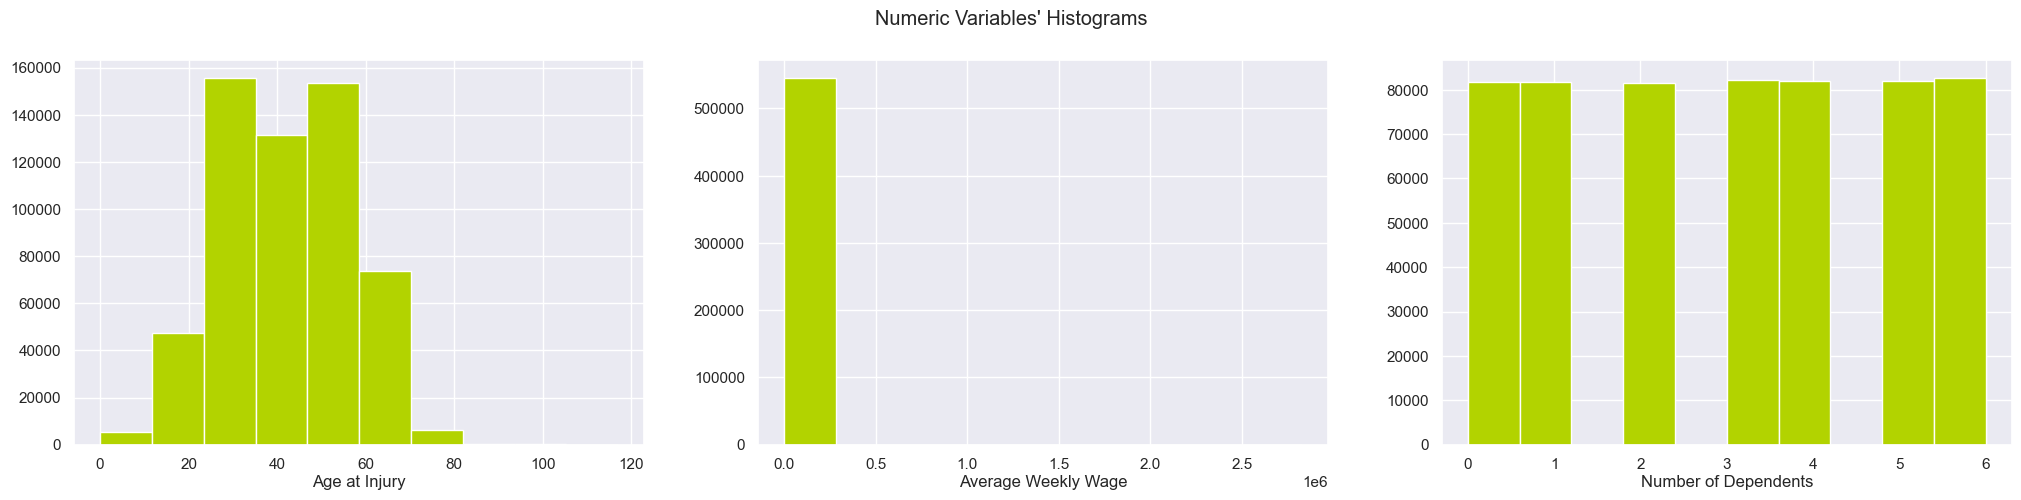

In [15]:
metric_features = ['Age at Injury', 'Average Weekly Wage', 'Number of Dependents']
df = df_train

sns.set()
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(df[feat], color= '#B2D300')
    ax.set_title(feat, y=-0.13)
plt.suptitle("Numeric Variables' Histograms")
plt.show()

The age seems to be centralized around 50, as for the number of dependents it seems to be equally distributed along the various possibilities.

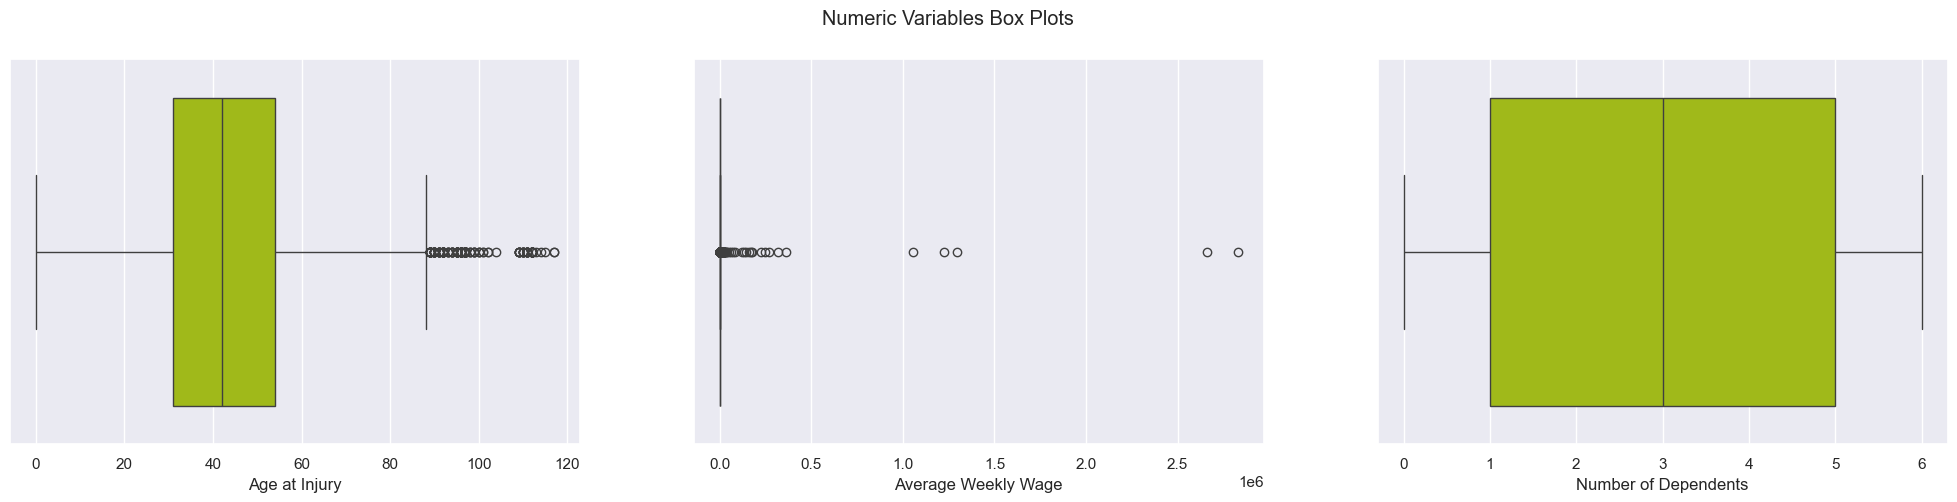

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], ax=ax, color= '#B2D300')
plt.suptitle("Numeric Variables Box Plots")
plt.show()

Average Weekly Wage seems to be skewed. On a later stage, more research will be conducted to understand this variable.

### Dates

Dates can yield important insights regarding periodicity in the data (for example, tourism tends to rise in summer and decline in winter).

A plot of the frequency of accidents per year and month for every year in the data set could show these tendencies.

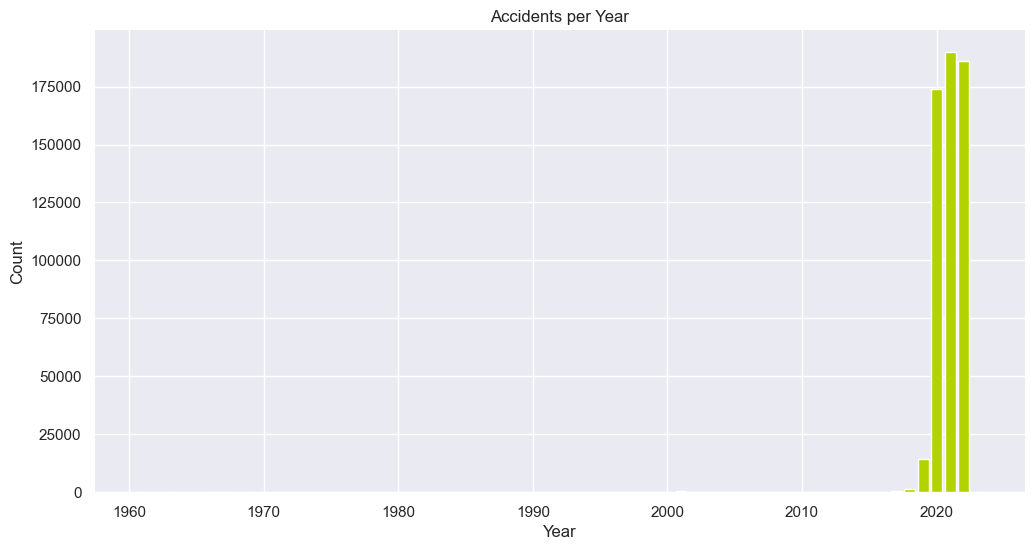

In [17]:
accidents_per_year = df_train['Accident Date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(accidents_per_year.index, accidents_per_year.values, color='#B2D300')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Accidents per Year')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

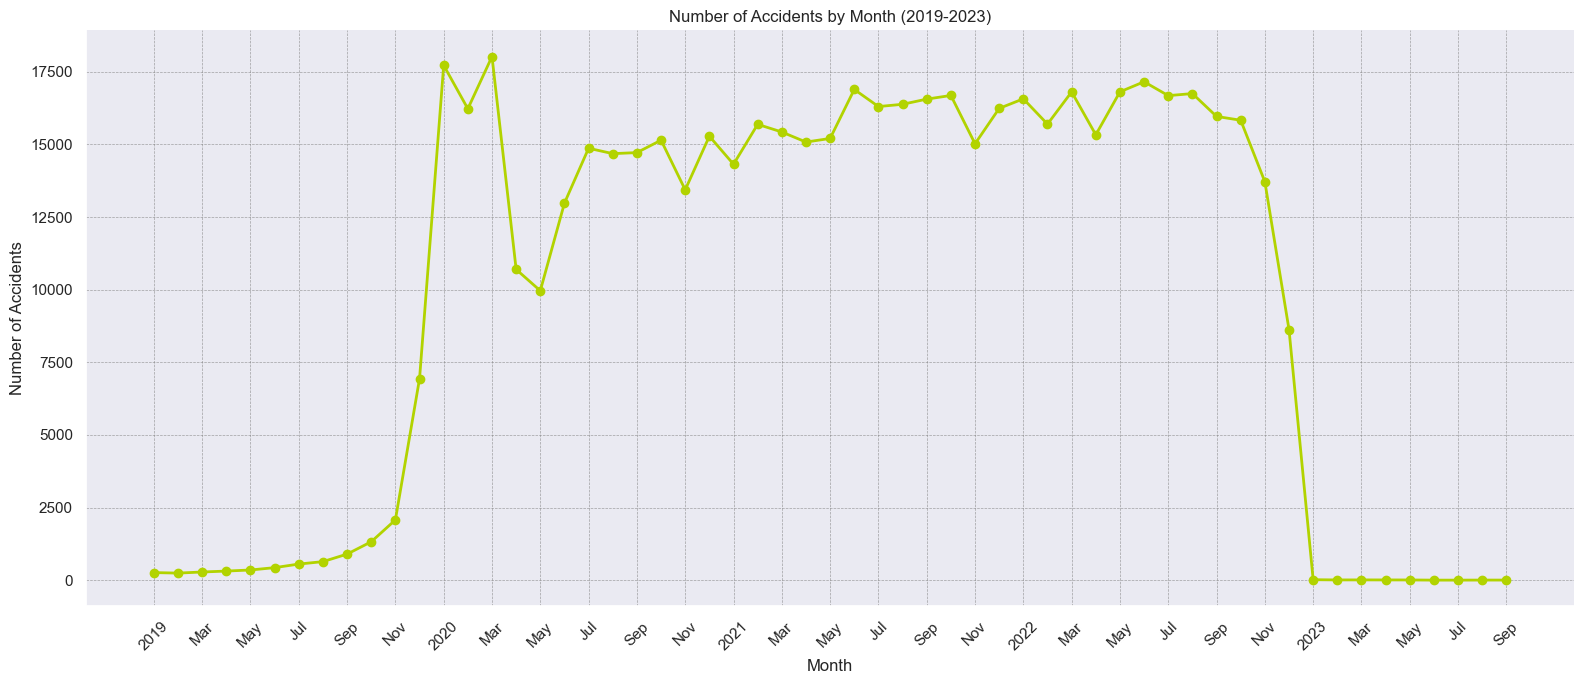

In [18]:
df_train_2019 = df_train[df_train['Accident Date'].dt.to_period('M') >= '2019-01']
accidents_by_month = df_train_2019.groupby(df_train_2019['Accident Date'].dt.to_period('M')).size()

plt.figure(figsize=(16, 7))
plt.plot(accidents_by_month.index.astype(str), accidents_by_month.values, marker='o', color='#B2D300', linestyle='-', linewidth=2)
plt.title('Number of Accidents by Month (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')

# set x-axis labels to show only the month and year
labels = []
for month in accidents_by_month.index.to_timestamp():
    if month.month == 1:                          # If its january, show year
        labels.append(f"{month.strftime('%Y')}")
    else:                                         # else, show only the month
        labels.append(month.strftime('%b'))

plt.xticks(ticks=range(0, len(accidents_by_month), 2), labels=labels[::2], rotation=45)


# Add grid and remove plot spines
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

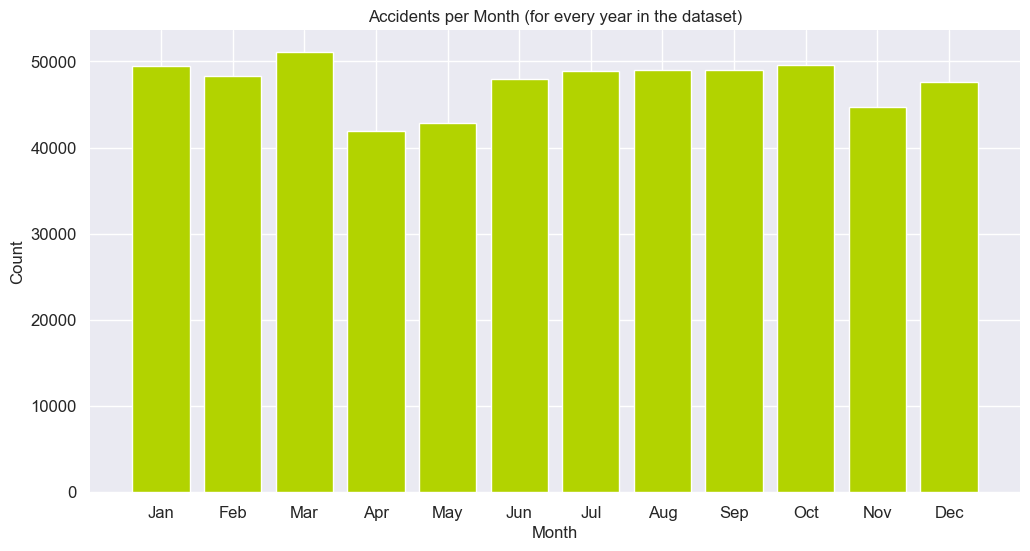

In [19]:
year_counts = df_train['Accident Date'].groupby(df_train['Accident Date'].dt.month).count()
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (for every year in the dataset)')
plt.yticks(fontsize=12)
plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

There seems to be a slight decrease in April and May, but most of the data regards the years of 2020, 2021 and 2022, so a plot for these years could be more revealing.

In [20]:
df_train_recent = df_train[df_train['Accident Date'].dt.year.isin([2020, 2021, 2022])]

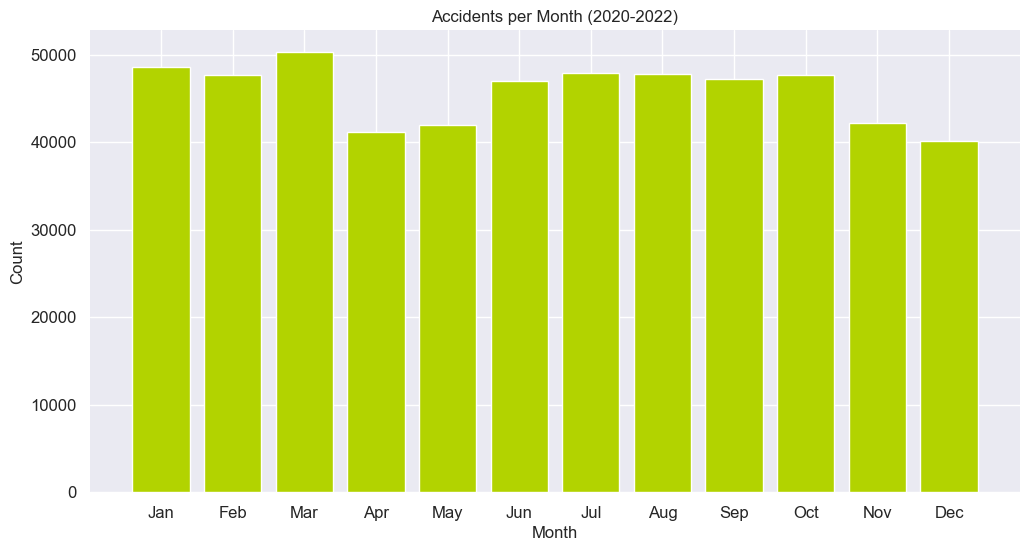

In [21]:
year_counts = df_train_recent['Accident Date'].groupby(df_train_recent['Accident Date'].dt.month).count()
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (2020-2022)')
plt.yticks(fontsize=12)
plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

Only Decemeber seems to have changed in the recent years, showing a small decrease. To be more specific, a line chart with the three last years can be created.

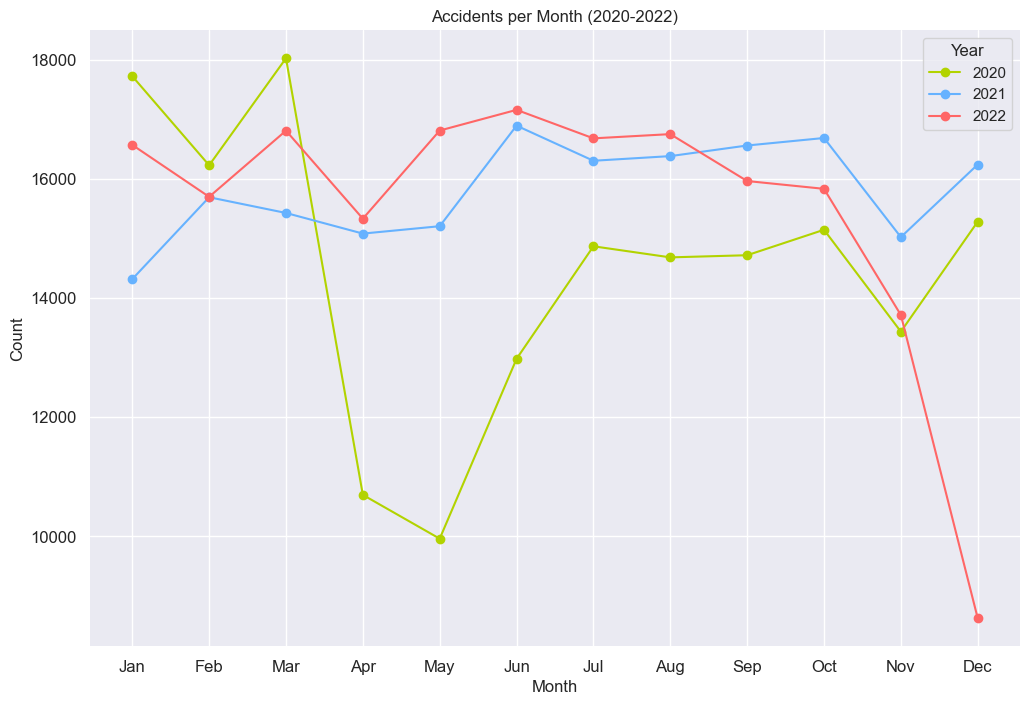

In [22]:
plt.figure(figsize=(12, 8))
years_list = [2020, 2021, 2022, 2023]
colors = ['#B2D300', '#66B2FF', '#FF6666']

for year, color in zip(years_list, colors):
    year_counts = df_train[df_train['Accident Date'].dt.year == year]['Accident Date'].dt.month.value_counts().sort_index()
    plt.plot(year_counts.index, year_counts.values, marker='o', label=str(year), color=color)
    
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (2020-2022)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(title='Year')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

There appears to be no recognizable pattern in these years. However, the group observed a decrease in accidents during the period from March to May. This could possibly be attributed to the COVID-19 outbreak, as workers were required to quarantine during this time and, consequently, were less likely to experience work-related accidents.

A look into the years before 2020, the minority subset, could explain the decrease in december in the more recent past.

In [23]:
df_train_older = df_train[df_train['Accident Date'].dt.year < 2020]

In [24]:
df_train_older

Accident Date  Age at Injury Alternative Dispute Resolution  \
0         2019-12-30             31                              N   
1         2019-08-30             46                              N   
2         2019-12-06             40                              N   
4         2019-12-30             61                              N   
5         2019-12-26             67                              N   
...              ...            ...                            ...   
592648    2019-09-06            109                              N   
592680    2019-09-03             20                              N   
593136    1980-05-17             45                              N   
593212    2019-07-05             21                              N   
593344    2019-08-16             21                              N   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
0         2020-01-01                       N                 0.00      1988.0   
1         2020-01-01                       Y              1745.93      1973.0   
2         2020-01-01                       N              1434.80      1979.0   
4         2020-01-01                       N                  NaN      1958.0   
5         2020-01-01                       N                 0.00      1952.0   
...              ...                     ...                  ...         ...   
592648    2022-12-29                       N                 0.00      1910.0   
592680    2022-12-29                       N                 0.00      1999.0   
593136    2022-12-30                       N                 0.00      1935.0   
593212    2022-12-30                       N                 0.00      1998.0   
593344    2022-12-30                       N                 0.00      1998.0   

         C-2 Date                   Carrier Name Carrier Type  ...  \
0      2019-12-31     NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE  ...   
1      2020-01-01   ZURICH AMERICAN INSURANCE CO  1A. PRIVATE  ...   
2      2020-01-01      INDEMNITY INSURANCE CO OF  1A. PRIVATE  ...   
4      2019-12-31           STATE INSURANCE FUND      2A. SIF  ...   
5      2019-12-31    INDEMNITY INS. OF N AMERICA  1A. PRIVATE  ...   
...           ...                            ...          ...  ...   
592648 2022-12-29  SAFETY NATIONAL CASUALTY CORP  1A. PRIVATE  ...   
592680 2022-12-29   EVEREST NATIONAL INS COMPANY  1A. PRIVATE  ...   
593136 2022-12-30    INFINITY ASSURANCE INS. CO.  1A. PRIVATE  ...   
593212 2022-12-30  SAFETY NATIONAL CASUALTY CORP  1A. PRIVATE  ...   
593344 2022-12-30  SAFETY NATIONAL CASUALTY CORP  1A. PRIVATE  ...   

        WCIO Cause of Injury Code WCIO Cause of Injury Description  \
0                              27     FROM LIQUID OR GREASE SPILLS   
1                              97                REPETITIVE MOTION   
2                              79   OBJECT BEING LIFTED OR HANDLED   
4                              16  HAND TOOL, UTENSIL; NOT POWERED   
5                              31          FALL, SLIP OR TRIP, NOC   
...                           ...                              ...   
592648                         85                 ANIMAL OR INSECT   
592680                         99       OTHER - MISCELLANEOUS, NOC   
593136                         29                    ON SAME LEVEL   
593212                         16  HAND TOOL, UTENSIL; NOT POWERED   
593344                         75         FALLING OR FLYING OBJECT   

       WCIO Nature of Injury Code WCIO Nature of Injury Description  \
0                              10                         CONTUSION   
1                              49                    SPRAIN OR TEAR   
2                               7                        CONCUSSION   
4                              43                          PUNCTURE   
5                              10                         CONTUSION   
...                           ...                               ...   
592648        

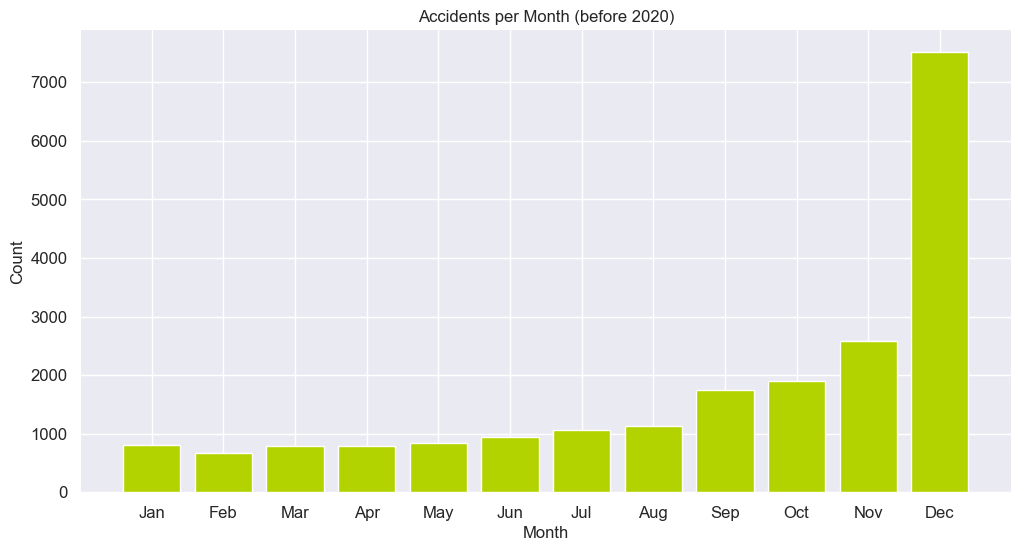

In [25]:
year_counts = df_train_older['Accident Date'].groupby(df_train_older['Accident Date'].dt.month).count()
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (before 2020)')
plt.yticks(fontsize=12)
plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [26]:
most_common_year_month = df_train_older['Accident Date'].dt.to_period('M').value_counts().idxmax()
most_common_year_month

Period('2019-12', 'M')

The explosive rise in the month of december can be explained by the the date '2019-12-XX' which is the closest date to when the colection of data starts to grow. It's plausible to assume that this increase in observations is simply due to an increase in data collection and not a real life increase in insurance claims.

### Claim Types

This section will begin by exploring what are the unique values of the target variable

In [27]:
df_train['Claim Injury Type'].unique()

array(['2. NON-COMP', '4. TEMPORARY', '3. MED ONLY', '5. PPD SCH LOSS',
       '6. PPD NSL', '1. CANCELLED', '8. DEATH', '7. PTD'], dtype=object)

This is how the target variable works:

Cancelled – The claim is canceled if it was assembled by mistake or identified as a duplicate of an existing claim.

Non-Comp – No indemnity (financial) benefits are awarded for the claim, meaning the worker is not compensated beyond the claim itself.

Med Only – Only medical benefits are awarded, covering treatment and healthcare costs without additional financial compensation for lost time.

Temporary – The claim provides temporary total or partial disability benefits for the period the worker is unable to work due to injury.

PPD Sch Loss – The claim awards a Permanent Partial Disability benefit for a scheduled body part (e.g., hand, leg) where there’s a specific schedule of compensation.

PPD NSL – The claim awards a Permanent Partial Disability benefit for a non-scheduled body part, such as the neck or back, without a specific compensation schedule.

PTD – Permanent Total Disability benefits are awarded, providing lifetime compensation because the worker is unable to return to work due to the injury.

Death – Death benefits are awarded under WCL §16 due to a worker’s death, providing financial support to dependents.<br>




References:<br>
https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data

How are these values distributed?

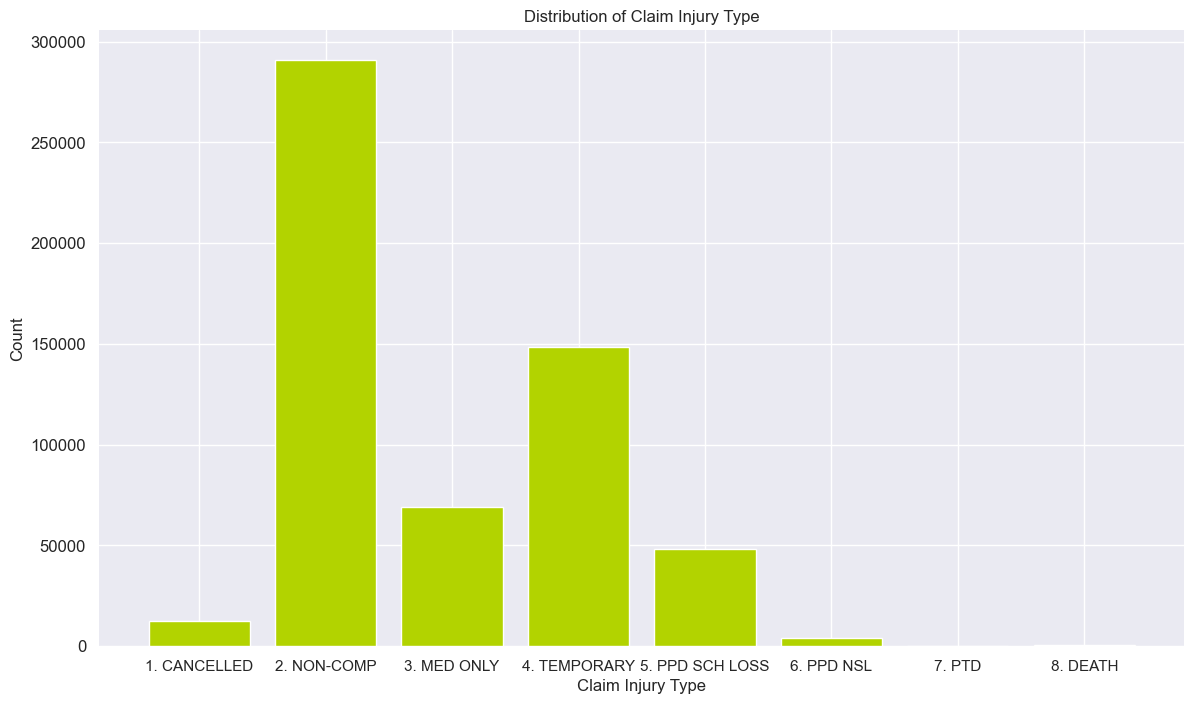

In [28]:
claim_injury_counts = df_train['Claim Injury Type'].value_counts()
claim_injury_counts = claim_injury_counts.reindex(sorted(claim_injury_counts.index, key=lambda x: int(x.split('.')[0])))

plt.figure(figsize=(14, 8))
bars = plt.bar(claim_injury_counts.index, claim_injury_counts.values, color='#B2D300')
plt.xlabel('Claim Injury Type')
plt.ylabel('Count')
plt.title('Distribution of Claim Injury Type')
plt.yticks(fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The dataset is dominated by the second category in such a way that the 7th and 8th categories appear to be empty.

In [29]:
claim_injury_table = df_train['Claim Injury Type'].value_counts().reset_index()
claim_injury_table.columns = ['Claim Injury Type', 'Count']

claim_injury_table['Claim Injury Type'] = claim_injury_table['Claim Injury Type'].astype(str)
claim_injury_table = claim_injury_table.sort_values(by='Claim Injury Type', key=lambda inj_type: inj_type.str.split('.').str[0].astype(int))
claim_injury_table.reset_index(drop=True, inplace=True)
claim_injury_table

Claim Injury Type   Count
0      1. CANCELLED   12477
1       2. NON-COMP  291076
2       3. MED ONLY   68906
3      4. TEMPORARY  148507
4   5. PPD SCH LOSS   48280
5        6. PPD NSL    4211
6            7. PTD      97
7          8. DEATH     470

The table allows a different view where the minority can still be seen. The target variable is clearly unbalanced. In the future, resampling and other methods could be used to compensate for this issue.

### Attorney VS No Attorney

In the real world, the presence of a lawyer can sometimes change the outcome of an insurance claim. How is this presence distributed across different types of claims?

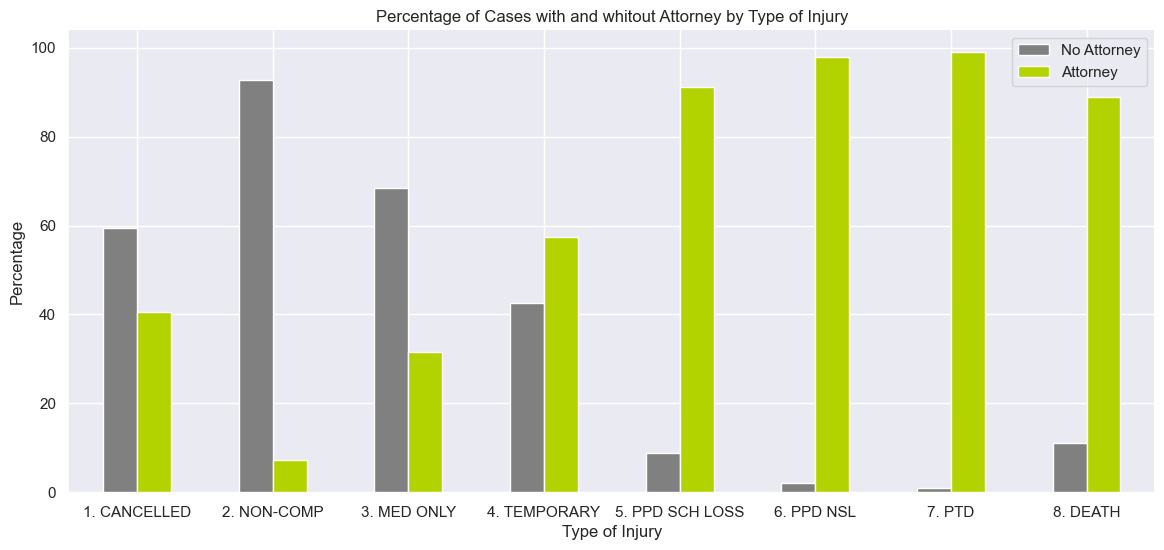

In [30]:
claim_injury_by_attorney = pd.crosstab(df_train['Claim Injury Type'], df_train['Attorney/Representative'])
claim_injury_by_attorney.columns = ['No Attorney', 'Attorney']
claim_injury_by_attorney.reset_index(inplace=True)
claim_injury_by_attorney['Attorney'] = claim_injury_by_attorney['Attorney'] / (claim_injury_by_attorney['No Attorney'] + claim_injury_by_attorney['Attorney']) * 100
claim_injury_by_attorney['No Attorney'] = 100 - claim_injury_by_attorney['Attorney']
claim_injury_by_attorney
claim_injury_by_attorney.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(14, 6))
plt.xlabel('Type of Injury')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and whitout Attorney by Type of Injury')
plt.xticks(rotation=0)
plt.grid(True)
ax = plt.gca()
plt.xticks(ticks=range(len(claim_injury_counts.index)), 
               labels=sorted(claim_injury_counts.index, key=lambda x: int(x.split('.')[0])), 
               rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()


This graph shows that as the severity of cases increases so does the percentage of cases where a laywer is present. It also indicates that the presence of a laywer is highly correlated to the target variable.

### Ages

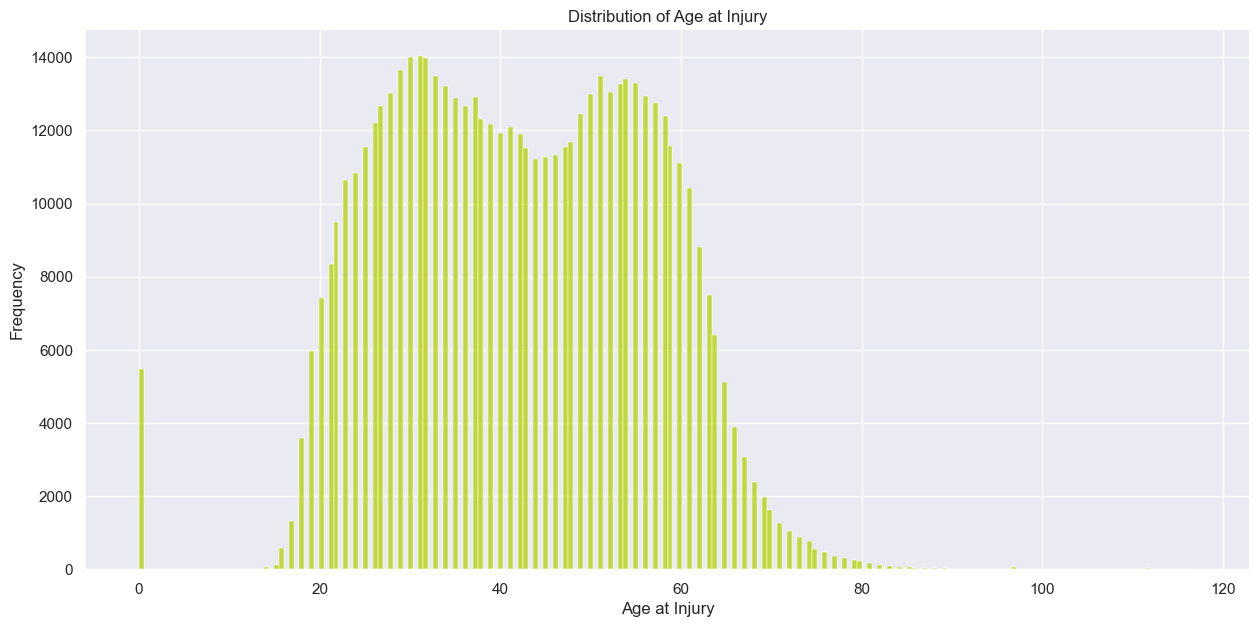

In [31]:
plt.figure(figsize=(15, 7))                              
sns.histplot(df_train['Age at Injury'], color='#B2D300')   
plt.xlabel('Age at Injury')                                
plt.ylabel('Frequency')                              
plt.title('Distribution of Age at Injury')
plt.grid(True)                                          
ax = plt.gca()                                                
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [32]:
pyramid_db = df_train.copy()

In [33]:
bins = (0, 10, 20, 30, 40, 50, 60, 80, 90, 100, float('inf'))
labels = ['1-10', '10-19', '20-29', '30-39', '40-49', '50-59', '60-79', '80-89', '90-99', '100+']
pyramid_db['age_group'] = pd.cut(pyramid_db['Age at Injury'], bins=bins, labels=labels)

In [34]:
# pyramid_data = piramid_db.groupby(['age_group', 'Gender']).size().unstack(fill_value=0)

# # Ensure age groups are in proper order
# pyramid_data = pyramid_data.reindex(sorted(pyramid_data.index))

# # Convert males to negative for plotting on the left
# pyramid_data['Male'] *= -1

# # Plotting
# fig, ax = plt.subplots(figsize=(10, 6))

# age_groups = pyramid_data.index
# ax.barh(age_groups, pyramid_data['Male'], color='blue', label='Male')
# ax.barh(age_groups, pyramid_data['Female'], color='pink', label='Female')

# # Formatting
# ax.set_xlabel('Population')
# ax.set_ylabel('Age Group')
# ax.set_title('Population Pyramid')
# ax.legend()

# # Show grid and improve appearance
# ax.grid(axis='x', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

Ages will be grouped in order to obtain visualizations that are more meaningful and easier to read. Age groups were created following the norms of the United States Census Bureau.

References:<br>
https://www2.census.gov/library/publications/decennial/2020/census-briefs/c2020br-06.pdf

In [35]:
bins = (1, 18, 25, 45, 65, float('inf'))
labels = ['1-17', '18-24', '25-44', '45-64', '65+']
df_train['age_group'] = pd.cut(df_train['Age at Injury'], bins=bins, labels=labels)

In [36]:
age_group_counts = df_train['age_group'].value_counts().sort_index()
age_group_counts_percentage = age_group_counts / age_group_counts.sum() * 100
age_group_table = pd.DataFrame({'Age Group': age_group_counts.index,'Count': age_group_counts.values,'Percentage': age_group_counts_percentage.values})
age_group_table

Age Group   Count  Percentage
0      1-17    5694    1.001477
1     18-24   64265   11.303117
2     25-44  253237   44.540066
3     45-64  225533   39.667405
4       65+   19831    3.487934

<Axes: xlabel='Claim Injury Type'>

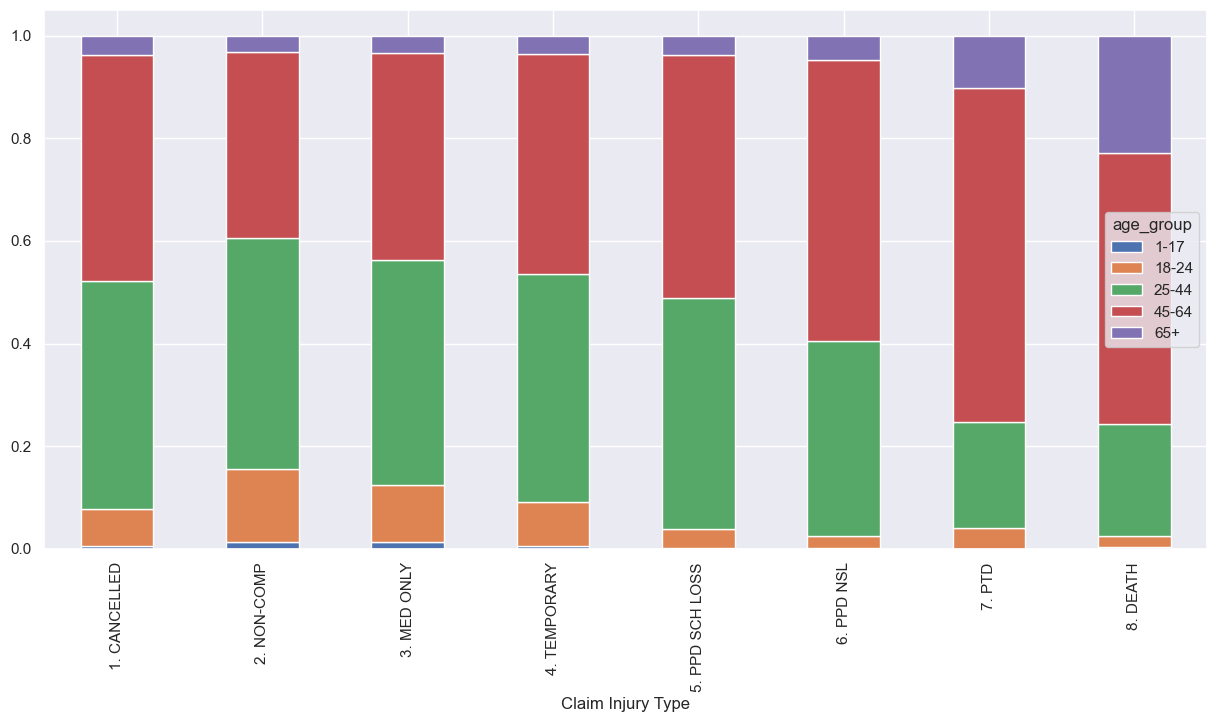

In [37]:
df_train.groupby('Claim Injury Type')['age_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(15, 7))

In [38]:
df_zeros = df_train[df_train['Age at Injury'] == 0]
df_zeros.describe()

Accident Date  Age at Injury  \
count                           1775         5464.0   
mean   2018-05-30 02:25:13.014084608            0.0   
min              1967-04-05 00:00:00            0.0   
25%              2020-01-07 00:00:00            0.0   
50%              2020-09-29 00:00:00            0.0   
75%              2021-09-16 00:00:00            0.0   
max              2022-12-20 00:00:00            0.0   
std                              NaN            0.0   

                       Assembly Date  Average Weekly Wage   Birth Year  \
count                           5464          5169.000000  5204.000000   
mean   2021-05-19 05:29:57.364568064            70.099559  1238.161414   
min              2020-01-02 00:00:00             0.000000     0.000000   
25%              2020-08-21 00:00:00             0.000000     0.000000   
50%              2021-04-27 00:00:00             0.000000  1959.000000   
75%              2022-02-03 00:00:00             0.000000  1967.000000   
max              2022-12-30 00:00:00          5867.580000  2005.000000   
std                              NaN           321.922818   949.243284   

                            C-2 Date  Claim Identifier  Industry Code  \
count                           3081      5.464000e+03         3983.0   
mean   2021-06-11 06:30:15.774099712      5.734683e+06      50.708009   
min              1997-02-07 00:00:00      5.393794e+06           11.0   
25%              2020-10-08 00:00:00      5.541794e+06           42.0   
50%              2021-07-16 00:00:00      5.708605e+06           48.0   
75%              2022-05-03 00:00:00      5.912161e+06           62.0   
max              2024-05-31 00:00:00      6.165637e+06           92.0   
std                              NaN      2.187567e+05      18.743996   

       WCIO Cause of Injury Code  WCIO Nature of Injury Code  \
count                     2940.0                      2937.0   
mean                   74.727891                   53.292475   
min                          1.0                         1.0   
25%                         56.0                        37.0   
50%                         83.0                        52.0   
75%                         98.0                        72.0   
max                         99.0                        91.0   
std                    27.188004                   22.075821   

       WCIO Part Of Body Code  Agreement Reached  Number of Dependents  
count                  2535.0             5464.0                5464.0  
mean                37.280473           0.068814              2.999817  
min                      -9.0                0.0                   0.0  
25%                      13.0                0.0                   1.0  
50%                      35.0                0.0                   3.0  
75%                      53.0                0.0                   5.0  
max                      99.0                1.0                   6.0  
std                 26.238942           0.253161              1.980733

Most observations with 0 years of age do not have an "average weekly wage", and a sizable amount have 0 as their birth year.

For the ones who have a birth year, it is possible to calculate their age at the time of the accident (this is something to be done in the data cleaning section).

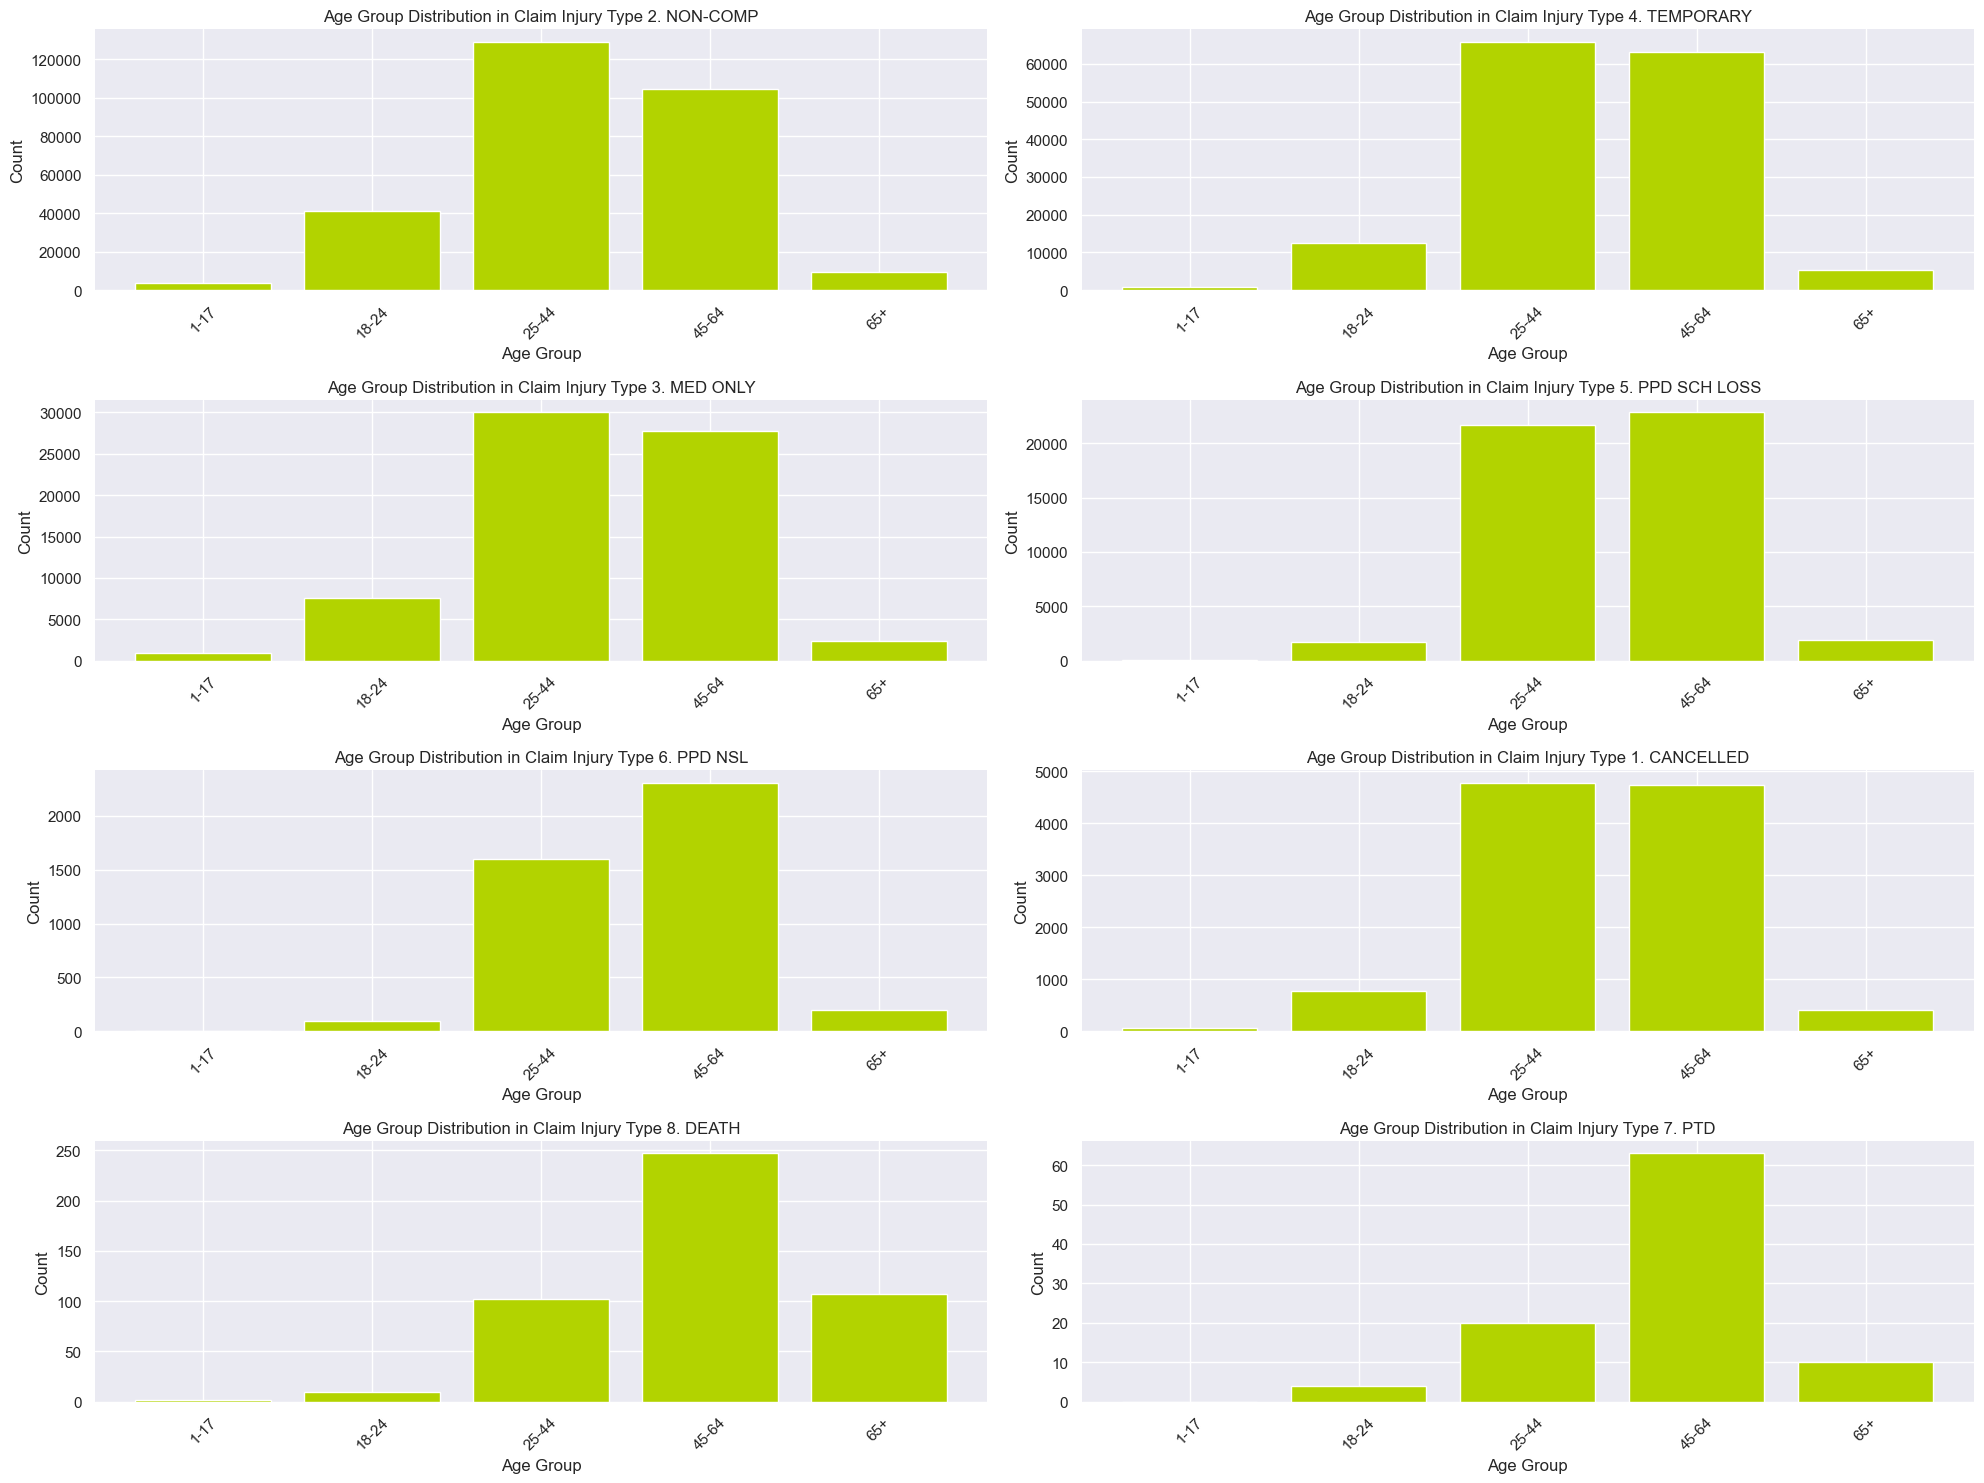

In [39]:
claim_injury_types = df_train['Claim Injury Type'].unique()
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

for ax, claim_injury_type in zip(axes.flatten(), claim_injury_types):
    age_group_counts = df_train[df_train['Claim Injury Type'] == claim_injury_type]['age_group'].value_counts().sort_index()
    bars = ax.bar(age_group_counts.index, age_group_counts.values, color='#B2D300')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Count')
    ax.set_title(f'Age Group Distribution in Claim Injury Type {claim_injury_type}')
    ax.set_xticks(range(len(age_group_counts.index)))
    ax.set_xticklabels(age_group_counts.index, rotation=45)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()

In [40]:
df_train['Agreement Reached'] = df_train['Agreement Reached'].map({0: 'Not Reached', 1: 'Reached'})
mean_age_by_agreement = df_train.groupby('Agreement Reached')['Age at Injury'].mean().reset_index()
mean_age_by_agreement.columns = ['Agreement Reached', 'Mean Age']
mean_age_by_agreement

Agreement Reached   Mean Age
0       Not Reached  42.054242
1           Reached  43.343674

### Genders

The next step is checking how the dataset is distributed in terms of gender.

The reported gender of the injured worker can be: 
- F – Female; 
- M - Male; 
- X - Nonbinary; 
- U – Unknown (gender not specified)

References:

https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data

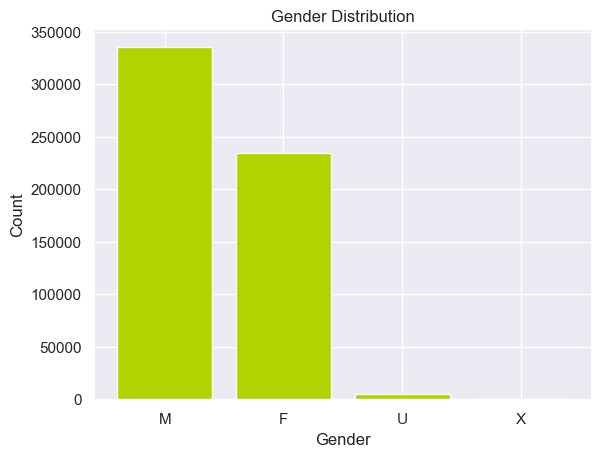

In [41]:
df_train['Gender'] = df_train['Gender'].astype(str)
gender_counts = df_train['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color='#B2D300')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [42]:
gender_type_of_claim = pd.crosstab(df_train['Gender'], df_train['Claim Injury Type'])
for i in gender_type_of_claim.columns:
    gender_type_of_claim[i] = (gender_type_of_claim[i] / gender_type_of_claim[i].sum()) * 100
gender_type_of_claim

Claim Injury Type  1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
Gender                                                                    
F                     33.429510    44.401119    40.794706     37.794851   
M                     65.167909    54.539364    58.523206     61.647599   
U                      1.378537     1.055394     0.655966      0.554183   
X                      0.024044     0.004123     0.026123      0.003367   

Claim Injury Type  5. PPD SCH LOSS  6. PPD NSL    7. PTD   8. DEATH  
Gender                                                               
F                        30.292046   40.156732  23.71134  12.765957  
M                        69.320630   59.534552  76.28866  87.234043  
U                         0.370754    0.308715   0.00000   0.000000  
X                         0.016570    0.000000   0.00000   0.000000

The majority of the dataset is composed of men (M), with a smaller proportion of women (F) and two other options (Unknown and Nonbinary).

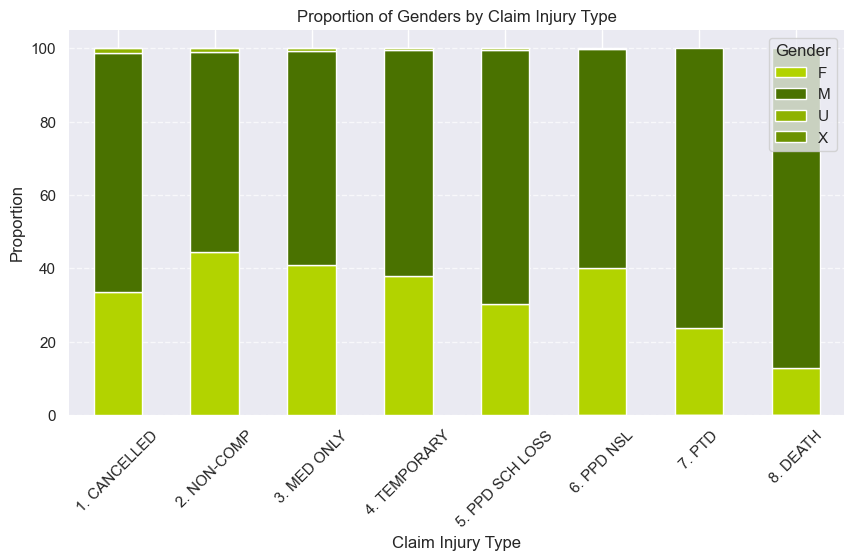

In [43]:
gender_proportion = pd.crosstab(df_train['Claim Injury Type'], df_train['Gender'], normalize='index') * 100
colors = ['#B2D300', '#4A7200', '#8FB200', '#6C9200',]
fig, ax = plt.subplots(figsize=(10, 5))
gender_proportion.plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.xlabel('Claim Injury Type')
plt.ylabel('Proportion')
plt.title('Proportion of Genders by Claim Injury Type')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The graph gives a better perception of the growth in the percentage of men as cases get increasingly severe, with the highest percentage of men present in cases envolving death.

The `Gender` variable has two minority categories, "U" and "X", this could prove to be troublesome. As such it will be adressed in the data cleaning phase.

### Unbalanced Columns

Two columns seem to be unbalanced.

In [44]:
covid_count = df_train['COVID-19 Indicator'].value_counts()
covid_count_percent = covid_count / covid_count.sum() * 100
print(covid_count_percent)

COVID-19 Indicator
N    95.205601
Y     4.794399
Name: count, dtype: float64


In [45]:
decision_count = df_train['WCB Decision'].value_counts()
decision_count_percent = decision_count / decision_count.sum() * 100
print(decision_count_percent)

WCB Decision
Not Work Related    100.0
Name: count, dtype: float64


In [46]:
dispute_count = df_train['Alternative Dispute Resolution'].value_counts()
dispute_count_percent = dispute_count / dispute_count.sum() * 100
print(dispute_count_percent)

Alternative Dispute Resolution
N    99.544618
Y     0.454511
U     0.000871
Name: count, dtype: float64


The "COVID-19 Indicator" is composed by (roughly) 95% of cases where the claimant did **not** have covid and 5% where the claimant **had** covid. This variable is highly unbalanced, which could mean its prediction power is very low. Further research is necessary to understand its utility.

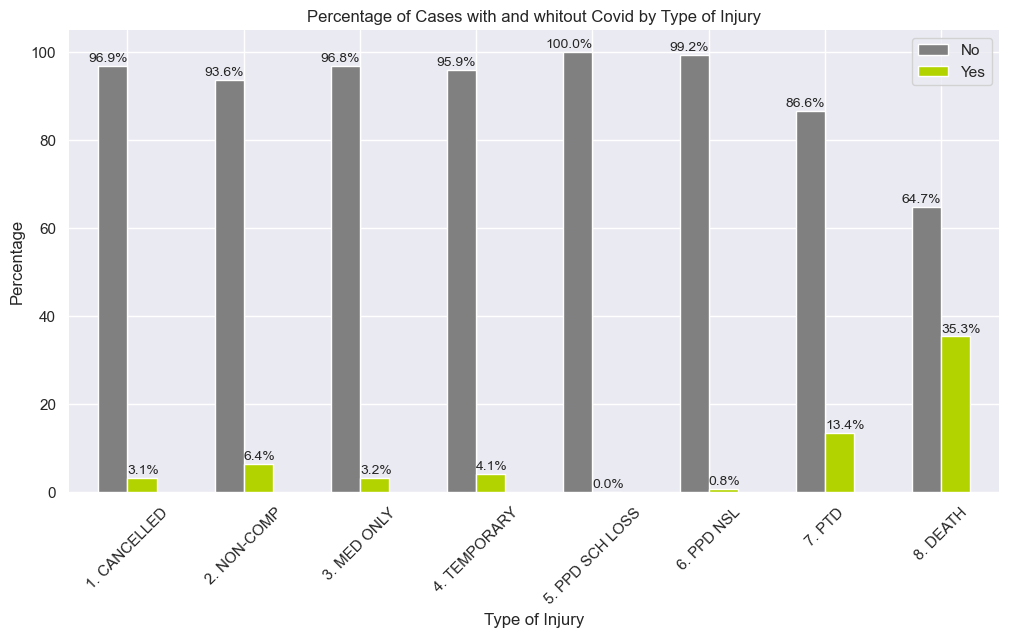

In [47]:
claim_injury_covid = pd.crosstab(df_train['Claim Injury Type'], df_train['COVID-19 Indicator'])
claim_injury_covid.columns = ['No', 'Yes']
claim_injury_covid.reset_index(inplace=True)
claim_injury_covid['Yes'] = claim_injury_covid['Yes'] / (claim_injury_covid['No'] + claim_injury_covid['Yes']) * 100
claim_injury_covid['No'] = 100 - claim_injury_covid['Yes']
claim_injury_covid
claim_injury_covid.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Type of Injury')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and whitout Covid by Type of Injury')
for index, value in enumerate(claim_injury_covid['Yes']):
    plt.text(index, value + 1, f'{value:.1f}%', ha='left', fontsize=10)
for index, value in enumerate(claim_injury_covid['No']):
    plt.text(index, value + 1, f'{value:.1f}%', ha='right', fontsize=10)
plt.xticks(ticks=claim_injury_covid.index, labels=claim_injury_covid['Claim Injury Type'], rotation=45)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

It can be observed that the cases where the injury type is "DEATH" have a much higher rate of covid. There could possibly be a correlation between these variables, so at this time the Covid variable will be kept.

"WCB Decision" is composed in its entirety by "Not Work Related" cases. As such it has no variability, meaning it is not a feature of interest and, for this reason, it will be removed.
Alternative Dispute Resolution consists of three unique values, but two of them account for less than 1% of instances. Therefore, they were removed.

In [48]:
df_train = df_train.drop(columns=['WCB Decision', 'Alternative Dispute Resolution'])

### Accident Location

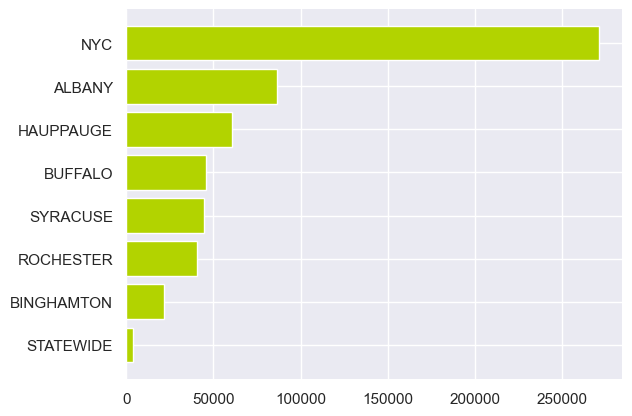

In [49]:
district_counts = df_train['District Name'].value_counts()
plt.barh(district_counts.index, district_counts.values, color='#B2D300')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.gca().invert_yaxis()
plt.show()

Most cases happen in the region of NYC (New York City, which accounts for 5 counties). This could be due to its higher population count.

References:

https://worldpopulationreview.com/us-counties/new-york

How does the target variable behave in these communities?

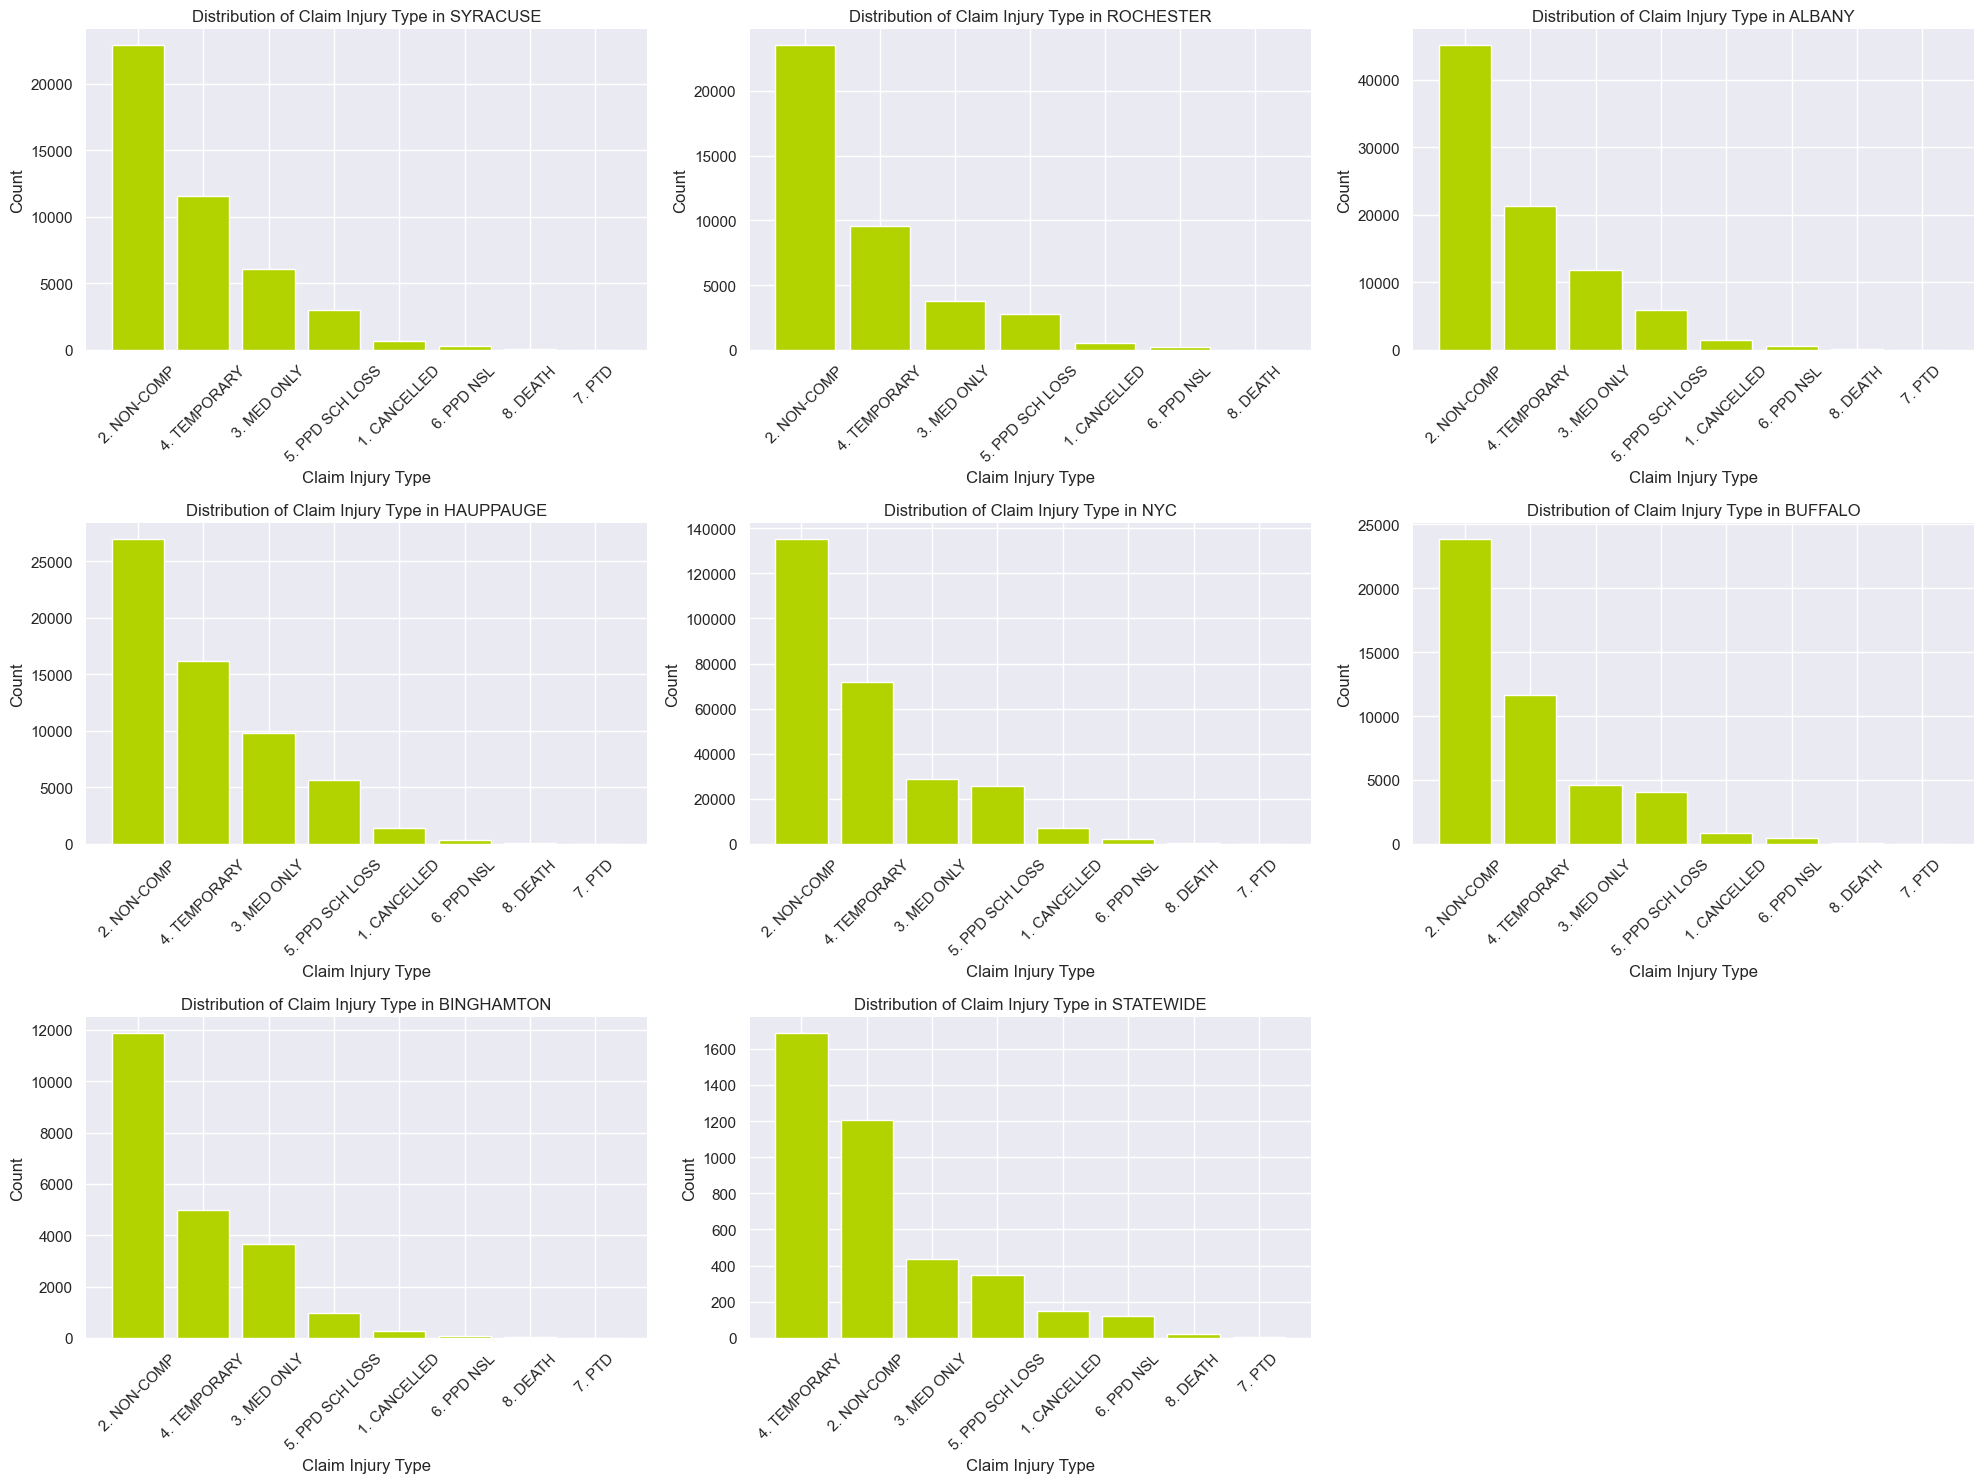

In [50]:
from math import ceil

places = df_train['District Name'].unique()
num_places = len(places)
fig, axes = plt.subplots(nrows=ceil(num_places / 3), ncols=3, figsize=(20, 15))

for ax, place in zip(axes.flatten(), places):
    claim_injury_counts = df_train[df_train['District Name'] == place]['Claim Injury Type'].value_counts()
    bars = ax.bar(claim_injury_counts.index, claim_injury_counts.values, color='#B2D300')
    ax.set_xlabel('Claim Injury Type')
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of Claim Injury Type in {place}')
    ax.set_xticks(range(len(claim_injury_counts.index)))
    ax.set_xticklabels(claim_injury_counts.index, rotation=45)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Remove any empty subplots
for ax in axes.flatten()[num_places:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

The distribution of cases seems to be mostly equal for all locations, except one. In Statewide the group observed that the most frequent claim injury type was the "4. Temporary".

### Average Weekly Wage

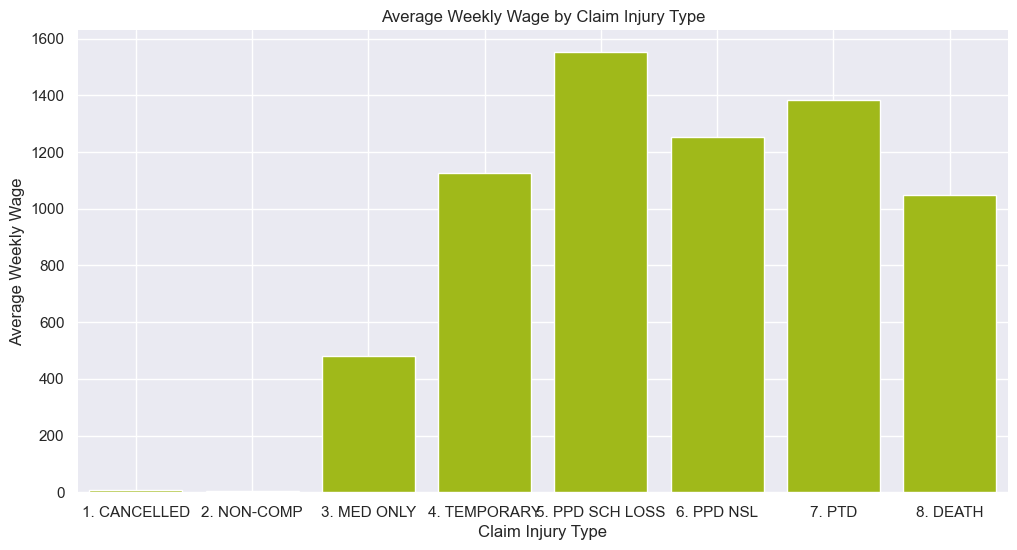

In [51]:
average_salary_by_claim = df_train.groupby('Claim Injury Type')['Average Weekly Wage'].mean()           # Group by 'Claim Injury Type' and calculate the mean of 'Average Weekly Wage'

plt.figure(figsize=(12, 6))
sns.barplot(x=average_salary_by_claim.index, y=average_salary_by_claim.values, color='#B2D300')
plt.xlabel('Claim Injury Type')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wage by Claim Injury Type')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The average weekly wage represents "the wage used to calculate workers’ compensation benefits, disability benefits, or an employee’s Paid Family Leave wage replacement benefits". 

The bar chart shows that the categories with the lowest average weekly wage are the first three. This is reasonable given that these claims are the ones without monetary compensation. Still more can be explored in this variable.<br>

References:<br>
https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data

In [52]:
bins = (0, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, 100000, 200000, 300000, 400000, 500000, 1000000)
df_train['wage_groups'] = pd.cut(df_train['Average Weekly Wage'], bins=bins)

In [53]:
wage_group_counts = df_train['wage_groups'].value_counts().sort_index()
wage_group_counts_percentage = wage_group_counts / wage_group_counts.sum() * 100
wage_group_table = pd.DataFrame({'Wage Group': wage_group_counts.index,'Count': wage_group_counts.values,'Percentage': wage_group_counts_percentage.values})
wage_group_table['Wage Group'] = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-10000', '10000-20000', '20000-30000', '30000-40000',
                                 '40000-50000', '50000-100000', '100000-200000', '200000-300000', '300000-400000', '400000-500000', '500000-1000000']
wage_group_table

Wage Group  Count  Percentage
0           0-1000  96645   46.038967
1        1000-2000  87274   41.574886
2        2000-3000  20881    9.947123
3        3000-4000   3763    1.792588
4        4000-5000    973    0.463510
5       5000-10000    328    0.156250
6      10000-20000     29    0.013815
7      20000-30000      9    0.004287
8      30000-40000      2    0.000953
9      40000-50000      2    0.000953
10    50000-100000      3    0.001429
11   100000-200000      6    0.002858
12   200000-300000      3    0.001429
13   300000-400000      2    0.000953
14   400000-500000      0    0.000000
15  500000-1000000      0    0.000000

Roughly 96% of the data falls in the range of 0 to 3000 USD. Further research into this range could reveal some important insights.

In [54]:
df_train1 = df_train[df_train['Average Weekly Wage'] < 3000]
bins = (0, 500, 1000, 1500, 2000, 2500, 3000)
df_train1['wage_groups'] = pd.cut(df_train1['Average Weekly Wage'], bins=bins)

C:\Users\marsi\AppData\Local\Temp\ipykernel_8560\1944115288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['wage_groups'] = pd.cut(df_train1['Average Weekly Wage'], bins=bins)


In [55]:
df_train1['Average Weekly Wage'].mean()

437.4043178023361

The average falls bellow what it should (it should be around 1000 according to the previous table), this could be due to a large majority of low values in the 0 to 500 USD range. 

In the begining of the notebook, it was pointed out that the boxplot was skewed, so the next step is to look for zeros.

In [56]:
df_testing = df_train1[df_train1['Average Weekly Wage'] == 0]
percent = len(df_testing)/len(df_train)*100
print(f'The percentage of observations where the salary is 0 is: {percent:.2f}%')

The percentage of observations where the salary is 0 is: 58.44%


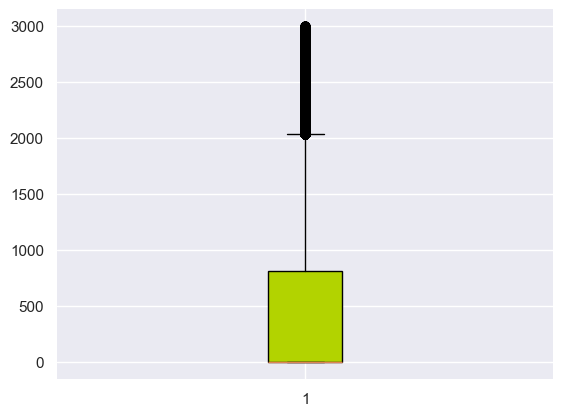

In [57]:
plt.boxplot(df_train1['Average Weekly Wage'], patch_artist=True,
            boxprops=dict(facecolor='#B2D300'))
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In the boxplot, the fact this variable is dominated by zeros becomes obvious.

Therefore, the previously created bins are not representative of the average weekly wage variable, and will be reworked.

The new organization will work as follows:

- No Benefit
- Low Benefit
- Medium Benefit
- High Benefit

This organization method better represents the data as it takes into account the 0 in the class 'No Benefit'.

To better pick the limits of each category the data will be plotted without outliers and zeros.

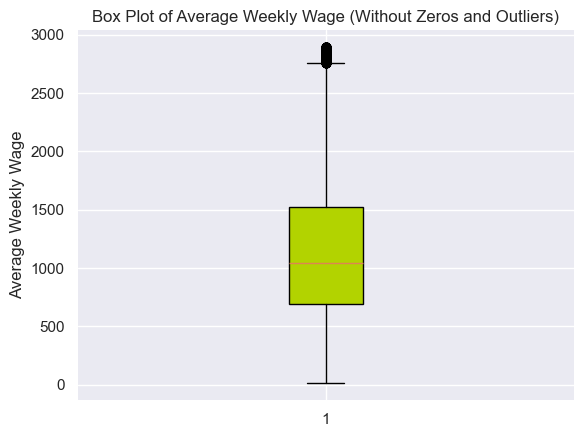

In [58]:
df_non_zero_wage = df_train[df_train['Average Weekly Wage'] > 0]

Q1 = df_non_zero_wage['Average Weekly Wage'].quantile(0.25)
Q3 = df_non_zero_wage['Average Weekly Wage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_non_zero_wage_no_outliers = df_non_zero_wage[(df_non_zero_wage['Average Weekly Wage'] >= lower_bound) & (df_non_zero_wage['Average Weekly Wage'] <= upper_bound)]

plt.boxplot(df_non_zero_wage_no_outliers['Average Weekly Wage'], patch_artist=True,
            boxprops=dict(facecolor='#B2D300'))
plt.title('Box Plot of Average Weekly Wage (Without Zeros and Outliers)')
plt.ylabel('Average Weekly Wage')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [59]:
# calculate the quantiles and IQR excluding claims with 0 wage
df_non_zero_wage = df_train[df_train['Average Weekly Wage'] > 0]

q1 = df_non_zero_wage['Average Weekly Wage'].quantile(0.25) # 25th percentile or first quartile
q3 = df_non_zero_wage['Average Weekly Wage'].quantile(0.75)  # 75th percentile or third quartile
iqr = q3 - q1
lower_bound = max(0,q1 - 1.5 * iqr)                          # the max function ensures the lower bound cannot be less than 0, as negative wages are not valid
upper_bound = q3 + 1.5 * iqr

Given the present boxplot, the following division was decided:<br>
- No Compensation: Value = 0
- Low Wage: Lower Bound < Value < First Quartile
- Medium Wage: First Quartile <= Value <= Third Quartile
- High Wage: Third Quartile < Value <= Upper Bound
- Very High Wage: Upper Bound < Value

In [60]:
bins = [-1, 0, q1, q3, upper_bound, df_train['Average Weekly Wage'].max()]
labels = ['No Wage', 'Low Wage', 'Medium Wage', 'High Wage', 'Very High Wage']
df_train['wage_groups'] = pd.cut(df_train['Average Weekly Wage'], bins=bins, labels=labels)
df_train[['Average Weekly Wage', 'wage_groups']]

Average Weekly Wage  wage_groups
0                      0.00      No Wage
1                   1745.93    High Wage
2                   1434.80  Medium Wage
4                       NaN          NaN
5                      0.00      No Wage
...                     ...          ...
593451                 0.00      No Wage
593455                 0.00      No Wage
593456               991.08  Medium Wage
593457                 0.00      No Wage
593467                 0.00      No Wage

[574024 rows x 2 columns]

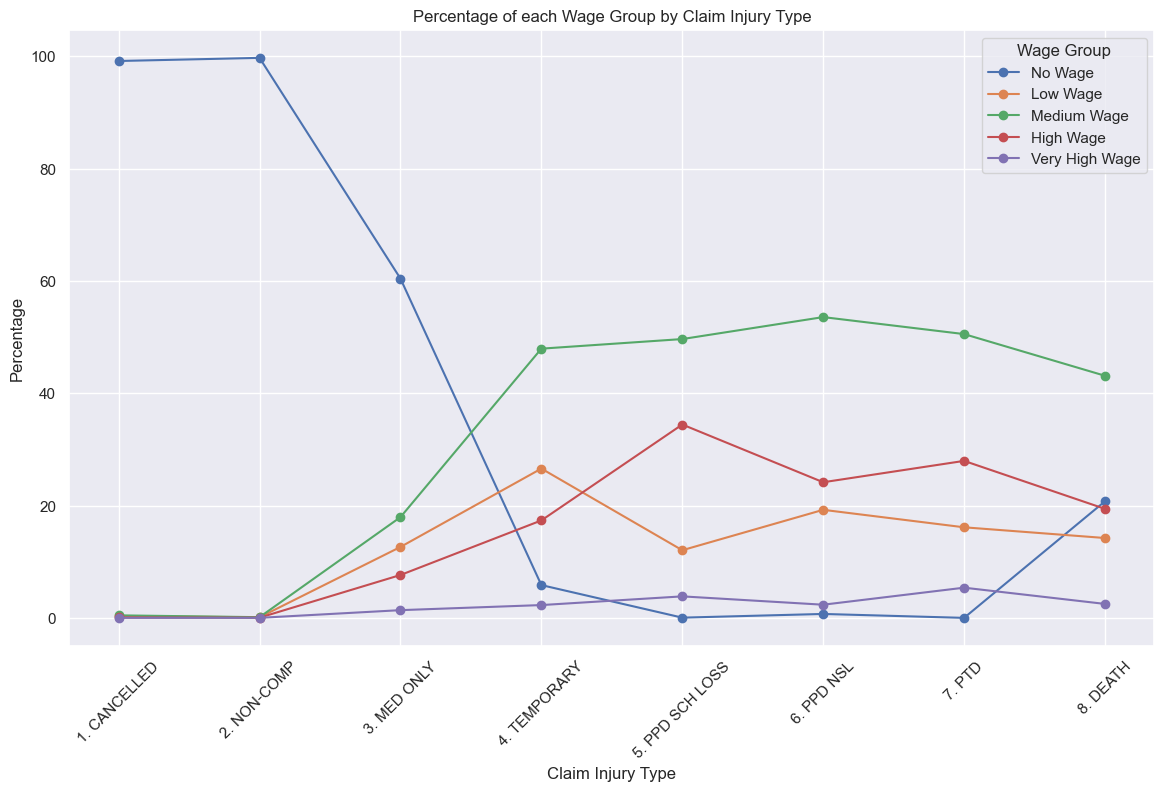

In [61]:
wage_groups_by_claim = pd.crosstab(df_train['Claim Injury Type'], df_train['wage_groups'])
wage_groups_by_claim_percentage = wage_groups_by_claim.div(wage_groups_by_claim.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 8))
for wage_group in wage_groups_by_claim_percentage.columns:
    plt.plot(wage_groups_by_claim_percentage.index, wage_groups_by_claim_percentage[wage_group], marker='o', label=wage_group)

plt.xlabel('Claim Injury Type')
plt.ylabel('Percentage')
plt.title('Percentage of each Wage Group by Claim Injury Type')
plt.legend(title='Wage Group')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

As expected, the first two categories are dominated by "No Wage" observations. As the wage category increases, the proportion of "No Wage" observations decreases, with the exception of the "Very High Wage" category, which has few observations.

In [62]:
df_train['Average Weekly Wage'].value_counts()

Average Weekly Wage
0.00       335449
250.00       3193
600.00       2319
1765.00      1294
500.00       1264
            ...  
1409.93         1
1483.02         1
1885.51         1
2676.03         1
1008.86         1
Name: count, Length: 120024, dtype: int64

### Medical Fee Region

In [63]:
df_train['Medical Fee Region'].unique()

array(['I', 'II', 'IV', 'UK', 'III'], dtype=object)

What is the meaning of these codes:

I - Region 1: Rural areas outside of Buffalo, Albany, Syracuse, Rochester, Utica & Binghamton<br>
II - Region 2: Buffalo, Albany, Syracuse, Rochester, Utica & Binghamton<br>
III - Region 3: Westchester, Rockland & most of Suffolk, Orange, & Putnam<br>
IV - Region 4: New York City, Nassau, and Western Suffolk<br>
UK - Unknown

Reference:

https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data

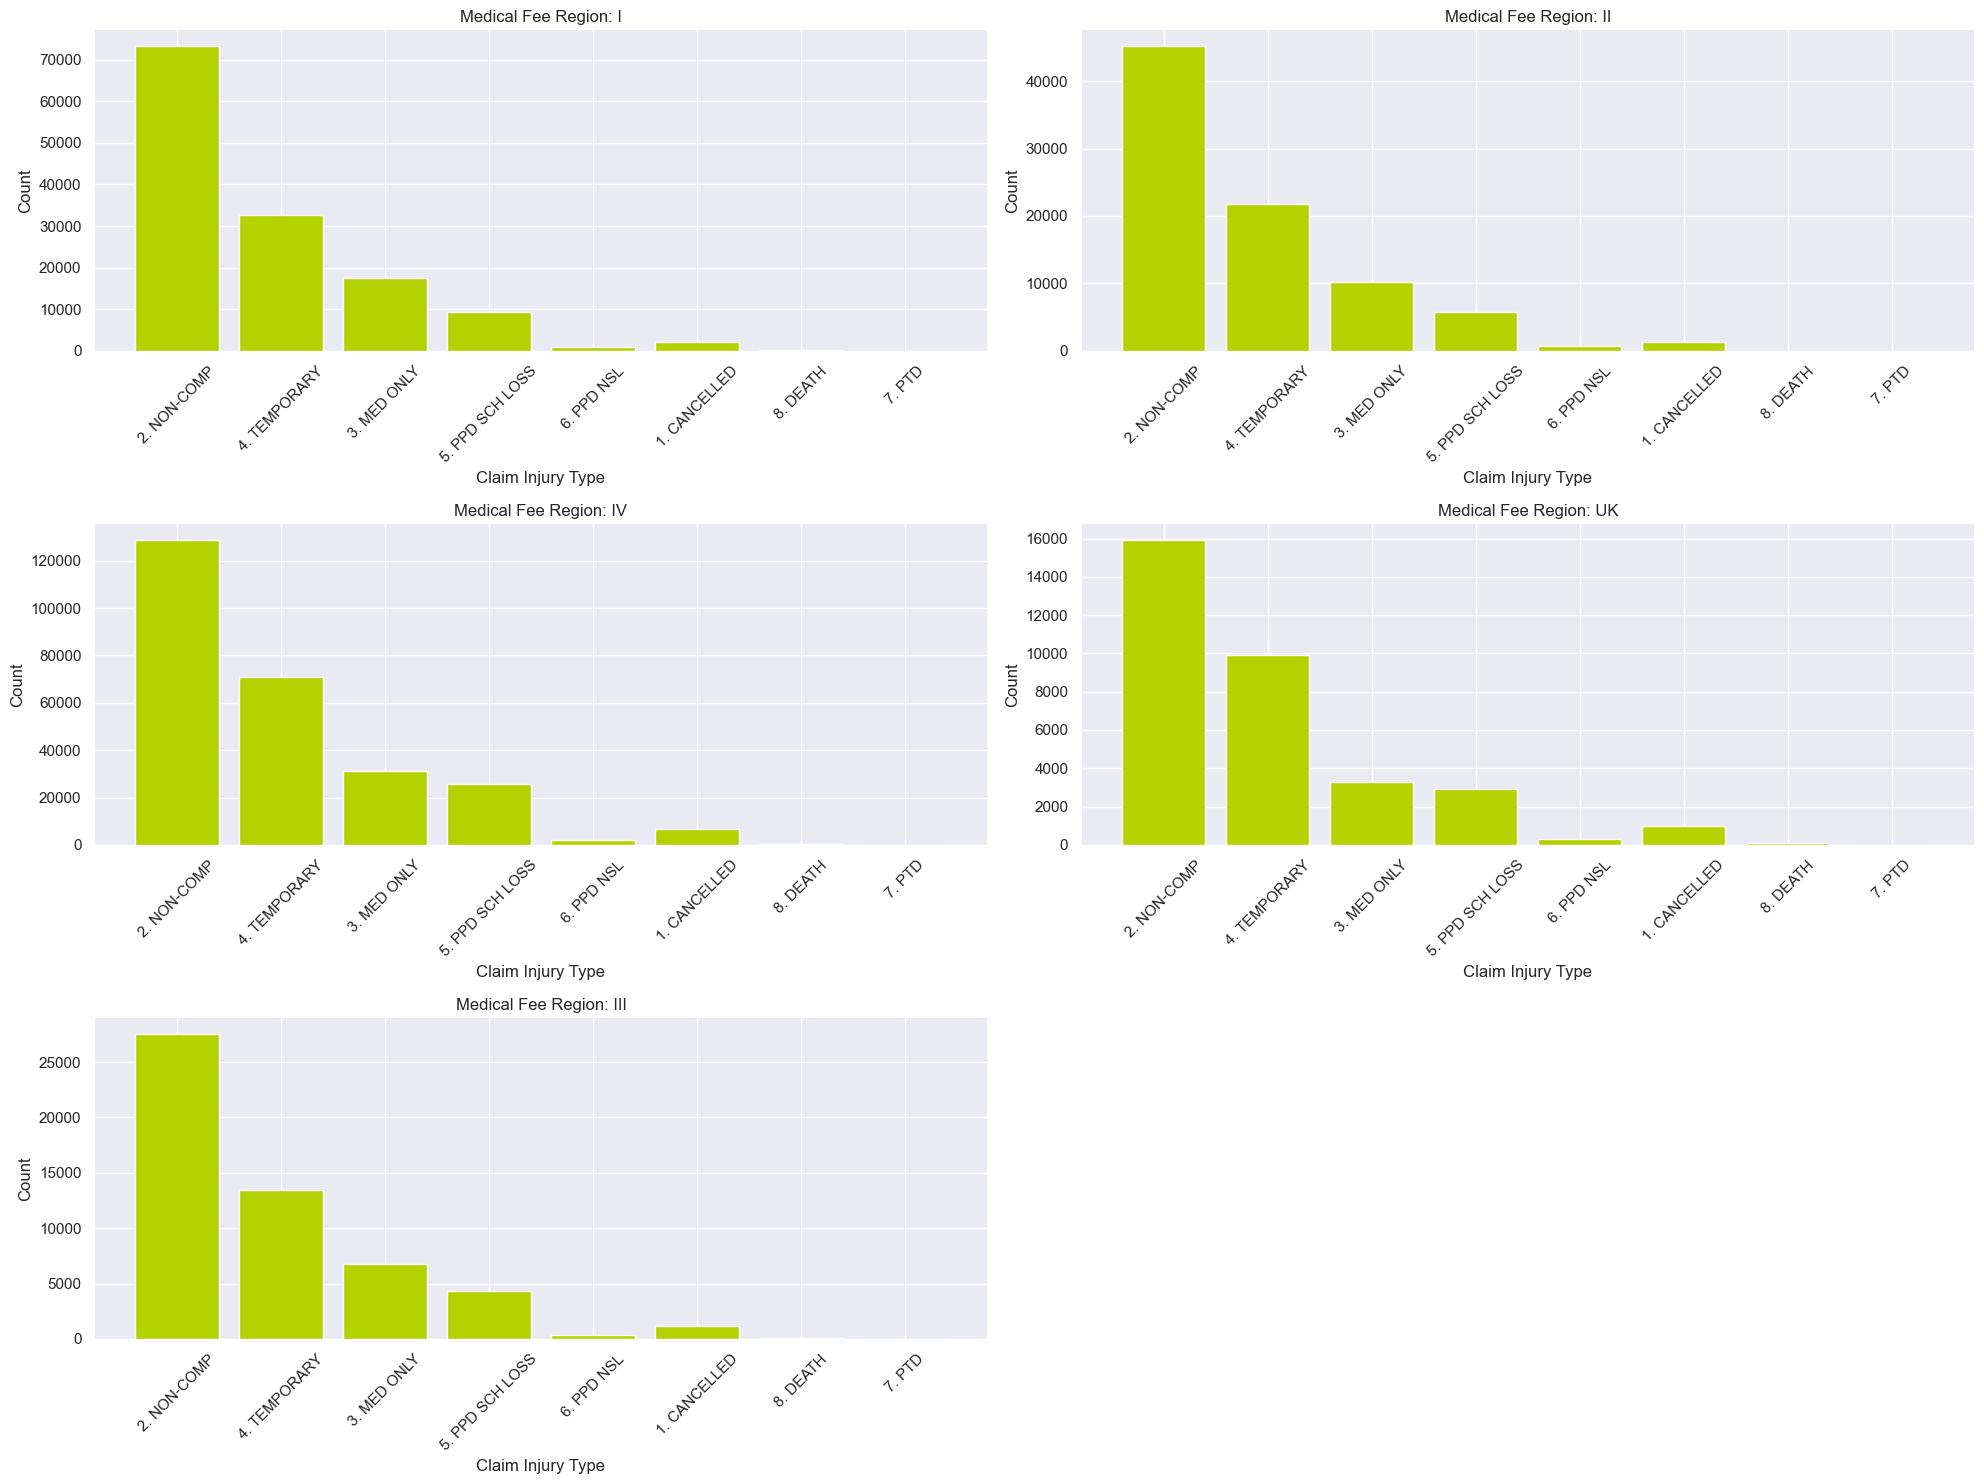

In [64]:
medical_fee_regions = df_train['Medical Fee Region'].unique()
claim_injury_types = df_train['Claim Injury Type'].unique()

fig, axes = plt.subplots(nrows=ceil(len(medical_fee_regions) / 2), ncols=2, figsize=(20, 15))
for ax, region in zip(axes.flatten(), medical_fee_regions):
    region_data = df_train[df_train['Medical Fee Region'] == region]
    claim_counts = region_data['Claim Injury Type'].value_counts().reindex(claim_injury_types, fill_value=0)
    ax.bar(claim_counts.index, claim_counts.values, color='#B2D300')
    ax.set_title(f'Medical Fee Region: {region}')
    ax.set_xlabel('Claim Injury Type')
    ax.set_ylabel('Count')
    ax.set_xticks(range(len(claim_counts.index)))
    ax.set_xticklabels(claim_counts.index, rotation=45)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
for ax in axes.flatten()[len(medical_fee_regions):]:
    fig.delaxes(ax)
plt.tight_layout()
plt.show()

The distribution remains the same in the first target variable.

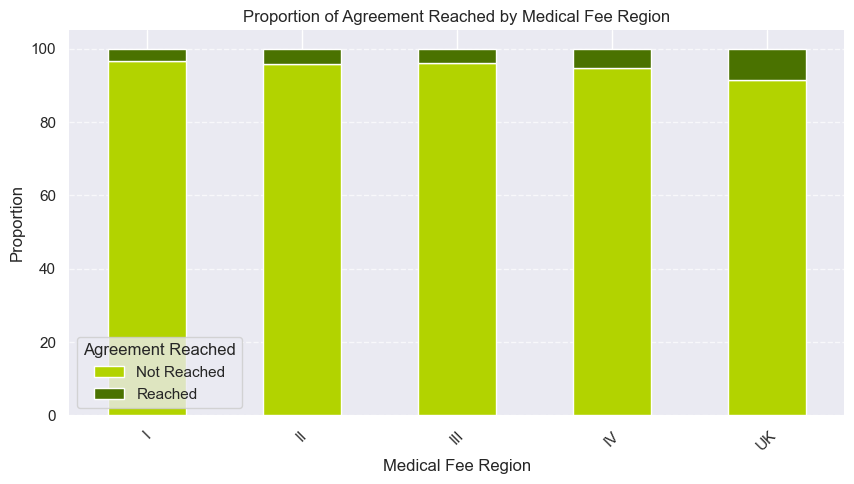

In [65]:
medfee_proportion = pd.crosstab(df_train['Medical Fee Region'], df_train['Agreement Reached'], normalize='index') * 100
colors = ['#B2D300', '#4A7200']
fig, ax = plt.subplots(figsize=(10, 5))
medfee_proportion.plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.xlabel('Medical Fee Region')
plt.ylabel('Proportion')
plt.title('Proportion of Agreement Reached by Medical Fee Region')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

As expected, the variable follows the same distribution and most of the cases are not agreed upon.

## C-2 Date

Relatively to the variable C-2 Date, the first thing to do is understand what this data represents. The group found the following information regarding the variable:

"Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2). Blank indicates no form received. For data sets published prior to the first quarter of 2022, the C-2 Date is the date of receipt of the “Employer’s Report of Work-Related Injury/Illness” for C-2. For data sets created in the first quarter of 2022 and forward, the C-2 Date is set to the earliest received date of equivalent injury/illness filings, including electronic data filed though the Board’s eClaims process."<br>

References:<br>
https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data

Given that the data focuses mostly on the years of 2020 to 2022, the line chart for C-2 Forms will look into this period.

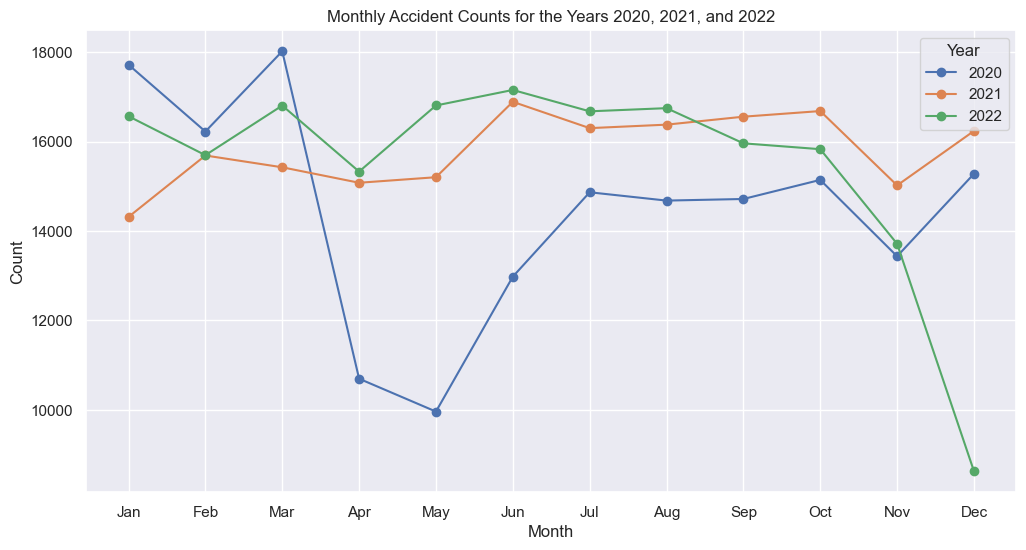

In [66]:
df_filtered = df_train[df_train['Accident Date'].dt.year.isin([2020, 2021, 2022])]
monthly_counts = df_filtered.groupby([df_filtered['Accident Date'].dt.year, df_filtered['Accident Date'].dt.month]).size().unstack(level=0)
plt.figure(figsize=(12, 6))
for year in [2020, 2021, 2022]:
    plt.plot(monthly_counts.index, monthly_counts[year], marker='o', label=str(year))

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Accident Counts for the Years 2020, 2021, and 2022')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

There appears to be no type of periodicity.

Now, the group will see if the time elapsed between the accident and the submission of the C-2 Form has an inpact on WCB's decision. For that, a helper variable will be created. Then it will be binned according to the following groupings:

- 1 week (7 days)
- 1 month (30 days)
- 3 Months (90 days)
- 6 months (180 days)
- 1 year (365 days)
- 365 x 10 (10 years)
- 365 x 60 (60 years, this group was created to encompass all observations)

In [67]:
df_train['days_to_c2'] = (df_train['C-2 Date'] - df_train['Accident Date']).dt.days

In [68]:
bins = (-1, 0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['Same Day', '1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
df_train['days_to_c2_binned'] = pd.cut(df_train['days_to_c2'], bins=bins, labels=labels)

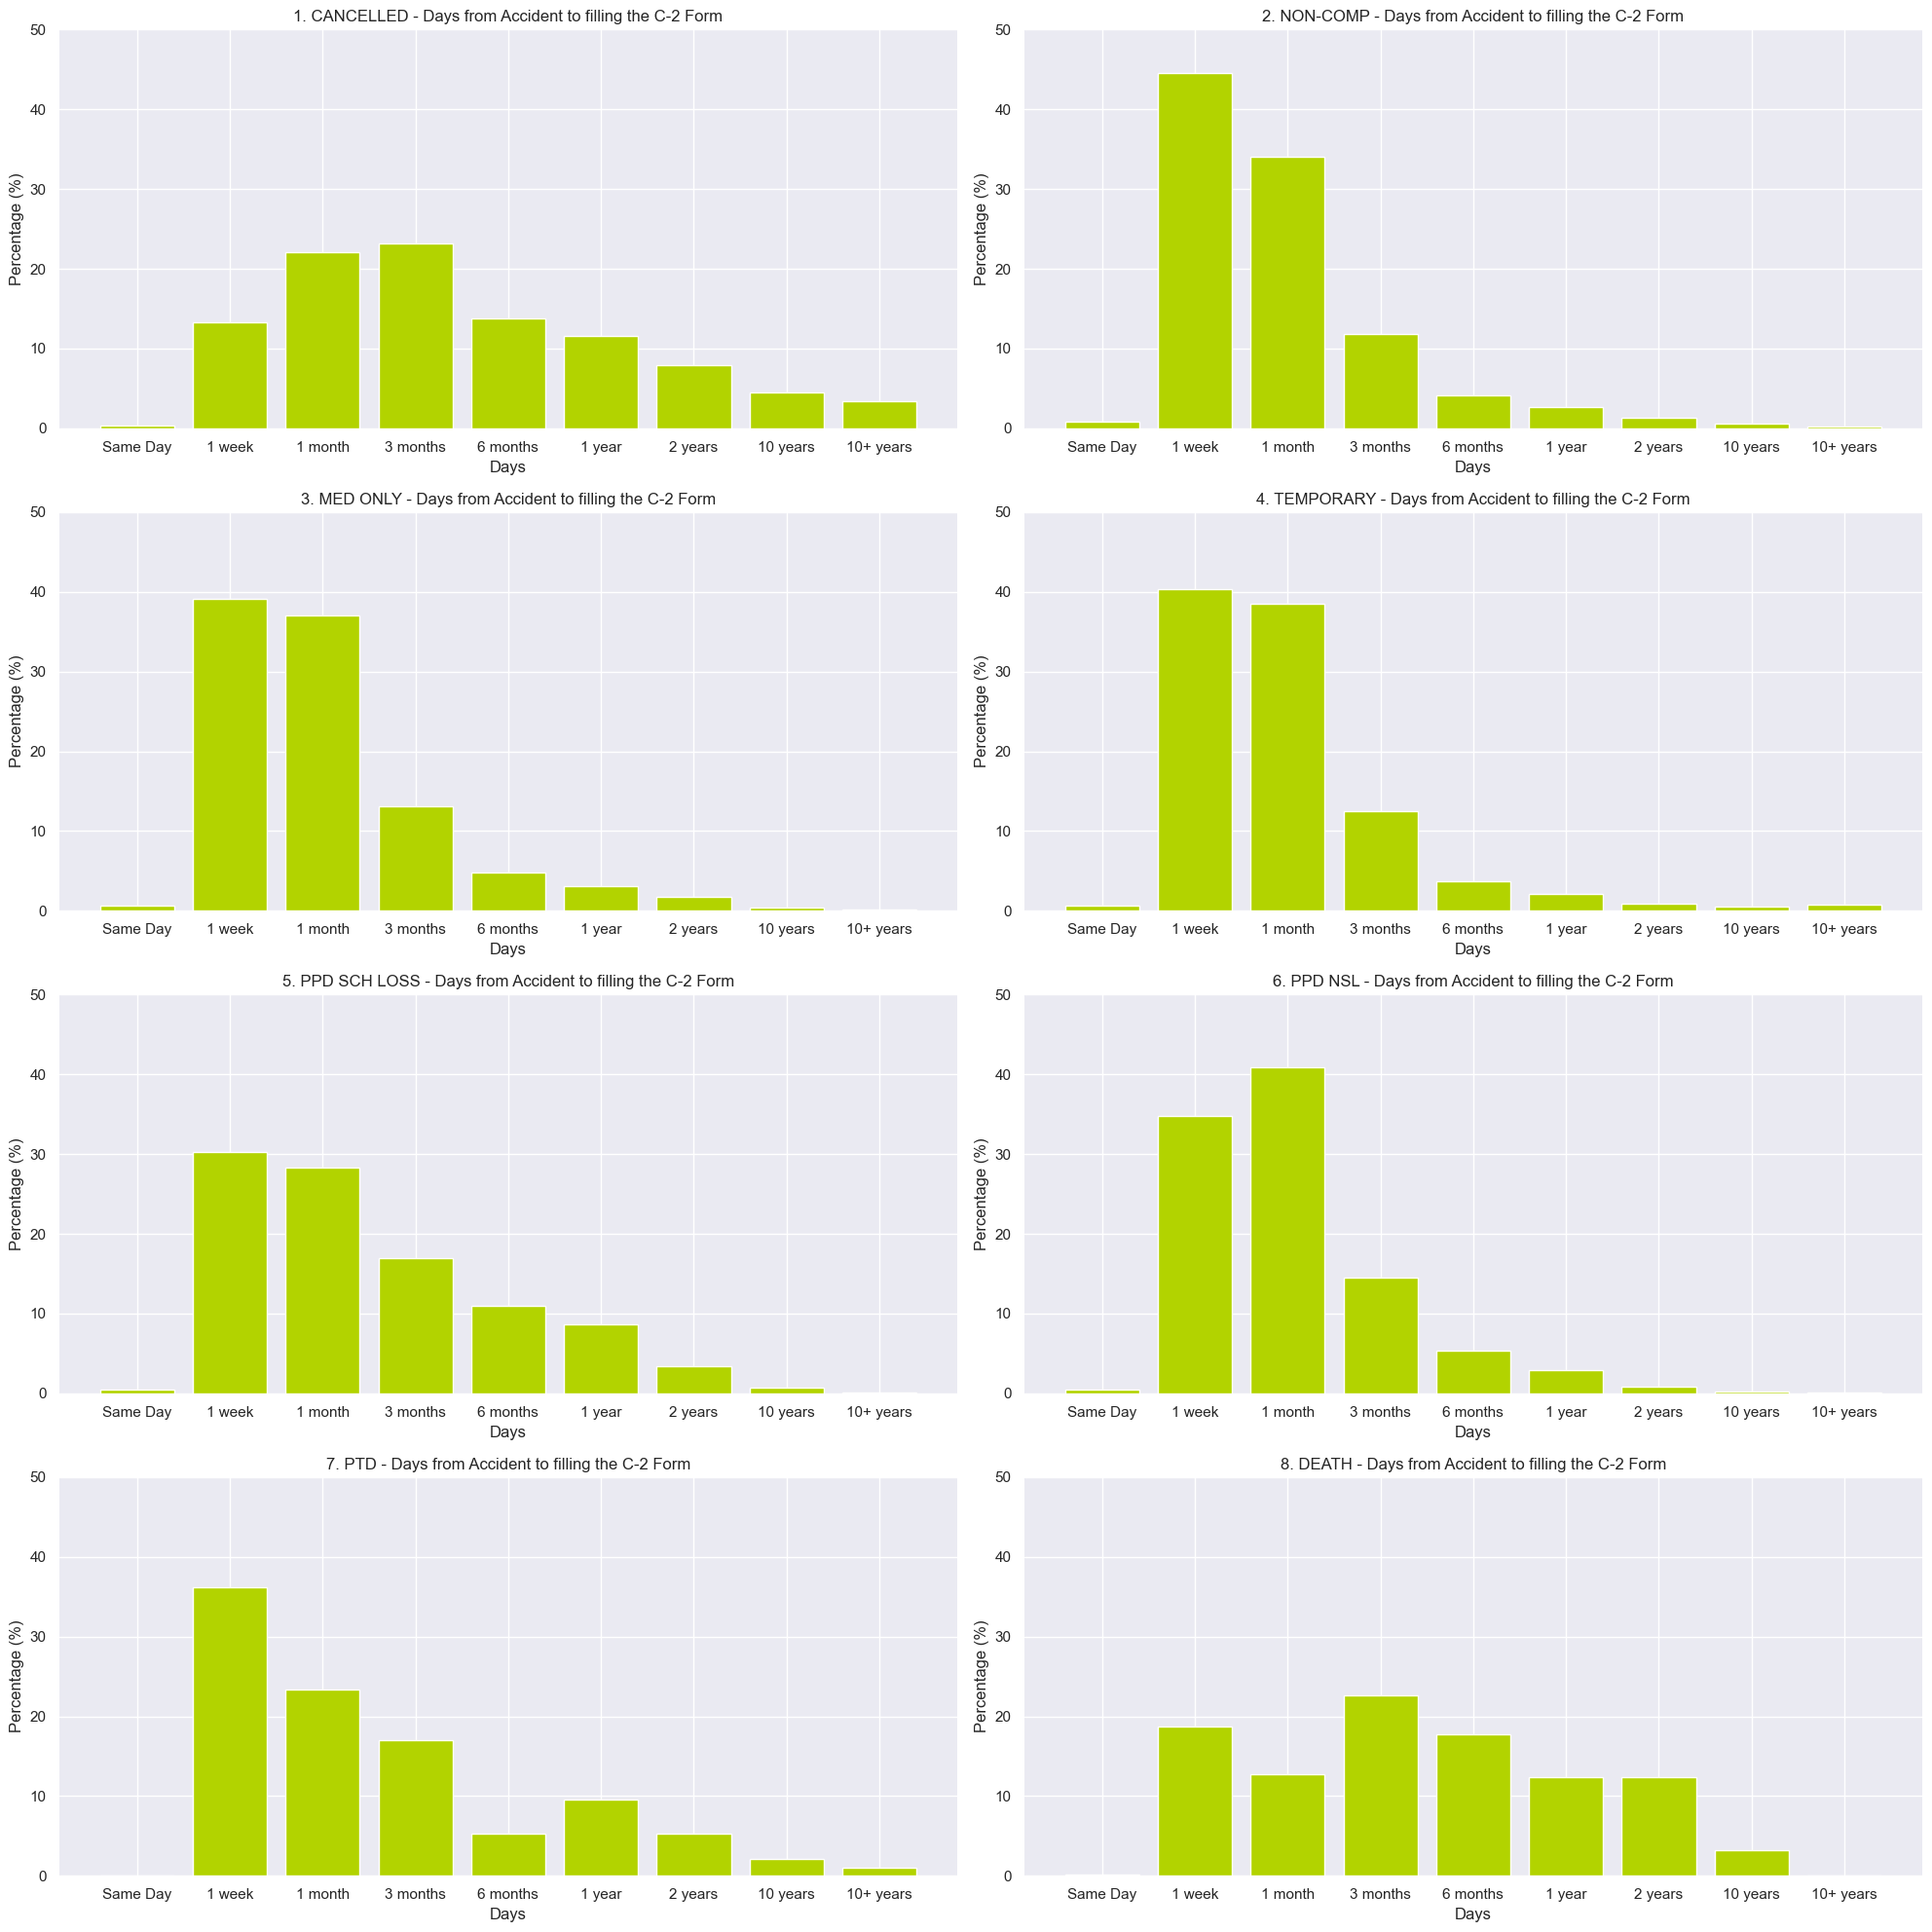

In [69]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
claim_list = ['1. CANCELLED', '2. NON-COMP', '3. MED ONLY', '4. TEMPORARY', '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH']

for ax, claim in zip(axes.flatten(), claim_list):
    days_accident_binned = df_train[df_train['Claim Injury Type'] == claim]['days_to_c2_binned'].value_counts().sort_index()
    bars = ax.bar(days_accident_binned.index.astype(str), days_accident_binned.values / days_accident_binned.values.sum() * 100, color='#B2D300')
    ax.set_title(f'{claim} - Days from Accident to filling the C-2 Form')
    ax.set_xlabel('Days')
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 50)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

It seems that, in most cases, the form is filled out up to a month after the accident happens. This is true for all kinds of decisions. Cases involving death seem to be the exception. In these cases, there is a more uniform distribution. This could be that employees don't bother to fill out the form in such a hurry if a death occurred.

Given that C-2 is the date of a form filled out by the employee after the accident, "C-2 Date" cannot happen before "Accident Date". In order to ensure the data is consistent, it must be confirmed if such cases occured:

In [70]:
c2_before_accident = df_train[df_train['days_to_c2'] < 0]
print(f"Number of times the C-2 report is filled before the accident happens: {c2_before_accident.shape[0]}")

Number of times the C-2 report is filled before the accident happens: 982


These rows will be addressed in the data cleaning stage.

## Carrier Type

In [71]:
df_train['Carrier Type'].unique()

array(['1A. PRIVATE', '2A. SIF', '4A. SELF PRIVATE', '3A. SELF PUBLIC',
       'UNKNOWN', '5D. SPECIAL FUND - UNKNOWN',
       '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)',
       '5C. SPECIAL FUND - POI CARRIER WCB MENANDS'], dtype=object)

This variable has the following unique values:

- 1A. PRIVATE
- 2A. SIF
- 3A. SELF PUBLIC
- 4A. SELF PRIVATE
- 5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)
- 5C. SPECIAL FUND - POI CARRIER WCB MENANDS
- 5D. SPECIAL FUND - UNKNOWN
- UNKNOWN

In the data dictionary provided by the WCB, the following description is given:

> Type of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer (Private Carrier, State Insurance 1  Fund, Selfinsured, or Special Fund). (See FAQ for clarifications on carrier type)

From this, we can gather that the carrier types can be grouped into the following categories:

- Private Carrier
- State Insurance
- Self-Insured
- Special Fund

And in the case of the present data, another group has to be added to account for the rows where the `carrier type` is unknown.

The new carrier types will be structured as follows:

| Original Carrier Type | New Group |
|---|---|
| 1A. PRIVATE | Private Carrier |
| 2A. SIF | State Insurance |
| 3A. SELF PUBLIC | Self-Public |
| 4A. SELF PRIVATE | Self-Private |
| 5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A) | Special Fund |
| 5C. SPECIAL FUND - POI CARRIER WCB MENANDS | Special Fund |
| 5D. SPECIAL FUND - UNKNOWN | Special Fund |
| UNKNOWN | Unknown |

Note that the 3rd group (Self-Insured) isn't kept, instead its subdivisions (SELF PRIVATE and SELF PUBLIC) are kept. This is due to the fact that both these categories have enough observations to represent their own group, and there are differences amongst them that would be lost if they were mixed. For example, the average weekly salary in SELF-PUBLIC is almost double that of SELF-PRIVATE.

Before grouping, the group decided to take a look at the distribution of each type to see how it was affected by the transformation.

In [72]:
value_c = df_train['Carrier Type'].value_counts()
value_c_df = pd.DataFrame({'Carrier Type': value_c.index, 'Count': value_c.values})
value_c_df['Percentage'] = value_c_df['Count'] / len(df_train) * 100
value_c_df

Carrier Type   Count  Percentage
0                                  1A. PRIVATE  285366   49.713252
1                              3A. SELF PUBLIC  121920   21.239530
2                                      2A. SIF  111144   19.362257
3                             4A. SELF PRIVATE   52788    9.196131
4                                      UNKNOWN    1774    0.309046
5                   5D. SPECIAL FUND - UNKNOWN    1023    0.178216
6   5C. SPECIAL FUND - POI CARRIER WCB MENANDS       5    0.000871
7  5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)       4    0.000697

<Axes: ylabel='Carrier Type'>

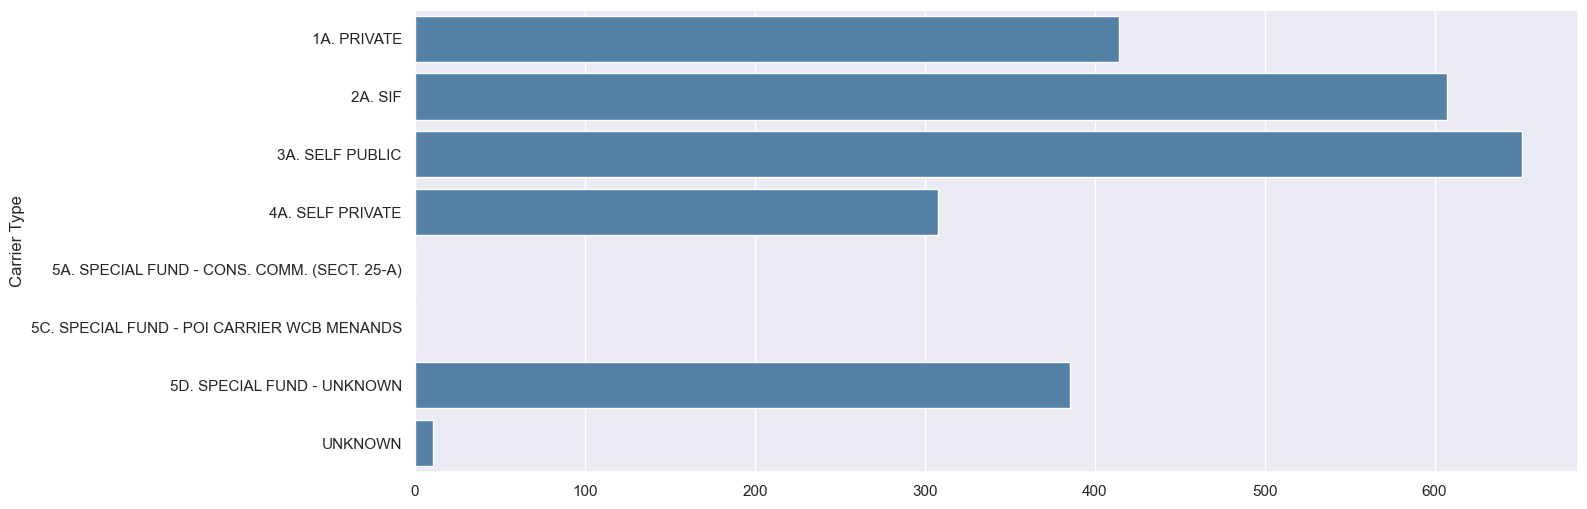

In [73]:
# Group by 'Carrier Type' and calculate the mean of 'Average Weekly Wage'
avg_weekly_wage_by_carrier_type = df_train.groupby('Carrier Type')['Average Weekly Wage'].mean()

# Plot the data
plt.figure(figsize=(15, 6))
sns.barplot(x=avg_weekly_wage_by_carrier_type.values, y=avg_weekly_wage_by_carrier_type.index, color='#4782B4')

Text(0.5, 1.0, 'Proportion of Genders by Carrier Type')

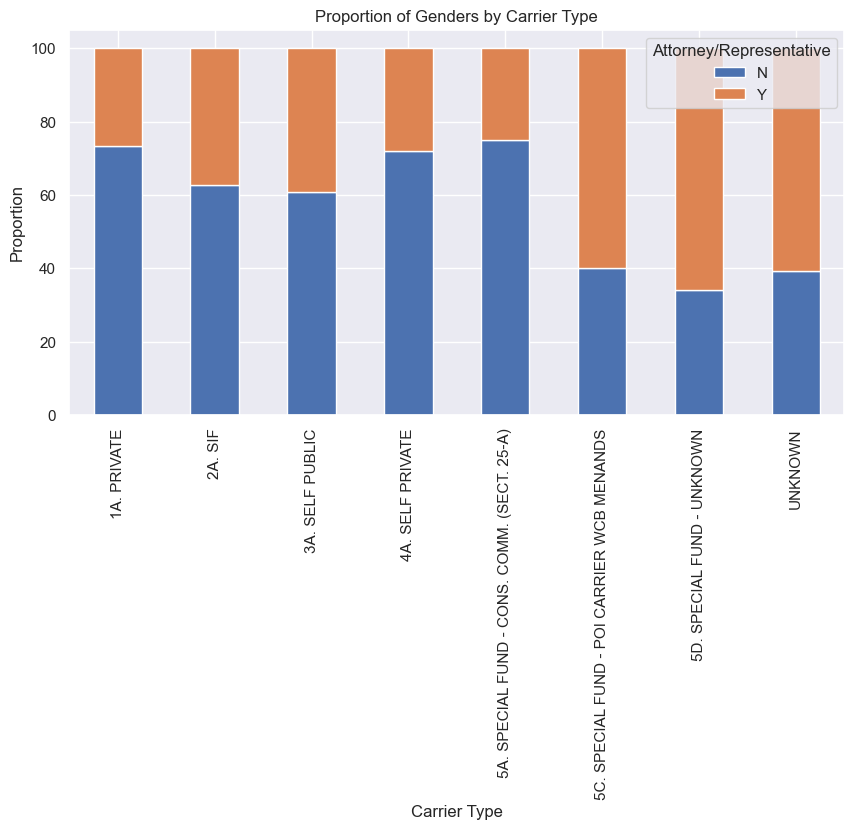

In [74]:
gender_proportion_carrier = pd.crosstab(df_train['Carrier Type'], df_train['Attorney/Representative'], normalize='index') * 100
fig, ax = plt.subplots(figsize=(10, 5))  # Increased figure size
gender_proportion_carrier.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Carrier Type')
plt.ylabel('Proportion')
plt.title('Proportion of Genders by Carrier Type')

Text(0.5, 1.0, 'Proportion of Genders by Carrier Type')

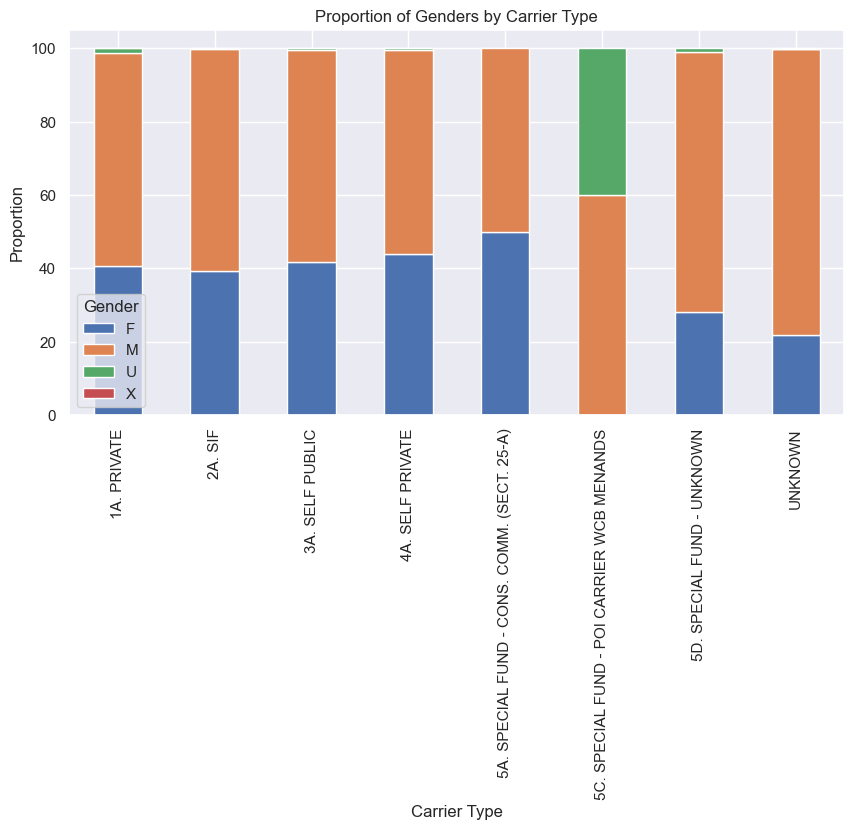

In [75]:
gender_proportion_carrier = pd.crosstab(df_train['Carrier Type'], df_train['Gender'], normalize='index') * 100
fig, ax = plt.subplots(figsize=(10, 5))  # Increased figure size
gender_proportion_carrier.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Carrier Type')
plt.ylabel('Proportion')
plt.title('Proportion of Genders by Carrier Type')

In [76]:
df_train['Carrier Type'] = df_train['Carrier Type'].map({
    '1A. PRIVATE': 'PRIVATE',
    '2A. SIF': 'STATE INSURANCE',
    '3A. SELF PUBLIC': 'SELF-PUBLIC',
    '4A. SELF PRIVATE': 'SELF-PRIVATE',
    '5D. SPECIAL FUND - UNKNOWN': 'SPECIAL FUND',
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 'SPECIAL FUND',
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)':'SPECIAL FUND',
    'UNKNOWN':'UNKNOWN'
    })

In [77]:
value_c = df_train['Carrier Type'].value_counts()
value_c_df = pd.DataFrame({'Carrier Type': value_c.index, 'Count': value_c.values})
value_c_df['Percentage'] = value_c_df['Count'] / len(df_train) * 100
value_c_df

Carrier Type   Count  Percentage
0          PRIVATE  285366   49.713252
1      SELF-PUBLIC  121920   21.239530
2  STATE INSURANCE  111144   19.362257
3     SELF-PRIVATE   52788    9.196131
4          UNKNOWN    1774    0.309046
5     SPECIAL FUND    1032    0.179783

<Axes: ylabel='Carrier Type'>

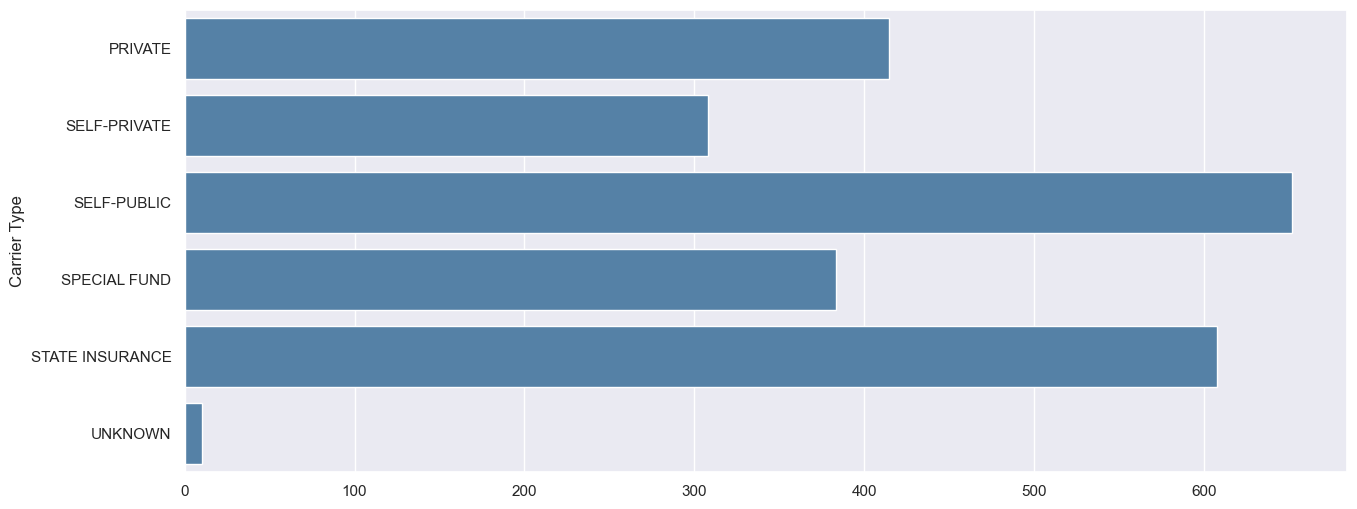

In [78]:
# Group by 'Carrier Type' and calculate the mean of 'Average Weekly Wage'
avg_weekly_wage_by_carrier_type = df_train.groupby('Carrier Type')['Average Weekly Wage'].mean()

# Plot the data
plt.figure(figsize=(15, 6))
sns.barplot(x=avg_weekly_wage_by_carrier_type.values, y=avg_weekly_wage_by_carrier_type.index, color='#4782B4')

Text(0.5, 1.0, 'Proportion of Genders by Carrier Type')

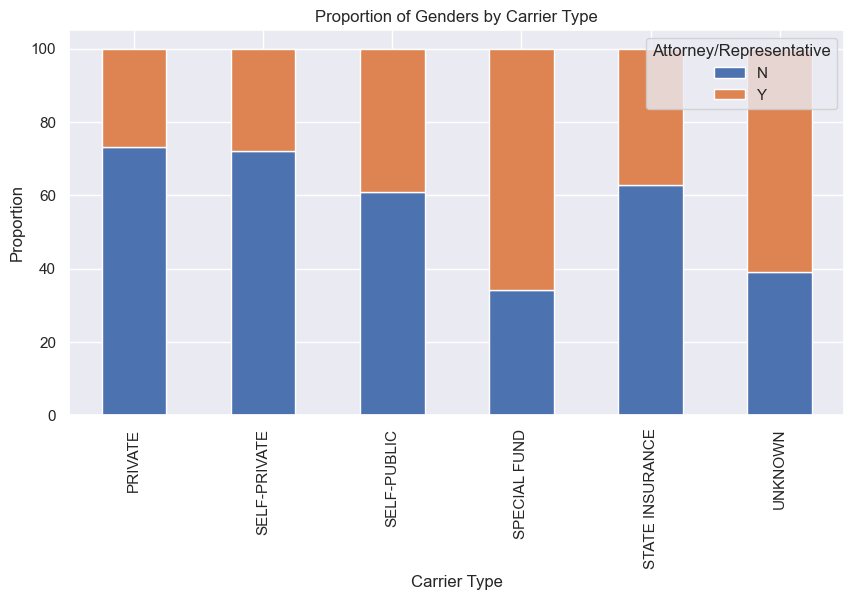

In [79]:
gender_proportion_carrier = pd.crosstab(df_train['Carrier Type'], df_train['Attorney/Representative'], normalize='index') * 100
fig, ax = plt.subplots(figsize=(10, 5))  # Increased figure size
gender_proportion_carrier.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Carrier Type')
plt.ylabel('Proportion')
plt.title('Proportion of Genders by Carrier Type')

Text(0.5, 1.0, 'Proportion of Genders by Carrier Type')

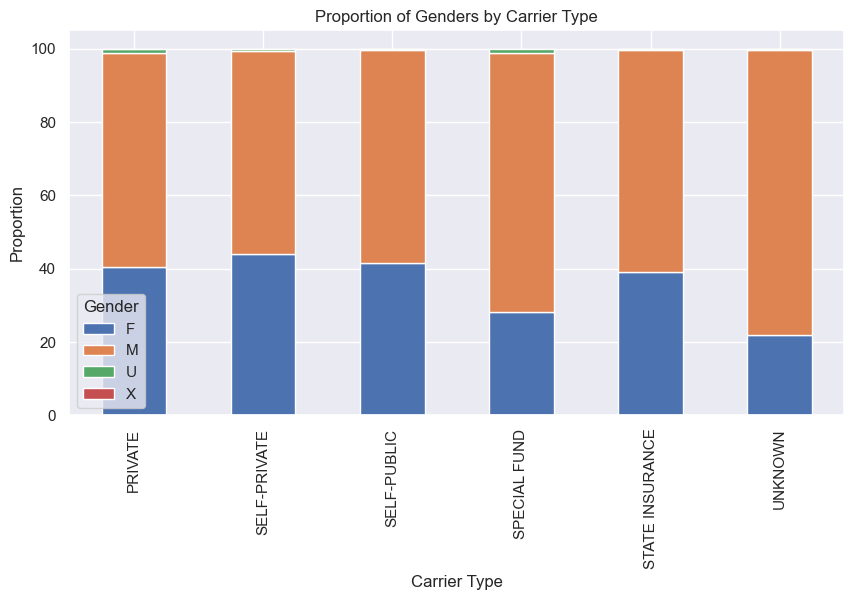

In [80]:
gender_proportion_carrier = pd.crosstab(df_train['Carrier Type'], df_train['Gender'], normalize='index') * 100
fig, ax = plt.subplots(figsize=(10, 5))  # Increased figure size
gender_proportion_carrier.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Carrier Type')
plt.ylabel('Proportion')
plt.title('Proportion of Genders by Carrier Type')

## Code Variables

In the dataset, there are a lot of columns regarding codes (industry codes, injury codes, etc.). These codes have a high cardinality (there are between 50 to 70 unique values) and, as such, they are of no use to the model or visualization.

In [81]:
unique_cause_codes = df_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()
unique_nature_codes = df_train[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()
unique_body_codes = df_train[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()

In [82]:
unique_body_codes

WCIO Part Of Body Code  \
0                         62   
1                         38   
2                         10   
4                         36   
8                         60   
9                         14   
10                        55   
11                        53   
12                        37   
14                        42   
16                        61   
17                        54   
18                        51   
21                        52   
24                        17   
28                        34   
29                        23   
40                        35   
41                        18   
44                        31   
45                        25   
47                        56   
53                        32   
66                        30   
70                        90   
71                        91   
74                        20   
77                        44   
100                       39   
105                       13   
111                       50   
113                       43   
122                       33   
128                       -9   
151                       22   
167                       41   
175                       11   
190                       57   
200                       19   
210                     <NA>   
241                       16   
252                       66   
302                       40   
330                       99   
342                       65   
387                       46   
434                       15   
470                       58   
583                       48   
673                       49   
827                       21   
973                       63   
1009                      12   
1158                      45   
1185                      64   
1636                      24   
2761                      47   
4856                      26   

                          WCIO Part Of Body Description  
0                                              BUTTOCKS  
1                                           SHOULDER(S)  
2                                  MULTIPLE HEAD INJURY  
4                                             FINGER(S)  
8                                                 LUNGS  
9                                                EYE(S)  
10                                                ANKLE  
11                                                 KNEE  
12                                                THUMB  
14                                      LOWER BACK AREA  
16                              ABDOMEN INCLUDING GROIN  
17                                            LOWER LEG  
18                                                  HIP  
21                                            UPPER LEG  
24                                                MOUTH  
28                                                WRIST  
29                                          SPINAL CORD  
40                                                 HAND  
41                                          SOFT TISSUE  
44                                            UPPER ARM  
45                                          SOFT TISSUE  
47                                                 FOOT  
53                                                ELBOW  
66                           MULTIPLE UPPER EXTREMITIES  
70                  MULTIPLE BODY PARTS (INCLUDING BODY  
71               BODY SYSTEMS AND MULTIPLE BODY SYSTEMS  
74                                 MULTIPLE NECK INJURY  
77                                                CHEST  
100                                 WRIST (S) & HAND(S)  
105                                              EAR(S)  
111                          MULTIPLE LOWER EXTREMITIES  
113                                                DISC  
122                                           LOWER ARM  
128                                            MULTIPLE  
151                                                DISC  
167                          

### Body Groups

To reduce the dimensionality, the codes can be grouped into 5 groups:
- Head
- Torso
- Arms
- Legs
- Other (for unkown codes)

This has to be done manually.

In [83]:
## change the descriptions of the given codes to more readable descriptions:
# 18 - SOFT TISSUE HEAD
# 25 - SOFT TISSUE NECK
# 22 - DISC NECK
# 43 - DISC TRUNK

# the body part code 18 has a description of 'SOFT TISSUE that need to be altered to 'SOFT TISSUE HEAD'
df_train.loc[df_train['WCIO Part Of Body Code'] == 18, 'WCIO Part Of Body Description'] = 'SOFT TISSUE HEAD'

# the body part code 25 has a description of 'SOFT TISSUE that need to be altered to 'SOFT TISSUE NECK'
df_train.loc[df_train['WCIO Part Of Body Code'] == 25, 'WCIO Part Of Body Description'] = 'SOFT TISSUE NECK'

# the body part code 22 has a description of 'DISC that need to be altered to 'DISC NECK'
df_train.loc[df_train['WCIO Part Of Body Code'] == 22, 'WCIO Part Of Body Description'] = 'DISC NECK'

# the body part code 43 has a description of 'DISC that need to be altered to 'DISC TRUNK'
df_train.loc[df_train['WCIO Part Of Body Code'] == 43, 'WCIO Part Of Body Description'] = 'DISC TRUNK'

In [84]:
head = [
    "MULTIPLE HEAD INJURY", "EYE(S)", "MOUTH", "EAR(S)", "SKULL", "FACIAL BONES", 
    "TEETH", "NOSE", "BRAIN", "LARYNX", "TRACHEA", "MULTIPLE NECK INJURY", "SOFT TISSUE HEAD", "SOFT TISSUE NECK"
]

torso = [
    "TORSO", "SHOULDER(S)", "LUNGS", "BUTTOCKS", "LOWER BACK AREA", "ABDOMEN INCLUDING GROIN", 
    "HIP", "CHEST", "DISC NECK", "DISC TRUNK", "UPPER BACK AREA", "PELVIS", "HEART", "VERTEBRAE", 
    "LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA", "SACRUM AND COCCYX", "SPINAL CORD", "MULTIPLE TRUNK", "SPINAL CORD", "INTERNAL ORGANS"
]

arm = [
    "ARMS", "FINGER(S)", "THUMB", "WRIST", "HAND", "UPPER ARM", "ELBOW", "WRIST (S) & HAND(S)", "MULTIPLE UPPER EXTREMITIES"
]

leg = [
    "LEGS", "ANKLE", "KNEE", "LOWER LEG", "UPPER LEG", "FOOT", "TOES", "GREAT TOE", 
    "MULTIPLE LOWER EXTREMITIES"
]

multiple_body_parts = [ 'ARTIFICIAL APPLIANCE', "INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED",
                        'NO PHYSICAL INJURY', 'MULTIPLE BODY PARTS (INCLUDING BODY', 'BODY SYSTEMS AND MULTIPLE BODY SYSTEMS',
                         'WHOLE BODY', 'MULTIPLE']

In [85]:
df_train['body_group'] = np.nan
df_train.loc[df_train['WCIO Part Of Body Description'].isin(head), 'body_group'] = 'Head'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(torso), 'body_group'] = 'Torso'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(arm), 'body_group'] = 'Arms'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(leg), 'body_group'] = 'Legs'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(multiple_body_parts), 'body_group'] = 'Multiple Body Parts'

C:\Users\marsi\AppData\Local\Temp\ipykernel_8560\1013112835.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Head' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['WCIO Part Of Body Description'].isin(head), 'body_group'] = 'Head'


<BarContainer object of 5 artists>

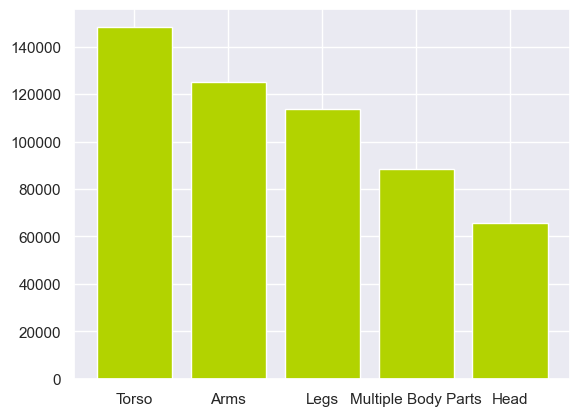

In [86]:
df_train['body_group'].value_counts()
plt.bar(df_train['body_group'].value_counts().index, df_train['body_group'].value_counts().values, color='#B2D300')

Most of our observations suffered injuries in the torso area.

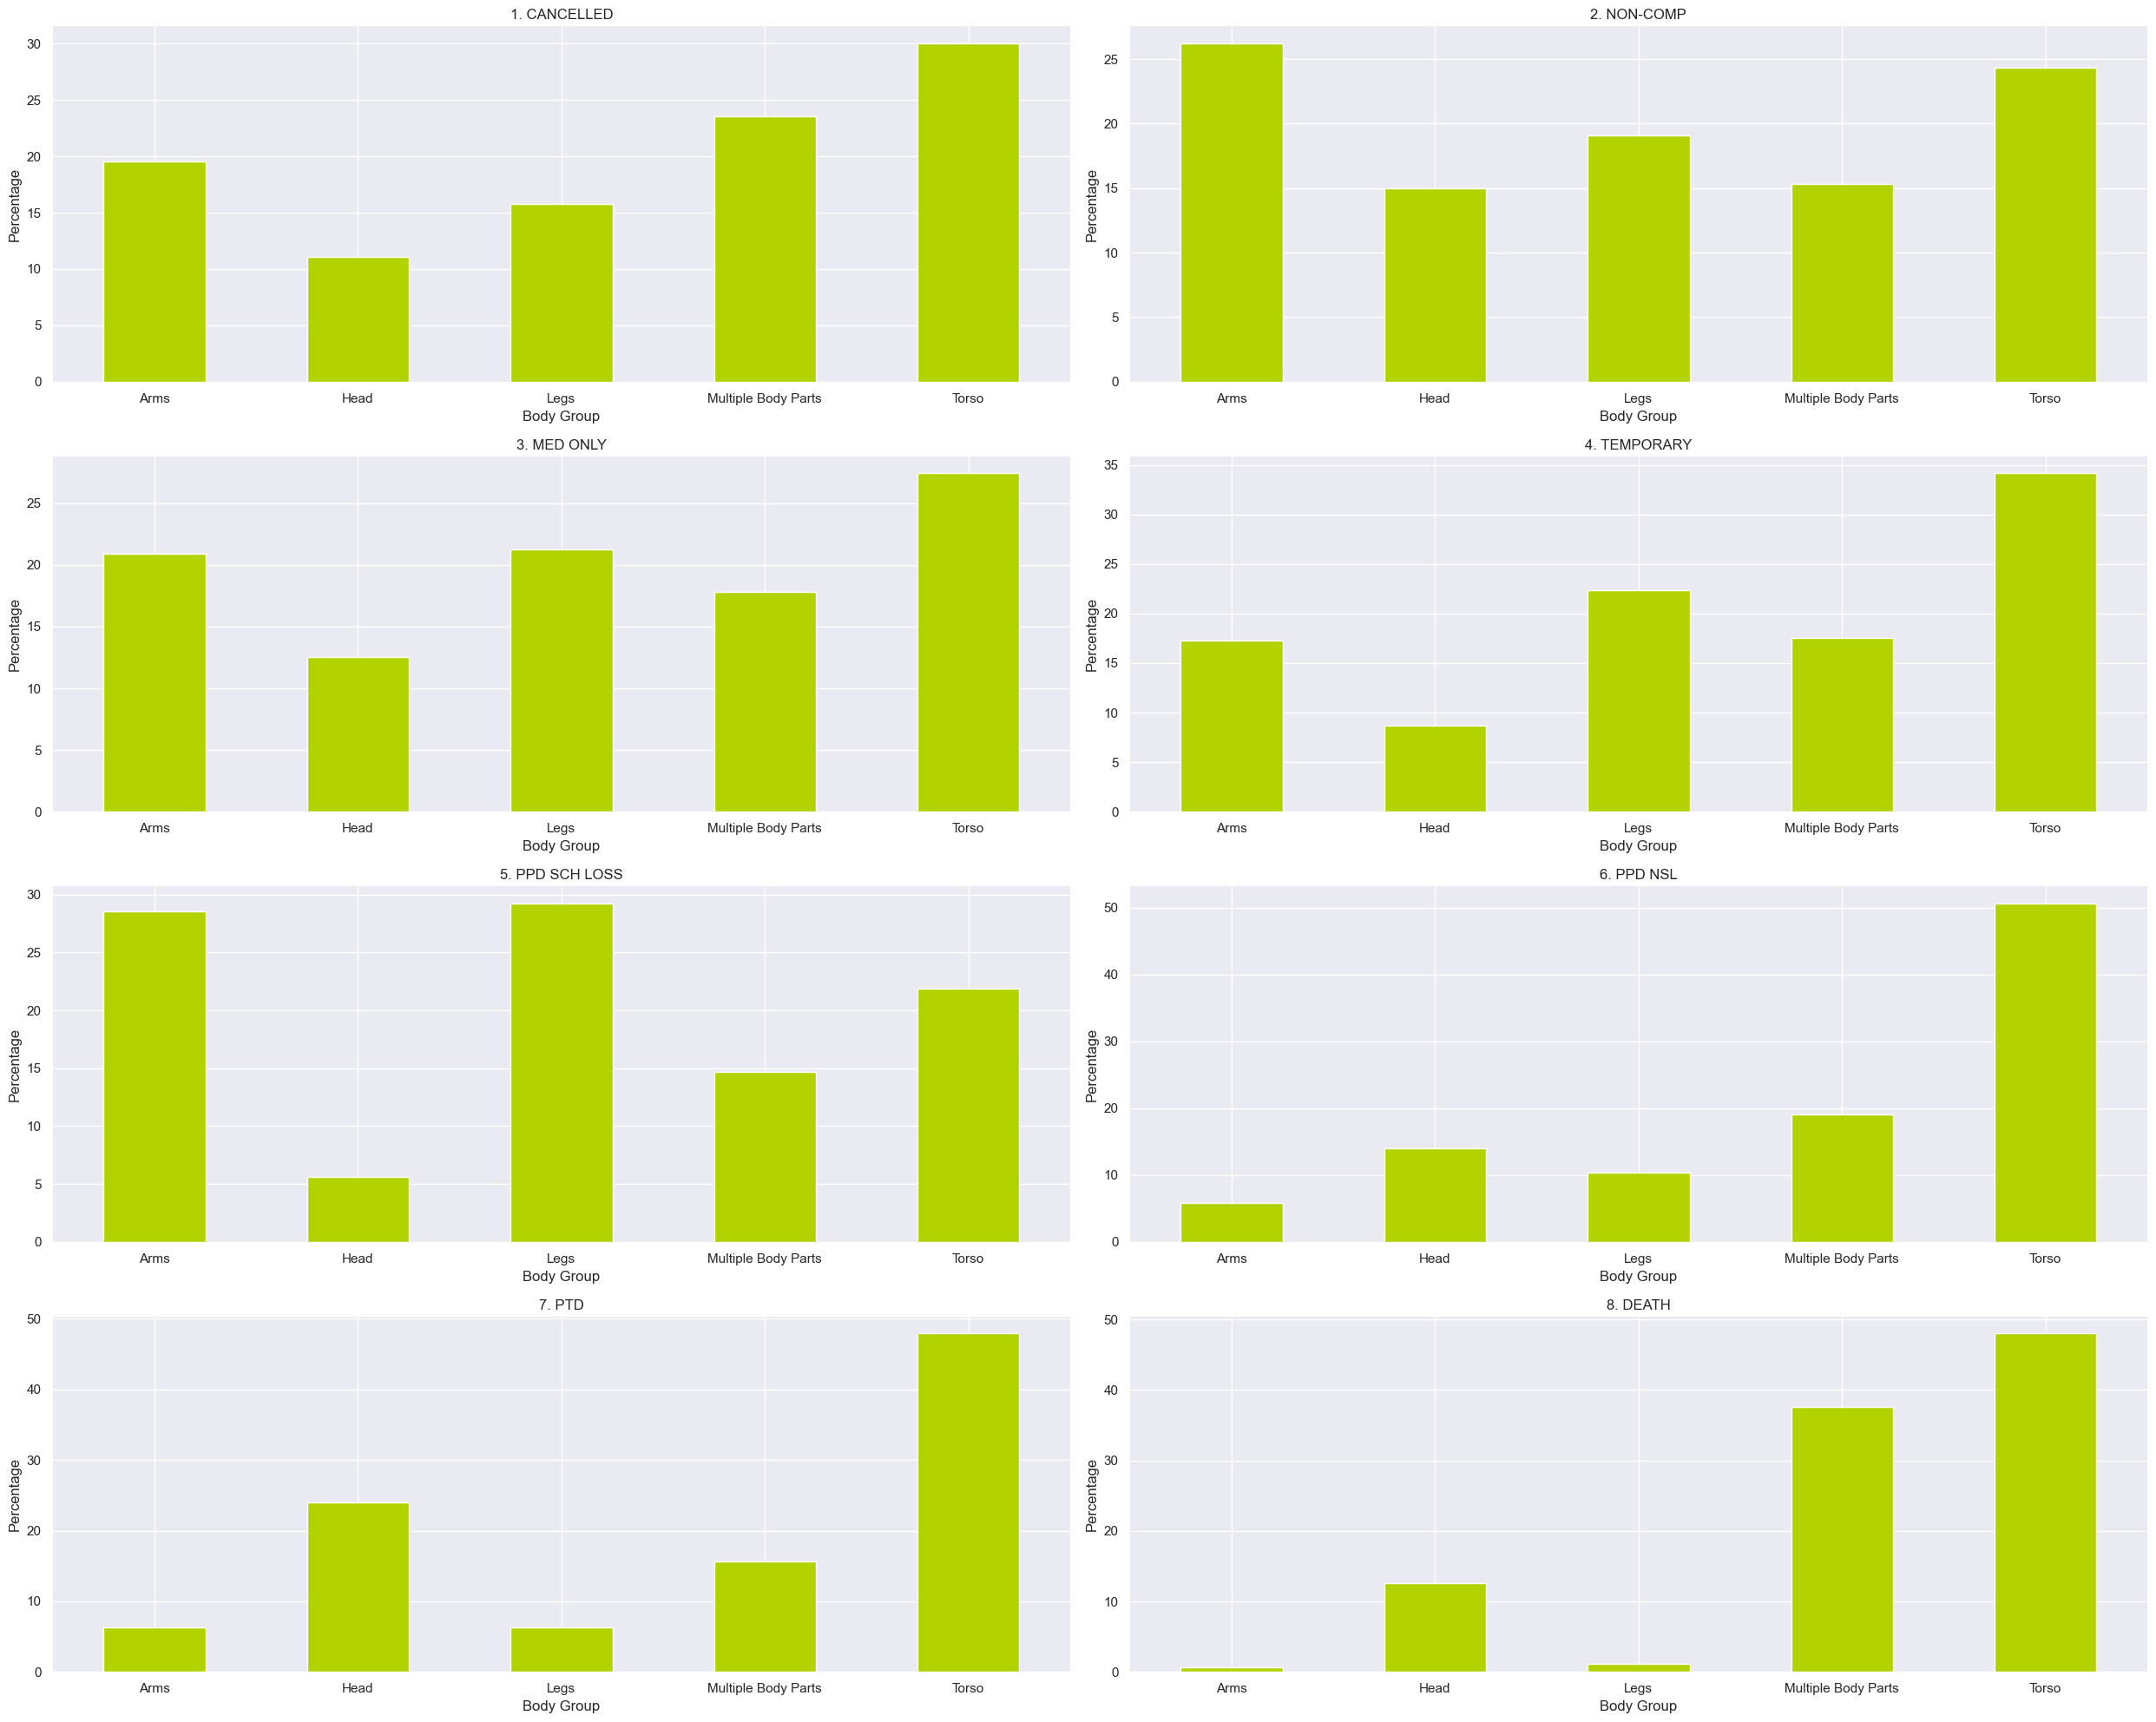

In [87]:
body_group_percentage = df_train.groupby(['Claim Injury Type', 'body_group']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()
for ax, claim_type in zip(axes, body_group_percentage.index):
    body_group_percentage.loc[claim_type].plot(kind='bar', ax=ax, color='#B2D300')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(claim_type)
    ax.set_xlabel('Body Group')
    ax.set_ylabel('Percentage')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

The 'Other' category grows as the cases get more severe, reaching its peak in the most severe cases. The 'Head' category also shows a slight increase in the 7th and 8th categories.

In [88]:
unique_nature_codes

WCIO Nature of Injury Code  \
0                               10   
1                               49   
2                                7   
4                               43   
6                               40   
7                               71   
8                               59   
11                              37   
12                               4   
13                              52   
21                              28   
36                              25   
52                              90   
65                              46   
94                              16   
131                             80   
148                             34   
157                              3   
176                             78   
191                              1   
210                           <NA>   
236                             36   
272                             13   
359                             53   
395                             42   
481                             65   
486                             31   
589                             77   
660                             47   
840                             19   
1063                            72   
1066                            60   
1202                            68   
1724                            54   
1818                            69   
1821                            73   
1857                             2   
1991                            41   
4040                            66   
4269                            91   
4355                            58   
6197                            55   
6623                            83   
6863                            74   
14269                           32   
14516                           75   
14645                           22   
14820                           61   
14847                           67   
25299                           76   
36872                           30   
51036                           62   
113801                          64   
124046                          38   
142860                          79   
168368                          70   
399339                          63   

                        WCIO Nature of Injury Description  
0                                               CONTUSION  
1                                          SPRAIN OR TEAR  
2                                              CONCUSSION  
4                                                PUNCTURE  
6                                              LACERATION  
7              ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC  
8                        ALL OTHER SPECIFIC INJURIES, NOC  
11                                           INFLAMMATION  
12                                                   BURN  
13                                         STRAIN OR TEAR  
21                                               FRACTURE  
36                                           FOREIGN BODY  
52                        MULTIPLE PHYSICAL INJURIES ONLY  
65                                                RUPTURE  
94                                            DISLOCATION  
131                      ALL OTHER CUMULATIVE INJURY, NOC  
148                                                HERNIA  
157                                       ANGINA PECTORIS  
176                                CARPAL TUNNEL SYNDROME  
191                                    NO PHYSICAL INJURY  
210                                                   NaN  
236                                             INFECTION  
272                                              CRUSHING  
359                                               SYNCOPE  
395             POISONING - GENERAL (NOT OD OR CUMULATIVE  
481                                 RESPIRATORY DISORDERS  
486                            HEARING LOSS OR IMPAIRMENT  
589                                         MENTAL STRESS  
660                                             SEVERANCE  
840

### Injury Nature

The same can be done for the diseases, grouping them will reduce their dimensionality. They are grouped as follows:
- External Physical Trauma (caused by direct impact, injury, or physical force)
- Chronic and Repetitive Stress Injuries (due to repetitive motion or long-term strain)
- Cumulative and Occupational Injuries (work-related conditions or cumulative injuries)
- Infectious Diseases (disease or infection-related injuries)
- Poisoning and Chemical Exposure (injuries related to toxic substances or reactions)
- Cardiovascular and Respiratory Conditions (heart, lung, and vascular system-related)
- Neurological and Sensory Conditions (affecting the nervous system, vision, or hearing)
- Mental Health and Stress-Related Conditions (psychological or emotional conditions)
- Other (Multiple injuries and special/rare conditions combined)

Again, this needs to be done manually and in the case of some injuries, research is necessary.

In [89]:
physical_trauma = ["CONTUSION", "SPRAIN OR TEAR", "CONCUSSION", "PUNCTURE", "LACERATION", "BURN", 
                   "STRAIN OR TEAR", "FRACTURE", "FOREIGN BODY", "RUPTURE", "DISLOCATION", "CRUSHING", 
                   "SEVERANCE", "ELECTRIC SHOCK", "AMPUTATION"]

repetitive_stress_injuries = ["INFLAMMATION", "CARPAL TUNNEL SYNDROME", "HERNIA", "VDT - RELATED DISEASES"]

cumulative_occupational_injuries = ["ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC", "ALL OTHER SPECIFIC INJURIES, NOC", "ALL OTHER CUMULATIVE INJURY, NOC", 
                                    "DUST DISEASE, NOC", "ASBESTOSIS", "SILICOSIS", "BLACK LUNG", "BYSSINOSIS", "DERMATITIS"]

infectious_diseases = ["INFECTION", "COVID-19", "CONTAGIOUS DISEASE", "HEPATITIS C", "AIDS"]

poisoning_chemical_exposure = ["POISONING - GENERAL (NOT OD OR CUMULATIVE", "POISONING - CHEMICAL, (OTHER THAN METALS)", "POISONING - METAL", 
                               "RADIATION", "ADVERSE REACTION TO A VACCINATION OR INOCULATION"]

cardiovascular_respiratory = ["ANGINA PECTORIS", "MYOCARDIAL INFARCTION", "RESPIRATORY DISORDERS", 
                              "VASCULAR", "ASPHYXIATION", "HEAT PROSTRATION"]

neurological_sensory = ["HEARING LOSS OR IMPAIRMENT", "LOSS OF HEARING", "VISION LOSS", "ENUCLEATION", "SYNCOPE"]

mental_health_stress = ["MENTAL STRESS", "MENTAL DISORDER"]

other_injury = ["MULTIPLE PHYSICAL INJURIES ONLY", "MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL", 
         "FREEZING", "RADIATION", "ADVERSE REACTION TO A VACCINATION OR INOCULATION", "CANCER", 'NO PHYSICAL INJURY']


In [90]:
df_train['injury_type'] = np.nan
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(physical_trauma), 'injury_type'] = 'Physical Trauma'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(repetitive_stress_injuries), 'injury_type'] = 'Repetitive Stress Injuries'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(cumulative_occupational_injuries), 'injury_type'] = 'Cumulative Occupational Injuries'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(infectious_diseases), 'injury_type'] = 'Infectious Diseases'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(poisoning_chemical_exposure), 'injury_type'] = 'Poisoning/Chemical Exposure'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(cardiovascular_respiratory), 'injury_type'] = 'Cardiovascular/Respiratory'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(neurological_sensory), 'injury_type'] = 'Neurological/Sensory'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(mental_health_stress), 'injury_type'] = 'Mental Health/Stress'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(other_injury), 'injury_type'] = 'Other'

C:\Users\marsi\AppData\Local\Temp\ipykernel_8560\2260031642.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Physical Trauma' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['WCIO Nature of Injury Description'].isin(physical_trauma), 'injury_type'] = 'Physical Trauma'


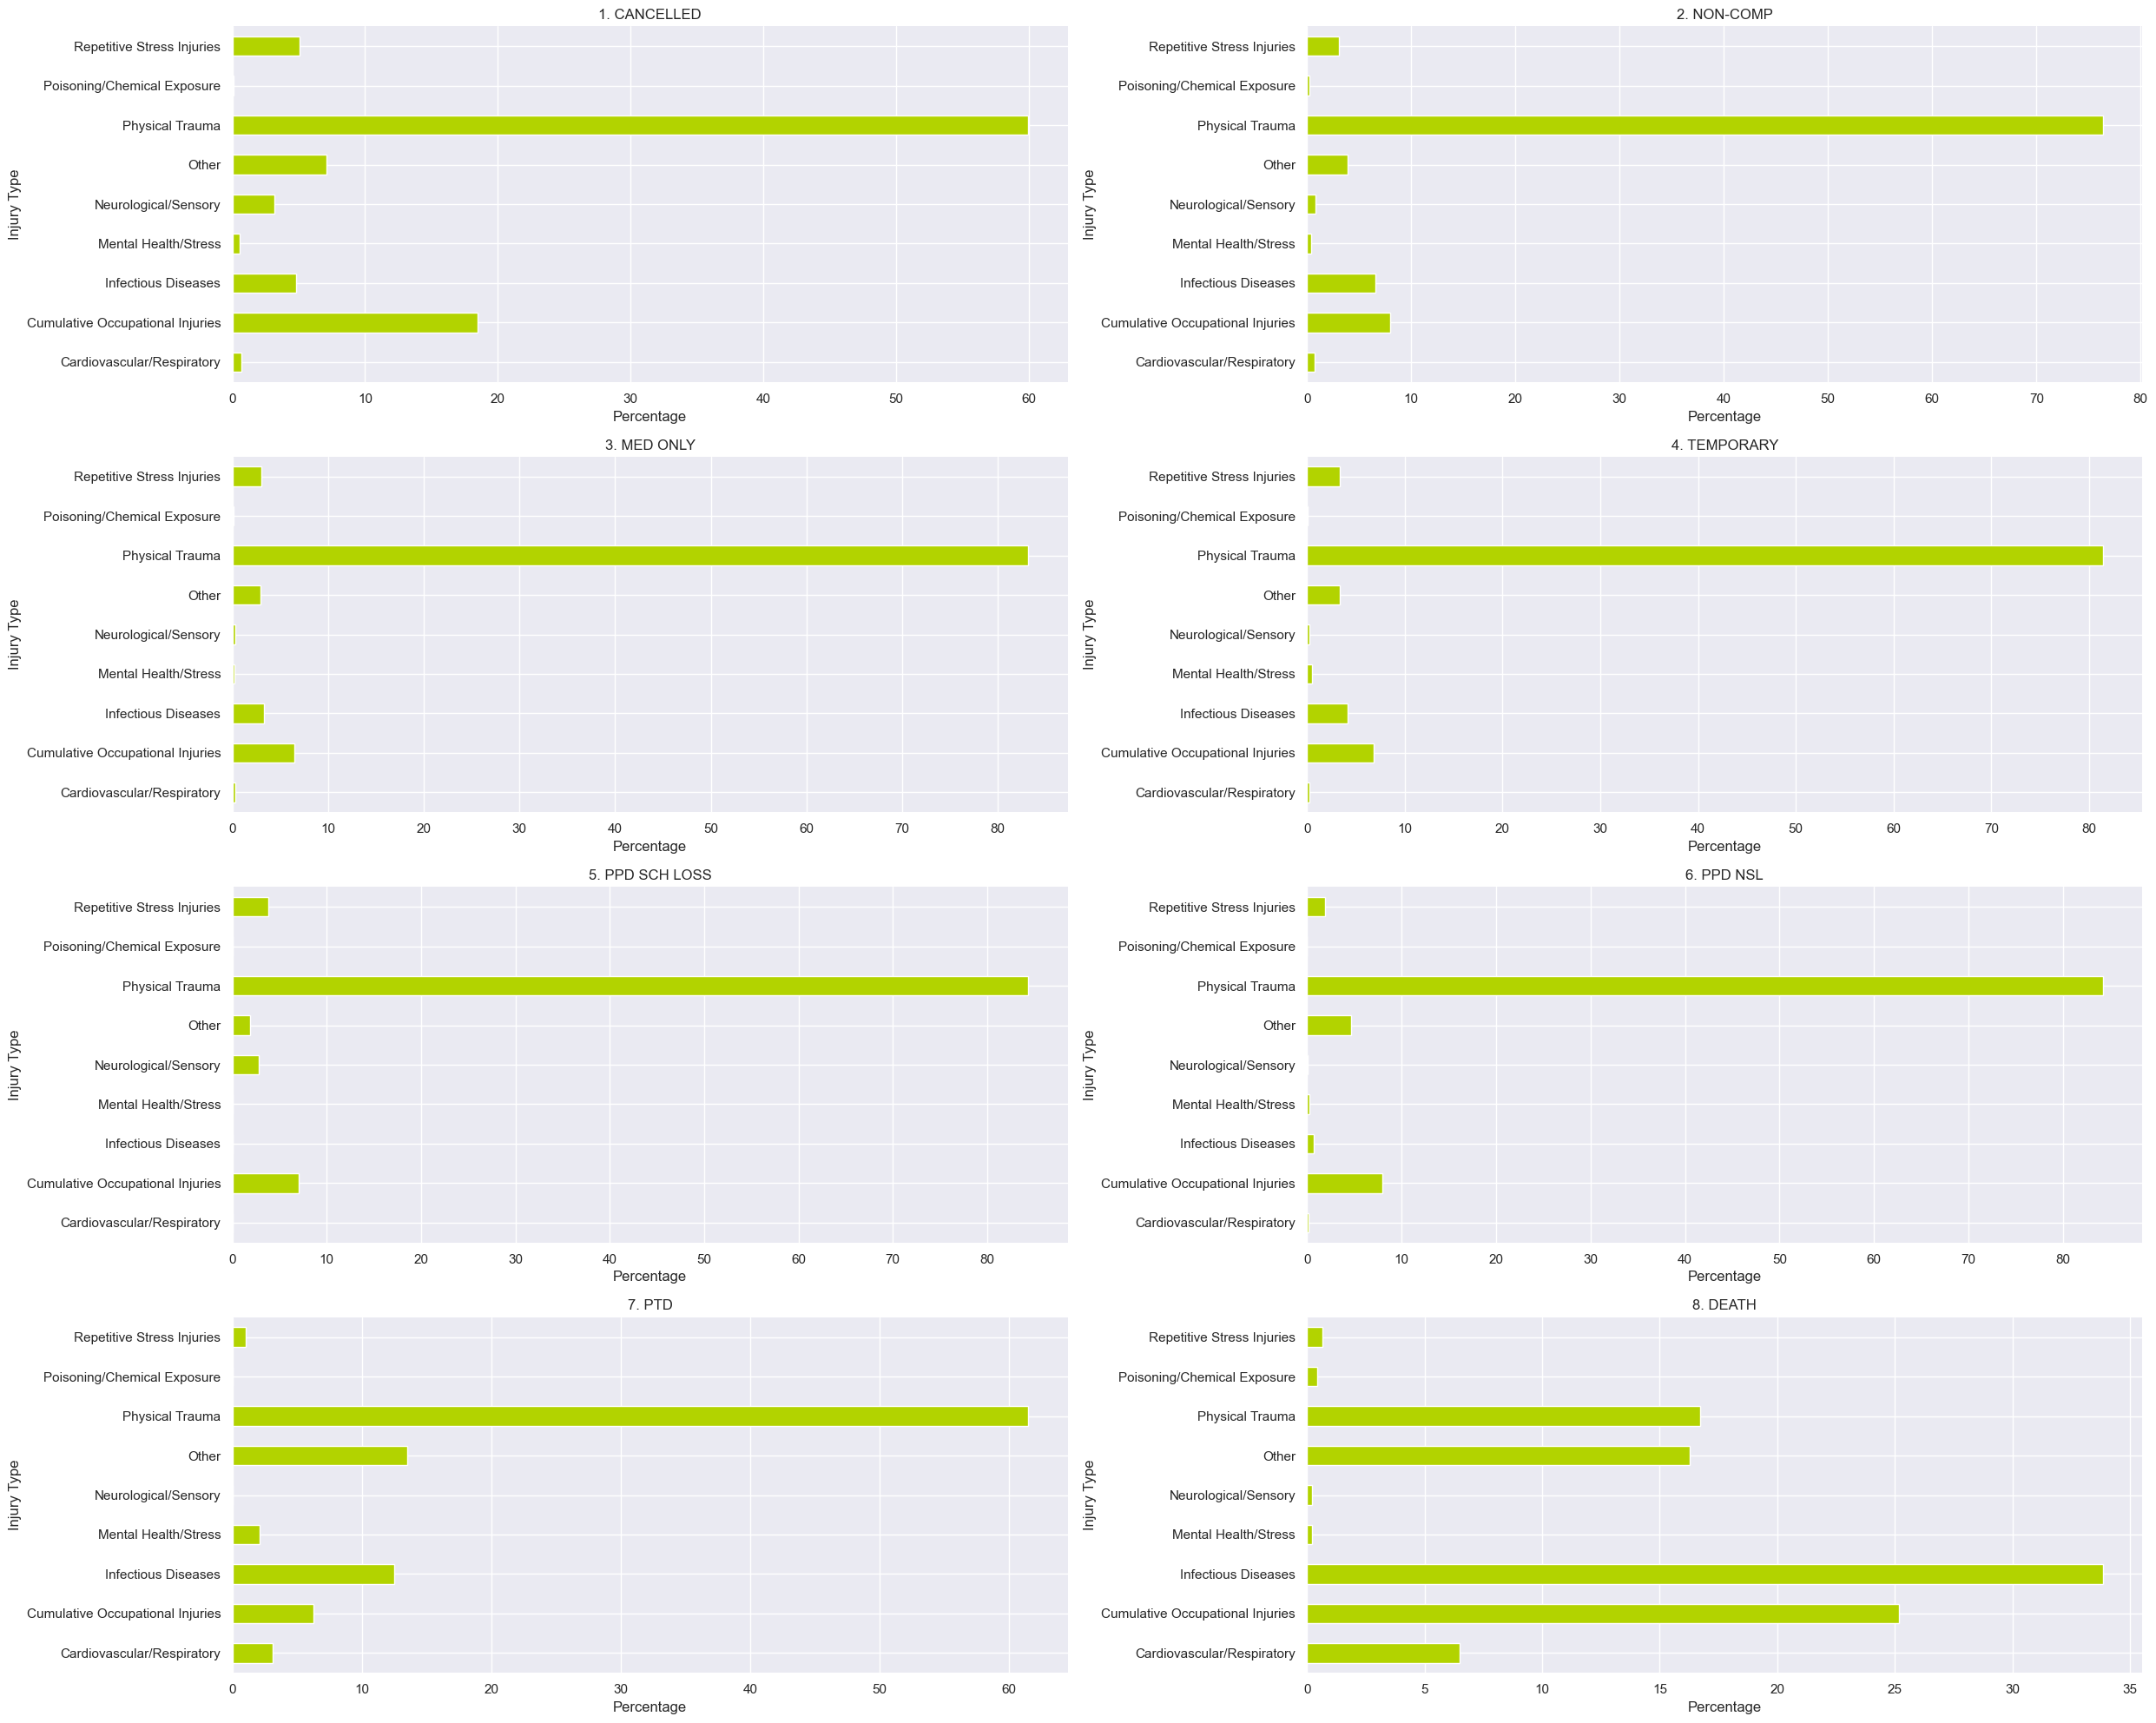

In [91]:
injury_group_percentage = df_train.groupby(['Claim Injury Type', 'injury_type']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()
for ax, claim_type in zip(axes, injury_group_percentage.index):
    injury_group_percentage.loc[claim_type].plot(kind='barh', ax=ax, color='#B2D300')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title(claim_type)
    ax.set_ylabel('Injury Type')
    ax.set_xlabel('Percentage')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

This graph, like some of the graphs showed before, changes the most in cases where death is involved. Other types of cases are not so easily separated by these codes, as the increaases and decreases are only minor.

In [92]:
for i in unique_cause_codes['WCIO Cause of Injury Description']:
    print(i)

FROM LIQUID OR GREASE SPILLS
REPETITIVE MOTION
OBJECT BEING LIFTED OR HANDLED
HAND TOOL, UTENSIL; NOT POWERED
FALL, SLIP OR TRIP, NOC
CUT, PUNCTURE, SCRAPE, NOC
OTHER - MISCELLANEOUS, NOC
STRUCK OR INJURED, NOC
FALLING OR FLYING OBJECT
CHEMICALS
COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE
LIFTING
TWISTING
ON SAME LEVEL
STRAIN OR INJURY BY, NOC
MOTOR VEHICLE, NOC
FROM DIFFERENT LEVEL (ELEVATION)
PUSHING OR PULLING
FOREIGN MATTER (BODY) IN EYE(S)
FELLOW WORKER, PATIENT OR OTHER PERSON
STEAM OR HOT FLUIDS
STATIONARY OBJECT
ON ICE OR SNOW
ABSORPTION, INGESTION OR INHALATION, NOC
PERSON IN ACT OF A CRIME
OBJECT BEING LIFTED OR HANDLED
INTO OPENINGS
ON STAIRS
FROM LADDER OR SCAFFOLDING
SLIP, OR TRIP, DID NOT FALL
JUMPING OR LEAPING
OBJECT BEING LIFTED OR HANDLED
MOTOR VEHICLE
RUBBED OR ABRADED, NOC
REACHING
OBJECT HANDLED
HOT OBJECTS OR SUBSTANCES
ELECTRICAL CURRENT
HOLDING OR CARRYING
CAUGHT IN, UNDER OR BETWEEN, NOC
nan
FIRE OR FLAME
CUMULATIVE, NOC
POWERED HAND TOOL, APPLIANCE
STRIKING AG

### Cause of Injury

The causes of accident can also be grouped:
- Slips, Trips, and Falls (related to losing balance or falling)
- Lifting, Carrying, and Handling (injuries related to lifting or handling objects)
- Struck by or Contact with Objects (injuries from being hit or coming into contact with objects)
- Vehicle and Machinery Accidents (related to collisions, crashes, or machine injuries)
- Chemical, Environmental, and Biological Hazards (exposure to harmful substances or environments)
- Manual Tools and Physical Operations (injuries caused by tools or physical operations)
- Repetitive Motion and Strain (injuries from repeated actions or excessive strain)
- Miscellaneous Causes (other causes that don’t fit into the above categories)

Note: 'NOC' means 'Not Otherwise Classified', this code is used for observations that do not fit into a specific classification/category. 'FALL, SLIP OR TRIP, NOC' means it is a fall, slip or trip that does not fit in the categories present in the list such as snow or stairs.

References:<br>
https://workinjuryrights.com/glossary/not-otherwise-classified-noc/

In [93]:
slips_trips_falls = ["FROM LIQUID OR GREASE SPILLS", "FALL, SLIP OR TRIP, NOC", "ON SAME LEVEL", "FROM DIFFERENT LEVEL (ELEVATION)", 
                     "ON ICE OR SNOW", "INTO OPENINGS", "ON STAIRS", "FROM LADDER OR SCAFFOLDING", "SLIP, OR TRIP, DID NOT FALL", 
                     "JUMPING OR LEAPING"]

lifting_carrying_handling = ["OBJECT BEING LIFTED OR HANDLED", "LIFTING", "PUSHING OR PULLING", "HOLDING OR CARRYING", 
                             "OBJECT HANDLED", "OBJECT HANDLED BY OTHERS"]

struck_by_or_contact = ["STRUCK OR INJURED, NOC", "FALLING OR FLYING OBJECT", "STEAM OR HOT FLUIDS", 
                        "STATIONARY OBJECT", "ELECTRICAL CURRENT", "HOT OBJECTS OR SUBSTANCES", 
                        "CAUGHT IN, UNDER OR BETWEEN, NOC", "FIRE OR FLAME", "CONTACT WITH, NOC", 
                        "BROKEN GLASS", "STEPPING ON SHARP OBJECT", "GUNSHOT", "ANIMAL OR INSECT"]

vehicle_machinery_accidents = ["COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE", "MOTOR VEHICLE, NOC", "MOTOR VEHICLE", "VEHICLE UPSET", "COLLISION WITH A FIXED OBJECT", 
                               "CRASH OF RAIL VEHICLE", "CRASH OF WATER VEHICLE", "CRASH OF AIRPLANE", "MOVING PARTS OF MACHINE", "MACHINE OR MACHINERY", "POWERED HAND TOOL, APPLIANCE", 
                               "USING TOOL OR MACHINERY", "MOVING PART OF MACHINE", "HAND TOOL OR MACHINE IN USE"]

chemical_environmental_biological = ["CHEMICALS", "DUST, GASES, FUMES OR VAPORS", "ABSORPTION, INGESTION OR INHALATION, NOC", 
                                     "MOLD", "CUMULATIVE, NOC", "TEMPERATURE EXTREMES", "COLD OBJECTS OR SUBSTANCES", "RADIATION", 
                                     "ABNORMAL AIR PRESSURE"]

manual_tools_operations = ["HAND TOOL, UTENSIL; NOT POWERED", "CUT, PUNCTURE, SCRAPE, NOC", "RUBBED OR ABRADED, NOC", 
                           "SANDING, SCRAPING, CLEANING OPERATION", "WELDING OPERATION", "STRIKING AGAINST OR STEPPING ON, NOC", 
                           "USING TOOL OR MACHINERY"]

repetitive_motion_strain = ["REPETITIVE MOTION", "REACHING", "TWISTING", "STRAIN OR INJURY BY, NOC"]

other_cause = ["OTHER - MISCELLANEOUS, NOC", "FELLOW WORKER, PATIENT OR OTHER PERSON", "FOREIGN MATTER (BODY) IN EYE(S)",
                "OTHER THAN PHYSICAL CAUSE OF INJURY", "PANDEMIC", "TERRORISM", "NATURAL DISASTERS", "EXPLOSION OR FLARE BACK", 
                "COLLAPSING MATERIALS (SLIDES OF EARTH)", "CONTINUAL NOISE", "WIELDING OR THROWING", "PERSON IN ACT OF A CRIME"]

In [94]:
df_train['injury_cause'] = np.nan
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(slips_trips_falls), 'injury_cause'] = 'Slips, Trips, and Falls'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(lifting_carrying_handling), 'injury_cause'] = 'Lifting, Carrying, and Handling'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(struck_by_or_contact), 'injury_cause'] = 'Struck by or Contact with Objects'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(vehicle_machinery_accidents), 'injury_cause'] = 'Vehicle and Machinery Accidents'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(chemical_environmental_biological), 'injury_cause'] = 'Chemical, Environmental, and Biological Hazards'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(manual_tools_operations), 'injury_cause'] = 'Manual Tools and Physical Operations'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(repetitive_motion_strain), 'injury_cause'] = 'Repetitive Motion and Strain'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(other_cause), 'injury_cause'] = 'Other'


C:\Users\marsi\AppData\Local\Temp\ipykernel_8560\4041034166.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Slips, Trips, and Falls' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['WCIO Cause of Injury Description'].isin(slips_trips_falls), 'injury_cause'] = 'Slips, Trips, and Falls'


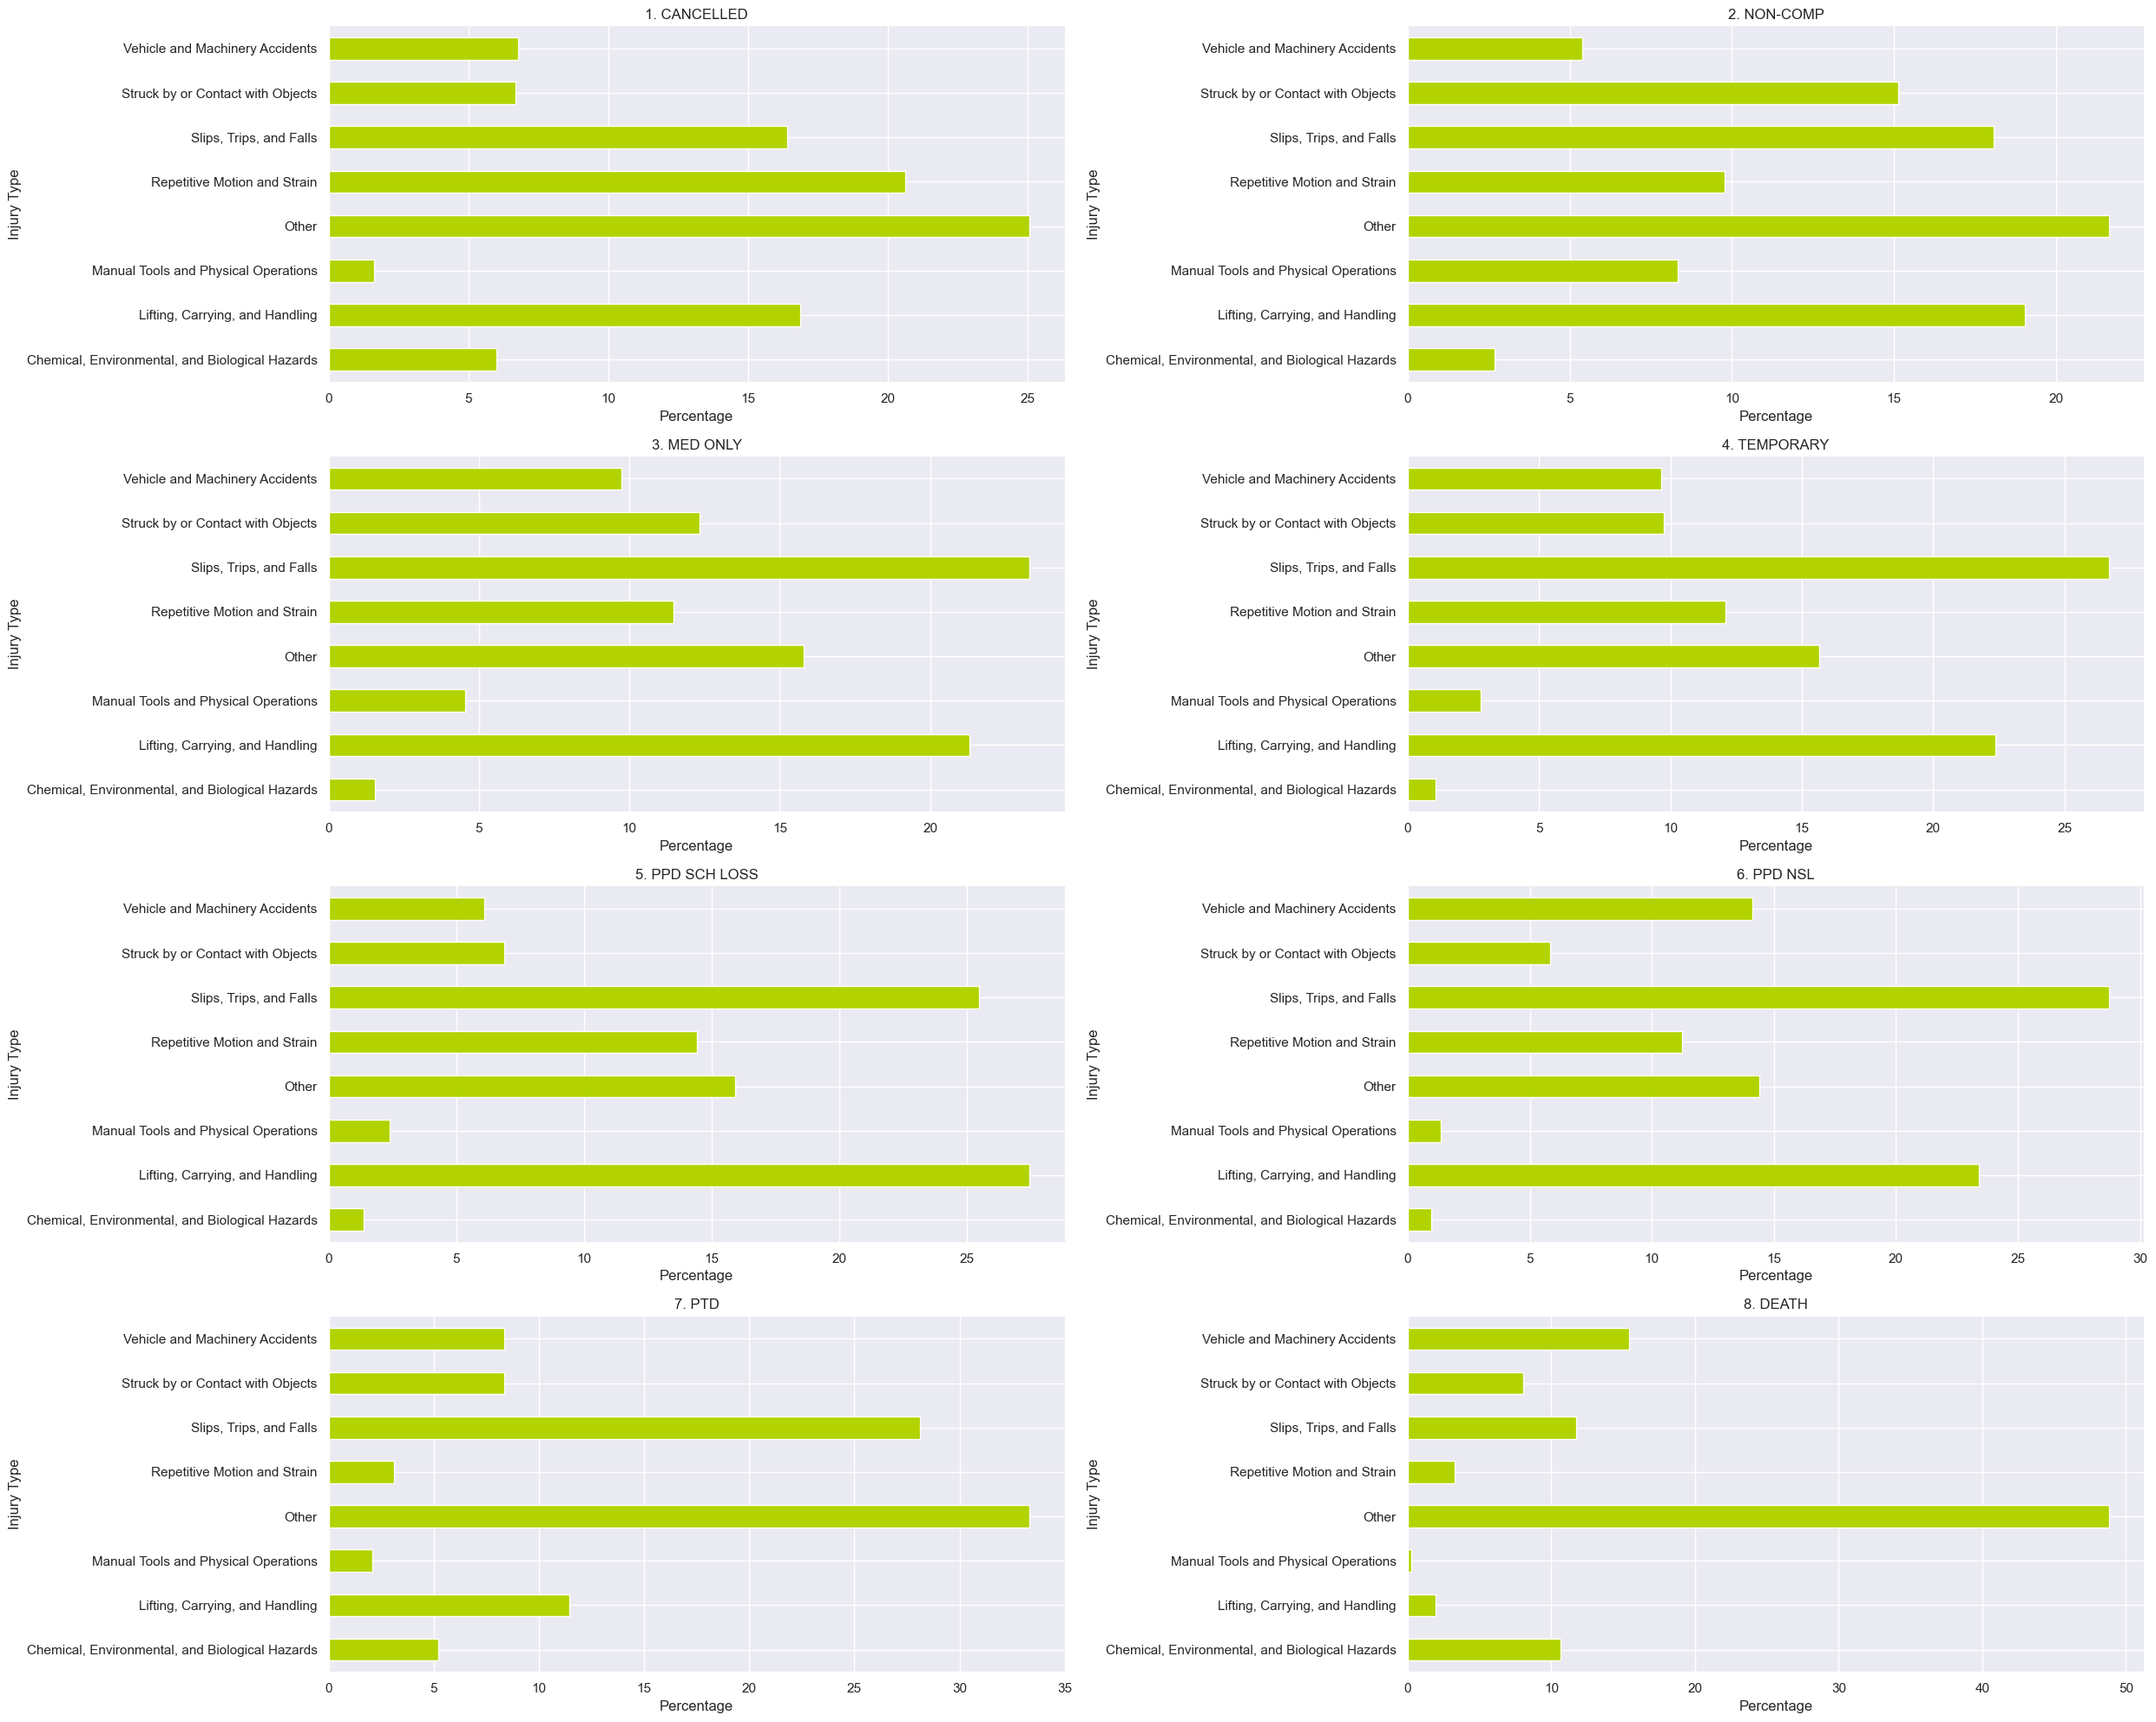

In [95]:
cause_group_percentage = df_train.groupby(['Claim Injury Type', 'injury_cause']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()
for ax, claim_type in zip(axes, cause_group_percentage.index):
    cause_group_percentage.loc[claim_type].plot(kind='barh', ax=ax, color='#B2D300')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title(claim_type)
    ax.set_ylabel('Injury Type')
    ax.set_xlabel('Percentage')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

Unlike in the other bar charts, the causes for the accidents seem to be a differenciating factor. As always, this could be due to the fact that as cases get more severe the number of cases dwindles and so a small amount of cases caused by "repetitive motion or strain" can account for a large portion of the cases in a category.

### Industry Codes

Industry codes can be categorized into five main groups:

- Natural Resources and Utilities
- Goods Production and Trade
- Services
- Education Health Public Services
- Leisure Hospitality

Like before, this selection is done manually.

In [96]:
unique_industry_codes = df_train[['Industry Code', 'Industry Code Description']].drop_duplicates()

In [97]:
unique_industry_codes

Industry Code                          Industry Code Description
0                44                                       RETAIL TRADE
1                23                                       CONSTRUCTION
2                56  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...
4                62                  HEALTH CARE AND SOCIAL ASSISTANCE
6                72                    ACCOMMODATION AND FOOD SERVICES
8                61                               EDUCATIONAL SERVICES
11               51                                        INFORMATION
16               31                                      MANUFACTURING
17               48                     TRANSPORTATION AND WAREHOUSING
18               45                                       RETAIL TRADE
24               42                                    WHOLESALE TRADE
26               53                 REAL ESTATE AND RENTAL AND LEASING
28               52                              FINANCE AND INSURANCE
31               49                     TRANSPORTATION AND WAREHOUSING
38               81      OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)
61               92                              PUBLIC ADMINISTRATION
65               33                                      MANUFACTURING
80               54   PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES
149              32                                      MANUFACTURING
190              71                ARTS, ENTERTAINMENT, AND RECREATION
218            <NA>                                                NaN
283              22                                          UTILITIES
414              11         AGRICULTURE, FORESTRY, FISHING AND HUNTING
629              21                                             MINING
1222             55            MANAGEMENT OF COMPANIES AND ENTERPRISES

In [98]:
natural_resources_utilities = ["AGRICULTURE, FORESTRY, FISHING AND HUNTING", "MINING", "UTILITIES"]

goods_production_and_trade = ["CONSTRUCTION", "MANUFACTURING", "WHOLESALE TRADE", "RETAIL TRADE"]

services = ["TRANSPORTATION AND WAREHOUSING", "INFORMATION", "FINANCE AND INSURANCE", "REAL ESTATE AND RENTAL AND LEASING", 
    "PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES", "MANAGEMENT OF COMPANIES AND ENTERPRISES",
    "OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)", "ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT"]

education_health_public_services = ["EDUCATIONAL SERVICES", "HEALTH CARE AND SOCIAL ASSISTANCE", "PUBLIC ADMINISTRATION"]

leisure_hospitality = ["ARTS, ENTERTAINMENT, AND RECREATION", "ACCOMMODATION AND FOOD SERVICES"]

In [99]:
df_train['industry_group'] = np.nan
df_train.loc[df_train['Industry Code Description'].isin(natural_resources_utilities), 'industry_group'] = 'Natural Resources and Utilities'
df_train.loc[df_train['Industry Code Description'].isin(goods_production_and_trade), 'industry_group'] = 'Goods Production and Trade'
df_train.loc[df_train['Industry Code Description'].isin(services), 'industry_group'] = 'Services'
df_train.loc[df_train['Industry Code Description'].isin(education_health_public_services), 'industry_group'] = 'Education Health and Public Services'
df_train.loc[df_train['Industry Code Description'].isin(leisure_hospitality), 'industry_group'] = 'Leisure Hospitality'

C:\Users\marsi\AppData\Local\Temp\ipykernel_8560\2895561375.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Natural Resources and Utilities' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['Industry Code Description'].isin(natural_resources_utilities), 'industry_group'] = 'Natural Resources and Utilities'


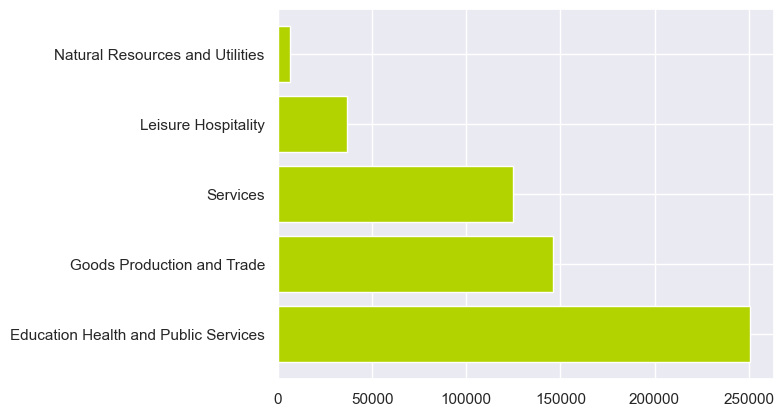

In [100]:
df_train['industry_group'].value_counts()
plt.barh(df_train['industry_group'].value_counts().index, df_train['industry_group'].value_counts().values, color='#B2D300')
plt.show()

Most of the cases belong to the education, health and public services, with almost double the number of cases of the second most frequent industry group.

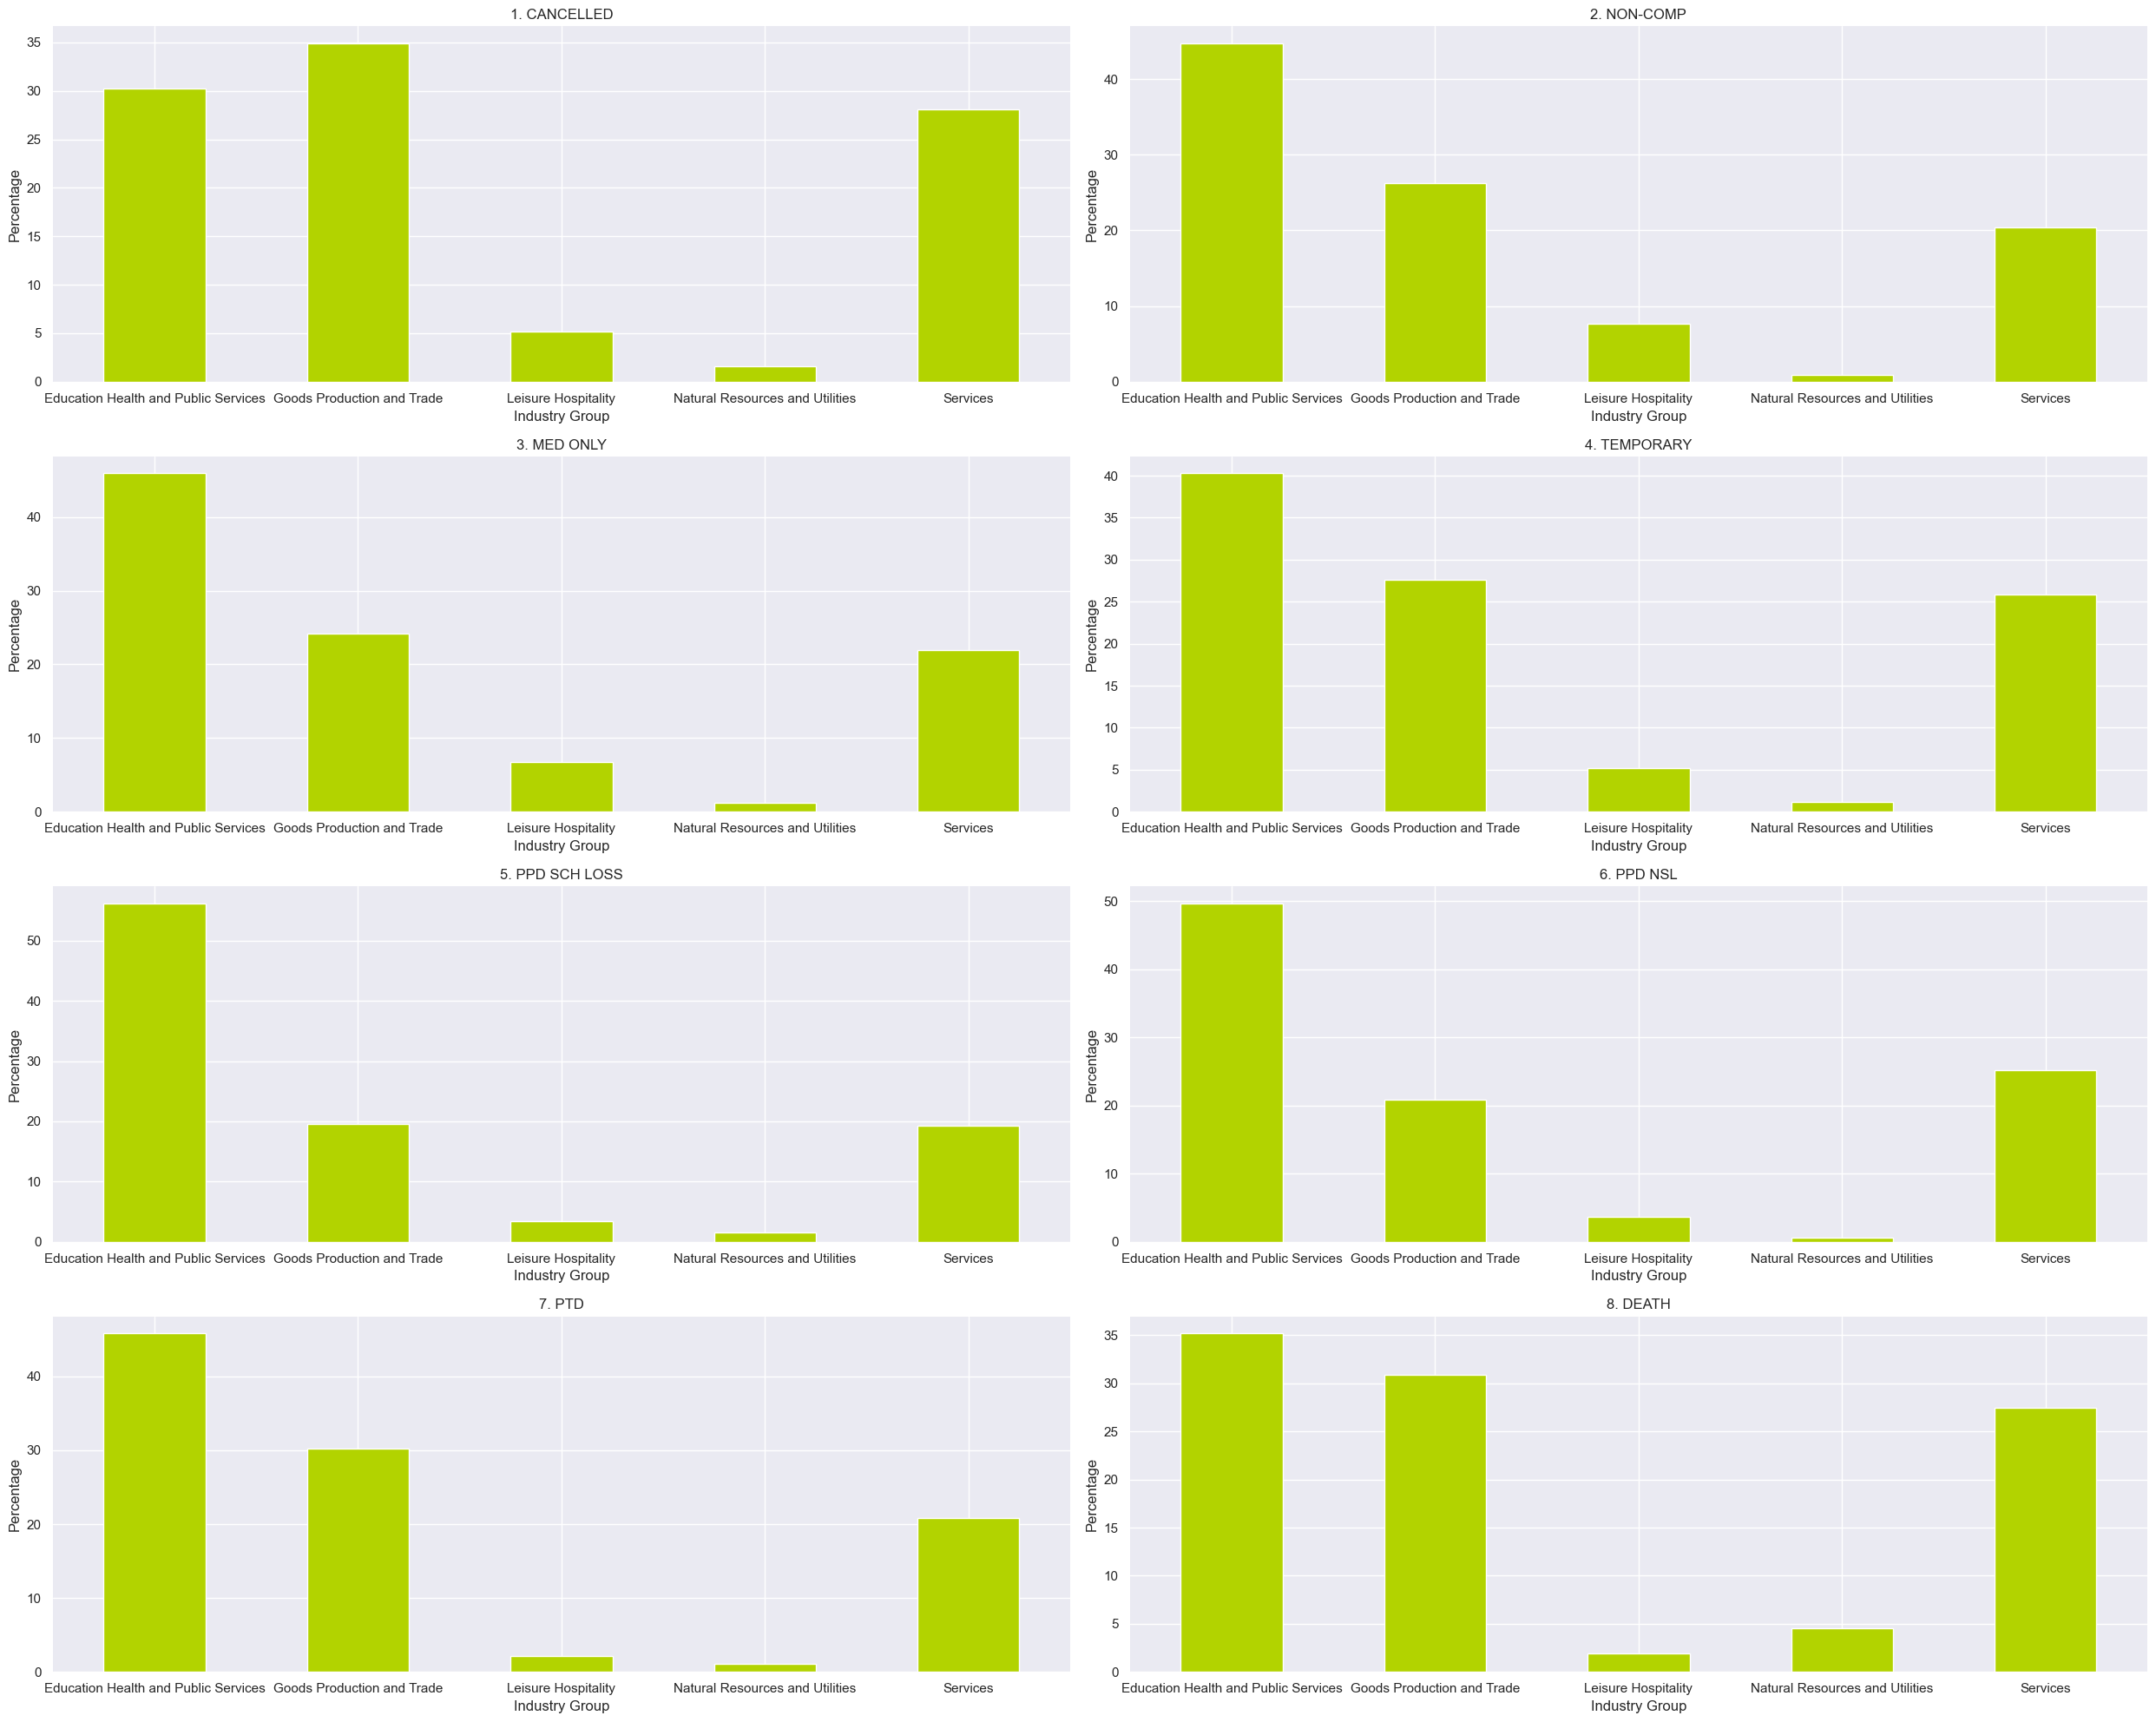

In [101]:
industry_group_percentage = df_train.groupby(['Claim Injury Type', 'industry_group']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()
for ax, claim_type in zip(axes, industry_group_percentage.index):
    industry_group_percentage.loc[claim_type].plot(kind='bar', ax=ax, color='#B2D300')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(claim_type)
    ax.set_xlabel('Industry Group')
    ax.set_ylabel('Percentage')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

'Education Health and Public Services' takes the lead in every category except for one. For canceled cases the most represented industry is 'Goods Production and Trade' (by around 5%). The least represented industry is 'Natural Resources and Utilities'. This industry like other minority code groups ('head' in the body_groups, 'Infecteous Diseases' in the nature group), reaches its peak in the most severe accidents.

## Agreement Reached

For the open-ended segment of the project, the group has chosen to predict an additional variable: Agreement Reached.

This variable indicates whether an agreement was reached between the parties involved before the intervention of the Workers' Compensation Board.

Exploring the relationships between 'Agreement Reached' and other variables can uncover information about the conditions that favor agreements before Workers' Compensation Board intervention.

First, the distribution of the Agreement Reached will be examined to see how this variable behaves in this data set.

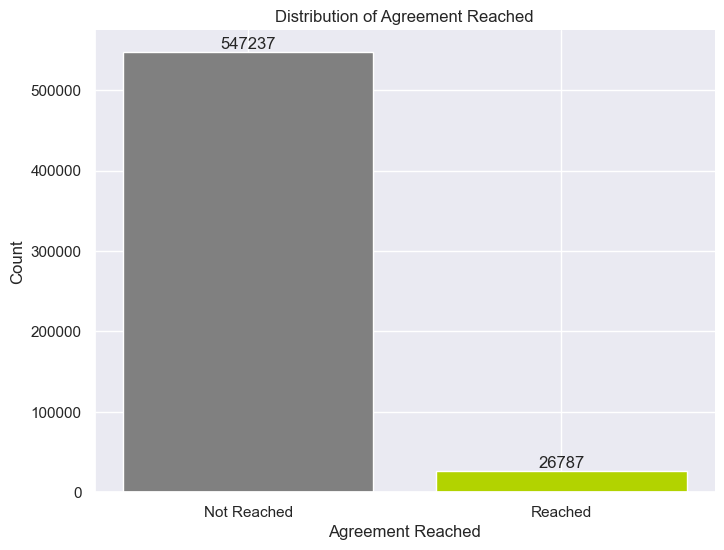

In [102]:
agreement_reached_counts = df_train['Agreement Reached'].value_counts()
plt.figure(figsize=(8, 6)) 
plt.bar(agreement_reached_counts.index, agreement_reached_counts.values, color=['grey','#B2D300'])
plt.xticks(ticks=[0, 1], labels=['Not Reached', 'Reached'])
plt.xlabel('Agreement Reached')
plt.ylabel('Count')
plt.title('Distribution of Agreement Reached')
plt.grid(True)

for index, value in enumerate(agreement_reached_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

The variable is unbalanced. This is something to take into account as it poses a challenge for prediction.

Moving forward, for now, it is essential to analyze the relationships between "Agreement Reached" and other variables in the dataset to determine its relevance for prediction.

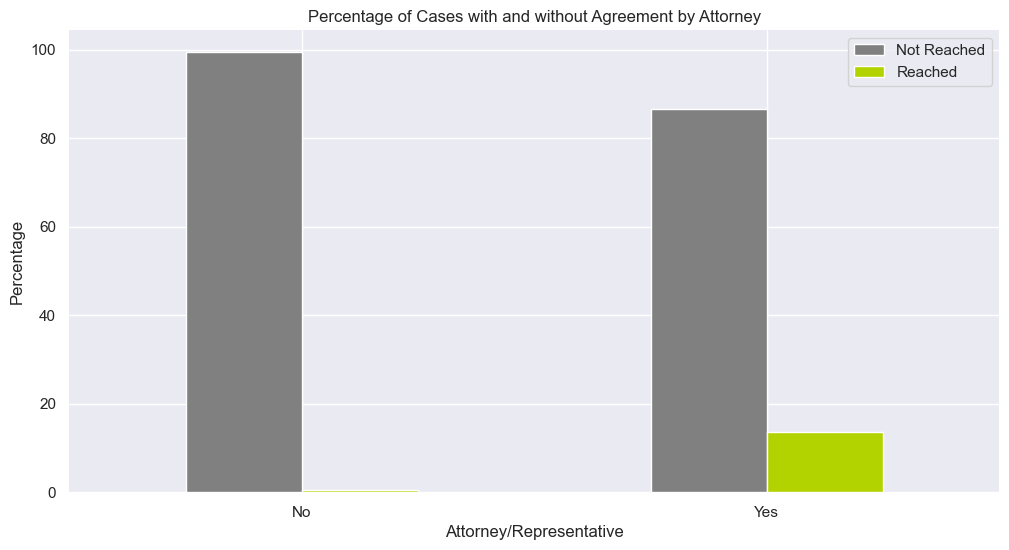

In [103]:
df_train['Attorney/Representative'] = df_train['Attorney/Representative'].replace({'N': 'No', 'Y': 'Yes'})
agreement_by_attorney = pd.crosstab(df_train['Attorney/Representative'], df_train['Agreement Reached'])
agreement_by_attorney.columns = ['Not Reached', 'Reached']
agreement_by_attorney['Reached'] = (agreement_by_attorney['Reached'] / (agreement_by_attorney['Not Reached'] + agreement_by_attorney['Reached'])) * 100
agreement_by_attorney['Not Reached'] = 100 - agreement_by_attorney['Reached']
agreement_by_attorney.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Attorney/Representative')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and without Agreement by Attorney')
plt.xticks(rotation=0)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

From this graph, it is possible to understand that the presence of an attorney influences the likelihood of reaching an agreement. Even though there are way more cases where it was not reached, there is still a big increase in the number of cases in which it is possible to reach an agreement, when an attorney is present.

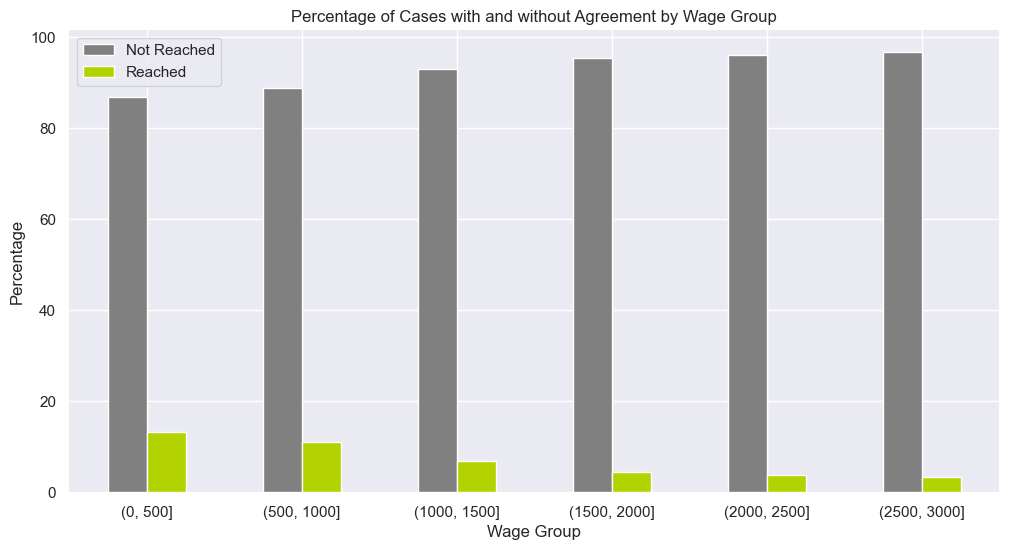

In [104]:
agreement_by_wage = pd.crosstab(df_train1['wage_groups'], df_train['Agreement Reached'])
agreement_by_wage.columns = ['Not Reached', 'Reached']
agreement_by_wage['Reached'] = (agreement_by_wage['Reached'] / (agreement_by_wage['Not Reached'] + agreement_by_wage['Reached'])) * 100
agreement_by_wage['Not Reached'] = 100 - agreement_by_wage['Reached']
agreement_by_wage.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Wage Group')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and without Agreement by Wage Group')
plt.xticks(rotation=0)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

Cases in lower wage groups have a higher percentage of agreements reached compared to those in higher wage groups. Additionally, as the level of wage increase, the agreement not being reached also increases.

In [105]:
df_train['COVID-19 Indicator'] = df_train['COVID-19 Indicator'].replace({'N': 'No', 'Y': 'Yes'})
agreement_by_covid = pd.crosstab(df_train['COVID-19 Indicator'], df_train['Agreement Reached'])
agreement_by_covid.columns = ['Not Reached', 'Reached']

agreement_by_covid['Reached'] = (agreement_by_covid['Reached'] / (agreement_by_covid['Not Reached'] + agreement_by_covid['Reached'])) * 100
agreement_by_covid['Not Reached'] = 100 - agreement_by_covid['Reached']

agreement_covid_table = agreement_by_covid[['Reached', 'Not Reached']].copy()
agreement_covid_table.index.name = 'COVID-19 Indicator'
agreement_covid_table.columns = ['Agreement Reached (%)', 'Agreement Not Reached (%)'] 
pd.DataFrame(agreement_covid_table)

Agreement Reached (%)  Agreement Not Reached (%)
COVID-19 Indicator                                                  
No                               4.807110                  95.192890
Yes                              1.874932                  98.125068

The table indicates that when the claim is not related to COVID-19, the percentage of cases reaching an agreement is higher.

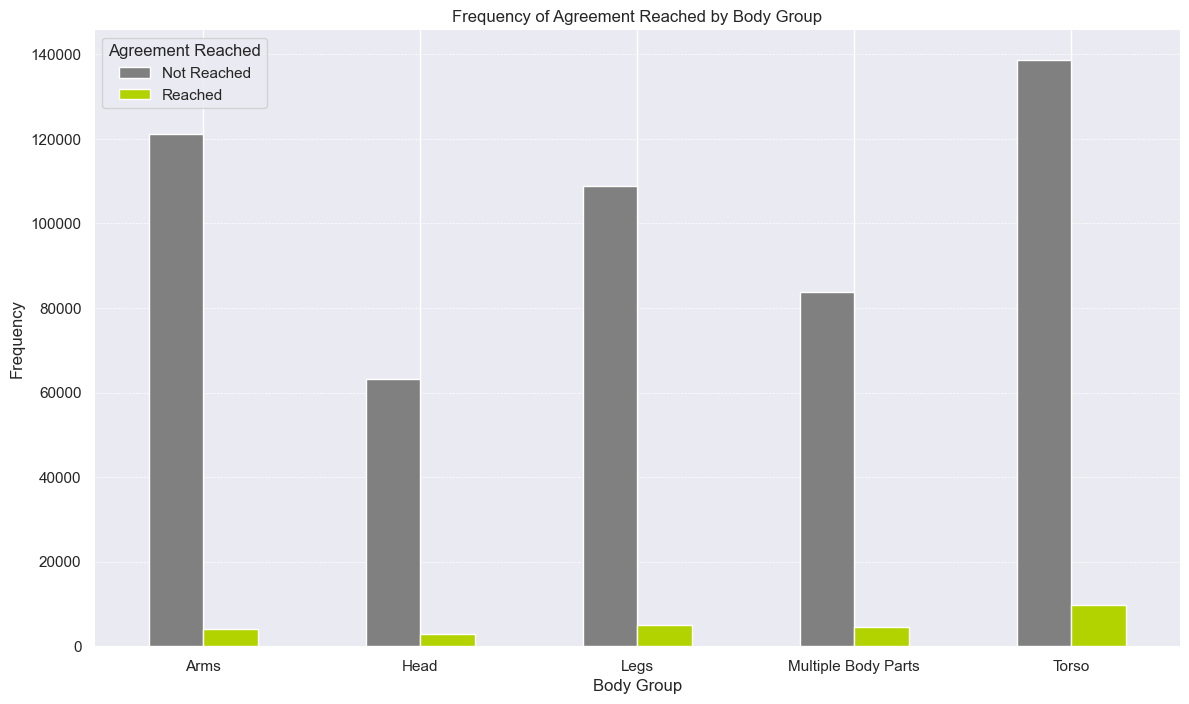

In [106]:
df_train['Agreement Reached'] = df_train['Agreement Reached'].astype(object)
df_train['Agreement Reached'] = df_train['Agreement Reached'].replace({0: 'Not Reached', 1: 'Reached'})
agreement_by_body_group = df_train.groupby(['Agreement Reached', 'body_group']).size().unstack()

fig, ax = plt.subplots(figsize=(14, 8))
agreement_by_body_group.T.plot(kind='bar', ax=ax, color=['Grey','#B2D300'], rot=0)
ax.set_xlabel('Body Group')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Agreement Reached by Body Group')
ax.grid(True, axis='y', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The graph shows that the percentage of cases in which an agreement is reached varies significantly across different body parts. In particular, for arm and torso injuries, the percentage of cases in which an agreement is not reached is significantly higher than the percentage of cases in which an agreement is reached.

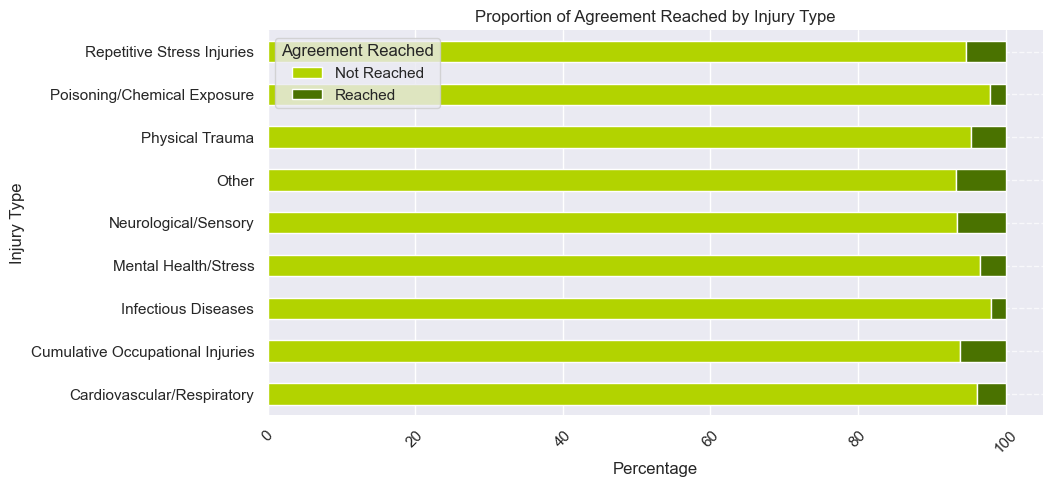

In [107]:
agreement_by_injury_type_proportion = pd.crosstab(df_train['injury_type'], df_train['Agreement Reached'], normalize='index') * 100
colors = ['#B2D300', '#4A7200']
fig, ax = plt.subplots(figsize=(10, 5))
agreement_by_injury_type_proportion.plot(kind='barh', stacked=True, color=colors, ax=ax)
plt.xlabel('Percentage')
plt.ylabel('Injury Type')
plt.title('Proportion of Agreement Reached by Injury Type')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In both categories, "Physical Trauma" is the most common type of injury, accounting for the highest proportion. Other injuries, such as "Infectious Diseases" and "Cumulative Occupational Injuries" are present but with much smaller percentages. In general, the pattern of injury types is quite similar between the two groups.

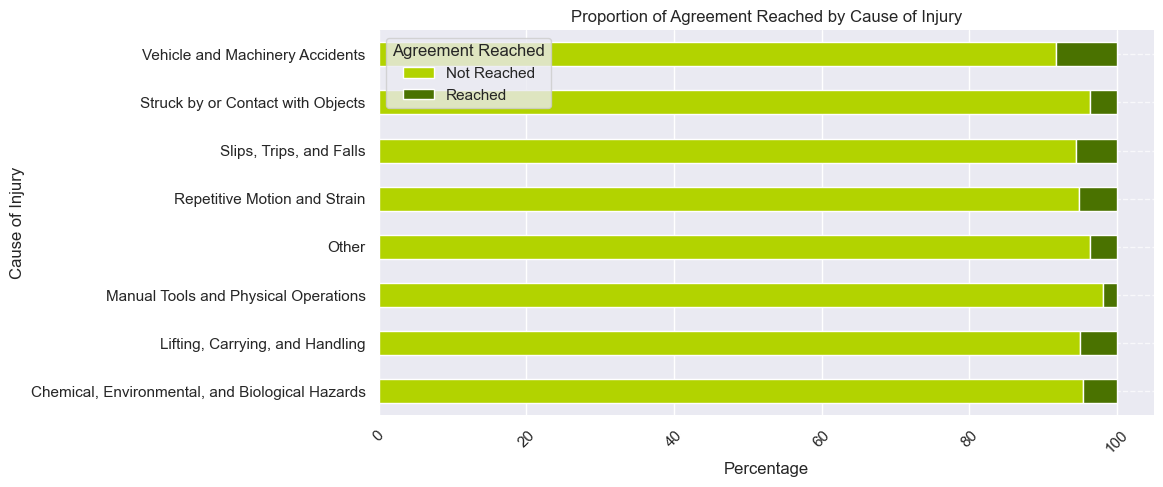

In [108]:
agreement_by_injury_cause_proportion = pd.crosstab(df_train['injury_cause'], df_train['Agreement Reached'], normalize='index') * 100
colors = ['#B2D300', '#4A7200']
fig, ax = plt.subplots(figsize=(10, 5))
agreement_by_injury_cause_proportion.plot(kind='barh', stacked=True, color=colors, ax=ax)
plt.xlabel('Percentage')
plt.ylabel('Cause of Injury')
plt.title('Proportion of Agreement Reached by Cause of Injury')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The chart indicates that injury causes such as "Slips, Trips, and Falls" and "Lifting, Carrying, and Handling" are consistently significant contributors to injuries in both "Reached" and "Not Reached" cases. This trend could reflect common challenges in resolving cases involving these types of injuries or their overall higher frequency. Less common causes like "Chemical, Environmental, and Biological Hazards" are rare across both groups, suggesting that they may be easier to resolve or simply occur less frequently.

## Zip Codes

For zip codes, they can be grouped them into 9 main groups:
- Syracuse
- Rochester
- Albany
- Hauppage
- NYC
- Buffalo
- Binghamton
- Stadewide
- Other

This has to be done manually, as it was done before with the other grouped variables.

References:<br>
https://www.unitedstateszipcodes.org/#zips-list

In [109]:
# most frequent zip codes
zip_code_counts = df_train['Zip Code'].value_counts().head(50)
zip_code_counts

Zip Code
11236    3302
10940    2971
11717    2807
11434    2759
11706    2728
11207    2633
11208    2559
11368    2553
12550    2530
11212    2504
11226    2466
10467    2369
10466    2287
11550    2251
11203    2227
11234    2221
11385    2170
10462    2149
10314    2103
10456    2089
10469    2067
10701    2020
11758    1949
11757    1948
12601    1906
11003    1901
11413    1866
11772    1853
11746    1829
11233    1815
11722    1815
10453    1810
11704    1798
10473    1797
11520    1780
11221    1769
12603    1765
13440    1759
11373    1747
11756    1705
10452    1694
14094    1663
10457    1646
12180    1643
10472    1624
11412    1622
11377    1620
11779    1578
10458    1569
12590    1549
Name: count, dtype: int64

In [110]:
# # Fill NaN values with an empty string
# df_train['Zip Code'] = df_train['Zip Code'].fillna('')

# # Convert all zip codes to string type
# df_train['Zip Code'] = df_train['Zip Code'].astype(str)

# # Unique zip codes
# unique_zip_codes = df_train['Zip Code'].unique()

# # Check if zip codes have letters and digits
# zip_codes_with_letters = [zip_code for zip_code in unique_zip_codes if any(char.isalpha() for char in zip_code)]

# # Check if zip codes have digits only
# zip_codes_with_digits = [zip_code for zip_code in unique_zip_codes if zip_code.isdigit()]
# # order by ascending order the list with the zip codes that contain digits
# zip_codes_with_digits.sort()

In [111]:
unique_zip_codes = df_train[['Zip Code']].drop_duplicates()

In [112]:
unique_zip_codes

Zip Code
0         13662
1         14569
2         12589
4         12603
5         11772
...         ...
592341    30046
592553    90241
592799    G9B0Y
592810    15143
593132    07122

[10061 rows x 1 columns]

In [113]:
region_ny = {
"CENTRAL NEW YORK": ["OSWEGO", "ONONDAGA", "CAYUGA", "MADISON", "CORTLAND"], 
"SOUTHERN TIER": ["DELAWARE", "CHENANGO", "BROOME", "TIOGA", "TOMPKINS", "CHEMUNG", "SCHUYLER", "STEUBEN"],
"FINGER LAKES": ["WAYNE", "SENECA", "YATES", "MONROE", "LIVINGSTON", "ONTARIO", "ORLEANS", "GENESEE", "WYOMING"], 
"WESTERN NEW YORK": ["ERIE", "NIAGARA", "CHAUTAUQUA", "CATTARAUGUS", "ALLEGANY"], 
"NORTH COUNTRY": ["JEFFERSON", "LEWIS", "ST. LAWRENCE", "FRANKLIN", "CLINTON", "ESSEX", "HAMILTON"], 
"MOHAWK VALLEY": ["HERKIMER", "ONEIDA", "OTSEGO", "MONTGOMERY", "FULTON", "SCHOHAIRE"], 
"CAPITAL REGION": ["SCHENECTADY", "ALBANY", "RENSSELAER", "SARATOGA", "GREENE", "COLUMBIA", "WARREN", "WASHINGTON"], 
"HUDSON VALLEY": ["ROCKLAND", "ORANGE", "PUTNAM", "DUTCHESS", "ULSTER", "SULLIVAN", "WESTCHESTER"],
"NEW YORK CITY": ["BRONX", "KINGS", "NEW YORK", "QUEENS", "RICHMOND"], 
"LONG ISLAND": ["NASSAU", "SUFFOLK"]
}

In [114]:
df_train['Zip Code'] = pd.to_numeric(df_train['Zip Code'], errors='coerce')

counties_ny = {'ALBANY':(12007, 12009, 12023, 12041, 12045, 12046, 12047, 12054, 12055, 12059, 12067, 12077, 12084, 12085, 12107, 12110, 12110, 12120, 12128, 
                12128, 12143, 12147, 12158, 12159, 12161, 12183, 12183, 12186, 12189, 12201, 12202, 12203, 12203, 12204, 12204, 12205, 12205, 12205, 
                12206, 12207, 12208, 12209, 12210, 12211, 12211, 12211, 12212, 12220, 12223, 12224, 12225, 12226, 12227, 12247, 12260, 12469), 
               
               'ALLEGANY':(14029, 14707, 14708, 14709, 14711, 14714, 14715, 14717, 14721, 14727, 14735, 14739, 14744, 14745, 14754, 14774, 14777, 14786, 14802,
                14803, 14804, 14806, 14813, 14822, 14880, 14884, 14895), 
               
               'BRONX':(10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463, 10464, 10465, 10466, 10467, 10468, 10469,
                10470, 10471, 10472, 10473, 10474, 10475), 
               
               'BROOME':(13737, 13744, 13745, 13746, 13748, 13749, 13754, 13760, 13760, 13761, 13762, 13763, 13777, 13787, 13790, 13794, 13795, 13797, 13802,
                13813, 13826, 13826, 13833, 13833, 13848, 13850, 13851, 13901, 13902, 13903, 13904, 13905), 
               
               'CATTARAUGUS':(14041, 14042, 14060, 14065, 14065, 14070, 14101, 14129, 14133, 14138, 14168, 14706, 14719, 14726, 14729, 14730, 14731, 14737, 14741,
                14743, 14743, 14748, 14751, 14753, 14755, 14760, 14760, 14766, 14770, 14772, 14778, 14779, 14783), 
               
               'CAYUGA':(13021, 13021, 13022, 13026, 13033, 13034, 13064, 13071, 13081, 13111, 13113, 13117, 13118, 13139, 13140, 13147, 13147, 13156, 13160,
                13166),

               'CHAUTAUQUA':(14048, 14048, 14062, 14063, 14081, 14135, 14136, 14166, 14166, 14701, 14702, 14710, 14712, 14716, 14718, 14720, 14722, 14723, 14724,
                14728, 14732, 14733, 14736, 14738, 14740, 14742, 14747, 14750, 14752, 14756, 14757, 14758, 14767, 14767, 14769, 14775, 14781, 14782,
                14784, 14785),

               'CHEMUNG':(14814, 14816, 14825, 14838, 14844, 14845, 14861, 14864, 14871, 14872, 14889, 14894, 14901, 14902, 14903, 14903, 14903, 14903, 14904,
                14905, 14925),

               'CHENANGO':(13124, 13129, 13136, 13155, 13332, 13332, 13411, 13411, 13460, 13464, 13730, 13733, 13758, 13778, 13780, 13801, 13809, 13814, 13815,
                13830, 13830, 13832, 13841, 13843, 13844),

               'CLINTON':(12901, 12903, 12910, 12911, 12911, 12911, 12912, 12918, 12919, 12921, 12923, 12924, 12924, 12929, 12933, 12934, 12935, 12944, 12952,
                12955, 12955, 12958, 12959, 12962, 12972, 12978, 12979, 12981, 12985, 12992),

               'COLUMBIA':(12017, 12029, 12037, 12050, 12060, 12062, 12075, 12106, 12115, 12125, 12125, 12130, 12132, 12136, 12165, 12172, 12173, 12174, 12184,
                12195, 12502, 12503, 12513, 12516, 12517, 12521, 12523, 12526, 12529, 12530, 12534, 12541, 12544, 12565, 12593, 12593),

               'CORTLAND':(13040, 13040, 13045, 13056, 13077, 13087, 13101, 13141, 13158, 13738, 13784, 13803),

               'DELAWARE':(12167, 12406, 12421, 12430, 12430, 12434, 12438, 12455, 12459, 12474, 13731, 13739, 13740, 13750, 13751, 13752, 13753, 13753, 13755,
                13756, 13757, 13774, 13775, 13782, 13783, 13783, 13786, 13788, 13804, 13806, 13837, 13838, 13839, 13842, 13846, 13846, 13847, 13856,
                13860),

               'DUTCHESS':(12501, 12504, 12504, 12504, 12506, 12507, 12507, 12508, 12510, 12511, 12512, 12514, 12522, 12524, 12527, 12531, 12533, 12533, 12537,
                12538, 12540, 12545, 12546, 12564, 12567, 12569, 12570, 12571, 12571, 12572, 12574, 12578, 12580, 12581, 12582, 12583, 12585, 12590,
                12590, 12592, 12601, 12602, 12603, 12603),

               'ERIE':(14001, 14004, 14006, 14010, 14025, 14026, 14027, 14030, 14031, 14032, 14033, 14034, 14035, 14038, 14043, 14047, 14051, 14051, 14052,
                14055, 14057, 14059, 14061, 14068, 14069, 14072, 14075, 14080, 14085, 14086, 14091, 14102, 14110, 14111, 14112, 14127, 14134, 14139,
                14140, 14141, 14150, 14151, 14169, 14170, 14201, 14202, 14203, 14204, 14205, 14206, 14206, 14207, 14208, 14209, 14210, 14211, 14212,
                14212, 14213, 14214, 14215, 14216, 14217, 14217, 14217, 14217, 14218, 14218, 14219, 14219, 14220, 14221, 14221, 14222, 14223, 14223,
                14223, 14224, 14225, 14225, 14226, 14226, 14226, 14226,14227, 14227, 14227, 14228, 14228, 14231, 14240, 14280),

               'ESSEX':(12851, 12852, 12855, 12857, 12858, 12858, 12870, 12872, 12879, 12879, 12883, 12913,12928, 12932, 12936, 12941, 12942, 12943, 12943,
                12946, 12946, 12950, 12956, 12960, 12961, 12964, 12974, 12975, 12977, 12987, 12993),

               'FRANKLIN':(12914, 12915, 12916, 12917, 12920, 12926, 12930, 12937, 12939, 12945, 12945, 12953,
                12957, 12966, 12966, 12966, 12969, 12970, 12976, 12980, 12983, 12986, 12986, 12989,
                12989, 12989, 13655, 13655, 13655),

               'FULTON':(12025, 12032, 12078, 12095, 12117, 12134, 12134, 13470),

               'GENESEE':(14003, 14005, 14013, 14020, 14021, 14036, 14040, 14054, 14056, 14058, 14125, 14143, 14416, 14422, 14482, 14486, 14525, 14525, 14557),

               'GREENE':(12015, 12042, 12051, 12058, 12083, 12083, 12083, 12087, 12124, 12176, 12192, 12405, 12407, 12413, 12414, 12414, 12418, 12422, 12423,
                12424, 12424, 12427, 12431, 12436, 12439, 12439, 12442, 12444, 12450, 12451, 12452, 12454, 12460, 12463, 12468, 12470, 12473, 12482, 
                12485, 12492),

               'HAMILTON':(12108, 12139, 12164, 12190, 12812, 12842, 12847, 12864, 13353, 13360, 13436),

               'HERKIMER':(13324, 13329, 13331, 13340, 13340, 13350, 13357, 13361, 13365, 13406, 13407, 13416, 13420, 13431, 13454, 13472, 13475, 13491),

               'JEFFERSON':(13601, 13602, 13603, 13605, 13606, 13607, 13607, 13608, 13608, 13611, 13612, 13615, 13616, 13618, 13619, 13622, 13624, 13624, 13624,
                13624, 13628, 13632, 13634, 13636, 13637, 13638, 13640, 13640, 13641, 13643, 13650, 13651, 13656, 13657, 13659, 13661, 13665, 13671,
                13673, 13674, 13675, 13679, 13682, 13685, 13688, 13691, 13692, 13693),

               'KINGS':(11201, 11202, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219,
                11220, 11221, 11222, 11223, 11224, 11225, 11226, 11228, 11229, 11230, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239,
                11240, 11241, 11242, 11243, 11247, 11249, 11252, 11252, 11256),

               'LEWIS':(13305, 13305, 13312, 13312, 13325, 13327, 13343, 13345, 13367, 13367, 13368, 13404, 13433, 13473, 13489, 13620, 13626, 13626, 13627, 
                13631, 13648),

               'LIVINGSTON':(14414, 14423, 14435, 14437, 14454, 14462, 14466, 14480, 14481, 14485, 14487, 14488, 14510, 14510, 14517, 14533, 14533, 14539, 14545,
                14545, 14556, 14558, 14560, 14560, 14836, 14846),

               'MADISON':(13032, 13032, 13035, 13037, 13043, 13052, 13061, 13072, 13082, 13122, 13134, 13163, 13310, 13314, 13334, 13346, 13355, 13364, 13402,
                13408, 13409, 13409, 13418, 13421, 13465, 13484),

               'MONROE':(14410, 14420, 14428, 14428, 14430, 14445, 14450, 14464, 14467, 14468, 14472, 14506, 14511, 14514, 14515, 14526, 14534, 14543, 14543,
                14546, 14559, 14580, 14586, 14601, 14602, 14603, 14604, 14605, 14606, 14607, 14608, 14609, 14610, 14611, 14612, 14612, 14613, 14614,
                14615, 14615, 14616, 14616, 14617, 14617, 14618, 14618, 14619, 14620, 14621, 14622, 14622, 14623, 14624, 14625, 14625, 14626, 14626,
                14626, 14627, 14660, 14692),

               'MONTGOMERY':(12010, 12010, 12016, 12016, 12066, 12068, 12069, 12070, 12072, 12086, 12166, 12177, 13317, 13317, 13339, 13410, 13428, 13452),

               'NASSAU':(11001, 11002, 11003, 11003, 11003, 11003, 11010, 11020, 11021, 11022, 11023, 11024, 11024, 11026, 11027, 11030, 11030, 11040, 11042,
                11050, 11050, 11096, 11096, 11501, 11507, 11509, 11510, 11510, 11514, 11516, 11518, 11520, 11530, 11530, 11531, 11542, 11545, 11547,
                11548, 11550, 11550, 11551, 11552, 11553, 11554, 11557, 11558, 11559, 11560, 11561, 11561, 11561, 11563, 11565, 11566, 11566, 11568,
                11569, 11570, 11571, 11572, 11572, 11575, 11576, 11577, 11579, 11580, 11581, 11582, 11596, 11599, 11709, 11710, 11710, 11714, 11732,
                11735, 11735, 11753, 11756, 11758, 11758, 11762, 11765, 11771, 11783, 11791, 11793, 11801, 11802, 11803, 11803, 11804, 11804),

               'NEW YORK CITY':(10001, 10002, 10002, 10003, 10004, 10004, 10005, 10006, 10006, 10007, 10008, 10009, 10010, 10011, 10012, 10012, 10013, 10013, 10013,
                10014, 10015, 10016, 10017, 10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032,
                10033, 10034, 10035, 10036, 10037, 10038, 10038, 10039, 10040, 10041, 10044, 10044, 10045, 10048, 10055, 10060, 10069, 10090, 10095,
                10098, 10099, 10101, 10103, 10104, 10105, 10106, 10107, 10108, 10110, 10111, 10112, 10113, 10115, 10116, 10118, 10119, 10120, 10121,
                10122, 10123, 10128, 10129, 10150, 10151, 10152, 10153, 10154, 10155, 10156, 10158, 10159, 10161, 10162, 10163, 10165, 10166, 10167,
                10168, 10169, 10170, 10171, 10172, 10173, 10174, 10175, 10176, 10177, 10178, 10185, 10199, 10242, 10249, 10268, 10270, 10271, 10272,
                10274, 10276, 10278, 10279, 10280, 10281, 10282),

               'NIAGARA':(14008, 14012, 14028, 14067, 14092, 14092, 14094, 14095, 14105, 14107, 14108, 14109, 14120, 14126, 14131, 14132, 14144, 14301, 14302,
                14303, 14304, 14305),

               'ONEIDA':(13054, 13123, 13157, 13162, 13301, 13303, 13304, 13308, 13309, 13313, 13316, 13318, 13319, 13321, 13322, 13323, 13328, 13338, 13341,
                13352, 13354, 13362, 13363, 13401, 13403, 13413, 13417, 13424, 13425, 13435, 13438, 13440, 13441, 13442, 13455, 13456, 13456, 13461,
                13469, 13471, 13476, 13477, 13478, 13479, 13480, 13501, 13502, 13502, 13503, 13504, 13505),

               'ONONDAGA':(13020, 13027, 13027, 13029, 13030, 13031, 13039, 13041, 13051, 13057, 13060, 13063, 13066, 13078, 13080, 13084, 13088, 13089, 13090,
                13090, 13104, 13108, 13110, 13112, 13116, 13119, 13120, 13137, 13138, 13152, 13153, 13159, 13164, 13201, 13202, 13203, 13204, 13205,
                13206, 13207, 13208, 13209, 13209, 13210, 13211, 13211, 13212, 13212, 13214, 13214, 13215, 13217, 13218, 13219, 13220, 13221, 13224,
                13235, 13261, 13290),

               'ONTARIO':(14424, 14425, 14425, 14432, 14443, 14453, 14456, 14461, 14463, 14469, 14471, 14475, 14504, 14512, 14518, 14532, 14537, 14547, 14548,
                14561, 14564, 14585),

               'ORANGE':(10910, 10912, 10914, 10915, 10916, 10917, 10918, 10919, 10921, 10922, 10924, 10925, 10926, 10928, 10930, 10932, 10933, 10940, 10940,
                10941, 10941, 10950, 10953, 10958, 10959, 10963, 10969, 10973, 10975, 10979, 10981, 10985, 10987, 10988, 10990, 10992, 10996, 10997,
                12518, 12520, 12543, 12549, 12550, 12551, 12552, 12553, 12553, 12555, 12566, 12575, 12577, 12584, 12586, 12729, 12739, 12746, 12771, 
                12780, 12780),

               'ORLEANS':(14098, 14103, 14411, 14411, 14429, 14452, 14470, 14470, 14476, 14477, 14479, 14508, 14571),

               'OSWEGO':(13028, 13036, 13042, 13044, 13069, 13074, 13076, 13083, 13093, 13103, 13107, 13114, 13115, 13121, 13126, 13131, 13132, 13135, 13142, 
                13144, 13145, 13167, 13302, 13426, 13437),

               'OTSEGO':(12064, 12116, 12155, 13315, 13320, 13326, 13326, 13333, 13335, 13337, 13342, 13348, 13415, 13439, 13450, 13457, 13468, 13482, 13485, 
                13747, 13776, 13796, 13807, 13808, 13810, 13820, 13825, 13834, 13849, 13859, 13861),

               'PUTNAM':(10509, 10512, 10512, 10516, 10516, 10524, 10537, 10541, 10541, 10542, 10579, 12563),

               'QUEENS':(11004, 11004, 11005, 11101, 11101, 11102, 11102, 11103, 11103, 11104, 11104, 11104, 11105, 11105, 11106, 11106, 11109, 11351, 11352,
                11354, 11355, 11356, 11356, 11357, 11357, 11357, 11358, 11359, 11359, 11359, 11360, 11360, 11361, 11361, 11362, 11362, 11362, 11363,
                11363, 11363, 11364, 11364, 11365, 11365, 11366, 11366, 11367, 11368, 11368, 11369, 11369, 11370, 11371, 11371, 11371, 11372, 11372,
                11372, 11373, 11373, 11374, 11374, 11375, 11375, 11377, 11378, 11378, 11379, 11379, 11379, 11380, 11380, 11380, 11385, 11385, 11385,
                11386, 11386, 11411, 11411, 11412, 11412, 11413, 11413, 11413, 11414, 11414, 11415, 11415, 11416, 11416, 11417, 11417, 11418, 11418,
                11419, 11419, 11420, 11420, 11421, 11422, 11422, 11423, 11423, 11424, 11426, 11426, 11427, 11427, 11428, 11428, 11429, 11429, 11430,
                11430, 11431, 11432, 11432, 11433, 11434, 11435, 11436, 11436, 11437, 11437, 11438, 11438, 11439, 11440, 11441, 11442, 11443, 11443,
                11444, 11445, 11446, 11446, 11447, 11447, 11449, 11449, 11451, 11451, 11452, 11453, 11453, 11454, 11455, 11455, 11456, 11456, 11457,
                11458, 11459, 11459, 11460, 11461, 11462, 11463, 11464, 11465, 11466, 11467, 11468, 11469, 11470, 11471, 11472, 11473, 11474, 11475,
                11476, 11477, 11478, 11479, 11480, 11481, 11482, 11483, 11484, 11485, 11486, 11487, 11488, 11489, 11490, 11491, 11492, 11493, 11494,
                11495, 11496, 11497, 11498, 11499, 11690, 11690, 11691, 11692, 11692, 11693, 11693, 11693, 11694, 11694, 11694, 11695, 11695, 11697,
                11697, 11697),

               'RENSSELAER':(12018, 12022, 12024, 12028, 12033, 12033, 12040, 12052, 12057, 12061, 12063, 12082, 12089, 12090, 12094, 12121, 12123, 12133, 12138,
                12138, 12138, 12140, 12144, 12153, 12154, 12156, 12168, 12169, 12180, 12181, 12182, 12185),

               'RICHMOND':(10301, 10302, 10303, 10304, 10305, 10306, 10307, 10308, 10309, 10310, 10311, 10312, 10313, 10314),

               'ROCKLAND':(10901, 10901, 10901, 10911, 10913, 10920, 10923, 10927, 10931, 10952, 10954, 10954, 10956, 10960, 10962, 10964, 10965, 10968, 10970,
                10974, 10976, 10977, 10977, 10980, 10982, 10983, 10984, 10986, 10989, 10993,  10994),

               'SARATOGA':(12019, 12019, 12019, 12020, 12020, 12027, 12065, 12074, 12118, 12148, 12151, 12170, 12188, 12803, 12803, 12822, 12831, 12833, 12835,
                12850, 12859, 12863, 12866, 12871, 12884),

               'SCHENECTADY':(12008, 12008, 12053, 12056, 12137, 12141, 12150, 12301, 12302, 12302, 12302, 12303, 12304, 12305, 12306, 12306, 12307, 12308, 12309,
                12309, 12325, 12325),

               'SCHOHARIE':(12031, 12035, 12036, 12043, 12043, 12071, 12073, 12076, 12092, 12093, 12122, 12131, 12149, 12157, 12160, 12175, 12187, 12194, 13459),

               'SCHUYLER':(14805, 14812, 14815, 14818, 14824, 14841, 14841, 14863, 14865, 14869, 14876, 14878, 14887, 14891, 14893),

               'SENECA':(13065, 13148, 13165, 14521, 14521, 14541, 14541, 14847, 14860),

               'ST. LAWRENCE':(12922, 12927, 12949, 12965, 12965, 12967, 12973, 13613, 13614, 13617, 13621, 13623, 13625, 13630, 13633, 13635, 13639, 13642, 13645,
                13646, 13647, 13649, 13652, 13654, 13658, 13660, 13662, 13664, 13666, 13667, 13668, 13669, 13670, 13672, 13676, 13677, 13678, 13680,
                13681, 13683, 13684, 13684, 13687, 13690, 13694, 13695),

               'STEUBEN':(14529, 14572, 14801, 14807, 14808, 14808, 14809, 14809, 14810, 14810, 14819, 14820, 14821, 14823, 14826, 14827, 14830, 14839, 14840,
                14843, 14855, 14856, 14858, 14870, 14873, 14874, 14877, 14879, 14885),

               'SUFFOLK':(6390, 11701, 11701, 11702, 11702, 11702, 11702, 11702, 11703, 11703, 11704, 11704, 11705, 11706, 11706, 11706, 11706, 11707, 11707,
                11708, 11713, 11715, 11716, 11717, 11717, 11717, 11718, 11719, 11720, 11720, 11721, 11722, 11724, 11725, 11726, 11727, 11729, 11730,
                11731, 11731, 11733, 11733, 11738, 11739, 11740, 11741, 11742, 11743, 11743, 11743, 11746, 11746, 11747, 11747, 11749, 11749, 11749,
                11749, 11751, 11752, 11754, 11755, 11757, 11760, 11763, 11764, 11766, 11767, 11768, 11769, 11770, 11772, 11772, 11772, 11776, 11777,
                11777, 11777, 11777, 11778, 11779, 11779, 11780, 11782, 11782, 11782, 11784, 11786, 11787, 11788, 11788, 11789, 11790, 11792, 11795,
                11805, 11901, 11901, 11930, 11931, 11932, 11933, 11934, 11934, 11935, 11937, 11939, 11940, 11941, 11942, 11944, 11946, 11947, 11948,
                11949, 11950, 11951, 11952, 11953, 11954, 11955, 11956, 11957, 11958, 11959, 11960, 11961, 11962, 11963, 11964, 11965, 11967, 11967,
                11968, 11969, 11970, 11971, 11972, 11973, 11975, 11976),

               'SULLIVAN':(12701, 12719, 12720, 12721, 12722, 12723, 12724, 12725, 12726, 12727, 12732, 12733, 12734, 12736, 12737, 12738, 12740, 12741, 12742,
                12743, 12745, 12747, 12748, 12749, 12750, 12751, 12752, 12754, 12758, 12758, 12759, 12760, 12762, 12763, 12764, 12765, 12766, 12767,
                12768, 12769, 12770, 12775, 12776, 12777, 12777, 12778, 12779, 12781, 12783, 12784, 12785),

               'TIOGA':(13732, 13734, 13736, 13743, 13811, 13812, 13827, 13835, 13840, 13845, 14859, 14883, 14883, 14892),

               'TOMPKINS':(13053, 13062, 13068, 13073, 13092, 13102, 14817, 14850, 14850, 14851, 14852, 14853, 14854, 14867, 14881, 14882, 14882, 14886),

               'ULSTER':(12401, 12401, 12401, 12402, 12404, 12409, 12409, 12410, 12410, 12411, 12412, 12416, 12417, 12419, 12420, 12428, 12429, 12432, 12433,
                12435, 12440, 12441, 12443, 12446, 12448, 12449, 12453, 12456, 12457, 12458, 12461, 12461, 12464, 12465, 12466, 12471, 12472, 12475,
                12477, 12480, 12481, 12483, 12484, 12486, 12487, 12489, 12490, 12491, 12493, 12515, 12525, 12528, 12542, 12547, 12548, 12561, 12568,
                12588, 12589, 12782, 12782),

               'WARREN':(12801, 12801, 12804, 12804, 12808, 12810, 12811, 12814, 12815, 12817, 12820, 12824, 12836, 12843, 12844, 12844, 12845, 12846, 12853,
                12856, 12860, 12862, 12874, 12878, 12885, 12885),

               'WASHINGTON':(12809, 12816, 12819, 12821, 12823, 12827, 12828, 12832, 12834, 12834, 12837, 12838, 12839, 12841, 12848, 12849, 12854, 12861, 12865,
                12865, 12873),

               'WAYNE':(13143, 13146, 13154, 14413, 14433, 14449, 14489, 14502, 14505, 14513, 14513, 14516, 14519, 14520, 14522, 14538, 14542, 14551, 14551,
                14555, 14563, 14568),

               'WESTCHESTER':(10501, 10502, 10503, 10504, 10504, 10505, 10506, 10507, 10510, 10510, 10511, 10514, 10517, 10518, 10519, 10520, 10521, 10521, 10522,
                10523, 10526, 10527, 10528, 10530, 10532, 10533, 10535, 10536, 10538, 10540, 10543, 10545, 10546, 10547, 10548, 10549, 10549, 10550,
                10551, 10552, 10553, 10560, 10562, 10566, 10567, 10570, 10573, 10573, 10576, 10577, 10578, 10580, 10583, 10583, 10587, 10588, 10589,
                10590, 10591, 10591, 10591, 10594, 10595, 10596, 10597, 10604, 10706, 10707, 10707, 10708, 10709, 10801, 10802, 10803, 10804, 10805),

               'WYOMING':(14009, 14011, 14024, 14037, 14039, 14066, 14082, 14083, 14113, 14130, 14145, 14167, 14427, 14530, 14536, 14536, 14549, 14550, 14550,
                14569),

               'YATES':(14415, 14418, 14441, 14478, 14478, 14507, 14527, 14544, 14837, 14842, 14857)
                }

def region_finder(zip_code):
    for county, zips in counties_ny.items():
        if zip_code in zips:
            for region, counties in region_ny.items():
                if county in counties:
                    return region
    return 'OTHER'
    

df_train['zip_group'] = df_train['Zip Code'].apply(region_finder)

df_train[['zip_group']]

zip_group
0          NORTH COUNTRY
1           FINGER LAKES
2          HUDSON VALLEY
4          HUDSON VALLEY
5            LONG ISLAND
...                  ...
593451     NEW YORK CITY
593455             OTHER
593456  WESTERN NEW YORK
593457             OTHER
593467     HUDSON VALLEY

[574024 rows x 1 columns]

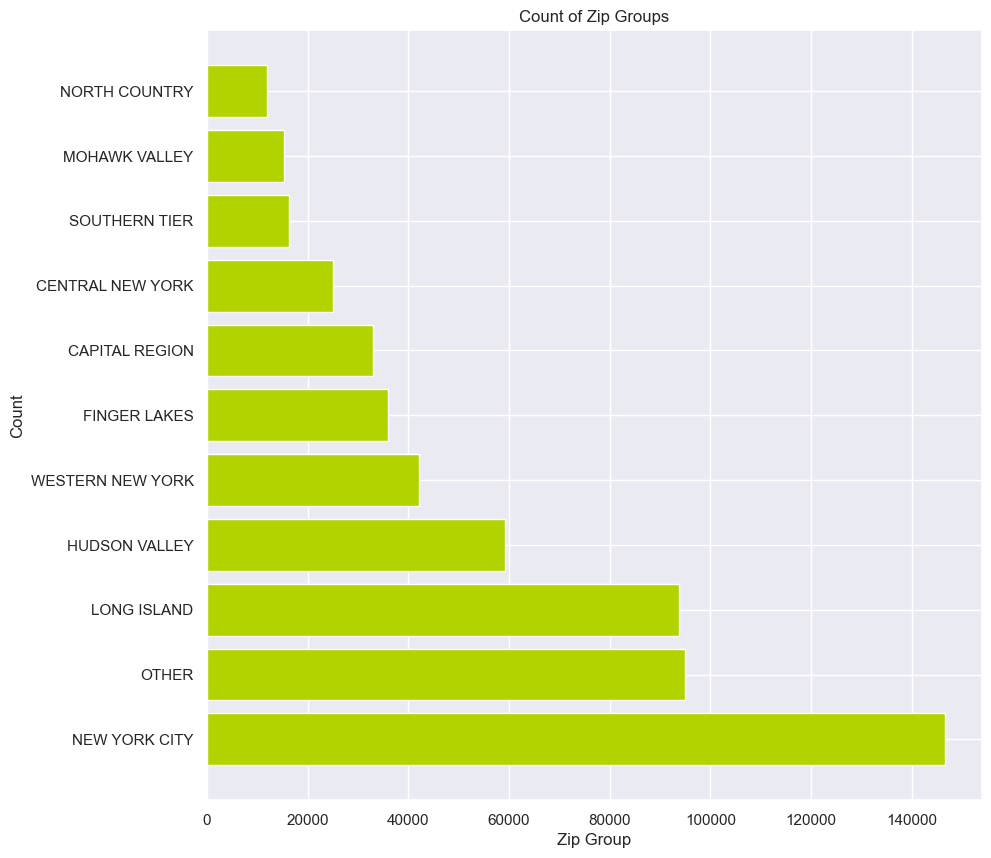

In [115]:
plt.figure(figsize=(10, 10))
plt.barh(df_train['zip_group'].value_counts().index, df_train['zip_group'].value_counts().values, color='#B2D300')
plt.xlabel('Zip Group')
plt.ylabel('Count')
plt.title('Count of Zip Groups')
plt.show()

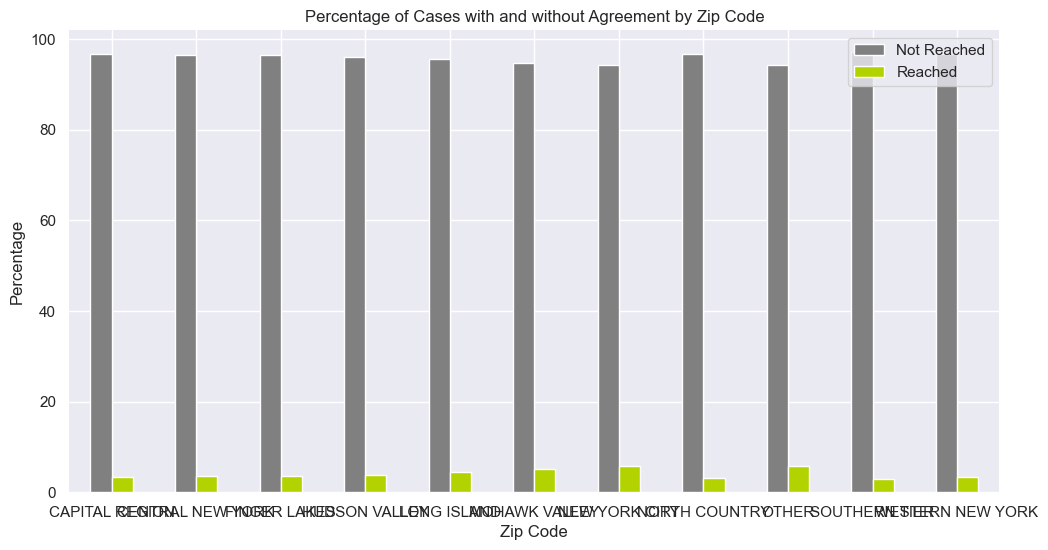

In [116]:
agreement_by_zip_code = pd.crosstab(df_train['zip_group'], df_train['Agreement Reached'])
agreement_by_zip_code.columns = ['Not Reached', 'Reached']
agreement_by_zip_code['Reached'] = (agreement_by_zip_code['Reached'] / (agreement_by_zip_code['Not Reached'] + agreement_by_zip_code['Reached'])) * 100
agreement_by_zip_code['Not Reached'] = 100 - agreement_by_zip_code['Reached']
agreement_by_zip_code.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Zip Code')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and without Agreement by Zip Code')
plt.xticks(rotation=0)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

## Time to Assembly Date

How does the time between accidents and the day of the claim assembly vary?<br>
To create this variable, the group subtracted the accident date from the assembly date.

Note: The assembly date is the date the claim was first assembled. The WCB “assembles” a claim in which an injured worker has lost more than one week of work, has a serious injury that may result in a permanent disability, is disputed by the carrier or employer, or receives a claim form from the injured worker 

Reference:

https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data

In [117]:
df_train['days_accident_to_assembly'] = (df_train['Assembly Date'] - df_train['Accident Date']).dt.days

In [118]:
negative_days = df_train[df_train['days_accident_to_assembly'] < 0]
negative_days

Accident Date  Age at Injury Assembly Date Attorney/Representative  \
168       2020-02-26             57    2020-01-01                     Yes   
412       2020-01-23             62    2020-01-02                     Yes   
582       2020-03-01             62    2020-01-02                     Yes   
798       2020-01-27             57    2020-01-03                     Yes   
1332      2020-01-23             56    2020-01-03                     Yes   
...              ...            ...           ...                     ...   
590739    2023-02-02             52    2022-12-26                     Yes   
590745    2022-12-28             55    2022-12-26                      No   
591212    2022-12-30             33    2022-12-27                     Yes   
591972    2022-12-29             41    2022-12-28                      No   
592884    2023-01-04             56    2022-12-30                     Yes   

        Average Weekly Wage  Birth Year   C-2 Date  \
168                 1997.87      1962.0 2019-12-31   
412                 1775.89      1957.0 2020-01-14   
582                 1467.47      1957.0 2020-01-17   
798                 1450.00         NaN 2020-01-15   
1332                1334.92         0.0 2020-01-06   
...                     ...         ...        ...   
590739               992.39      1970.0 2022-12-26   
590745                 0.00      1967.0 2022-12-26   
591212              2884.62      1989.0 2023-02-14   
591972              2500.00      1981.0        NaT   
592884              1576.92      1966.0 2023-02-22   

                        Carrier Name     Carrier Type  Claim Identifier  ...  \
168     CNY OTHER THAN ED, HED WATER      SELF-PUBLIC           5393953  ...   
412            NYC TRANSIT AUTHORITY      SELF-PUBLIC           5394099  ...   
582             STATE INSURANCE FUND  STATE INSURANCE           5393830  ...   
798       NEW YORK CITY TRANSIT AUTH      SELF-PUBLIC           5394613  ...   
1332            STATE INSURANCE FUND  STATE INSURANCE           5394770  ...   
...                              ...              ...               ...  ...   
590739  MASSACHUSETTS BAY INS.CO.C/O          PRIVATE           6162010  ...   
590745          STATE INSURANCE FUND  STATE INSURANCE           6162263  ...   
591212  CNY OTHER THAN ED, HED WATER      SELF-PUBLIC           6161996  ...   
591972   PFL NI CARRIER UNDETERMINED     SPECIAL FUND           6162985  ...   
592884  CNY OTHER THAN ED, HED WATER      SELF-PUBLIC           6164803  ...   

       age_group  wage_groups days_to_c2 days_to_c2_binned  \
168        45-64    High Wage      -57.0               NaN   
412        45-64    High Wage       -9.0               NaN   
582        45-64  Medium Wage      -44.0               NaN   
798        45-64  Medium Wage      -12.0               NaN   
1332       45-64  Medium Wage      -17.0               NaN   
...          ...          ...        ...               ...   
590739     45-64  Medium Wage      -38.0               NaN   
590745     45-64      No Wage       -2.0               NaN   
591212     25-44    High Wage       46.0          3 months   
591972     25-44    High Wage        NaN               NaN   
592884     45-64  Medium Wage       49.0          3 months   

                 body_group                       injury_type  \
168                    Arms  Cumulative Occupational Injuries   
412     Multiple Body Parts  Cumulative Occupational Injuries   
582                    Head              Neurological/Sensory   
798                    Head              Neurological/Sensory   
1332                   Arms        Repetitive Stress Injuries   
...                     ...                               ...   
590739                 Arms                   Physical Trauma   
590745                Torso                   Physical Trauma   
591212  Multiple Body Parts                   Physical Trauma   
591972                  NaN                               NaN   
592884      

In [119]:
print(f'There are {len(negative_days)} rows where the Assembly Date is before the Accident Date, this amounts to {round(len(negative_days)/len(df_train)*100, 2)}% of the data.')

There are 1407 rows where the Assembly Date is before the Accident Date, this amounts to 0.25% of the data.


There are cases where the date of the assembly precedes the date of the accident, obviously this should be impossible. These rows will be adressed in the data cleaning proccess.

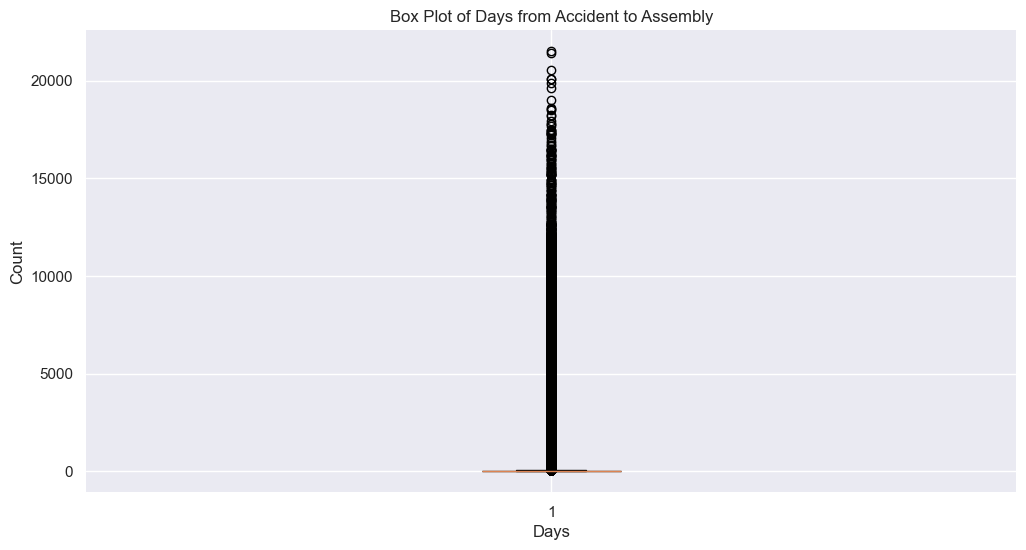

In [120]:
df_train['days_accident_to_assembly'] = (df_train['Assembly Date'] - df_train['Accident Date']).dt.days
df_train_days = df_train[df_train['days_accident_to_assembly'] > 0.0]
plt.figure(figsize=(12, 6))
plt.boxplot(df_train_days['days_accident_to_assembly'], patch_artist=True,
            boxprops=dict(facecolor='#B2D300'))
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Box Plot of Days from Accident to Assembly')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The days can be grouped into the following categories:
- Same day (0 days)
- 1 week (7 days)
- 1 month (30 days)
- 3 Months (90 days)
- 6 months (180 days)
- 1 year (365 days)
- 365 x 10 (10 years)
- 365 x 60 (60 years, this group was created to encompass all observations)

In [121]:
bins = (-1, 0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['Same Day', '1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
df_train['days_accident_to_assembly_binned'] = pd.cut(df_train['days_accident_to_assembly'], bins=bins, labels=labels)

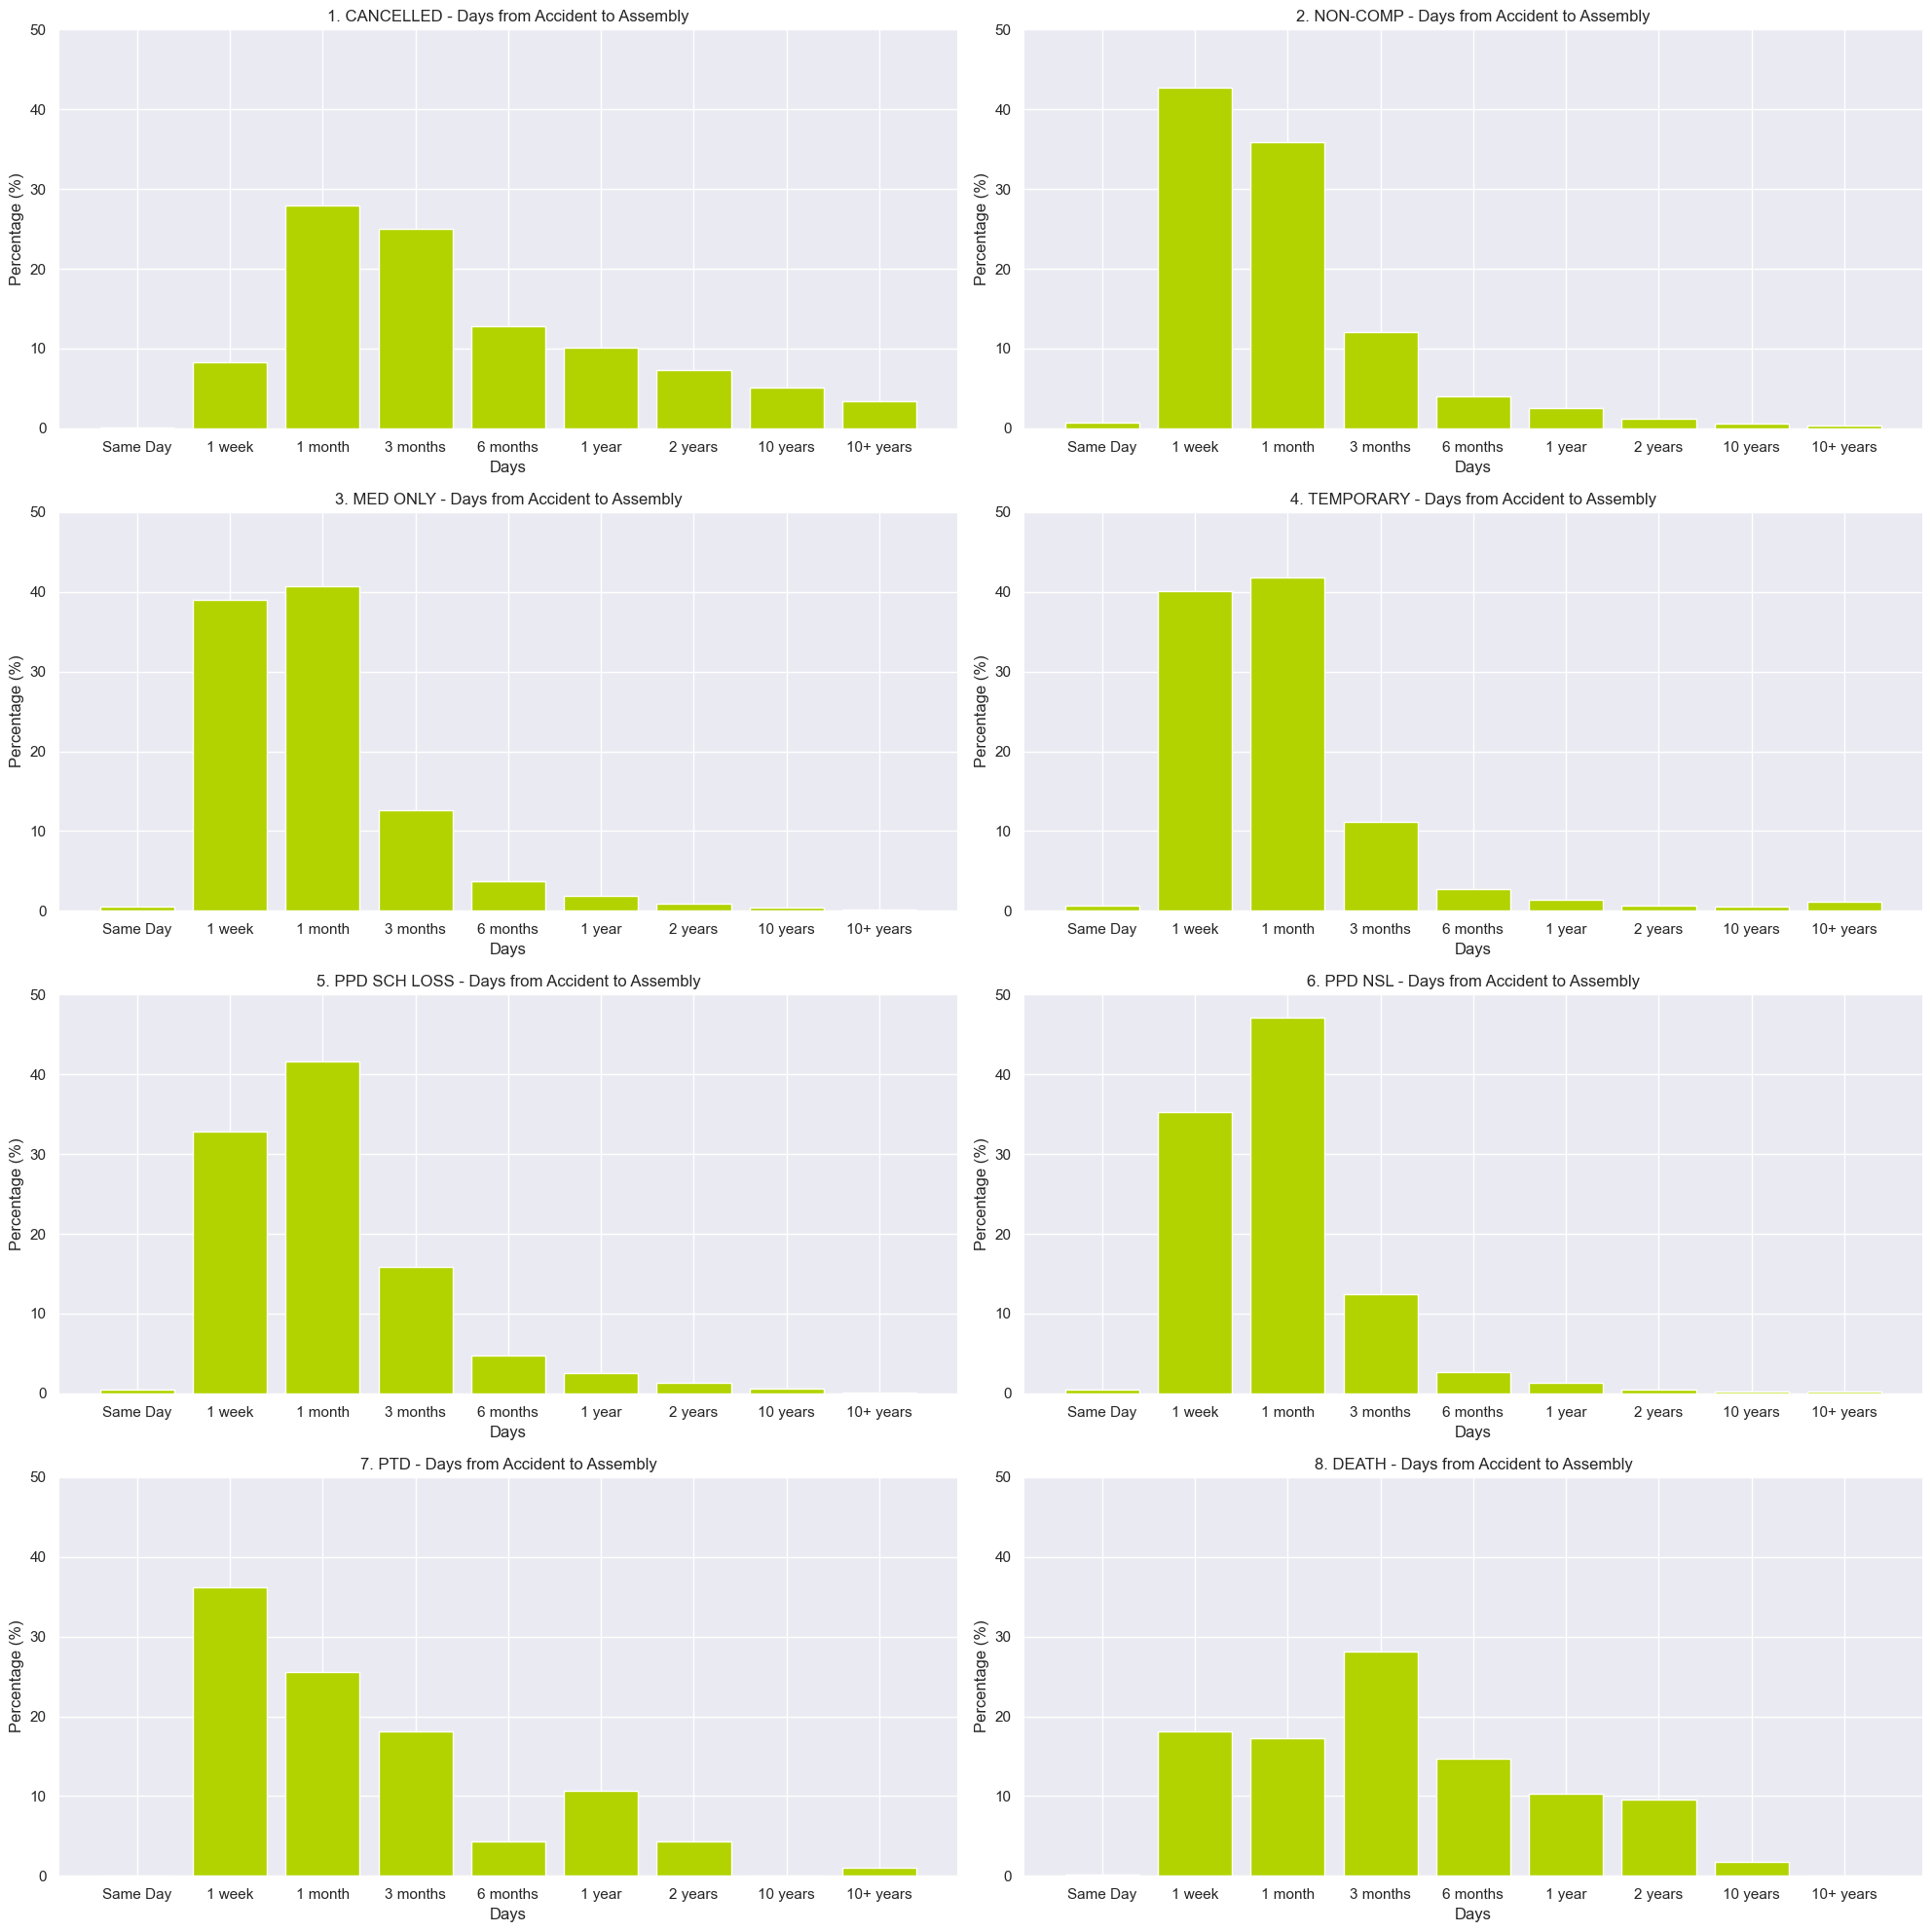

In [122]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
claim_list = ['1. CANCELLED', '2. NON-COMP', '3. MED ONLY', '4. TEMPORARY', '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH']

for ax, claim in zip(axes.flatten(), claim_list):
    days_accident_binned = df_train[df_train['Claim Injury Type'] == claim]['days_accident_to_assembly_binned'].value_counts().sort_index()
    bars = ax.bar(days_accident_binned.index.astype(str), days_accident_binned.values / days_accident_binned.values.sum() * 100, color='#B2D300')
    ax.set_title(f'{claim} - Days from Accident to Assembly')
    ax.set_xlabel('Days')
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 50)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

Expectedly, most of the claiments present in the dataset had their claims assembled within a month of the accident date. Unexpectedly, the type of claim where more time elapsed between accident and claim assembly is the cases involving death. This rise in 'waiting time' could possibly be due to the compexity of creating a claim for a case where a person died (such as the need for an autopsy report or police investigation).

There are some outliers - one observation waited for almost 60 years before assembeling the claim - but these cases will most likely be removed in the data cleaning phase.

## Accident Severity Score

### Reworking the AIS Codes into an Ordinal Variable  

To enhance the predictive power of injury scoring, the AIS body region codes were reworked into an ordinal variable by grouping regions and assigning corresponding weights. This approach aimed to better reflect the criticality of injuries by body region.  

| **AIS Code** | **Body Region**                      | **Associated Weight (Adult)**   | **Associated Weight (Pediatric)**   |
|--------------|--------------------------------------|----------------------------------|-------------------------------------|
| 1            | Head                                 | 6.39                             | 1.87                                |
| 2            | Face                                 | 4.18                             | 0.13                                |
| 3            | Neck                                 | 6.39                             | 1.87                                |
| 4            | Thorax                               | 4.80                             | 1.52                                |
| 5            | Abdomen                              | 4.76                             | 0.98                                |
| 6            | Spine                                | 5.32                             | 1.45                                |
| 7            | Upper Extremity                      | 5.65                             | 0.15                                |
| 8            | Lower Extremity                      | 5.65                             | 0.15                                |
| 9            | Unspecified                          | NA                               | NA                                  |

The AIS codes represent **9 body regions**, aligned with the AIS (Abbreviated Injury Scale) standards. However, code 9 is used here to represent unspecified body regions instead of external injuries, such as burns. The weights, drawn from a 2019 study, aim to provide a more meaningful assessment of injury severity and mortality risk by emphasizing the criticality of certain body regions (e.g., head, neck, and thorax).  

**References:**<br>
Shi, J., Shen, J., Zhu, M. et al. A new weighted injury severity scoring system: better predictive power for adult trauma mortality. Inj. Epidemiol. 6, 40 (2019) <br>
Morris, Andrew, Barnes, Jo, Fildes, Brian, Bentivegna, Fulvio, Seyer, Keith. _Effectiveness of ADR 69: A Case-Control Study of Crashed Vehicles Equipped with Airbags_.


In [123]:
# Mapping logic
body_region = {
'Head':["MULTIPLE HEAD INJURY", "EAR(S)", "SKULL", 
        "BRAIN", "SOFT TISSUE HEAD"],

'Face':["EYE(S)", "MOUTH", "NOSE", "FACIAL BONES", "TEETH"],

'Neck':["LARYNX", "TRACHEA", "MULTIPLE NECK INJURY", "VERTEBRAE",
        "DISC NECK", "SPINAL CORD", "SOFT TISSUE NECK"],

"Thorax":["CHEST", "LUNGS", "HEART", "MULTIPLE TRUNK", "UPPER BACK AREA"],

"Abdomen":["ABDOMEN INCLUDING GROIN", "INTERNAL ORGANS", "PELVIS"],

"Spine":["SPINAL CORD", "VERTEBRAE", "LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA)", 
        "SACRUM AND COCCYX", "LOWER BACK AREA", "DISC TRUNK", "BUTTOCKS"],

"Upper Extremity":["SHOULDER(S)", "ARMS", "FINGER(S)", "THUMB", "WRIST", "HAND", 
                    "UPPER ARM", "ELBOW", "WRIST (S) & HAND(S)", "MULTIPLE UPPER EXTREMITIES", 
                    "LOWER ARM"],
"Lower Extremity":["LEGS", "ANKLE", "KNEE", "LOWER LEG", "UPPER LEG", "FOOT", "TOES", 
                    "GREAT TOE", "MULTIPLE LOWER EXTREMITIES", "HIP"],

"Unspecified":["ARTIFICIAL APPLIANCE", "INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED", 
                "NO PHYSICAL INJURY", "MULTIPLE BODY PARTS (INCLUDING BODY", 
                "BODY SYSTEMS AND MULTIPLE BODY SYSTEMS", "WHOLE BODY", "MULTIPLE"]
}

In [124]:
# Initialize a new column for severity
df_train['body_region'] = None

# Function to categorize an body group
def categorize_body(body):
    for region, body_part in body_region.items():
        if body in body_part:
            return region

# Apply the function to categorize injuries
df_train['body_region'] = df_train['WCIO Part Of Body Description'].apply(categorize_body)

In [125]:
# AIS Body Regions Mapping
ais_body_regions = {
    1: "Head",
    2: "Face",
    3: "Neck",
    4: "Thorax",
    5: "Abdomen",
    6: "Spine",
    7: "Upper Extremity",
    8: "Lower Extremity",
    9: "Unspecified"
}

In [126]:
df_train['AIS'] = None

# Function to categorize an body group
def categorize_AIS(body_region):
    if body_region is None:
        return None
    for ais, body_regions in ais_body_regions.items():
        if body_region in body_regions:
            return ais

# Apply the function to categorize injuries
df_train['AIS'] = df_train['body_region'].apply(categorize_AIS)

In [127]:
w_pediatric = {
    1: 1.87,
    2: 0.13,
    3: 1.87,
    4: 1.52,
    5: 0.98,
    6: 1.45,
    7: 0.15,
    8: 0.15,
    9: 0
}

w_adult = {
    1: 6.39,
    2: 4.18,
    3: 6.39,
    4: 4.80,
    5: 4.76,
    6: 5.32,
    7: 5.65,
    8: 5.65,
    9: 0
}
import math 

def ais_weights (row):
    if math.isnan(row['Age at Injury']):
        return float('nan')
    elif math.isnan(row['AIS']):
        return float('nan')
    elif row['Age at Injury'] <= 15:
        return w_pediatric[row['AIS']]
    else:
        return w_adult[row['AIS']]

In [128]:
ais_weights = df_train.apply(lambda row: ais_weights(row), axis=1)
df_train['ais_weights'] = ais_weights

### Reworking the Injury Codes: Severity Score

The group also decided to rework the grouping of injury codes. In line with the body region codes, the objective behind this shift was to transform a categorical variable into what is effectively an ordinal variable. To achieve this goal, the following scale was used:

| **Severity Score** | **Injury**                           |
|--------------------|--------------------------------------|
| 1                  | Minor                                |
| 2                  | Moderate                             |
| 3                  | Serious                              |
| 4                  | Severe                               |
| 5                  | Critical                             |
| 6                  | Fatal                                |
| 9                  | Not Further Specified (NFS)          |

Injuries were grouped into **7 categories**, each assigned an injury severity score, which aligns with the AIS norms. This is based on the AIS structure presented in the report from the Department of Transport and Regional Services Australian Transport Safety Bureau regarding the effectiveness of ADR 69 (Australian Design Rules). These codes can then be used in conjunction with the body region codes to calculate a severity index, which will be explained later.

References:<br>
Morris, Andrew, Barnes, Jo, Fildes, Brian, Bentivegna, Fulvio, Seyer, Keith. _Effectiveness of ADR 69: A Case-Control Study of Crashed Vehicles Equipped with Airbags_.


In [129]:
# Categorization of all injuries into severity levels
injury_categories = {
    "Minor": [
        "CONTUSION", "SPRAIN OR TEAR", "BURN", "INFLAMMATION", "DERMATITIS", 
        "FOREIGN BODY", "VDT - RELATED DISEASES"
    ],

    "Moderate": [
        "CONCUSSION", "PUNCTURE", "LACERATION", "STRAIN OR TEAR", 
        "CARPAL TUNNEL SYNDROME", "HERNIA", "HEARING LOSS OR IMPAIRMENT", 
        "LOSS OF HEARING", "VISION LOSS", "SYNCOPE", "ENUCLEATION"
    ],

    "Serious": [
        "FRACTURE", "RUPTURE", "DISLOCATION", "ELECTRIC SHOCK", "INFECTION",
        "BYSSINOSIS", "BLACK LUNG", "SILICOSIS", "POISONING - METAL", 
        "POISONING - CHEMICAL, (OTHER THAN METALS)", "DUST DISEASE, NOC", 
        "ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC"
        "ALL OTHER SPECIFIC INJURIES, NOC", "ALL OTHER CUMULATIVE INJURY, NOC"
    ],

    "Severe": [
        "CRUSHING", "SEVERANCE", "ASBESTOSIS", "ANGINA PECTORIS", 
        "RESPIRATORY DISORDERS", "VASCULAR", "HEAT PROSTRATION", 
        "RADIATION", "POISONING - GENERAL (NOT OD OR CUMULATIVE"
    ],

    "Critical": [
        "AMPUTATION", "MYOCARDIAL INFARCTION", "ASPHYXIATION", 
        "COVID-19", "AIDS", "HEPATITIS C", "CONTAGIOUS DISEASE"
    ],

    "Fatal": [
        "CANCER", "FATAL INFECTION", "MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL", "MULTIPLE PHYSICAL INJURIES ONLY"
    ],

    "Not further specified (NFS)": [
        "NO PHYSICAL INJURY", "ADVERSE REACTION TO A VACCINATION OR INOCULATION", 
        "NOT FURTHER SPECIFIED", "FREEZING", "MENTAL STRESS", "MENTAL DISORDER",
        "ALL OTHER SPECIFIC INJURIES, NOC", "ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC"
    ]
}

In [130]:
# Initialize a new column for severity
df_train['severity'] = None

# Function to categorize an injury
def categorize_injury(injury):
    for severity, injuries in injury_categories.items():
        if injury in injuries:
            return severity

# Apply the function to categorize injuries
df_train['severity'] = df_train['WCIO Nature of Injury Description'].apply(categorize_injury)

In [131]:
# Dictionary mapping AIS codes to severity levels
ais_severity_map = {
    "Minor": 1,
    "Moderate": 2,
    "Serious": 3,
    "Severe": 4,
    "Critical": 5,
    "Fatal": 6,
    "Not further specified (NFS)": 0
}

In [132]:
df_train['SS'] = None

# Assuming the 'AIS Code' column exists in your DataFrame
# Create or replace the 'AIS' column by mapping AIS codes using the dictionary
df_train['SS'] = df_train['severity'].map(ais_severity_map)

### Calculating the Accident Severity Score (ASS)

To calculate the final score that reflects the severity of an accident (ASS for short), the following formula was used:

$$
\text{Accident Severity Score (ASS)} = \text{Body Region Weight} \times \text{Severity Score}
$$

However, there is an important caveat: if either the **AIS Body Region** or the **Severity Score** is equal to **9** (indicating unspecified values), the row is automatically assigned an **ASS score of 0.5**. This approach minimizes the introduction of noise into the data by assigning a neutral value to cases with incomplete information.  

In [133]:
df_train['ASS'] = None

def calculate_ass(row):
    if row['ais_weights'] == 0:
        return 0.5
    elif row['SS'] == 0:
        return 0.5
    else:
        return row['ais_weights'] * row['SS']

df_train['ASS'] = df_train.apply(calculate_ass, axis=1)

In [134]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

values_excluding_0_5 = df_train[df_train['ASS'] != 0.5]['ASS'].values.reshape(-1, 1)
scaled_values = scaler.fit_transform(values_excluding_0_5)
df_train['ASS'] = df_train['ASS'].apply(lambda x: 0.5 if x == 0.5 else scaler.transform([[x]])[0][0])

In [135]:
#calculate the average ASS for each claim injury type
df_train.groupby('Claim Injury Type')['ASS'].mean()

Claim Injury Type
1. CANCELLED       0.357612
2. NON-COMP        0.312727
3. MED ONLY        0.315814
4. TEMPORARY       0.332185
5. PPD SCH LOSS    0.309152
6. PPD NSL         0.330253
7. PTD             0.434546
8. DEATH           0.549369
Name: ASS, dtype: float64

### Reworking the Industry Codes: Industry Risk Index

In the same vein as body regions and injury types, the group decided to devise a way to turn the variable regarding industries into an ordinal variable. To achieve this objective, an external dataset was necessary. The data was collected from the National Safety Council (NSC), a nonprofit public service organization promoting health and safety in the United States. According to the NSC, the data is sourced from the U.S. Bureau of Labor Statistics.

The group's idea was to use this dataset to analyze the death and injury rates across different industries to create a ranking of industries that pose the highest risk to workers. This ranking could then be used to assign a score to each industry, effectively transforming it into an ordinal variable.

References: <br>
[National Safety Council - Most Dangerous Industries](https://injuryfacts.nsc.org/work/industry-incidence-rates/most-dangerous-industries/)

In [136]:
industry_df = pd.read_excel('datasets/industry.xlsx', sheet_name=0, header=1)
industry_df = industry_df.drop(index=[0, 1, 2, 3])
industry_df = industry_df.drop(columns=['Unnamed: 2', 'Unnamed: 3'])

In [137]:
industry_df['Fatality rate per 100,000 workers'] = pd.to_numeric(industry_df['Fatality rate per 100,000 workers'], errors='coerce')
avg_fatality_industry = industry_df.groupby('Industry')['Fatality rate per 100,000 workers'].mean().sort_values(ascending=False)
avg_fatality_industry

Industry
Agriculture, forestry, fishing, and hunting    22.633333
Transportation and warehousing                 14.258333
Mining                                         13.566667
Construction                                    9.716667
Wholesale trade                                 5.025000
All industries                                  3.483333
Other services                                  2.883333
Professional and business services              2.754545
Utilities                                       2.533333
Leisure and hospitality                         2.266667
Manufacturing                                   2.245455
Retail trade                                    2.041667
Government                                      2.008333
Information                                     1.709091
Financial activities                            1.000000
Education and health services                   0.733333
Name: Fatality rate per 100,000 workers, dtype: float64

In [138]:
industry_df['Nonfatal injury and illness involving days away from work rate per 10,000 workers'] = pd.to_numeric(industry_df['Nonfatal injury and illness involving days away from work rate per 10,000 workers'], errors='coerce')
avg_nonfatal_industry = industry_df.groupby('Industry')['Nonfatal injury and illness involving days away from work rate per 10,000 workers'].mean().sort_values(ascending=False)
avg_nonfatal_industry

Industry
Transportation and warehousing                 212.291667
Agriculture, forestry, fishing, and hunting    180.358333
Government                                     172.158333
Education and health services                  135.600000
Construction                                   126.650000
Retail trade                                   115.766667
Wholesale trade                                103.508333
Manufacturing                                  102.991667
All industries                                 102.183333
Leisure and hospitality                         96.458333
Other services                                  80.100000
Utilities                                       71.808333
Mining                                          71.091667
Information                                     53.708333
Professional and business services              46.766667
Financial activities                            35.033333
Name: Nonfatal injury and illness involving days away from work

In [139]:
industry_df['Nonfatal injury and illness involving days away from work rate per 10,000 workers'] = pd.to_numeric(industry_df['Nonfatal injury and illness involving days away from work rate per 10,000 workers'], errors='coerce')
avg_nonfatal_industry = industry_df.groupby('Industry')['Nonfatal injury and illness involving days away from work rate per 10,000 workers'].mean().sort_values(ascending=False)
avg_nonfatal_industry

Industry
Transportation and warehousing                 212.291667
Agriculture, forestry, fishing, and hunting    180.358333
Government                                     172.158333
Education and health services                  135.600000
Construction                                   126.650000
Retail trade                                   115.766667
Wholesale trade                                103.508333
Manufacturing                                  102.991667
All industries                                 102.183333
Leisure and hospitality                         96.458333
Other services                                  80.100000
Utilities                                       71.808333
Mining                                          71.091667
Information                                     53.708333
Professional and business services              46.766667
Financial activities                            35.033333
Name: Nonfatal injury and illness involving days away from work

In [140]:
industry_risk_df = pd.concat(
    [avg_fatality_industry, avg_nonfatal_industry], 
    axis=1, 
    keys=['Avg Fatality Rate per 100,000', 'Avg Nonfatal Injury Rate per 10,000']
)

industry_risk_df.reset_index(inplace=True)
industry_risk_df

Industry  \
0   Agriculture, forestry, fishing, and hunting   
1                Transportation and warehousing   
2                                        Mining   
3                                  Construction   
4                               Wholesale trade   
5                                All industries   
6                                Other services   
7            Professional and business services   
8                                     Utilities   
9                       Leisure and hospitality   
10                                Manufacturing   
11                                 Retail trade   
12                                   Government   
13                                  Information   
14                         Financial activities   
15                Education and health services   

    Avg Fatality Rate per 100,000  Avg Nonfatal Injury Rate per 10,000  
0                       22.633333                           180.358333  
1                       14.258333                           212.291667  
2                       13.566667                            71.091667  
3                        9.716667                           126.650000  
4                        5.025000                           103.508333  
5                        3.483333                           102.183333  
6                        2.883333                            80.100000  
7                        2.754545                            46.766667  
8                        2.533333                            71.808333  
9                        2.266667                            96.458333  
10                       2.245455                           102.991667  
11                       2.041667                           115.766667  
12                       2.008333                           172.158333  
13                       1.709091                            53.708333  
14                       1.000000                            35.033333  
15                       0.733333                           135.600000

#### Risk Index Formula (70/30 Weighting)

To calculate the risk index for industries, the following formula is used:

$$
\text{Risk Index} = 0.7 \times \left( \frac{\text{Fatality Rate per 100,000}}{10} \right) + 0.3 \times \text{Nonfatal Injury Rate per 10,000}
$$

**Explanation:**
- **Fatality Rate per 100,000**: Divided by 10 to align the scale with the nonfatal injury rate.
- **Nonfatal Injury Rate per 10,000**: Used as is.
- **Weights (70/30)**: Reflect the greater importance of fatalities compared to nonfatal injuries.

This formula provides a composite score that quantifies the overall risk level of industries, balancing the severity and frequency of workplace incidents.

In [141]:
industry_risk_df['Avg Fatality Rate per 10,000'] = industry_risk_df['Avg Fatality Rate per 100,000'] / 10
industry_risk_df.drop(columns='Avg Fatality Rate per 100,000', inplace=True)

In [142]:
scaler = MinMaxScaler()

industry_risk_df[['Avg Nonfatal Injury Rate per 10,000 (Normalized)', 'Avg Fatality Rate per 10,000 (Normalized)']] = scaler.fit_transform(industry_risk_df[['Avg Nonfatal Injury Rate per 10,000', 'Avg Fatality Rate per 10,000']])
industry_risk_df

Industry  \
0   Agriculture, forestry, fishing, and hunting   
1                Transportation and warehousing   
2                                        Mining   
3                                  Construction   
4                               Wholesale trade   
5                                All industries   
6                                Other services   
7            Professional and business services   
8                                     Utilities   
9                       Leisure and hospitality   
10                                Manufacturing   
11                                 Retail trade   
12                                   Government   
13                                  Information   
14                         Financial activities   
15                Education and health services   

    Avg Nonfatal Injury Rate per 10,000  Avg Fatality Rate per 10,000  \
0                            180.358333                      2.263333   
1                            212.291667                      1.425833   
2                             71.091667                      1.356667   
3                            126.650000                      0.971667   
4                            103.508333                      0.502500   
5                            102.183333                      0.348333   
6                             80.100000                      0.288333   
7                             46.766667                      0.275455   
8                             71.808333                      0.253333   
9                             96.458333                      0.226667   
10                           102.991667                      0.224545   
11                           115.766667                      0.204167   
12                           172.158333                      0.200833   
13                            53.708333                      0.170909   
14                            35.033333                      0.100000   
15                           135.600000                      0.073333   

    Avg Nonfatal Injury Rate per 10,000 (Normalized)  \
0                                           0.819849   
1                                           1.000000   
2                                           0.203423   
3                                           0.516854   
4                                           0.386301   
5                                           0.378826   
6                                           0.254243   
7                                           0.066193   
8                                           0.207466   
9                                           0.346528   
10                                          0.383386   
11                                          0.455456   
12                                          0.773588   
13                                          0.105355   
14                                          0.000000   
15                                          0.567345   

    Avg Fatality Rate per 10,000 (Normalized)  
0                                    1.000000  
1                                    0.617580  
2                                    0.585997  
3                                    0.410198  
4                                    0.195967  
5                                    0.125571  
6                                    0.098174  
7                                    0.092293  
8                                    0.082192  
9                                    0.070015  
10                                   0.069047  
11                                   0.059741  
12                                   0.058219  
13                                   0.044555  
14                                   0.012177  
15                                   0.000000

In [143]:
industry_risk_df['Risk Score'] = industry_risk_df['Avg Fatality Rate per 10,000 (Normalized)'] * 0.70 + industry_risk_df['Avg Nonfatal Injury Rate per 10,000 (Normalized)']  * 0.3
industry_risk_df

Industry  \
0   Agriculture, forestry, fishing, and hunting   
1                Transportation and warehousing   
2                                        Mining   
3                                  Construction   
4                               Wholesale trade   
5                                All industries   
6                                Other services   
7            Professional and business services   
8                                     Utilities   
9                       Leisure and hospitality   
10                                Manufacturing   
11                                 Retail trade   
12                                   Government   
13                                  Information   
14                         Financial activities   
15                Education and health services   

    Avg Nonfatal Injury Rate per 10,000  Avg Fatality Rate per 10,000  \
0                            180.358333                      2.263333   
1                            212.291667                      1.425833   
2                             71.091667                      1.356667   
3                            126.650000                      0.971667   
4                            103.508333                      0.502500   
5                            102.183333                      0.348333   
6                             80.100000                      0.288333   
7                             46.766667                      0.275455   
8                             71.808333                      0.253333   
9                             96.458333                      0.226667   
10                           102.991667                      0.224545   
11                           115.766667                      0.204167   
12                           172.158333                      0.200833   
13                            53.708333                      0.170909   
14                            35.033333                      0.100000   
15                           135.600000                      0.073333   

    Avg Nonfatal Injury Rate per 10,000 (Normalized)  \
0                                           0.819849   
1                                           1.000000   
2                                           0.203423   
3                                           0.516854   
4                                           0.386301   
5                                           0.378826   
6                                           0.254243   
7                                           0.066193   
8                                           0.207466   
9                                           0.346528   
10                                          0.383386   
11                                          0.455456   
12                                          0.773588   
13                                          0.105355   
14                                          0.000000   
15                                          0.567345   

    Avg Fatality Rate per 10,000 (Normalized)  Risk Score  
0                                    1.000000    0.945955  
1                                    0.617580    0.732306  
2                                    0.585997    0.471225  
3                                    0.410198    0.442195  
4                                    0.195967    0.253067  
5                                    0.125571    0.201547  
6                                    0.098174    0.144994  
7                                    0.092293    0.084463  
8                                    0.082192    0.119774  
9                                    0.070015    0.152969  
10                                   0.069047    0.163348  
11                                   0.059741    0.178456  
12                                   0.058219    0.272830  
13                                   0.044555    0.062795  
14                                   0.012177    0.008524  
15              

In [144]:
# make a new column for df_train with the new names for the industries
df_train['industry_new'] = df_train['Industry Code Description'].replace({
    'AGRICULTURE, FORESTRY, FISHING AND HUNTING': 'Agriculture, forestry, fishing, and hunting',
    'MINING': 'Mining',
    'UTILITIES': 'Utilities',
    'CONSTRUCTION': 'Construction',
    'MANUFACTURING': 'Manufacturing',
    'WHOLESALE TRADE': 'Wholesale trade',
    'RETAIL TRADE': 'Retail trade',
    'TRANSPORTATION AND WAREHOUSING': 'Transportation and warehousing',
    'INFORMATION': 'Information',
    'FINANCE AND INSURANCE': 'Financial activities',
    'REAL ESTATE AND RENTAL AND LEASING': 'Other services',
    'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES': 'Professional and business services',
    'MANAGEMENT OF COMPANIES AND ENTERPRISES': 'Professional and business services',
    'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)': 'Other services',
    'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT': 'Other services',
    'EDUCATIONAL SERVICES': 'Education and health services',
    'HEALTH CARE AND SOCIAL ASSISTANCE': 'Education and health services',
    'PUBLIC ADMINISTRATION': 'Government',
    'ARTS, ENTERTAINMENT, AND RECREATION': 'Leisure and hospitality',
    'ACCOMMODATION AND FOOD SERVICES': 'Leisure and hospitality'
})

# assign the risk score to the dataframe based on the new names and the risk score of industry_risk_df
df_train['industry_risk_score'] = df_train['industry_new'].map(industry_risk_df.set_index('Industry')['Risk Score'])
df_train.head()

Accident Date  Age at Injury Assembly Date Attorney/Representative  \
0    2019-12-30             31    2020-01-01                      No   
1    2019-08-30             46    2020-01-01                     Yes   
2    2019-12-06             40    2020-01-01                      No   
4    2019-12-30             61    2020-01-01                      No   
5    2019-12-26             67    2020-01-01                      No   

   Average Weekly Wage  Birth Year   C-2 Date                  Carrier Name  \
0                 0.00      1988.0 2019-12-31    NEW HAMPSHIRE INSURANCE CO   
1              1745.93      1973.0 2020-01-01  ZURICH AMERICAN INSURANCE CO   
2              1434.80      1979.0 2020-01-01     INDEMNITY INSURANCE CO OF   
4                  NaN      1958.0 2019-12-31          STATE INSURANCE FUND   
5                 0.00      1952.0 2019-12-31   INDEMNITY INS. OF N AMERICA   

      Carrier Type  Claim Identifier  ... days_accident_to_assembly  \
0          PRIVATE           5393875  ...                       2.0   
1          PRIVATE           5393091  ...                     124.0   
2          PRIVATE           5393889  ...                      26.0   
4  STATE INSURANCE           5393887  ...                       2.0   
5          PRIVATE           5393863  ...                       6.0   

  days_accident_to_assembly_binned      body_region  AIS ais_weights  \
0                           1 week            Spine  6.0        5.32   
1                         6 months  Upper Extremity  7.0        5.65   
2                          1 month             Head  1.0        6.39   
4                           1 week  Upper Extremity  7.0        5.65   
5                           1 week  Upper Extremity  7.0        5.65   

   severity   SS       ASS                   industry_new industry_risk_score  
0     Minor  1.0  0.135828                   Retail trade            0.178456  
1     Minor  1.0  0.144465                   Construction            0.442195  
2  Moderate  2.0  0.331065                 Other services            0.144994  
4  Moderate  2.0  0.292332  Education and health services            0.170204  
5     Minor  1.0  0.144465                   Retail trade            0.178456  

[5 rows x 46 columns]

In [145]:
## check when industry code description has a value and industry new is missing value
df_train[df_train['Industry Code Description'].notnull() & df_train['industry_new'].isnull()]['Industry Code Description'].value_counts()

Series([], Name: count, dtype: int64)

In [146]:
#rows when industry code description has a value and industry new is missing value
df_train[df_train['Industry Code Description'].notnull() & df_train['industry_new'].isnull()]

Empty DataFrame
Columns: [Accident Date, Age at Injury, Assembly Date, Attorney/Representative, Average Weekly Wage, Birth Year, C-2 Date, Carrier Name, Carrier Type, Claim Identifier, Claim Injury Type, County of Injury, COVID-19 Indicator, District Name, Gender, Industry Code, Industry Code Description, Medical Fee Region, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part Of Body Code, WCIO Part Of Body Description, Zip Code, Agreement Reached, Number of Dependents, age_group, wage_groups, days_to_c2, days_to_c2_binned, body_group, injury_type, injury_cause, industry_group, zip_group, days_accident_to_assembly, days_accident_to_assembly_binned, body_region, AIS, ais_weights, severity, SS, ASS, industry_new, industry_risk_score]
Index: []

[0 rows x 46 columns]

## Early check for correlations

### Cramér's V

Cramér's V is a metric for measuring the correlation between categorical variables. In python, there are no functions to calculate this metric, instead a function that is available online will be used.

References:<br>
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792<br>
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

### Claim Injury Type

In [147]:
var_list = ['age_group', 'body_group', 'injury_type', 'injury_cause', 'industry_group','Attorney/Representative', 'COVID-19 Indicator', 'days_accident_to_assembly_binned', 'Carrier Type', 'zip_group']

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

for i in var_list:
    cvi = cramers_v(df_train['Claim Injury Type'], df_train[i])
    if cvi >= 0.1:
        print(f'{i} : {cvi:.2f}')

Attorney/Representative : 0.61
COVID-19 Indicator : 0.10


According to Cramér's V, the variable "Attorney/Representative" is highly correlated to the first target variable.

### Agreement Reached

In [148]:
for i in var_list:
    cvi = cramers_v(df_train['Agreement Reached'], df_train[i])
    if cvi >= 0.1:
        print(f'{i} : {cvi:.2f}')

Attorney/Representative : 0.29
days_accident_to_assembly_binned : 0.18
Carrier Type : 0.10


The same result is obtained in the second target variable, althought the connection is weaker.

In [149]:
df_train.to_csv('df_train_v1.csv', index=False) #this cell is a checkpoint that the group used to avoid running the whole notebook when working

# Data Cleaning

### Transforming the test data

Before beginning the data cleaning process, all the alterations that were performed on df_train will be applied to df_test:

In [150]:
df_test = pd.read_csv('test_data.csv')
df_train = pd.read_csv('df_train_v1.csv') #this line is a checkpoint that the group used to avoid running the whole notebook when working

In [151]:
for i in df_train.columns:
    if i not in df_test.columns:
        print(i)

Claim Injury Type
Agreement Reached
age_group
wage_groups
days_to_c2
days_to_c2_binned
body_group
injury_type
injury_cause
industry_group
zip_group
days_accident_to_assembly
days_accident_to_assembly_binned
body_region
AIS
ais_weights
severity
SS
ASS
industry_new
industry_risk_score


In [152]:
# Check for missing values in df_train
missing_rows_train = df_train.isnull().any(axis=1).sum()
total_rows_train = len(df_train)
percent_missing_train = (missing_rows_train / total_rows_train) * 100
print(f"Missing rows in df_train: {round(percent_missing_train, 2)}%")

Missing rows in df_train: 20.33%


Drop irrelevant column and change datatypes:

In [153]:
df_test = df_test.drop(columns=['OIICS Nature of Injury Description', 'C-3 Date', 'First Hearing Date', 'IME-4 Count'])

In [154]:
int_list = ['Age at Injury', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents']
for i in int_list:
    df_test[i] = pd.to_numeric(df_test[i], errors='coerce').astype('Int64')
    df_train[i] = pd.to_numeric(df_train[i], errors='coerce').astype('Int64')

In [155]:
date_list = ['Accident Date', 'Assembly Date', 'C-2 Date']
for i in date_list:
    df_test[i] = pd.to_datetime(df_test[i], errors='coerce')
    df_train[i] = pd.to_datetime(df_train[i], errors='coerce')

In [156]:
bins = (1, 18, 25, 45, 65, float('inf'))
labels = ['1-17', '18-24', '25-44', '45-64', '65+']
df_test['age_group'] = pd.cut(df_test['Age at Injury'], bins=bins, labels=labels)

In [157]:
## Uncomment if you want to run the project without the eda


# # calculate the quantiles and IQR excluding claims with 0 wage
df_non_zero_wage = df_train[df_train['Average Weekly Wage'] > 0]

q1 = df_non_zero_wage['Average Weekly Wage'].quantile(0.25) # 25th percentile or first quartile
q3 = df_non_zero_wage['Average Weekly Wage'].quantile(0.75)  # 75th percentile or third quartile
iqr = q3 - q1
lower_bound = max(0,q1 - 1.5 * iqr)                          # the max function ensures the lower bound cannot be less than 0, as negative wages are not valid
upper_bound = q3 + 1.5 * iqr

In [158]:
bins = [-1, 0, q1, q3, upper_bound, df_train['Average Weekly Wage'].max()]
labels = ['No Wage', 'Low Wage', 'Medium Wage', 'High Wage', 'Very High Wage']
df_test['wage_groups'] = pd.cut(df_test['Average Weekly Wage'], bins=bins, labels=labels)
df_test[['Average Weekly Wage', 'wage_groups']]

Average Weekly Wage wage_groups
0                       NaN         NaN
1                       NaN         NaN
2                       0.0     No Wage
3                       0.0     No Wage
4                       0.0     No Wage
...                     ...         ...
387970                  NaN         NaN
387971                  0.0     No Wage
387972                  0.0     No Wage
387973                  0.0     No Wage
387974                  0.0     No Wage

[387975 rows x 2 columns]

In [159]:
## change the descriptions of the given codes to more readable descriptions:
# 18 - SOFT TISSUE HEAD
# 25 - SOFT TISSUE NECK
# 22 - DISC NECK
# 43 - DISC TRUNK

# the body part code 18 has a description of 'SOFT TISSUE that need to be altered to 'SOFT TISSUE HEAD'
df_test.loc[df_test['WCIO Part Of Body Code'] == 18, 'WCIO Part Of Body Description'] = 'SOFT TISSUE HEAD'

# the body part code 25 has a description of 'SOFT TISSUE that need to be altered to 'SOFT TISSUE NECK'
df_test.loc[df_test['WCIO Part Of Body Code'] == 25, 'WCIO Part Of Body Description'] = 'SOFT TISSUE NECK'

# the body part code 22 has a description of 'DISC that need to be altered to 'DISC NECK'
df_test.loc[df_test['WCIO Part Of Body Code'] == 22, 'WCIO Part Of Body Description'] = 'DISC NECK'

# the body part code 43 has a description of 'DISC that need to be altered to 'DISC TRUNK'
df_test.loc[df_test['WCIO Part Of Body Code'] == 43, 'WCIO Part Of Body Description'] = 'DISC TRUNK'

In [160]:
head = [
    "MULTIPLE HEAD INJURY", "EYE(S)", "MOUTH", "EAR(S)", "SKULL", "FACIAL BONES", 
    "TEETH", "NOSE", "BRAIN", "LARYNX", "TRACHEA", "MULTIPLE NECK INJURY", "SOFT TISSUE"
]

torso = [
    "TORSO", "SHOULDER(S)", "LUNGS", "BUTTOCKS", "LOWER BACK AREA", "ABDOMEN INCLUDING GROIN", 
    "HIP", "CHEST", "DISC", "UPPER BACK AREA", "PELVIS", "HEART", "VERTEBRAE", 
    "LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA", "SACRUM AND COCCYX", "SPINAL CORD", "MULTIPLE TRUNK", "SPINAL CORD", "INTERNAL ORGANS"
]

arm = [
    "ARMS", "FINGER(S)", "THUMB", "WRIST", "HAND", "UPPER ARM", "ELBOW", "WRIST (S) & HAND(S)", "MULTIPLE UPPER EXTREMITIES", "LOWER ARM"
]

leg = [
    "LEGS", "ANKLE", "KNEE", "LOWER LEG", "UPPER LEG", "FOOT", "TOES", "GREAT TOE", 
    "MULTIPLE LOWER EXTREMITIES"
]

multiple_body_parts = [ 
    'ARTIFICIAL APPLIANCE', "INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED",
    'NO PHYSICAL INJURY', 'MULTIPLE BODY PARTS (INCLUDING BODY', 'BODY SYSTEMS AND MULTIPLE BODY SYSTEMS',
    'WHOLE BODY', 'MULTIPLE'
]

Check for codes in the WCIO variables that are in the test dataset and are not in the train dataset. This process is going to be repeated for all variables of this type.

In [161]:
# Checking for new information
defined_body_parts = set(head + torso + arm + leg + multiple_body_parts)

unique_body_parts = set(df_test['WCIO Part Of Body Description'].dropna().unique())

new = list(unique_body_parts - defined_body_parts)

print(new)

['SOFT TISSUE NECK', 'DISC NECK', 'DISC TRUNK', 'SOFT TISSUE HEAD']


Now, the codes are added to the respective categories.

In [162]:
df_test['body_group'] = np.nan
df_test.loc[df_test['WCIO Part Of Body Description'].isin(head), 'body_group'] = 'Head'
df_test.loc[df_test['WCIO Part Of Body Description'].isin(torso), 'body_group'] = 'Torso'
df_test.loc[df_test['WCIO Part Of Body Description'].isin(arm), 'body_group'] = 'Arms'
df_test.loc[df_test['WCIO Part Of Body Description'].isin(leg), 'body_group'] = 'Legs'
df_test.loc[df_test['WCIO Part Of Body Description'].isin(multiple_body_parts), 'body_group'] = 'Multiple Body Parts'

C:\Users\marsi\AppData\Local\Temp\ipykernel_8560\995213862.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Head' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['WCIO Part Of Body Description'].isin(head), 'body_group'] = 'Head'


In [163]:
physical_trauma = ["CONTUSION", "SPRAIN OR TEAR", "CONCUSSION", "PUNCTURE", "LACERATION", "BURN", 
                   "STRAIN OR TEAR", "FRACTURE", "FOREIGN BODY", "RUPTURE", "DISLOCATION", "CRUSHING", 
                   "SEVERANCE", "ELECTRIC SHOCK", "AMPUTATION"]

repetitive_stress_injuries = ["INFLAMMATION", "CARPAL TUNNEL SYNDROME", "HERNIA", "VDT - RELATED DISEASES"]

cumulative_occupational_injuries = ["ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC", "ALL OTHER SPECIFIC INJURIES, NOC", "ALL OTHER CUMULATIVE INJURY, NOC", 
                                    "DUST DISEASE, NOC", "ASBESTOSIS", "SILICOSIS", "BLACK LUNG", "BYSSINOSIS", "DERMATITIS"]

infectious_diseases = ["INFECTION", "COVID-19", "CONTAGIOUS DISEASE", "HEPATITIS C", "AIDS"]

poisoning_chemical_exposure = ["POISONING - GENERAL (NOT OD OR CUMULATIVE", "POISONING - CHEMICAL, (OTHER THAN METALS)", "POISONING - METAL", 
                               "RADIATION", "ADVERSE REACTION TO A VACCINATION OR INOCULATION",  'POISONING - CHEMICAL, (OTHER THAN METALS)']

cardiovascular_respiratory = ["ANGINA PECTORIS", "MYOCARDIAL INFARCTION", "RESPIRATORY DISORDERS", 
                              "VASCULAR", "ASPHYXIATION", "HEAT PROSTRATION"]

neurological_sensory = ["HEARING LOSS OR IMPAIRMENT", "LOSS OF HEARING", "VISION LOSS", "ENUCLEATION", "SYNCOPE"]

mental_health_stress = ["MENTAL STRESS", "MENTAL DISORDER"]

other_injury = ["MULTIPLE PHYSICAL INJURIES ONLY", "MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL", 
         "FREEZING", "RADIATION", "ADVERSE REACTION TO A VACCINATION OR INOCULATION", "CANCER", 'NO PHYSICAL INJURY']

In [164]:
# Checking for new information
defined_nature_types = set(physical_trauma + repetitive_stress_injuries + cumulative_occupational_injuries + infectious_diseases + poisoning_chemical_exposure + cardiovascular_respiratory + neurological_sensory + mental_health_stress + other_injury)	

unique_nature_types = set(df_test['WCIO Nature of Injury Description'].dropna().unique())

new = list(unique_nature_types - defined_nature_types)

print(new)

[]


In [165]:
df_test['injury_type'] = np.nan
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(physical_trauma), 'injury_type'] = 'Physical Trauma'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(repetitive_stress_injuries), 'injury_type'] = 'Repetitive Stress Injuries'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(cumulative_occupational_injuries), 'injury_type'] = 'Cumulative Occupational Injuries'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(infectious_diseases), 'injury_type'] = 'Infectious Diseases'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(poisoning_chemical_exposure), 'injury_type'] = 'Poisoning/Chemical Exposure'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(cardiovascular_respiratory), 'injury_type'] = 'Cardiovascular/Respiratory'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(neurological_sensory), 'injury_type'] = 'Neurological/Sensory'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(mental_health_stress), 'injury_type'] = 'Mental Health/Stress'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(other_injury), 'injury_type'] = 'Other'

C:\Users\marsi\AppData\Local\Temp\ipykernel_8560\1706948922.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Physical Trauma' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['WCIO Nature of Injury Description'].isin(physical_trauma), 'injury_type'] = 'Physical Trauma'


In [166]:
slips_trips_falls = ["FROM LIQUID OR GREASE SPILLS", "FALL, SLIP OR TRIP, NOC", "ON SAME LEVEL", "FROM DIFFERENT LEVEL (ELEVATION)", 
                     "ON ICE OR SNOW", "INTO OPENINGS", "ON STAIRS", "FROM LADDER OR SCAFFOLDING", "SLIP, OR TRIP, DID NOT FALL", 
                     "JUMPING OR LEAPING"]

lifting_carrying_handling = ["OBJECT BEING LIFTED OR HANDLED", "LIFTING", "PUSHING OR PULLING", "HOLDING OR CARRYING", 
                             "OBJECT HANDLED", "OBJECT HANDLED BY OTHERS"]

struck_by_or_contact = ["STRUCK OR INJURED, NOC", "FALLING OR FLYING OBJECT", "STEAM OR HOT FLUIDS", 
                        "STATIONARY OBJECT", "ELECTRICAL CURRENT", "HOT OBJECTS OR SUBSTANCES", 
                        "CAUGHT IN, UNDER OR BETWEEN, NOC", "FIRE OR FLAME", "CONTACT WITH, NOC", 
                        "BROKEN GLASS", "STEPPING ON SHARP OBJECT", "GUNSHOT", "ANIMAL OR INSECT"]

vehicle_machinery_accidents = ["COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE", "MOTOR VEHICLE, NOC", "MOTOR VEHICLE", "VEHICLE UPSET", "COLLISION WITH A FIXED OBJECT", 
                               "CRASH OF RAIL VEHICLE", "CRASH OF WATER VEHICLE", "CRASH OF AIRPLANE", "MOVING PARTS OF MACHINE", "MACHINE OR MACHINERY", "POWERED HAND TOOL, APPLIANCE", 
                               "USING TOOL OR MACHINERY", "MOVING PART OF MACHINE", "HAND TOOL OR MACHINE IN USE"]

chemical_environmental_biological = ["CHEMICALS", "DUST, GASES, FUMES OR VAPORS", "ABSORPTION, INGESTION OR INHALATION, NOC", 
                                     "MOLD", "CUMULATIVE, NOC", "TEMPERATURE EXTREMES", "COLD OBJECTS OR SUBSTANCES", "RADIATION", 
                                     "ABNORMAL AIR PRESSURE"]

manual_tools_operations = ["HAND TOOL, UTENSIL; NOT POWERED", "CUT, PUNCTURE, SCRAPE, NOC", "RUBBED OR ABRADED, NOC", 
                           "SANDING, SCRAPING, CLEANING OPERATION", "WELDING OPERATION", "STRIKING AGAINST OR STEPPING ON, NOC", 
                           "USING TOOL OR MACHINERY"]

repetitive_motion_strain = ["REPETITIVE MOTION", "REACHING", "TWISTING", "STRAIN OR INJURY BY, NOC"]

other_cause = ["OTHER - MISCELLANEOUS, NOC", "FELLOW WORKER, PATIENT OR OTHER PERSON", "FOREIGN MATTER (BODY) IN EYE(S)",
                "OTHER THAN PHYSICAL CAUSE OF INJURY", "PANDEMIC", "TERRORISM", "NATURAL DISASTERS", "EXPLOSION OR FLARE BACK", 
                "COLLAPSING MATERIALS (SLIDES OF EARTH)", "CONTINUAL NOISE", "WIELDING OR THROWING", "PERSON IN ACT OF A CRIME"]

In [167]:
# Checking for new information
defined_cause_types = set(slips_trips_falls + lifting_carrying_handling + struck_by_or_contact + vehicle_machinery_accidents + chemical_environmental_biological + manual_tools_operations + repetitive_motion_strain + other_cause)

unique_cause_types = set(df_test['WCIO Cause of Injury Description'].dropna().unique())

new = list(unique_cause_types - defined_cause_types)

print(new)

[]


In [168]:
df_test['injury_cause'] = np.nan
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(slips_trips_falls), 'injury_cause'] = 'Slips, Trips, and Falls'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(lifting_carrying_handling), 'injury_cause'] = 'Lifting, Carrying, and Handling'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(struck_by_or_contact), 'injury_cause'] = 'Struck by or Contact with Objects'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(vehicle_machinery_accidents), 'injury_cause'] = 'Vehicle and Machinery Accidents'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(chemical_environmental_biological), 'injury_cause'] = 'Chemical, Environmental, and Biological Hazards'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(manual_tools_operations), 'injury_cause'] = 'Manual Tools and Physical Operations'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(repetitive_motion_strain), 'injury_cause'] = 'Repetitive Motion and Strain'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(other_cause), 'injury_cause'] = 'Other'


C:\Users\marsi\AppData\Local\Temp\ipykernel_8560\4279511166.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Slips, Trips, and Falls' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['WCIO Cause of Injury Description'].isin(slips_trips_falls), 'injury_cause'] = 'Slips, Trips, and Falls'


In [169]:
natural_resources_utilities = ["AGRICULTURE, FORESTRY, FISHING AND HUNTING", "MINING", "UTILITIES"]

goods_production_and_trade = ["CONSTRUCTION", "MANUFACTURING", "WHOLESALE TRADE", "RETAIL TRADE"]

services = ["TRANSPORTATION AND WAREHOUSING", "INFORMATION", "FINANCE AND INSURANCE", "REAL ESTATE AND RENTAL AND LEASING", 
    "PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES", "MANAGEMENT OF COMPANIES AND ENTERPRISES",
    "OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)", "ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT"]

education_health_public_services = ["EDUCATIONAL SERVICES", "HEALTH CARE AND SOCIAL ASSISTANCE", "PUBLIC ADMINISTRATION"]

leisure_hospitality = ["ARTS, ENTERTAINMENT, AND RECREATION", "ACCOMMODATION AND FOOD SERVICES"]

In [170]:
# Checking for new information

defined_industries = set(natural_resources_utilities + goods_production_and_trade + services + education_health_public_services + leisure_hospitality)

unique_industries = set(df_test['Industry Code Description'].dropna().unique())

new_industries = list(unique_industries - defined_industries)
print(new_industries)


[]


In [171]:
df_test['industry_group'] = np.nan
df_test.loc[df_test['Industry Code Description'].isin(natural_resources_utilities), 'industry_group'] = 'Natural Resources Utilities'
df_test.loc[df_test['Industry Code Description'].isin(goods_production_and_trade), 'industry_group'] = 'Goods Production and Trade'
df_test.loc[df_test['Industry Code Description'].isin(services), 'industry_group'] = 'Services'
df_test.loc[df_test['Industry Code Description'].isin(education_health_public_services), 'industry_group'] = 'Education Health Public Services'
df_test.loc[df_test['Industry Code Description'].isin(leisure_hospitality), 'industry_group'] = 'Leisure Hospitality'

C:\Users\marsi\AppData\Local\Temp\ipykernel_8560\1778020932.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Natural Resources Utilities' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['Industry Code Description'].isin(natural_resources_utilities), 'industry_group'] = 'Natural Resources Utilities'


In [172]:
df_test['days_accident_to_assembly'] = (df_test['Assembly Date'] - df_test['Accident Date']).dt.days

In [173]:
negative_days = df_test[df_test['days_accident_to_assembly'] < 0]
percentage_negative_days = len(negative_days) / len(df_test) * 100
print(f'Percentage of rows with negative days: {percentage_negative_days:.2f}%')

Percentage of rows with negative days: 0.06%


0.06% of the rows in 'df_test' have accident dates that happen after the claim was assembled, this should be impossible and will therefore be changed.

In [174]:
df_train.loc[df_train['days_accident_to_assembly'] < 0, 'days_accident_to_assembly'] = np.nan
df_test.loc[df_test['days_accident_to_assembly'] < 0, 'days_accident_to_assembly'] = np.nan

In [175]:
bins = (-1, 0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['Same day', '1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
df_test['days_accident_to_assembly_binned'] = pd.cut(df_test['days_accident_to_assembly'], bins=bins, labels=labels)

In [176]:
region_ny = {
"CENTRAL NEW YORK": ["OSWEGO", "ONONDAGA", "CAYUGA", "MADISON", "CORTLAND"], 
"SOUTHERN TIER": ["DELAWARE", "CHENANGO", "BROOME", "TIOGA", "TOMPKINS", "CHEMUNG", "SCHUYLER", "STEUBEN"],
"FINGER LAKES": ["WAYNE", "SENECA", "YATES", "MONROE", "LIVINGSTON", "ONTARIO", "ORLEANS", "GENESEE", "WYOMING"], 
"WESTERN NEW YORK": ["ERIE", "NIAGARA", "CHAUTAUQUA", "CATTARAUGUS", "ALLEGANY"], 
"NORTH COUNTRY": ["JEFFERSON", "LEWIS", "ST. LAWRENCE", "FRANKLIN", "CLINTON", "ESSEX", "HAMILTON"], 
"MOHAWK VALLEY": ["HERKIMER", "ONEIDA", "OTSEGO", "MONTGOMERY", "FULTON", "SCHOHAIRE"], 
"CAPITAL REGION": ["SCHENECTADY", "ALBANY", "RENSSELAER", "SARATOGA", "GREENE", "COLUMBIA", "WARREN", "WASHINGTON"], 
"HUDSON VALLEY": ["ROCKLAND", "ORANGE", "PUTNAM", "DUTCHESS", "ULSTER", "SULLIVAN", "WESTCHESTER"],
"NEW YORK CITY": ["BRONX", "KINGS", "NEW YORK", "QUEENS", "RICHMOND"], 
"LONG ISLAND": ["NASSAU", "SUFFOLK"]
}

df_test['Zip Code'] = pd.to_numeric(df_test['Zip Code'], errors='coerce')

counties_ny = {'ALBANY':(12007, 12009, 12023, 12041, 12045, 12046, 12047, 12054, 12055, 12059, 12067, 12077, 12084, 12085, 12107, 12110, 12110, 12120, 12128, 
                12128, 12143, 12147, 12158, 12159, 12161, 12183, 12183, 12186, 12189, 12201, 12202, 12203, 12203, 12204, 12204, 12205, 12205, 12205, 
                12206, 12207, 12208, 12209, 12210, 12211, 12211, 12211, 12212, 12220, 12223, 12224, 12225, 12226, 12227, 12247, 12260, 12469), 
               
               'ALLEGANY':(14029, 14707, 14708, 14709, 14711, 14714, 14715, 14717, 14721, 14727, 14735, 14739, 14744, 14745, 14754, 14774, 14777, 14786, 14802,
                14803, 14804, 14806, 14813, 14822, 14880, 14884, 14895), 
               
               'BRONX':(10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463, 10464, 10465, 10466, 10467, 10468, 10469,
                10470, 10471, 10472, 10473, 10474, 10475), 
               
               'BROOME':(13737, 13744, 13745, 13746, 13748, 13749, 13754, 13760, 13760, 13761, 13762, 13763, 13777, 13787, 13790, 13794, 13795, 13797, 13802,
                13813, 13826, 13826, 13833, 13833, 13848, 13850, 13851, 13901, 13902, 13903, 13904, 13905), 
               
               'CATTARAUGUS':(14041, 14042, 14060, 14065, 14065, 14070, 14101, 14129, 14133, 14138, 14168, 14706, 14719, 14726, 14729, 14730, 14731, 14737, 14741,
                14743, 14743, 14748, 14751, 14753, 14755, 14760, 14760, 14766, 14770, 14772, 14778, 14779, 14783), 
               
               'CAYUGA':(13021, 13021, 13022, 13026, 13033, 13034, 13064, 13071, 13081, 13111, 13113, 13117, 13118, 13139, 13140, 13147, 13147, 13156, 13160,
                13166),

               'CHAUTAUQUA':(14048, 14048, 14062, 14063, 14081, 14135, 14136, 14166, 14166, 14701, 14702, 14710, 14712, 14716, 14718, 14720, 14722, 14723, 14724,
                14728, 14732, 14733, 14736, 14738, 14740, 14742, 14747, 14750, 14752, 14756, 14757, 14758, 14767, 14767, 14769, 14775, 14781, 14782,
                14784, 14785),

               'CHEMUNG':(14814, 14816, 14825, 14838, 14844, 14845, 14861, 14864, 14871, 14872, 14889, 14894, 14901, 14902, 14903, 14903, 14903, 14903, 14904,
                14905, 14925),

               'CHENANGO':(13124, 13129, 13136, 13155, 13332, 13332, 13411, 13411, 13460, 13464, 13730, 13733, 13758, 13778, 13780, 13801, 13809, 13814, 13815,
                13830, 13830, 13832, 13841, 13843, 13844),

               'CLINTON':(12901, 12903, 12910, 12911, 12911, 12911, 12912, 12918, 12919, 12921, 12923, 12924, 12924, 12929, 12933, 12934, 12935, 12944, 12952,
                12955, 12955, 12958, 12959, 12962, 12972, 12978, 12979, 12981, 12985, 12992),

               'COLUMBIA':(12017, 12029, 12037, 12050, 12060, 12062, 12075, 12106, 12115, 12125, 12125, 12130, 12132, 12136, 12165, 12172, 12173, 12174, 12184,
                12195, 12502, 12503, 12513, 12516, 12517, 12521, 12523, 12526, 12529, 12530, 12534, 12541, 12544, 12565, 12593, 12593),

               'CORTLAND':(13040, 13040, 13045, 13056, 13077, 13087, 13101, 13141, 13158, 13738, 13784, 13803),

               'DELAWARE':(12167, 12406, 12421, 12430, 12430, 12434, 12438, 12455, 12459, 12474, 13731, 13739, 13740, 13750, 13751, 13752, 13753, 13753, 13755,
                13756, 13757, 13774, 13775, 13782, 13783, 13783, 13786, 13788, 13804, 13806, 13837, 13838, 13839, 13842, 13846, 13846, 13847, 13856,
                13860),

               'DUTCHESS':(12501, 12504, 12504, 12504, 12506, 12507, 12507, 12508, 12510, 12511, 12512, 12514, 12522, 12524, 12527, 12531, 12533, 12533, 12537,
                12538, 12540, 12545, 12546, 12564, 12567, 12569, 12570, 12571, 12571, 12572, 12574, 12578, 12580, 12581, 12582, 12583, 12585, 12590,
                12590, 12592, 12601, 12602, 12603, 12603),

               'ERIE':(14001, 14004, 14006, 14010, 14025, 14026, 14027, 14030, 14031, 14032, 14033, 14034, 14035, 14038, 14043, 14047, 14051, 14051, 14052,
                14055, 14057, 14059, 14061, 14068, 14069, 14072, 14075, 14080, 14085, 14086, 14091, 14102, 14110, 14111, 14112, 14127, 14134, 14139,
                14140, 14141, 14150, 14151, 14169, 14170, 14201, 14202, 14203, 14204, 14205, 14206, 14206, 14207, 14208, 14209, 14210, 14211, 14212,
                14212, 14213, 14214, 14215, 14216, 14217, 14217, 14217, 14217, 14218, 14218, 14219, 14219, 14220, 14221, 14221, 14222, 14223, 14223,
                14223, 14224, 14225, 14225, 14226, 14226, 14226, 14226,14227, 14227, 14227, 14228, 14228, 14231, 14240, 14280),

               'ESSEX':(12851, 12852, 12855, 12857, 12858, 12858, 12870, 12872, 12879, 12879, 12883, 12913,12928, 12932, 12936, 12941, 12942, 12943, 12943,
                12946, 12946, 12950, 12956, 12960, 12961, 12964, 12974, 12975, 12977, 12987, 12993),

               'FRANKLIN':(12914, 12915, 12916, 12917, 12920, 12926, 12930, 12937, 12939, 12945, 12945, 12953,
                12957, 12966, 12966, 12966, 12969, 12970, 12976, 12980, 12983, 12986, 12986, 12989,
                12989, 12989, 13655, 13655, 13655),

               'FULTON':(12025, 12032, 12078, 12095, 12117, 12134, 12134, 13470),

               'GENESEE':(14003, 14005, 14013, 14020, 14021, 14036, 14040, 14054, 14056, 14058, 14125, 14143, 14416, 14422, 14482, 14486, 14525, 14525, 14557),

               'GREENE':(12015, 12042, 12051, 12058, 12083, 12083, 12083, 12087, 12124, 12176, 12192, 12405, 12407, 12413, 12414, 12414, 12418, 12422, 12423,
                12424, 12424, 12427, 12431, 12436, 12439, 12439, 12442, 12444, 12450, 12451, 12452, 12454, 12460, 12463, 12468, 12470, 12473, 12482, 
                12485, 12492),

               'HAMILTON':(12108, 12139, 12164, 12190, 12812, 12842, 12847, 12864, 13353, 13360, 13436),

               'HERKIMER':(13324, 13329, 13331, 13340, 13340, 13350, 13357, 13361, 13365, 13406, 13407, 13416, 13420, 13431, 13454, 13472, 13475, 13491),

               'JEFFERSON':(13601, 13602, 13603, 13605, 13606, 13607, 13607, 13608, 13608, 13611, 13612, 13615, 13616, 13618, 13619, 13622, 13624, 13624, 13624,
                13624, 13628, 13632, 13634, 13636, 13637, 13638, 13640, 13640, 13641, 13643, 13650, 13651, 13656, 13657, 13659, 13661, 13665, 13671,
                13673, 13674, 13675, 13679, 13682, 13685, 13688, 13691, 13692, 13693),

               'KINGS':(11201, 11202, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219,
                11220, 11221, 11222, 11223, 11224, 11225, 11226, 11228, 11229, 11230, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239,
                11240, 11241, 11242, 11243, 11247, 11249, 11252, 11252, 11256),

               'LEWIS':(13305, 13305, 13312, 13312, 13325, 13327, 13343, 13345, 13367, 13367, 13368, 13404, 13433, 13473, 13489, 13620, 13626, 13626, 13627, 
                13631, 13648),

               'LIVINGSTON':(14414, 14423, 14435, 14437, 14454, 14462, 14466, 14480, 14481, 14485, 14487, 14488, 14510, 14510, 14517, 14533, 14533, 14539, 14545,
                14545, 14556, 14558, 14560, 14560, 14836, 14846),

               'MADISON':(13032, 13032, 13035, 13037, 13043, 13052, 13061, 13072, 13082, 13122, 13134, 13163, 13310, 13314, 13334, 13346, 13355, 13364, 13402,
                13408, 13409, 13409, 13418, 13421, 13465, 13484),

               'MONROE':(14410, 14420, 14428, 14428, 14430, 14445, 14450, 14464, 14467, 14468, 14472, 14506, 14511, 14514, 14515, 14526, 14534, 14543, 14543,
                14546, 14559, 14580, 14586, 14601, 14602, 14603, 14604, 14605, 14606, 14607, 14608, 14609, 14610, 14611, 14612, 14612, 14613, 14614,
                14615, 14615, 14616, 14616, 14617, 14617, 14618, 14618, 14619, 14620, 14621, 14622, 14622, 14623, 14624, 14625, 14625, 14626, 14626,
                14626, 14627, 14660, 14692),

               'MONTGOMERY':(12010, 12010, 12016, 12016, 12066, 12068, 12069, 12070, 12072, 12086, 12166, 12177, 13317, 13317, 13339, 13410, 13428, 13452),

               'NASSAU':(11001, 11002, 11003, 11003, 11003, 11003, 11010, 11020, 11021, 11022, 11023, 11024, 11024, 11026, 11027, 11030, 11030, 11040, 11042,
                11050, 11050, 11096, 11096, 11501, 11507, 11509, 11510, 11510, 11514, 11516, 11518, 11520, 11530, 11530, 11531, 11542, 11545, 11547,
                11548, 11550, 11550, 11551, 11552, 11553, 11554, 11557, 11558, 11559, 11560, 11561, 11561, 11561, 11563, 11565, 11566, 11566, 11568,
                11569, 11570, 11571, 11572, 11572, 11575, 11576, 11577, 11579, 11580, 11581, 11582, 11596, 11599, 11709, 11710, 11710, 11714, 11732,
                11735, 11735, 11753, 11756, 11758, 11758, 11762, 11765, 11771, 11783, 11791, 11793, 11801, 11802, 11803, 11803, 11804, 11804),

               'NEW YORK CITY':(10001, 10002, 10002, 10003, 10004, 10004, 10005, 10006, 10006, 10007, 10008, 10009, 10010, 10011, 10012, 10012, 10013, 10013, 10013,
                10014, 10015, 10016, 10017, 10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032,
                10033, 10034, 10035, 10036, 10037, 10038, 10038, 10039, 10040, 10041, 10044, 10044, 10045, 10048, 10055, 10060, 10069, 10090, 10095,
                10098, 10099, 10101, 10103, 10104, 10105, 10106, 10107, 10108, 10110, 10111, 10112, 10113, 10115, 10116, 10118, 10119, 10120, 10121,
                10122, 10123, 10128, 10129, 10150, 10151, 10152, 10153, 10154, 10155, 10156, 10158, 10159, 10161, 10162, 10163, 10165, 10166, 10167,
                10168, 10169, 10170, 10171, 10172, 10173, 10174, 10175, 10176, 10177, 10178, 10185, 10199, 10242, 10249, 10268, 10270, 10271, 10272,
                10274, 10276, 10278, 10279, 10280, 10281, 10282),

               'NIAGARA':(14008, 14012, 14028, 14067, 14092, 14092, 14094, 14095, 14105, 14107, 14108, 14109, 14120, 14126, 14131, 14132, 14144, 14301, 14302,
                14303, 14304, 14305),

               'ONEIDA':(13054, 13123, 13157, 13162, 13301, 13303, 13304, 13308, 13309, 13313, 13316, 13318, 13319, 13321, 13322, 13323, 13328, 13338, 13341,
                13352, 13354, 13362, 13363, 13401, 13403, 13413, 13417, 13424, 13425, 13435, 13438, 13440, 13441, 13442, 13455, 13456, 13456, 13461,
                13469, 13471, 13476, 13477, 13478, 13479, 13480, 13501, 13502, 13502, 13503, 13504, 13505),

               'ONONDAGA':(13020, 13027, 13027, 13029, 13030, 13031, 13039, 13041, 13051, 13057, 13060, 13063, 13066, 13078, 13080, 13084, 13088, 13089, 13090,
                13090, 13104, 13108, 13110, 13112, 13116, 13119, 13120, 13137, 13138, 13152, 13153, 13159, 13164, 13201, 13202, 13203, 13204, 13205,
                13206, 13207, 13208, 13209, 13209, 13210, 13211, 13211, 13212, 13212, 13214, 13214, 13215, 13217, 13218, 13219, 13220, 13221, 13224,
                13235, 13261, 13290),

               'ONTARIO':(14424, 14425, 14425, 14432, 14443, 14453, 14456, 14461, 14463, 14469, 14471, 14475, 14504, 14512, 14518, 14532, 14537, 14547, 14548,
                14561, 14564, 14585),

               'ORANGE':(10910, 10912, 10914, 10915, 10916, 10917, 10918, 10919, 10921, 10922, 10924, 10925, 10926, 10928, 10930, 10932, 10933, 10940, 10940,
                10941, 10941, 10950, 10953, 10958, 10959, 10963, 10969, 10973, 10975, 10979, 10981, 10985, 10987, 10988, 10990, 10992, 10996, 10997,
                12518, 12520, 12543, 12549, 12550, 12551, 12552, 12553, 12553, 12555, 12566, 12575, 12577, 12584, 12586, 12729, 12739, 12746, 12771, 
                12780, 12780),

               'ORLEANS':(14098, 14103, 14411, 14411, 14429, 14452, 14470, 14470, 14476, 14477, 14479, 14508, 14571),

               'OSWEGO':(13028, 13036, 13042, 13044, 13069, 13074, 13076, 13083, 13093, 13103, 13107, 13114, 13115, 13121, 13126, 13131, 13132, 13135, 13142, 
                13144, 13145, 13167, 13302, 13426, 13437),

               'OTSEGO':(12064, 12116, 12155, 13315, 13320, 13326, 13326, 13333, 13335, 13337, 13342, 13348, 13415, 13439, 13450, 13457, 13468, 13482, 13485, 
                13747, 13776, 13796, 13807, 13808, 13810, 13820, 13825, 13834, 13849, 13859, 13861),

               'PUTNAM':(10509, 10512, 10512, 10516, 10516, 10524, 10537, 10541, 10541, 10542, 10579, 12563),

               'QUEENS':(11004, 11004, 11005, 11101, 11101, 11102, 11102, 11103, 11103, 11104, 11104, 11104, 11105, 11105, 11106, 11106, 11109, 11351, 11352,
                11354, 11355, 11356, 11356, 11357, 11357, 11357, 11358, 11359, 11359, 11359, 11360, 11360, 11361, 11361, 11362, 11362, 11362, 11363,
                11363, 11363, 11364, 11364, 11365, 11365, 11366, 11366, 11367, 11368, 11368, 11369, 11369, 11370, 11371, 11371, 11371, 11372, 11372,
                11372, 11373, 11373, 11374, 11374, 11375, 11375, 11377, 11378, 11378, 11379, 11379, 11379, 11380, 11380, 11380, 11385, 11385, 11385,
                11386, 11386, 11411, 11411, 11412, 11412, 11413, 11413, 11413, 11414, 11414, 11415, 11415, 11416, 11416, 11417, 11417, 11418, 11418,
                11419, 11419, 11420, 11420, 11421, 11422, 11422, 11423, 11423, 11424, 11426, 11426, 11427, 11427, 11428, 11428, 11429, 11429, 11430,
                11430, 11431, 11432, 11432, 11433, 11434, 11435, 11436, 11436, 11437, 11437, 11438, 11438, 11439, 11440, 11441, 11442, 11443, 11443,
                11444, 11445, 11446, 11446, 11447, 11447, 11449, 11449, 11451, 11451, 11452, 11453, 11453, 11454, 11455, 11455, 11456, 11456, 11457,
                11458, 11459, 11459, 11460, 11461, 11462, 11463, 11464, 11465, 11466, 11467, 11468, 11469, 11470, 11471, 11472, 11473, 11474, 11475,
                11476, 11477, 11478, 11479, 11480, 11481, 11482, 11483, 11484, 11485, 11486, 11487, 11488, 11489, 11490, 11491, 11492, 11493, 11494,
                11495, 11496, 11497, 11498, 11499, 11690, 11690, 11691, 11692, 11692, 11693, 11693, 11693, 11694, 11694, 11694, 11695, 11695, 11697,
                11697, 11697),

               'RENSSELAER':(12018, 12022, 12024, 12028, 12033, 12033, 12040, 12052, 12057, 12061, 12063, 12082, 12089, 12090, 12094, 12121, 12123, 12133, 12138,
                12138, 12138, 12140, 12144, 12153, 12154, 12156, 12168, 12169, 12180, 12181, 12182, 12185),

               'RICHMOND':(10301, 10302, 10303, 10304, 10305, 10306, 10307, 10308, 10309, 10310, 10311, 10312, 10313, 10314),

               'ROCKLAND':(10901, 10901, 10901, 10911, 10913, 10920, 10923, 10927, 10931, 10952, 10954, 10954, 10956, 10960, 10962, 10964, 10965, 10968, 10970,
                10974, 10976, 10977, 10977, 10980, 10982, 10983, 10984, 10986, 10989, 10993,  10994),

               'SARATOGA':(12019, 12019, 12019, 12020, 12020, 12027, 12065, 12074, 12118, 12148, 12151, 12170, 12188, 12803, 12803, 12822, 12831, 12833, 12835,
                12850, 12859, 12863, 12866, 12871, 12884),

               'SCHENECTADY':(12008, 12008, 12053, 12056, 12137, 12141, 12150, 12301, 12302, 12302, 12302, 12303, 12304, 12305, 12306, 12306, 12307, 12308, 12309,
                12309, 12325, 12325),

               'SCHOHARIE':(12031, 12035, 12036, 12043, 12043, 12071, 12073, 12076, 12092, 12093, 12122, 12131, 12149, 12157, 12160, 12175, 12187, 12194, 13459),

               'SCHUYLER':(14805, 14812, 14815, 14818, 14824, 14841, 14841, 14863, 14865, 14869, 14876, 14878, 14887, 14891, 14893),

               'SENECA':(13065, 13148, 13165, 14521, 14521, 14541, 14541, 14847, 14860),

               'ST. LAWRENCE':(12922, 12927, 12949, 12965, 12965, 12967, 12973, 13613, 13614, 13617, 13621, 13623, 13625, 13630, 13633, 13635, 13639, 13642, 13645,
                13646, 13647, 13649, 13652, 13654, 13658, 13660, 13662, 13664, 13666, 13667, 13668, 13669, 13670, 13672, 13676, 13677, 13678, 13680,
                13681, 13683, 13684, 13684, 13687, 13690, 13694, 13695),

               'STEUBEN':(14529, 14572, 14801, 14807, 14808, 14808, 14809, 14809, 14810, 14810, 14819, 14820, 14821, 14823, 14826, 14827, 14830, 14839, 14840,
                14843, 14855, 14856, 14858, 14870, 14873, 14874, 14877, 14879, 14885),

               'SUFFOLK':(6390, 11701, 11701, 11702, 11702, 11702, 11702, 11702, 11703, 11703, 11704, 11704, 11705, 11706, 11706, 11706, 11706, 11707, 11707,
                11708, 11713, 11715, 11716, 11717, 11717, 11717, 11718, 11719, 11720, 11720, 11721, 11722, 11724, 11725, 11726, 11727, 11729, 11730,
                11731, 11731, 11733, 11733, 11738, 11739, 11740, 11741, 11742, 11743, 11743, 11743, 11746, 11746, 11747, 11747, 11749, 11749, 11749,
                11749, 11751, 11752, 11754, 11755, 11757, 11760, 11763, 11764, 11766, 11767, 11768, 11769, 11770, 11772, 11772, 11772, 11776, 11777,
                11777, 11777, 11777, 11778, 11779, 11779, 11780, 11782, 11782, 11782, 11784, 11786, 11787, 11788, 11788, 11789, 11790, 11792, 11795,
                11805, 11901, 11901, 11930, 11931, 11932, 11933, 11934, 11934, 11935, 11937, 11939, 11940, 11941, 11942, 11944, 11946, 11947, 11948,
                11949, 11950, 11951, 11952, 11953, 11954, 11955, 11956, 11957, 11958, 11959, 11960, 11961, 11962, 11963, 11964, 11965, 11967, 11967,
                11968, 11969, 11970, 11971, 11972, 11973, 11975, 11976),

               'SULLIVAN':(12701, 12719, 12720, 12721, 12722, 12723, 12724, 12725, 12726, 12727, 12732, 12733, 12734, 12736, 12737, 12738, 12740, 12741, 12742,
                12743, 12745, 12747, 12748, 12749, 12750, 12751, 12752, 12754, 12758, 12758, 12759, 12760, 12762, 12763, 12764, 12765, 12766, 12767,
                12768, 12769, 12770, 12775, 12776, 12777, 12777, 12778, 12779, 12781, 12783, 12784, 12785),

               'TIOGA':(13732, 13734, 13736, 13743, 13811, 13812, 13827, 13835, 13840, 13845, 14859, 14883, 14883, 14892),

               'TOMPKINS':(13053, 13062, 13068, 13073, 13092, 13102, 14817, 14850, 14850, 14851, 14852, 14853, 14854, 14867, 14881, 14882, 14882, 14886),

               'ULSTER':(12401, 12401, 12401, 12402, 12404, 12409, 12409, 12410, 12410, 12411, 12412, 12416, 12417, 12419, 12420, 12428, 12429, 12432, 12433,
                12435, 12440, 12441, 12443, 12446, 12448, 12449, 12453, 12456, 12457, 12458, 12461, 12461, 12464, 12465, 12466, 12471, 12472, 12475,
                12477, 12480, 12481, 12483, 12484, 12486, 12487, 12489, 12490, 12491, 12493, 12515, 12525, 12528, 12542, 12547, 12548, 12561, 12568,
                12588, 12589, 12782, 12782),

               'WARREN':(12801, 12801, 12804, 12804, 12808, 12810, 12811, 12814, 12815, 12817, 12820, 12824, 12836, 12843, 12844, 12844, 12845, 12846, 12853,
                12856, 12860, 12862, 12874, 12878, 12885, 12885),

               'WASHINGTON':(12809, 12816, 12819, 12821, 12823, 12827, 12828, 12832, 12834, 12834, 12837, 12838, 12839, 12841, 12848, 12849, 12854, 12861, 12865,
                12865, 12873),

               'WAYNE':(13143, 13146, 13154, 14413, 14433, 14449, 14489, 14502, 14505, 14513, 14513, 14516, 14519, 14520, 14522, 14538, 14542, 14551, 14551,
                14555, 14563, 14568),

               'WESTCHESTER':(10501, 10502, 10503, 10504, 10504, 10505, 10506, 10507, 10510, 10510, 10511, 10514, 10517, 10518, 10519, 10520, 10521, 10521, 10522,
                10523, 10526, 10527, 10528, 10530, 10532, 10533, 10535, 10536, 10538, 10540, 10543, 10545, 10546, 10547, 10548, 10549, 10549, 10550,
                10551, 10552, 10553, 10560, 10562, 10566, 10567, 10570, 10573, 10573, 10576, 10577, 10578, 10580, 10583, 10583, 10587, 10588, 10589,
                10590, 10591, 10591, 10591, 10594, 10595, 10596, 10597, 10604, 10706, 10707, 10707, 10708, 10709, 10801, 10802, 10803, 10804, 10805),

               'WYOMING':(14009, 14011, 14024, 14037, 14039, 14066, 14082, 14083, 14113, 14130, 14145, 14167, 14427, 14530, 14536, 14536, 14549, 14550, 14550,
                14569),

               'YATES':(14415, 14418, 14441, 14478, 14478, 14507, 14527, 14544, 14837, 14842, 14857)
                }

def region_finder(zip_code):
    for county, zips in counties_ny.items():
        if zip_code in zips:
            for region, counties in region_ny.items():
                if county in counties:
                    return region
    return 'OTHER'
    

df_test['zip_group'] = df_test['Zip Code'].apply(region_finder)

In [177]:
df_test['Carrier Type'] = df_test['Carrier Type'].map({
    '1A. PRIVATE': 'PRIVATE',
    '2A. SIF': 'STATE INSURANCE',
    '3A. SELF PUBLIC': 'SELF-PUBLIC',
    '4A. SELF PRIVATE': 'SELF-PRIVATE',
    '5D. SPECIAL FUND - UNKNOWN': 'SPECIAL FUND',
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 'SPECIAL FUND',
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)':'SPECIAL FUND',
    'UNKNOWN':'UNKNOWN'
    })

In [178]:
df_test['days_to_c2'] = (df_test['C-2 Date'] - df_test['Accident Date']).dt.days

In [179]:
df_test['days_to_c2'] = (df_test['C-2 Date'] - df_test['Accident Date']).dt.days
bins = (-1, 0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['Same Day', '1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
df_test['days_to_c2_binned'] = pd.cut(df_test['days_to_c2'], bins=bins, labels=labels)

In [180]:
body_region = {
'Head':["MULTIPLE HEAD INJURY", "EAR(S)", "SKULL", 
        "BRAIN", "SOFT TISSUE HEAD"],

'Face':["EYE(S)", "MOUTH", "NOSE", "FACIAL BONES", "TEETH"],

'Neck':["LARYNX", "TRACHEA", "MULTIPLE NECK INJURY", "VERTEBRAE",
        "DISC NECK", "SPINAL CORD", "SOFT TISSUE NECK"],

"Thorax":["CHEST", "LUNGS", "HEART", "MULTIPLE TRUNK", "UPPER BACK AREA"],

"Abdomen":["ABDOMEN INCLUDING GROIN", "INTERNAL ORGANS", "PELVIS"],

"Spine":["SPINAL CORD", "VERTEBRAE", "LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA", 
        "SACRUM AND COCCYX", "LOWER BACK AREA", "DISC TRUNK", "BUTTOCKS", ],

"Upper Extremity":["SHOULDER(S)", "ARMS", "FINGER(S)", "THUMB", "WRIST", "HAND", 
                    "UPPER ARM", "ELBOW", "WRIST (S) & HAND(S)", "MULTIPLE UPPER EXTREMITIES", 
                    "LOWER ARM"],
"Lower Extremity":["LEGS", "ANKLE", "KNEE", "LOWER LEG", "UPPER LEG", "FOOT", "TOES", 
                    "GREAT TOE", "MULTIPLE LOWER EXTREMITIES", "HIP"],

"Unspecified":["ARTIFICIAL APPLIANCE", "INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED", 
                "NO PHYSICAL INJURY", "MULTIPLE BODY PARTS (INCLUDING BODY", 
                "BODY SYSTEMS AND MULTIPLE BODY SYSTEMS", "WHOLE BODY", "MULTIPLE"]
}

df_test['body_region'] = None

def categorize_body(body):
    for region, body_part in body_region.items():
        if body in body_part:
            return region

df_test['body_region'] = df_test['WCIO Part Of Body Description'].apply(categorize_body)

ais_body_regions = {
    1: "Head",
    2: "Face",
    3: "Neck",
    4: "Thorax",
    5: "Abdomen",
    6: "Spine",
    7: "Upper Extremity",
    8: "Lower Extremity",
    9: "Unspecified"
}

df_test['AIS'] = None

def categorize_AIS(body_region):
    if body_region is None:
        return None
    for ais, body_regions in ais_body_regions.items():
        if body_region in body_regions:
            return ais

df_test['AIS'] = df_test['body_region'].apply(categorize_AIS)

w_pediatric = {
    1: 1.87,
    2: 0.13,
    3: 1.87,
    4: 1.52,
    5: 0.98,
    6: 1.45,
    7: 0.15,
    8: 0.15,
    9: 0
}

w_adult = {
    1: 6.39,
    2: 4.18,
    3: 6.39,
    4: 4.80,
    5: 4.76,
    6: 5.32,
    7: 5.65,
    8: 5.65,
    9: 0
}

import math 

def ais_weights (row):
    if math.isnan(row['Age at Injury']):
        return float('nan')
    elif math.isnan(row['AIS']):
        return float('nan')
    elif row['Age at Injury'] <= 15:
        return w_pediatric[row['AIS']]
    else:
        return w_adult[row['AIS']]
    
ais_weights = df_test.apply(lambda row: ais_weights(row), axis=1)
df_test['ais_weights'] = ais_weights

In [181]:
# Categorization of all injuries into severity levels
injury_categories = {
    "Minor": [
        "CONTUSION", "SPRAIN OR TEAR", "BURN", "INFLAMMATION", "DERMATITIS", 
        "FOREIGN BODY", "VDT - RELATED DISEASES"
    ],

    "Moderate": [
        "CONCUSSION", "PUNCTURE", "LACERATION", "STRAIN OR TEAR", 
        "CARPAL TUNNEL SYNDROME", "HERNIA", "HEARING LOSS OR IMPAIRMENT", 
        "LOSS OF HEARING", "VISION LOSS", "SYNCOPE", "ENUCLEATION"
    ],

    "Serious": [
        "FRACTURE", "RUPTURE", "DISLOCATION", "ELECTRIC SHOCK", "INFECTION",
        "BYSSINOSIS", "BLACK LUNG", "SILICOSIS", "POISONING - METAL", 
        "POISONING - CHEMICAL, (OTHER THAN METALS)", "DUST DISEASE, NOC", 
        "ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC"
        "ALL OTHER SPECIFIC INJURIES, NOC", "ALL OTHER CUMULATIVE INJURY, NOC"
    ],

    "Severe": [
        "CRUSHING", "SEVERANCE", "ASBESTOSIS", "ANGINA PECTORIS", 
        "RESPIRATORY DISORDERS", "VASCULAR", "HEAT PROSTRATION", 
        "RADIATION", "POISONING - GENERAL (NOT OD OR CUMULATIVE"
    ],

    "Critical": [
        "AMPUTATION", "MYOCARDIAL INFARCTION", "ASPHYXIATION", 
        "COVID-19", "AIDS", "HEPATITIS C", "CONTAGIOUS DISEASE"
    ],

    "Fatal": [
        "CANCER", "FATAL INFECTION", "MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL", "MULTIPLE PHYSICAL INJURIES ONLY"
    ],

    "Not further specified (NFS)": [
        "NO PHYSICAL INJURY", "ADVERSE REACTION TO A VACCINATION OR INOCULATION", 
        "NOT FURTHER SPECIFIED", "FREEZING", "MENTAL STRESS", "MENTAL DISORDER",
        "ALL OTHER SPECIFIC INJURIES, NOC", "ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC"
    ]
}

# Initialize a new column for severity
df_test['severity'] = None

# Function to categorize an injury
def categorize_injury(injury):
    for severity, injuries in injury_categories.items():
        if injury in injuries:
            return severity

# Apply the function to categorize injuries
df_test['severity'] = df_test['WCIO Nature of Injury Description'].apply(categorize_injury)

# Dictionary mapping AIS codes to severity levels
ais_severity_map = {
    "Minor": 1,
    "Moderate": 2,
    "Serious": 3,
    "Severe": 4,
    "Critical": 5,
    "Fatal": 6,
    "Not further specified (NFS)": 0
}

df_test['SS'] = None

# Assuming the 'AIS Code' column exists in your DataFrame
# Create or replace the 'AIS' column by mapping AIS codes using the dictionary
df_test['SS'] = df_test['severity'].map(ais_severity_map)

In [182]:
df_test['ASS'] = None

def calculate_ass(row):
    if row['ais_weights'] == 0:
        return 0.5
    elif row['SS'] == 0:
        return 0.5
    else:
        return row['ais_weights'] * row['SS']

df_test['ASS'] = df_test.apply(calculate_ass, axis=1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

values_excluding_0_5 = df_test[df_test['ASS'] != 0.5]['ASS'].values.reshape(-1, 1)
scaled_values = scaler.fit_transform(values_excluding_0_5)
df_test['ASS'] = df_test['ASS'].apply(lambda x: 0.5 if x == 0.5 else scaler.transform([[x]])[0][0])

In [183]:
############################## First part of this cell only needs to be run if the EDA is being skipped #######################################################################################

# industry_df = pd.read_excel('datasets/industry.xlsx', sheet_name=0, header=1)
# industry_df = industry_df.drop(index=[0, 1, 2, 3])
# industry_df = industry_df.drop(columns=['Unnamed: 2', 'Unnamed: 3'])

# industry_df['Fatality rate per 100,000 workers'] = pd.to_numeric(industry_df['Fatality rate per 100,000 workers'], errors='coerce')
# avg_fatality_industry = industry_df.groupby('Industry')['Fatality rate per 100,000 workers'].mean().sort_values(ascending=False)

# industry_df['Nonfatal injury and illness involving days away from work rate per 10,000 workers'] = pd.to_numeric(industry_df['Nonfatal injury and illness involving days away from work rate per 10,000 workers'], errors='coerce')
# avg_nonfatal_industry = industry_df.groupby('Industry')['Nonfatal injury and illness involving days away from work rate per 10,000 workers'].mean().sort_values(ascending=False)

# industry_df['Nonfatal injury and illness involving days away from work rate per 10,000 workers'] = pd.to_numeric(industry_df['Nonfatal injury and illness involving days away from work rate per 10,000 workers'], errors='coerce')
# avg_nonfatal_industry = industry_df.groupby('Industry')['Nonfatal injury and illness involving days away from work rate per 10,000 workers'].mean().sort_values(ascending=False)

# industry_risk_df = pd.concat(
#     [avg_fatality_industry, avg_nonfatal_industry], 
#     axis=1, 
#     keys=['Avg Fatality Rate per 100,000', 'Avg Nonfatal Injury Rate per 10,000']
# )

# industry_risk_df.reset_index(inplace=True)

# industry_risk_df['Avg Fatality Rate per 10,000'] = industry_risk_df['Avg Fatality Rate per 100,000'] / 10
# industry_risk_df.drop(columns='Avg Fatality Rate per 100,000', inplace=True)

# scaler = MinMaxScaler()

# industry_risk_df[['Avg Nonfatal Injury Rate per 10,000 (Normalized)', 'Avg Fatality Rate per 10,000 (Normalized)']] = scaler.fit_transform(industry_risk_df[['Avg Nonfatal Injury Rate per 10,000', 'Avg Fatality Rate per 10,000']])
# industry_risk_df['Risk Score'] = industry_risk_df['Avg Fatality Rate per 10,000 (Normalized)'] * 0.70 + industry_risk_df['Avg Nonfatal Injury Rate per 10,000 (Normalized)']  * 0.3

# industry_risk_df['Risk Score'] = industry_risk_df['Avg Fatality Rate per 10,000 (Normalized)'] * 0.70 + industry_risk_df['Avg Nonfatal Injury Rate per 10,000 (Normalized)']  * 0.3
# industry_risk_df

df_test['industry_new'] = df_test['Industry Code Description'].replace({
    'AGRICULTURE, FORESTRY': 'Agriculture, forestry, fishing, and hunting',
    'FISHING AND HUNTING': 'Agriculture, forestry, fishing, and hunting',
    'MINING': 'Mining',
    'UTILITIES': 'Utilities',
    'CONSTRUCTION': 'Construction',
    'MANUFACTURING': 'Manufacturing',
    'WHOLESALE TRADE': 'Wholesale trade',
    'RETAIL TRADE': 'Retail trade',
    'TRANSPORTATION AND WAREHOUSING': 'Transportation and warehousing',
    'INFORMATION': 'Information',
    'FINANCE AND INSURANCE': 'Financial activities',
    'REAL ESTATE AND RENTAL AND LEASING': 'Other services',
    'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES': 'Professional and business services',
    'MANAGEMENT OF COMPANIES AND ENTERPRISES': 'Professional and business services',
    'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)': 'Other services',
    'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT': 'Other services',
    'EDUCATIONAL SERVICES': 'Education and health services',
    'HEALTH CARE AND SOCIAL ASSISTANCE': 'Education and health services',
    'PUBLIC ADMINISTRATION': 'Government',
    'ARTS, ENTERTAINMENT, AND RECREATION': 'Leisure and hospitality',
    'ACCOMMODATION AND FOOD SERVICES': 'Leisure and hospitality'
})

# assign the risk score to the dataframe based on the new names and the risk score of industry_risk_df
df_test['industry_risk_score'] = df_test['industry_new'].map(industry_risk_df.set_index('Industry')['Risk Score'])
df_test.head()

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2022-12-24             19                              N    2023-01-02   
1    2022-11-20             19                              N    2023-01-02   
2    2022-12-26             59                              N    2023-01-02   
3    2022-12-28             55                              N    2023-01-02   
4    2022-12-20             25                              N    2023-01-02   

  Attorney/Representative  Average Weekly Wage  Birth Year   C-2 Date  \
0                       N                  NaN      2003.0 2023-01-02   
1                       N                  NaN      2003.0 2023-01-02   
2                       N                  0.0      1963.0 2022-12-31   
3                       N                  0.0         0.0 2023-01-02   
4                       N                  0.0      1997.0 2022-12-31   

                  Carrier Name Carrier Type  ...  days_to_c2  \
0    INDEMNITY INSURANCE CO OF      PRIVATE  ...         9.0   
1      A I U INSURANCE COMPANY      PRIVATE  ...        43.0   
2    AMGUARD INSURANCE COMPANY      PRIVATE  ...         5.0   
3  INDEMNITY INS. OF N AMERICA      PRIVATE  ...         5.0   
4   NEW HAMPSHIRE INSURANCE CO      PRIVATE  ...        11.0   

  days_to_c2_binned      body_region  AIS ais_weights  severity   SS  \
0           1 month  Lower Extremity  8.0        5.65     Minor  1.0   
1          3 months             Head  1.0        6.39     Minor  1.0   
2            1 week            Spine  6.0        5.32     Minor  1.0   
3            1 week  Lower Extremity  8.0        5.65     Minor  1.0   
4           1 month  Upper Extremity  7.0        5.65  Moderate  2.0   

        ASS                        industry_new industry_risk_score  
0  0.144465      Transportation and warehousing            0.732306  
1  0.163831                        Retail trade            0.178456  
2  0.135828                      Other services            0.144994  
3  0.144465      Transportation and warehousing            0.732306  
4  0.292332  Professional and business services            0.084463  

[5 rows x 45 columns]

In [184]:
df_test[df_test['Industry Code Description'].notnull() & df_test['industry_new'].isnull()]['Industry Code Description'].value_counts()

Series([], Name: count, dtype: int64)

In [185]:
# Do a final check of columns not present in both dataframes

for i in df_train.columns:
    if i not in df_test.columns:
        print(i)

Claim Injury Type
Agreement Reached


In [186]:
df_test['wage_groups'].unique()

[NaN, 'No Wage', 'Low Wage', 'Medium Wage', 'High Wage', 'Very High Wage']
Categories (5, object): ['No Wage' < 'Low Wage' < 'Medium Wage' < 'High Wage' < 'Very High Wage']

In [187]:
df_train['wage_groups'].unique()

array(['No Wage', 'High Wage', 'Medium Wage', nan, 'Low Wage',
       'Very High Wage'], dtype=object)

### Irrelevant Data

Some of the data columns are simply irrelevant to the project's goal, they will therefore be removed.

In [188]:
dropping = ['Carrier Name', 'Industry Code',
            'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
            'WCIO Part Of Body Code']

df_train.drop(columns=dropping, inplace=True)
df_test.drop(columns=dropping, inplace=True)
# df_test.drop(columns={"WCB Decision"}, inplace=True)

### Duplicates

The training set has already been checked for duplicates, but the test set has not.

In [189]:
duplicates = df_test[df_test.duplicated()]
if not duplicates.empty:
    display(duplicates)
else:
    print('No duplicates found in df_test.')

No duplicates found in df_test.


### Type Conversion

Most conversions were handled to simplify the data exploration, but a second check is necessary to make sure no column was overlooked in both datasets.

In [190]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 40 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      385531 non-null  datetime64[ns]
 1   Age at Injury                      387975 non-null  Int64         
 2   Alternative Dispute Resolution     387975 non-null  object        
 3   Assembly Date                      387975 non-null  datetime64[ns]
 4   Attorney/Representative            387975 non-null  object        
 5   Average Weekly Wage                368771 non-null  float64       
 6   Birth Year                         368505 non-null  float64       
 7   C-2 Date                           378841 non-null  datetime64[ns]
 8   Carrier Type                       387975 non-null  object        
 9   Claim Identifier                   387975 non-null  int64         
 10  County of Injury    

In [191]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574024 entries, 0 to 574023
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570335 non-null  datetime64[ns]
 1   Age at Injury                      574024 non-null  Int64         
 2   Assembly Date                      574024 non-null  datetime64[ns]
 3   Attorney/Representative            574024 non-null  object        
 4   Average Weekly Wage                545374 non-null  float64       
 5   Birth Year                         544946 non-null  float64       
 6   C-2 Date                           559464 non-null  datetime64[ns]
 7   Carrier Type                       574024 non-null  object        
 8   Claim Identifier                   574024 non-null  int64         
 9   Claim Injury Type                  574024 non-null  object        
 10  County of Injury    

## Splitting the Data

To avoid data leakage, the train and validation data is separated before imputation.

In [192]:
df_train.set_index('Claim Identifier', inplace = True)
df_test.set_index('Claim Identifier', inplace = True)

In [193]:
df_train['claim_injury_num'] = df_train['Claim Injury Type'].astype('category').cat.codes + 1
df_train.drop(columns = {'Claim Injury Type'}, inplace=True)

In [194]:
X = df_train.drop(columns ={'claim_injury_num'}, axis = 1) # axis = 1 means column
y = df_train['claim_injury_num']

In [195]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

kf = KFold(n_splits=10)
for train_index, val_index in kf.split(X, y):

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [196]:
from sklearn.model_selection import StratifiedKFold
import time

def avg_score(model):
    # apply kfold
    skf = StratifiedKFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_val = []
    timer = []
    n_iter = []
    
    for train_index, val_index in skf.split(X,y):
        # get the indexes of the observations assigned for each partition
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        # start counting time





    

The size of the slip is arbitrary, a usual value is 70/30 but the group decided on 75/25.

In [197]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, 
#                                                   random_state = 13, 
#                                                   stratify = df_train['claim_injury_num'],
#                                                   shuffle = True)

## Imputation


The first columns to undergo the process are the code group variables (those created by the group to reduce cardinality). Due to project time constraints, the group decided that using predictive models for imputation would be too time-intensive, so an alternative imputation method was chosen.<br>
The group proposed using a conditional mode approach, the reasoning behind this choice was the following: code variables are likely to influence each other, as they are related to the causes and outcomes of accidents. This suggests that certain code or code group combinations are more probable than others (i.e. more frequent). With this in mind, missing values can be filled using the most common value for each code variable, conditional on the values of the other code variables.

However, a problem remains: some rows have most (if not all) codes missing. In these cases, the approach is to impute based on the column mode.

References:<br>
https://towardsdatascience.com/missing-value-imputation-explained-a-visual-guide-with-code-examples-for-beginners-93e0726284eb<br>
https://medium.com/@megha.natarajan/mastering-data-imputation-a-comprehensive-guide-with-visualizations-43466c51bcab<br>

In [198]:
def imputer(target, list_of_features, df):
    mode_df = (df.dropna(subset=[target])
                 .groupby(list_of_features)[target]
                 .agg(lambda x: x.value_counts().idxmax())
                 .reset_index()
                 .rename(columns={target: f"{target}_mode"}))
    df = df.reset_index().merge(mode_df, on=list_of_features, how='left').set_index('Claim Identifier')
    df[target] = df[target].fillna(df[f"{target}_mode"])
    df = df.drop(columns=[f"{target}_mode"])
    overall_mode = df[target].mode()[0]
    df[target] = df[target].fillna(overall_mode)
    return df

In [199]:
X_train = imputer('WCIO Part Of Body Description', ['WCIO Nature of Injury Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], X_train)
X_train = imputer('WCIO Cause of Injury Description', ['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 'Industry Code Description'], X_train)
X_train = imputer('WCIO Nature of Injury Description', ['WCIO Part Of Body Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], X_train)
X_train = imputer('Industry Code Description', ['WCIO Part Of Body Description', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description'], X_train)

In [200]:
X_val = imputer('WCIO Part Of Body Description', ['WCIO Nature of Injury Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], X_val)
X_val = imputer('WCIO Cause of Injury Description', ['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 'Industry Code Description'], X_val)
X_val = imputer('WCIO Nature of Injury Description', ['WCIO Part Of Body Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], X_val)
X_val = imputer('Industry Code Description', ['WCIO Part Of Body Description', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description'], X_val)

In [201]:
df_test = imputer('WCIO Part Of Body Description', ['WCIO Nature of Injury Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], df_test)
df_test = imputer('WCIO Cause of Injury Description', ['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 'Industry Code Description'], df_test)
df_test = imputer('WCIO Nature of Injury Description', ['WCIO Part Of Body Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], df_test)
df_test = imputer('Industry Code Description', ['WCIO Part Of Body Description', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description'], df_test)

In [202]:
X_train['industry_new'] = X_train['Industry Code Description'].replace({
    'AGRICULTURE, FORESTRY, FISHING AND HUNTING': 'Agriculture, forestry, fishing, and hunting',
    'MINING': 'Mining',
    'UTILITIES': 'Utilities',
    'CONSTRUCTION': 'Construction',
    'MANUFACTURING': 'Manufacturing',
    'WHOLESALE TRADE': 'Wholesale trade',
    'RETAIL TRADE': 'Retail trade',
    'TRANSPORTATION AND WAREHOUSING': 'Transportation and warehousing',
    'INFORMATION': 'Information',
    'FINANCE AND INSURANCE': 'Financial activities',
    'REAL ESTATE AND RENTAL AND LEASING': 'Other services',
    'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES': 'Professional and business services',
    'MANAGEMENT OF COMPANIES AND ENTERPRISES': 'Professional and business services',
    'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)': 'Other services',
    'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT': 'Other services',
    'EDUCATIONAL SERVICES': 'Education and health services',
    'HEALTH CARE AND SOCIAL ASSISTANCE': 'Education and health services',
    'PUBLIC ADMINISTRATION': 'Government',
    'ARTS, ENTERTAINMENT, AND RECREATION': 'Leisure and hospitality',
    'ACCOMMODATION AND FOOD SERVICES': 'Leisure and hospitality'
})

X_val['industry_new'] = X_val['Industry Code Description'].replace({
    'AGRICULTURE, FORESTRY, FISHING AND HUNTING': 'Agriculture, forestry, fishing, and hunting',
    'MINING': 'Mining',
    'UTILITIES': 'Utilities',
    'CONSTRUCTION': 'Construction',
    'MANUFACTURING': 'Manufacturing',
    'WHOLESALE TRADE': 'Wholesale trade',
    'RETAIL TRADE': 'Retail trade',
    'TRANSPORTATION AND WAREHOUSING': 'Transportation and warehousing',
    'INFORMATION': 'Information',
    'FINANCE AND INSURANCE': 'Financial activities',
    'REAL ESTATE AND RENTAL AND LEASING': 'Other services',
    'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES': 'Professional and business services',
    'MANAGEMENT OF COMPANIES AND ENTERPRISES': 'Professional and business services',
    'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)': 'Other services',
    'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT': 'Other services',
    'EDUCATIONAL SERVICES': 'Education and health services',
    'HEALTH CARE AND SOCIAL ASSISTANCE': 'Education and health services',
    'PUBLIC ADMINISTRATION': 'Government',
    'ARTS, ENTERTAINMENT, AND RECREATION': 'Leisure and hospitality',
    'ACCOMMODATION AND FOOD SERVICES': 'Leisure and hospitality'
})

df_test['industry_new'] = df_test['Industry Code Description'].replace({
    'AGRICULTURE, FORESTRY, FISHING AND HUNTING': 'Agriculture, forestry, fishing, and hunting',
    'MINING': 'Mining',
    'UTILITIES': 'Utilities',
    'CONSTRUCTION': 'Construction',
    'MANUFACTURING': 'Manufacturing',
    'WHOLESALE TRADE': 'Wholesale trade',
    'RETAIL TRADE': 'Retail trade',
    'TRANSPORTATION AND WAREHOUSING': 'Transportation and warehousing',
    'INFORMATION': 'Information',
    'FINANCE AND INSURANCE': 'Financial activities',
    'REAL ESTATE AND RENTAL AND LEASING': 'Other services',
    'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES': 'Professional and business services',
    'MANAGEMENT OF COMPANIES AND ENTERPRISES': 'Professional and business services',
    'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)': 'Other services',
    'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT': 'Other services',
    'EDUCATIONAL SERVICES': 'Education and health services',
    'HEALTH CARE AND SOCIAL ASSISTANCE': 'Education and health services',
    'PUBLIC ADMINISTRATION': 'Government',
    'ARTS, ENTERTAINMENT, AND RECREATION': 'Leisure and hospitality',
    'ACCOMMODATION AND FOOD SERVICES': 'Leisure and hospitality'
    })
# assign the risk score to the dataframe based on the new names and the risk score of industry_risk_df
X_train['industry_risk_score'] = X_train['industry_new'].map(industry_risk_df.set_index('Industry')['Risk Score'])
X_val['industry_risk_score'] = X_val['industry_new'].map(industry_risk_df.set_index('Industry')['Risk Score'])
df_test['industry_risk_score'] = df_test['industry_new'].map(industry_risk_df.set_index('Industry')['Risk Score'])

The group assigned the imputed values to their respective general category

- Body Part

In [203]:
datasets = [X_train, X_val, df_test]
body_groups = {
    'Head': head,
    'Torso': torso,
    'Arms': arm,
    'Legs': leg,
    'Multiple Body Part': multiple_body_parts
}

for dataset in datasets:
    for group, parts in body_groups.items():
        dataset.loc[dataset['WCIO Part Of Body Description'].isin(parts), 'body_group'] = group

- Narure of Injury

In [204]:
datasets = [X_train, X_val, df_test]
injury_type = {
    'Physical Trauma': physical_trauma,
    'Repetitive Stress Injuries': repetitive_stress_injuries,
    'Cumulative Occupational Injuries': cumulative_occupational_injuries,
    'Infectious Diseases': infectious_diseases,
    'Poisoning/Chemical Exposure': poisoning_chemical_exposure,
    'Cardiovascular/Respiratory': cardiovascular_respiratory,
    'Neurological/Sensory': neurological_sensory,
    'Mental Health/Stress': mental_health_stress,
    'Other': other_injury
}

for dataset in datasets:
    for group, parts in injury_type.items():
        dataset.loc[dataset['WCIO Nature of Injury Description'].isin(parts), 'injury_type'] = group

- Cause of Injury

In [205]:
datasets = [X_train, X_val, df_test]
injury_cause = {
    'Slips, Trips, and Falls': slips_trips_falls,
    'Lifting, Carrying, and Handling': lifting_carrying_handling,
    'Struck by or Contact with Objects': struck_by_or_contact,
    'Vehicle and Machinery Accidents': vehicle_machinery_accidents,
    'Chemical, Environmental, and Biological Hazards': chemical_environmental_biological,
    'Manual Tools and Physical Operations': manual_tools_operations,
    'Repetitive Motion and Strain': repetitive_motion_strain,
    'Other': other_cause
}

for dataset in datasets:
    for group, parts in injury_cause.items():
        dataset.loc[dataset['WCIO Cause of Injury Description'].isin(parts), 'injury_cause'] = group

- Industry

In [206]:
datasets = [X_train, X_val, df_test]
industry = {
    'Natural Resources and Utilities': natural_resources_utilities,
    'Goods Production and Trade': goods_production_and_trade,
    'Services': services,
    'Education Health and Public Services': education_health_public_services,
    'Leisure Hospitality': leisure_hospitality
}

for dataset in datasets:
    for group, parts in industry.items():
        dataset.loc[dataset['Industry Code Description'].isin(parts), 'industry_group'] = group

- For AIS Weights, SS and ASS

In [207]:
def categorize_body(body):
    for region, body_part in body_region.items():
        if body in body_part:
            return region
        
X_train['body_region'] = None
X_val['body_region'] = None
df_test['body_region'] = None
X_train['body_region'] = X_train['WCIO Part Of Body Description'].apply(categorize_body)
X_val['body_region'] = X_val['WCIO Part Of Body Description'].apply(categorize_body)
df_test['body_region'] = df_test['WCIO Part Of Body Description'].apply(categorize_body)

def categorize_AIS(body_region):
    if body_region is None:
        return None
    for ais, body_regions in ais_body_regions.items():
        if body_region in body_regions:
            return ais

X_train['AIS'] = None
X_val['AIS'] = None
df_test['AIS'] = None
X_train['AIS'] = X_train['body_region'].apply(categorize_AIS)
X_val['AIS'] = X_val['body_region'].apply(categorize_AIS)
df_test['AIS'] = df_test['body_region'].apply(categorize_AIS)

#final verison of the AIS weights as to be calculated after correcting the ages

X_train['severity'] = None
X_val['severity'] = None
df_test['severity'] = None

def categorize_injury(injury):
    for severity, injuries in injury_categories.items():
        if injury in injuries:
            return severity

X_train['severity'] = X_train['WCIO Nature of Injury Description'].apply(categorize_injury)
X_val['severity'] = X_val['WCIO Nature of Injury Description'].apply(categorize_injury)
df_test['severity'] = df_test['WCIO Nature of Injury Description'].apply(categorize_injury)

X_train['SS'] = None
X_val['SS'] = None
df_test['SS'] = None

X_train['SS'] = X_train['severity'].map(ais_severity_map)
X_val['SS'] = X_val['severity'].map(ais_severity_map)
df_test['SS'] = df_test['severity'].map(ais_severity_map)

It was previously noted that in some rows the date of the accident and the birth year were available and could be used to calculate the age of the claimant. In communication with the WCB the group was told:
>"As our data team explained it, “Age at Injury” is the difference between the injured worker’s date of birth and the reported date of injury or illness. This calculation is not 100% foolproof as it depends on the availability and quality of the information provided to the Board."<br>

First the group checked how many rows had wrong ages, then corrections were made.

In [208]:
def check_age(df):
    # calculate the two potential age values based on the 'Accident Date' and 'Birth Year': if the person already had their birthday or not
    age_after_anniversary = df['Accident Date'].dt.year - df['Birth Year'] 
    age_before_anniversary = age_after_anniversary - 1

    df['Age_Correct'] = (df['Age at Injury'] == age_after_anniversary) | (df['Age at Injury'] == age_before_anniversary) # check if the 'Age at Injury' is valid for each row and create a new column for correctness

    incorrect_rows = df[~df['Age_Correct']]   # filter out the rows where 'Age_Correct' is False
    if incorrect_rows.empty:
        print("All ages are correct.")
    else:
        print(f"Number of incorrect ages: {len(incorrect_rows)}\n")
    
    return incorrect_rows
incorrect_age_train = check_age(X_train)
incorrect_age_train = check_age(df_test)
incorrect_age_train = check_age(X_val)

Number of incorrect ages: 23441

Number of incorrect ages: 19705

Number of incorrect ages: 1699



In [209]:
print(f"X_train: {round(X_train['Age at Injury'].isnull().sum() / len(X_train) * 100, 2)}%")
print(f"X_val: {round(X_val['Age at Injury'].isnull().sum() / len(X_val) * 100, 2)}%")
print(f"df_test: {round(df_test['Age at Injury'].isnull().sum() / len(df_test) * 100, 2)}%")

X_train: 0.0%
X_val: 0.0%
df_test: 0.0%


Firstly, it is necessary to replace any values equaling to 0 into missing values, this is done in order to avoid the calculation result being the year the accident took place in.

In [210]:
df_test['Birth Year'] = df_test['Birth Year'].replace(0, np.nan)
X_train['Birth Year'] = X_train['Birth Year'].replace(0, np.nan)
X_val['Birth Year'] = X_val['Birth Year'].replace(0, np.nan)

In [211]:
def age_correction(df):
    mask = df['Age at Injury'] == 0
    valid_conditions = mask & df['Accident Date'].notnull() & df['Birth Year'].notnull()
    df.loc[valid_conditions, 'Age at Injury'] = (df.loc[valid_conditions, 'Accident Date'].dt.year).astype(int) - (df.loc[valid_conditions, 'Birth Year']).astype(int)
    df.loc[mask & ~valid_conditions, 'Age at Injury'] = np.nan

def ages(df):
    age_correction(df)
    age_after_anniversary = df['Accident Date'].dt.year - df['Birth Year'] 
    age_before_anniversary = age_after_anniversary - 1
    df['Age_Correct'] = (df['Age at Injury'] == age_after_anniversary) | (df['Age at Injury'] == age_before_anniversary)
    incorrect_rows = df[~df['Age_Correct']]
    if incorrect_rows.empty:
        print("All ages have been corrected.")
    else:
        df.loc[incorrect_rows.index, 'Age at Injury'] = (df.loc[incorrect_rows.index, 'Accident Date'].dt.year).astype(int) - (df.loc[incorrect_rows.index, 'Birth Year']).astype(int)


ages(X_train)
ages(df_test)
ages(X_val)

Checking what percentage of the data is still missing.

In [212]:
print(f"X_train: {round(X_train['Age at Injury'].isnull().sum() / len(X_train) * 100, 2)}%")
print(f"X_val: {round(X_val['Age at Injury'].isnull().sum() / len(X_val) * 100, 2)}%")
print(f"df_test: {round(df_test['Age at Injury'].isnull().sum() / len(df_test) * 100, 2)}%")

X_train: 0.96%
X_val: 0.7%
df_test: 0.8%


There are still missing values but they represent a small percentage of the data. The group used the median to fill these values as to avoid creating to much noise.

In [213]:
X_train['Age at Injury'] = X_train['Age at Injury'].fillna(X_train['Age at Injury'].median())
X_val['Age at Injury'] = X_val['Age at Injury'].fillna(X_train['Age at Injury'].median())
df_test['Age at Injury'] = df_test['Age at Injury'].fillna(X_train['Age at Injury'].median())

In [214]:
X_train.drop(columns = {'Age_Correct'}, inplace=True)
X_val.drop(columns = {'Age_Correct'}, inplace=True)
df_test.drop(columns = {'Age_Correct'}, inplace=True)

After the ages were corrected the final version of the AIS weights could be calculated.

In [215]:
def ais_weights (row):
    if math.isnan(row['Age at Injury']):
        return float('nan')
    elif math.isnan(row['AIS']):
        return float('nan')
    elif row['Age at Injury'] <= 15:
        return w_pediatric[row['AIS']]
    else:
        return w_adult[row['AIS']]
    
X_train['ais_weights'] = X_train.apply(lambda row: ais_weights(row), axis=1)
X_val['ais_weights'] = X_val.apply(lambda row: ais_weights(row), axis=1)
df_test['ais_weights'] = df_test.apply(lambda row: ais_weights(row), axis=1)

In [216]:
X_train['ASS'] = None
X_val['ASS'] = None
df_test['ASS'] = None

def calculate_ass(row):
    if row['ais_weights'] == 0:
        return 0.5
    elif row['SS'] == 0:
        return 0.5
    else:
        return row['ais_weights'] * row['SS']

X_train['ASS'] = X_train.apply(calculate_ass, axis=1)
X_val['ASS'] = X_val.apply(calculate_ass, axis=1)
df_test['ASS'] = df_test.apply(calculate_ass, axis=1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

values_excluding_0_5 = X_train[X_train['ASS'] != 0.5]['ASS'].values.reshape(-1, 1)
scaled_values = scaler.fit_transform(values_excluding_0_5)
X_train['ASS'] = X_train['ASS'].apply(lambda x: 0.5 if x == 0.5 else scaler.transform([[x]])[0][0])

values_excluding_0_5 = X_val[X_val['ASS'] != 0.5]['ASS'].values.reshape(-1, 1)
scaled_values = scaler.transform(values_excluding_0_5)
X_val['ASS'] = X_val['ASS'].apply(lambda x: 0.5 if x == 0.5 else scaler.transform([[x]])[0][0])

values_excluding_0_5 = df_test[df_test['ASS'] != 0.5]['ASS'].values.reshape(-1, 1)
scaled_values = scaler.transform(values_excluding_0_5)
df_test['ASS'] = df_test['ASS'].apply(lambda x: 0.5 if x == 0.5 else scaler.transform([[x]])[0][0])

In [217]:
# The goup grouped the ages based on the eurostat grouping
bins = [0, 17, 24, 49, 64, 79, float('inf')]  # Bins include the upper limit of each range
labels = ['0-17', '18-24', '25-49', '50-64', '65-79', '80+']
df_test['age_group'] = pd.cut(df_test['Age at Injury'], bins=bins, labels=labels)
X_train['age_group'] = pd.cut(X_train['Age at Injury'], bins=bins, labels=labels)
X_val['age_group'] = pd.cut(X_val['Age at Injury'], bins=bins, labels=labels)

In [218]:
# bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 130)
# labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '+100']
# df_test['age_group'] = pd.cut(df_test['Age at Injury'], bins=bins, labels=labels)
# X_train['age_group'] = pd.cut(X_train['Age at Injury'], bins=bins, labels=labels)
# X_val['age_group'] = pd.cut(X_val['Age at Injury'], bins=bins, labels=labels)

In [219]:
X_train.drop(columns=['Birth Year'], inplace=True)
X_val.drop(columns=['Birth Year'], inplace=True)
df_test.drop(columns=['Birth Year'], inplace=True)

Previously, the group encontered negative values in the variable "days_accident_to_assembly", these values were dismissed as errors and turned into missing values. To fill these values, the median will be used.

In [220]:
X_train['days_accident_to_assembly'] = X_train['days_accident_to_assembly'].fillna(X_train['days_accident_to_assembly'].median())
X_val['days_accident_to_assembly'] = X_val['days_accident_to_assembly'].fillna(X_train['days_accident_to_assembly'].median())
df_test['days_accident_to_assembly'] = df_test['days_accident_to_assembly'].fillna(X_train['days_accident_to_assembly'].median())

In [221]:
bins = (-1, 0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['Same Day', '1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
X_train['days_accident_to_assembly_binned'] = pd.cut(X_train['days_accident_to_assembly'], bins=bins, labels=labels)
X_val['days_accident_to_assembly_binned'] = pd.cut(X_val['days_accident_to_assembly'], bins=bins, labels=labels)
df_test['days_accident_to_assembly_binned'] = pd.cut(df_test['days_accident_to_assembly'], bins=bins, labels=labels)

In [222]:
X_train["Average Weekly Wage"] = X_train["Average Weekly Wage"].fillna(0)
X_val["Average Weekly Wage"] = X_val["Average Weekly Wage"].fillna(0)
df_test["Average Weekly Wage"] = df_test["Average Weekly Wage"].fillna(0)

bins = [-1, 0, q1, q3, upper_bound, X_train['Average Weekly Wage'].max()]
labels = ['No Wage', 'Low Wage', 'Medium Wage', 'High Wage', 'Very High Wage']
X_train['wage_groups'] = pd.cut(X_train['Average Weekly Wage'], bins=bins, labels=labels)
X_val['wage_groups'] = pd.cut(X_val['Average Weekly Wage'], bins=bins, labels=labels)
df_test['wage_groups'] = pd.cut(df_test['Average Weekly Wage'], bins=bins, labels=labels)

As previously mentioned, the `Gender` variable has two underrepresented genders. The group decided to reassign these rows to the most common gender.

In [223]:
# Replace 'Unknown/Other' with the mode and replace this value in the validation and test set
mode_gender = X_train['Gender'].mode()[0]
X_train["Gender"] = X_train["Gender"].replace('X', mode_gender)
X_val["Gender"] = X_val["Gender"].replace('X', mode_gender)
df_test["Gender"] = df_test["Gender"].replace('X', mode_gender)


X_train["Gender"] = X_train["Gender"].replace('U', mode_gender)
X_val["Gender"] = X_val["Gender"].replace('U', mode_gender)
df_test["Gender"] = df_test["Gender"].replace('U', mode_gender)

Missing values in dates Accident Date were also filled in. 

In the cases where Accident Date was missing but C-2 Date was not, the group calculated the most common value of days to c2. Then the group subtracted this value with the C-2 Date to get the date for the Accident Date.

In [224]:
X_train["Accident Date"] = X_train.apply(
    lambda row: row["C-2 Date"] - pd.Timedelta(days=X_train["days_to_c2"].median()) 
    if pd.isna(row["Accident Date"]) and not pd.isna(row["C-2 Date"]) 
    else row["Accident Date"],
    axis=1
)

X_val["Accident Date"] = X_val.apply(
    lambda row: row["C-2 Date"] - pd.Timedelta(days=X_train["days_to_c2"].median()) 
    if pd.isna(row["Accident Date"]) and not pd.isna(row["C-2 Date"]) 
    else row["Accident Date"],
    axis=1
)

df_test["Accident Date"] = df_test.apply(
    lambda row: row["C-2 Date"] - pd.Timedelta(days=X_train["days_to_c2"].median()) 
    if pd.isna(row["Accident Date"]) and not pd.isna(row["C-2 Date"]) 
    else row["Accident Date"],
    axis=1
)

In [225]:
X_train['Accident Date'] = X_train['Accident Date'].fillna(X_train['Accident Date'].median())
X_val['Accident Date'] = X_val['Accident Date'].fillna(X_train['Accident Date'].median())
df_test['Accident Date'] = df_test['Accident Date'].fillna(X_train['Accident Date'].median())

For C-2 Date, as mentioned in the visualization section, missing values mean the report was never received. Therefore, in order to clean the missing values, it will be considered that in these cases C-2 Date = Accident Date.

In [226]:
X_train['C-2 Date'] = X_train['C-2 Date'].fillna(X_train['Accident Date'])
X_val['C-2 Date'] = X_val['C-2 Date'].fillna(X_val['Accident Date'])
df_test['C-2 Date'] = df_test['C-2 Date'].fillna(df_test['Accident Date'])

In the data visualization section, it was noted that some values of C-2 Date did not seem correct as they preceeded Accident Date. This must also be fixed.

In [227]:
c2_before_accident = X_train[X_train['C-2 Date'] < X_train['Accident Date']]
print(f"Number of times the C-2 report is filled before the accident happens in X_train (after previous data treatments): {c2_before_accident.shape[0]}")

c2_before_accident = X_val[X_val['C-2 Date'] < X_val['Accident Date']]
print(f"Number of times the C-2 report is filled before the accident happens in X_val (after previous data treatments): {c2_before_accident.shape[0]}")

c2_before_accident = df_test[df_test['C-2 Date'] < df_test['Accident Date']]
print(f"Number of times the C-2 report is filled before the accident happens in df_test: {c2_before_accident.shape[0]}")

Number of times the C-2 report is filled before the accident happens in X_train (after previous data treatments): 921
Number of times the C-2 report is filled before the accident happens in X_val (after previous data treatments): 61
Number of times the C-2 report is filled before the accident happens in df_test: 181


In these cases, the values for C-2 Date will be considered incorrect and treated as NaN, since rows cannot be deleted. Thus, the previous approach will be adopted, and these values will be set to the corresponding Accident Date

In [228]:
# correcting C-2 Date
X_train['C-2 Date'] = np.where(X_train['days_to_c2'] < 0, X_train['Accident Date'], X_train['C-2 Date'])
X_val['C-2 Date'] = np.where(X_val['days_to_c2'] < 0, X_val['Accident Date'], X_val['C-2 Date'])
df_test['C-2 Date'] = np.where(df_test['days_to_c2'] < 0, df_test['Accident Date'], df_test['C-2 Date'])

# updating days_to_c2
X_train['days_to_c2'] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days
X_val['days_to_c2'] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days
df_test['days_to_c2'] = (df_test['C-2 Date'] - df_test['Accident Date']).dt.days

In [229]:
bins = (-1, 0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['Same Day', '1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
X_train['days_to_c2_binned'] = pd.cut(X_train['days_to_c2'], bins=bins, labels=labels)
X_val['days_to_c2_binned'] = pd.cut(X_val['days_to_c2'], bins=bins, labels=labels)
df_test['days_to_c2_binned'] = pd.cut(df_test['days_to_c2'], bins=bins, labels=labels)

Zip codes will also be filled. In this case, it makes more sense to fill with the most common value rather than the one in the middle, since it's categorical data with no inherent order. Therefore, the mode will be used.

In [230]:
X_train['Zip Code'] = X_train['Zip Code'].fillna(X_train['Zip Code'].mode()[0])
X_val['Zip Code'] = X_val['Zip Code'].fillna(X_train['Zip Code'].mode()[0])
df_test['Zip Code'] = df_test['Zip Code'].fillna(X_train['Zip Code'].mode()[0])

In [231]:
X_train['zip_group'] = X_train['zip_group'].fillna(X_train['zip_group'].mode()[0])
X_val['zip_group'] = X_val['zip_group'].fillna(X_train['zip_group'].mode()[0])
df_test['zip_group'] = df_test['zip_group'].fillna(X_train['zip_group'].mode()[0])

## Dealing with Outliers

Now that the missing values have been attended, outliers have to be dealt with.

In [232]:
X_train.describe()

Accident Date  Age at Injury  \
count                         516622       516622.0   
mean   2021-03-06 22:16:28.863811584      42.544326   
min              1961-09-06 00:00:00            5.0   
25%              2020-08-17 00:00:00           31.0   
50%              2021-05-05 00:00:00           42.0   
75%              2022-01-04 00:00:00           54.0   
max              2024-04-29 00:00:00          120.0   
std                              NaN      13.650259   

                       Assembly Date  Average Weekly Wage  \
count                         516622         5.166220e+05   
mean   2021-05-28 00:15:40.392007168         4.742242e+02   
min              2020-01-01 00:00:00         0.000000e+00   
25%              2020-09-28 00:00:00         0.000000e+00   
50%              2021-06-09 00:00:00         0.000000e+00   
75%              2022-02-04 00:00:00         8.037175e+02   
max              2022-09-19 00:00:00         2.828079e+06   
std                              NaN         6.256208e+03   

                            C-2 Date       Zip Code  Number of Dependents  \
count                         516622  516622.000000              516622.0   
mean   2021-05-15 04:12:41.333431040   12448.294918               3.00535   
min              1969-04-01 00:00:00       0.000000                   0.0   
25%              2020-10-02 00:00:00   11207.000000                   1.0   
50%              2021-06-12 00:00:00   11706.000000                   3.0   
75%              2022-02-08 00:00:00   13075.500000                   5.0   
max              2024-05-31 00:00:00   99999.000000                   6.0   
std                              NaN    5281.404786              2.000513   

          days_to_c2  days_accident_to_assembly            AIS    ais_weights  \
count  516622.000000              516622.000000  516622.000000  516622.000000   
mean       69.247367                  82.583806       6.518253       4.720069   
min         0.000000                   0.000000       1.000000       0.000000   
25%         4.000000                   5.000000       6.000000       4.800000   
50%         9.000000                  10.000000       7.000000       5.650000   
75%        27.000000                  25.000000       8.000000       5.650000   
max     21503.000000               21503.000000       9.000000       6.390000   
std       500.938550                 602.542379       2.191503       2.002546   

                  SS            ASS  industry_risk_score  
count  516622.000000  516622.000000        516622.000000  
mean        1.835543       0.316733             0.252295  
min         0.000000       0.000000             0.008524  
25%         1.000000       0.144465             0.163348  
50%         2.000000       0.292332             0.170204  
75%         2.000000       0.500000             0.272830  
max         6.000000       1.000000             0.945955  
std         1.257795       0.155892             0.180171

There is a maximum value of 21503 days between the accident date and assembly date. The same happens in the time from the accident to the submission of the C-2 form.

In [233]:
X_val.describe()

Accident Date  Age at Injury  \
count                          57402        57402.0   
mean   2022-08-21 16:01:45.362182400      42.362618   
min              1979-03-01 00:00:00            7.0   
25%              2022-09-22 00:00:00           31.0   
50%              2022-10-19 00:00:00           42.0   
75%              2022-11-17 00:00:00           54.0   
max              2024-05-21 00:00:00          120.0   
std                              NaN      13.941933   

                       Assembly Date  Average Weekly Wage  \
count                          57402         57402.000000   
mean   2022-11-06 20:27:34.186265088           397.767348   
min              2022-09-19 00:00:00             0.000000   
25%              2022-10-12 00:00:00             0.000000   
50%              2022-11-04 00:00:00             0.000000   
75%              2022-12-02 00:00:00           667.057500   
max              2022-12-31 00:00:00         25222.370000   
std                              NaN           745.726918   

                            C-2 Date      Zip Code  Number of Dependents  \
count                          57402  57402.000000               57402.0   
mean   2022-10-24 23:01:35.954845184  12330.611547              3.017369   
min              1979-03-01 00:00:00      0.000000                   0.0   
25%              2022-10-12 00:00:00  11204.000000                   1.0   
50%              2022-11-07 00:00:00  11691.000000                   3.0   
75%              2022-12-06 00:00:00  13045.000000                   5.0   
max              2024-06-01 00:00:00  99999.000000                   6.0   
std                              NaN   5075.786837              2.003367   

         days_to_c2  days_accident_to_assembly           AIS   ais_weights  \
count  57402.000000               57402.000000  57402.000000  57402.000000   
mean      64.291558                  76.351608      6.803212      4.155779   
min        0.000000                   0.000000      1.000000      0.000000   
25%        4.000000                   5.000000      6.000000      0.000000   
50%        9.000000                  10.000000      7.000000      5.650000   
75%       23.000000                  21.000000      9.000000      5.650000   
max    15567.000000               15933.000000      9.000000      6.390000   
std      516.829009                 597.191937      2.278417      2.439625   

                 SS           ASS  industry_risk_score  
count  57402.000000  57402.000000         57402.000000  
mean       1.731682      0.334961             0.248099  
min        0.000000      0.000000             0.008524  
25%        1.000000      0.163831             0.163348  
50%        2.000000      0.292332             0.170204  
75%        2.000000      0.500000             0.272830  
max        6.000000      1.000000             0.945955  
std        1.141627      0.155931             0.178467

In [234]:
df_test.describe()

Accident Date  Age at Injury  \
count                         387975       387975.0   
mean   2023-07-10 23:21:56.933307136      41.797263   
min              1966-10-28 00:00:00            5.0   
25%              2023-04-13 00:00:00           30.0   
50%              2023-08-22 00:00:00           41.0   
75%              2024-01-06 00:00:00           53.0   
max              2024-06-04 00:00:00          119.0   
std                              NaN      14.078264   

                       Assembly Date  Average Weekly Wage  \
count                         387975         3.879750e+05   
mean   2023-09-16 22:54:40.126811904         1.742687e+02   
min              2023-01-02 00:00:00         0.000000e+00   
25%              2023-05-10 00:00:00         0.000000e+00   
50%              2023-09-18 00:00:00         0.000000e+00   
75%              2024-01-26 00:00:00         0.000000e+00   
max              2024-06-05 00:00:00         1.950317e+06   
std                              NaN         3.453758e+03   

                            C-2 Date       Zip Code  Number of Dependents  \
count                         387975  387975.000000              387975.0   
mean   2023-09-03 11:24:05.539532032   12383.438758              3.000284   
min              1973-01-12 00:00:00       0.000000                   0.0   
25%              2023-05-09 00:00:00   11201.000000                   1.0   
50%              2023-09-17 00:00:00   11590.000000                   3.0   
75%              2024-01-26 00:00:00   13069.000000                   5.0   
max              2024-06-04 00:00:00   99999.000000                   6.0   
std                              NaN    5455.712098              1.997982   

       days_accident_to_assembly     days_to_c2            AIS    ais_weights  \
count              387975.000000  387975.000000  387975.000000  387975.000000   
mean                   66.242714      54.501488       6.730408       4.272845   
min                     0.000000       0.000000       1.000000       0.000000   
25%                     4.000000       4.000000       6.000000       4.180000   
50%                     9.000000       8.000000       7.000000       5.650000   
75%                    20.000000      20.000000       8.000000       5.650000   
max                 20822.000000   20822.000000       9.000000       6.390000   
std                   556.240926     476.713055       2.307458       2.373346   

                  SS            ASS  industry_risk_score  
count  387975.000000  387975.000000        387975.000000  
mean        1.647183       0.325605             0.242599  
min         0.000000       0.000000             0.008524  
25%         1.000000       0.163831             0.163348  
50%         2.000000       0.292332             0.170204  
75%         2.000000       0.500000             0.272830  
max         6.000000       1.000000             0.945955  
std         1.057645       0.152308             0.173131

Like in the train data, there is a extreme value in the column refering to days elapsed from the accident to the assembly of the claim (21503 days). The same happens in the time from the accident to the submission of the C-2 form.

In [235]:
X_train.loc[[X_train['days_to_c2'].idxmax()]]

Accident Date  Age at Injury Assembly Date  \
Claim Identifier                                              
6061985             1963-10-01             31    2022-08-15   

                 Attorney/Representative  Average Weekly Wage   C-2 Date  \
Claim Identifier                                                           
6061985                               No                  0.0 2022-08-15   

                 Carrier Type County of Injury COVID-19 Indicator  \
Claim Identifier                                                    
6061985               PRIVATE            KINGS                 No   

                 District Name  ... days_accident_to_assembly  \
Claim Identifier                ...                             
6061985                    NYC  ...                   21503.0   

                 days_accident_to_assembly_binned      body_region AIS  \
Claim Identifier                                                         
6061985                                 10+ years  Lower Extremity   8   

                 ais_weights                     severity  SS  ASS  \
Claim Identifier                                                     
6061985                 5.65  Not further specified (NFS)   0  0.5   

                                    industry_new industry_risk_score  
Claim Identifier                                                      
6061985           Transportation and warehousing            0.732306  

[1 rows x 38 columns]

In [236]:
X_val.loc[[X_val['days_to_c2'].idxmax()]]

Accident Date  Age at Injury Assembly Date  \
Claim Identifier                                              
6165071             1980-05-17             45    2022-12-30   

                 Attorney/Representative  Average Weekly Wage   C-2 Date  \
Claim Identifier                                                           
6165071                               No                  0.0 2022-12-30   

                 Carrier Type County of Injury COVID-19 Indicator  \
Claim Identifier                                                    
6165071               PRIVATE          SUFFOLK                 No   

                 District Name  ... days_accident_to_assembly  \
Claim Identifier                ...                             
6165071              HAUPPAUGE  ...                   15567.0   

                 days_accident_to_assembly_binned body_region AIS ais_weights  \
Claim Identifier                                                                
6165071                                 10+ years       Spine   6        5.32   

                  severity  SS       ASS                    industry_new  \
Claim Identifier                                                           
6165071           Moderate   2  0.275059  Transportation and warehousing   

                 industry_risk_score  
Claim Identifier                      
6165071                     0.732306  

[1 rows x 38 columns]

In [237]:
df_test.loc[[df_test['days_to_c2'].idxmax()]]

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
6396017             1966-10-28             38                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
6396017             2023-10-31                       N                  0.0   

                   C-2 Date Carrier Type County of Injury COVID-19 Indicator  \
Claim Identifier                                                               
6396017          2023-10-31  SELF-PUBLIC           NASSAU                  N   

                  ... days_to_c2 days_to_c2_binned body_region AIS  \
Claim Identifier  ...                                                
6396017           ...      20822         10+ years        Neck   3   

                 ais_weights                     severity SS  ASS  \
Claim Identifier                                                    
6396017                 6.39  Not further specified (NFS)  0  0.5   

                  industry_new industry_risk_score  
Claim Identifier                                    
6396017             Government             0.27283  

[1 rows x 38 columns]

In both data sets, this happens in extreme cases where the accident occurs in the 1960s but are only brought to court in the 2020s. This case, and other, will be dealt with in order to make sure the model runs properly.

In order to treat outliers, due to the constraint of not being able to drop rows, the group will instead identify the outliers using the box plot and the IQR methods. Then, the outliers will be treated by using the Winsorizing method, which caps at a certain value  and brings any observation beyond that value to the defined limit.

First, some helper functions will be defined. Then, they will be applied to the data to detect and treat outliers. 

- detect_outliers: uses the IQR method to detect outliers
- plot_boxplots: plots the box plots for a variable, side by side, for X_train, X_val and X_test, for a visualization of the outliers
- winsorize: winsorizes the outliers.
 
References:

https://statisticsbyjim.com/basics/outliers/ <br>
https://ndgigliotti.medium.com/trimming-vs-winsorizing-outliers-e5cae0bf22cb

In [238]:
X_test = df_test

In [239]:
def detect_outliers_ages(df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 105
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 100
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 110
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [240]:
# choosing to allow 5% of the extreme values to remain, thus setting the lower and upper bound to the 5th and 95th percentiles
# making it so that the dfs are impavted by the bounds of X_train

def winsorize_ages(df_train, df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 105
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 100
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 110
    
    # Winsorize the column by capping values outside the bounds in df
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

### Age at Injury

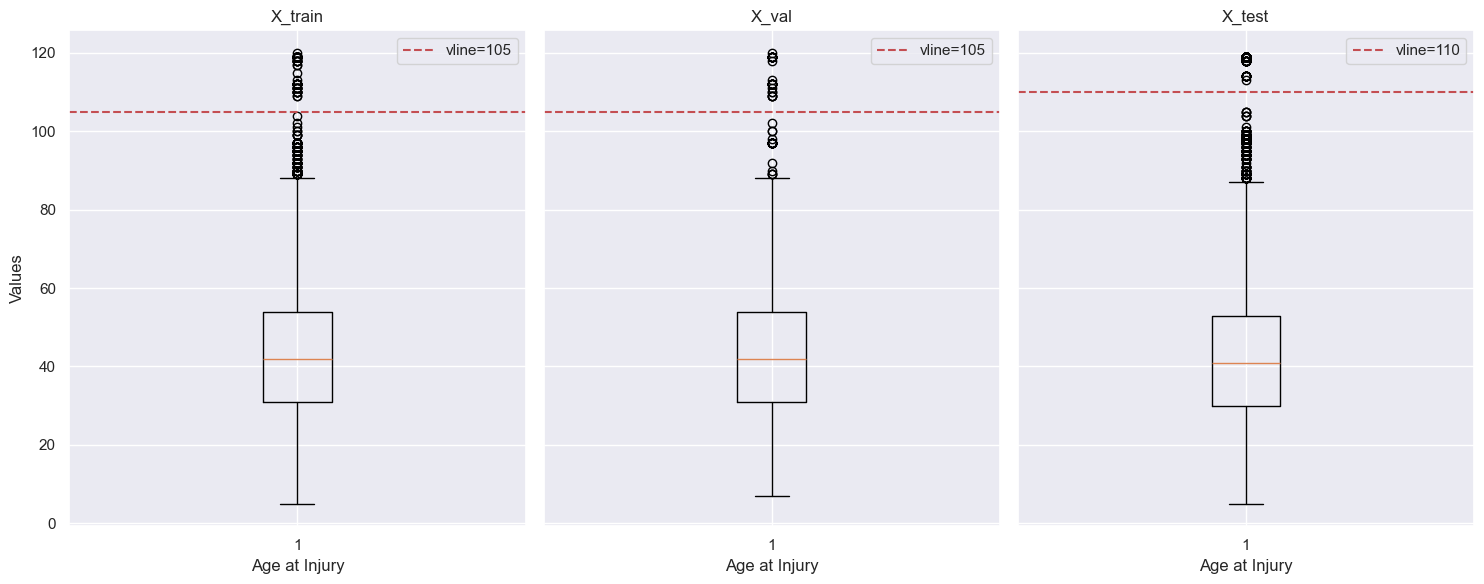

In [241]:
def plot_boxplots(dfs, columns, titles, vertical_lines):
    num_plots = len(dfs)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 6), sharey=True)
    
    for i, (df, column, title, vline) in enumerate(zip(dfs, columns, titles, vertical_lines)):
        ax = axes[i] if num_plots > 1 else axes
        ax.boxplot(df[column])
        ax.axhline(vline, color='r', linestyle='--', label=f'vline={vline}')
        ax.set_title(title)
        ax.set_xlabel(column)
        ax.legend()
    
    axes[0].set_ylabel('Values')
    plt.tight_layout()
    plt.show()

# Usage example
plot_boxplots(
    dfs=[X_train, X_val, X_test],
    columns=['Age at Injury', 'Age at Injury', 'Age at Injury'],
    titles=['X_train', 'X_val', 'X_test'],
    vertical_lines=[105, 105, 110]
)

In [242]:
print(f"X_train: {len(detect_outliers_ages(X_train, "Age at Injury"))} outliers")
print(f"X_val: {len(detect_outliers_ages(X_val, "Age at Injury"))} outliers")
print(f"X_test: {len(detect_outliers_ages(df_test, "Age at Injury"))} outliers")

X_train: 17307 outliers
X_val: 1911 outliers
X_test: 13944 outliers


In [243]:
winsorize_ages(X_train, X_train, "Age at Injury")
winsorize_ages(X_train, X_val, "Age at Injury")
winsorize_ages(X_train, X_test, "Age at Injury")

### Average Weekly Wage

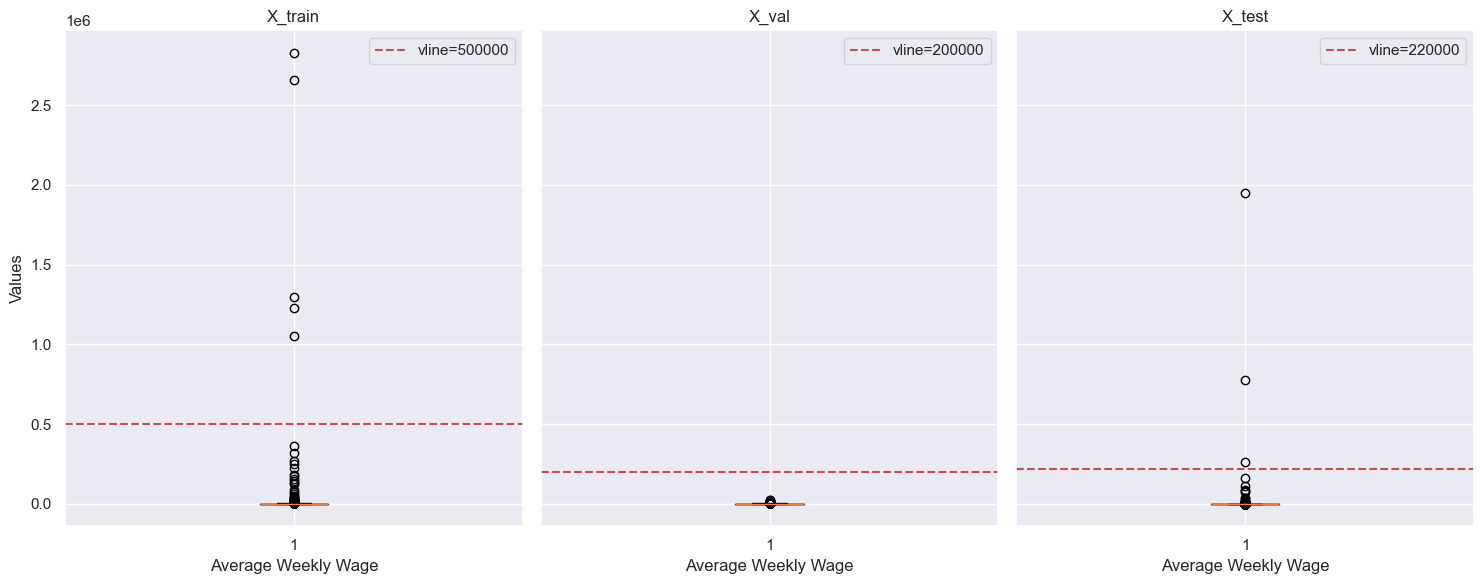

In [244]:
def plot_boxplots(dfs, columns, titles, vertical_lines):
    num_plots = len(dfs)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 6), sharey=True)
    
    for i, (df, column, title, vline) in enumerate(zip(dfs, columns, titles, vertical_lines)):
        ax = axes[i] if num_plots > 1 else axes
        ax.boxplot(df[column])
        ax.axhline(vline, color='r', linestyle='--', label=f'vline={vline}')
        ax.set_title(title)
        ax.set_xlabel(column)
        ax.legend()
    
    axes[0].set_ylabel('Values')
    plt.tight_layout()
    plt.show()

# Usage example
plot_boxplots(
    dfs=[X_train, X_val, X_test],
    columns=['Average Weekly Wage', 'Average Weekly Wage', 'Average Weekly Wage'],
    titles=['X_train', 'X_val', 'X_test'],
    vertical_lines=[500000, 200000, 220000]
)

In [245]:
def detect_outliers_wages(df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 500000
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 200000
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 220000
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [246]:
# choosing to allow 5% of the extreme values to remain, thus setting the lower and upper bound to the 5th and 95th percentiles
# making it so that the dfs are impavted by the bounds of X_train

def winsorize_wages(df_train, df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 500000
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 200000
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 220000
    
    # Winsorize the column by capping values outside the bounds in df
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

In [247]:
print(f"X_train: {len(detect_outliers_wages(X_train, "Average Weekly Wage"))} outliers")
print(f"X_val: {len(detect_outliers_wages(X_val, "Average Weekly Wage"))} outliers")
print(f"X_test: {len(detect_outliers_wages(df_test, "Average Weekly Wage"))} outliers")

X_train: 5 outliers
X_val: 0 outliers
X_test: 3 outliers


In [248]:
winsorize_wages(X_train, X_train, "Average Weekly Wage")
winsorize_wages(X_train, X_val, "Average Weekly Wage")
winsorize_wages(X_train, X_test, "Average Weekly Wage")

### days_to_c2

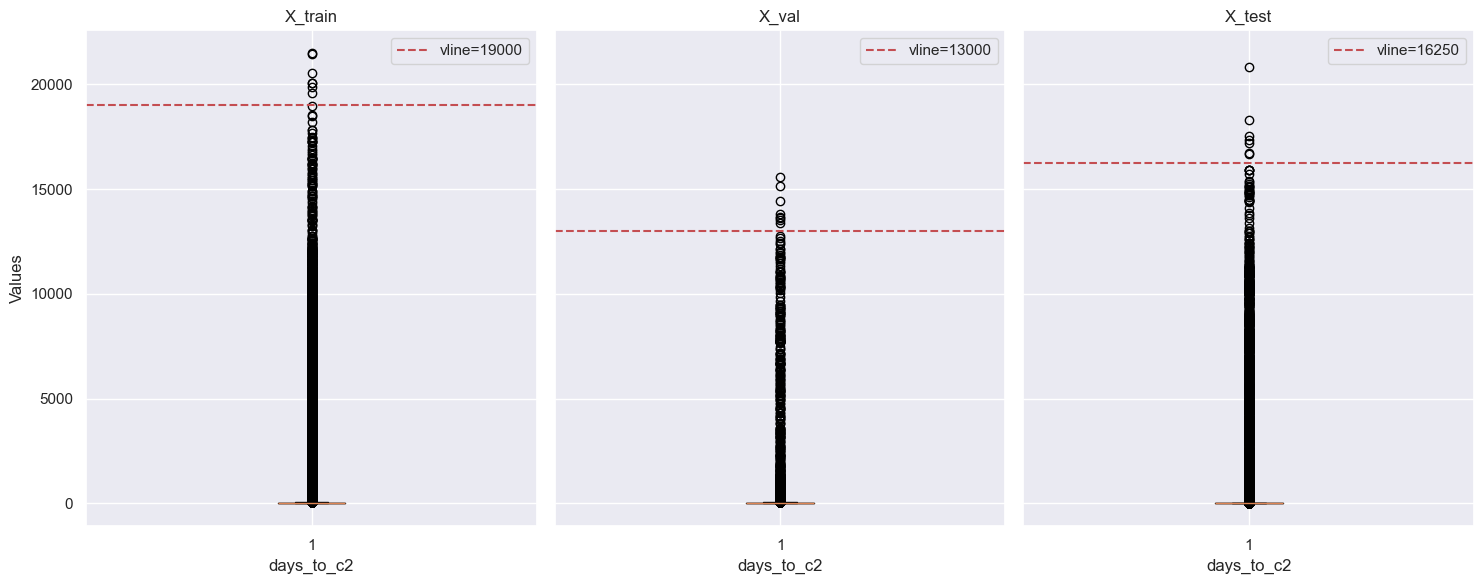

In [249]:
def plot_boxplots(dfs, columns, titles, vertical_lines):
    num_plots = len(dfs)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 6), sharey=True)
    
    for i, (df, column, title, vline) in enumerate(zip(dfs, columns, titles, vertical_lines)):
        ax = axes[i] if num_plots > 1 else axes
        ax.boxplot(df[column])
        ax.axhline(vline, color='r', linestyle='--', label=f'vline={vline}')
        ax.set_title(title)
        ax.set_xlabel(column)
        ax.legend()
    
    axes[0].set_ylabel('Values')
    plt.tight_layout()
    plt.show()

# Usage example
plot_boxplots(
    dfs=[X_train, X_val, X_test],
    columns=['days_to_c2', 'days_to_c2', 'days_to_c2'],
    titles=['X_train', 'X_val', 'X_test'],
    vertical_lines=[19000, 13000, 16250]
)

In [250]:
def detect_outliers_days_c2(df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 19000
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 13000
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 16250
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [251]:
# choosing to allow 5% of the extreme values to remain, thus setting the lower and upper bound to the 5th and 95th percentiles
# making it so that the dfs are impavted by the bounds of X_train

def winsorize_c2(df_train, df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 19000
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 13000
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 16250
    
    # Winsorize the column by capping values outside the bounds in df
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

In [252]:
print(f"X_train: {len(detect_outliers_days_c2(X_train, "days_to_c2"))} outliers")
print(f"X_val: {len(detect_outliers_days_c2(X_val, "days_to_c2"))} outliers")
print(f"X_test: {len(detect_outliers_days_c2(df_test, "days_to_c2"))} outliers")

X_train: 17812 outliers
X_val: 1683 outliers
X_test: 12193 outliers


In [253]:
winsorize_c2(X_train, X_train, "days_to_c2")
winsorize_c2(X_train, X_val, "days_to_c2")
winsorize_c2(X_train, X_test, "days_to_c2")

### days_accident_to_assembly

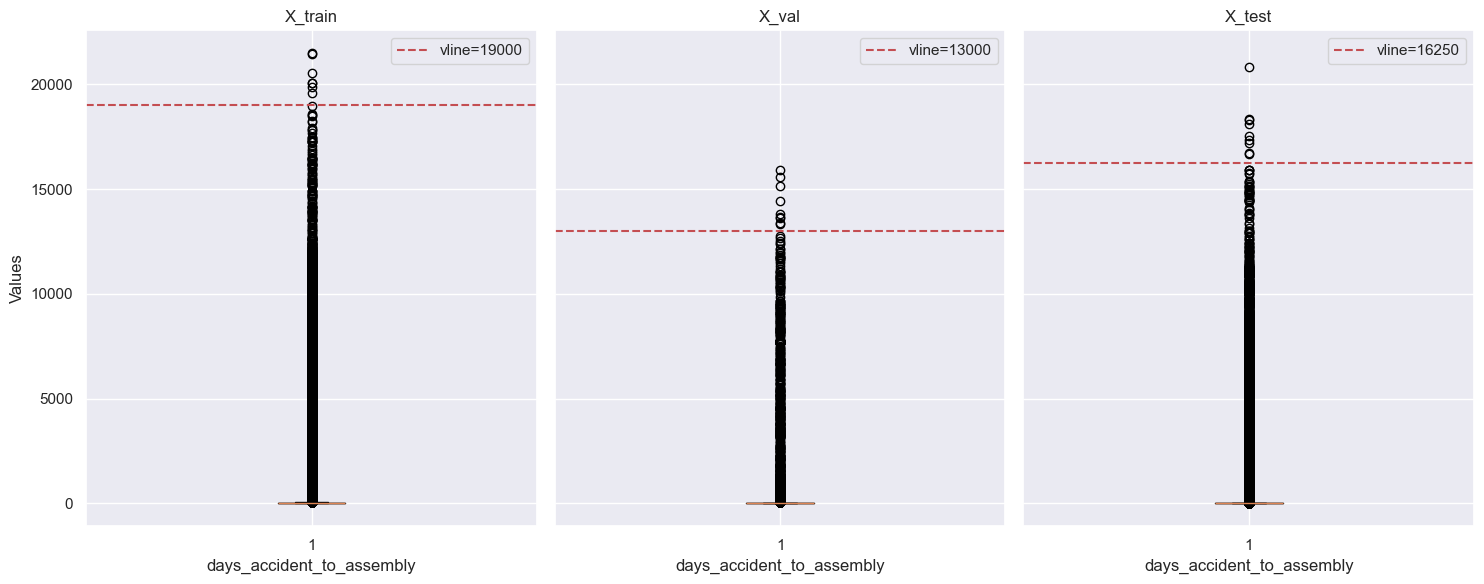

In [254]:
def plot_boxplots(dfs, columns, titles, vertical_lines):
    num_plots = len(dfs)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 6), sharey=True)
    
    for i, (df, column, title, vline) in enumerate(zip(dfs, columns, titles, vertical_lines)):
        ax = axes[i] if num_plots > 1 else axes
        ax.boxplot(df[column])
        ax.axhline(vline, color='r', linestyle='--', label=f'vline={vline}')
        ax.set_title(title)
        ax.set_xlabel(column)
        ax.legend()
    
    axes[0].set_ylabel('Values')
    plt.tight_layout()
    plt.show()

# Usage example
plot_boxplots(
    dfs=[X_train, X_val, X_test],
    columns=['days_accident_to_assembly', 'days_accident_to_assembly', 'days_accident_to_assembly'],
    titles=['X_train', 'X_val', 'X_test'],
    vertical_lines=[19000, 13000, 16250]
)

In [255]:
def detect_outliers_days_assembly(df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 19000
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 13000
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 16250
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [256]:

def winsorize_assembly(df_train, df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 19000
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 13000
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 16250
    
    # Winsorize the column by capping values outside the bounds in df
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

In [257]:
print(f"X_train: {len(detect_outliers_days_assembly(X_train, "days_accident_to_assembly"))} outliers")
print(f"X_val: {len(detect_outliers_days_assembly(X_val, "days_accident_to_assembly"))} outliers")
print(f"X_test: {len(detect_outliers_days_assembly(df_test, "days_accident_to_assembly"))} outliers")

X_train: 22094 outliers
X_val: 2338 outliers
X_test: 18842 outliers


In [258]:
winsorize_assembly(X_train, X_train, "days_accident_to_assembly")
winsorize_assembly(X_train, X_val, "days_accident_to_assembly")
winsorize_assembly(X_train, X_test, "days_accident_to_assembly")

## Last changes

Some last changes are made to the data to ensure it is ready for feature selection.

In [259]:
X_train = X_train.drop(columns=['Accident Date', 'Assembly Date', 'County of Injury', 'Zip Code', 'C-2 Date'])
X_train['days_accident_to_assembly'] = X_train['days_accident_to_assembly'].astype(int)

In [260]:
X_val = X_val.drop(columns=['Accident Date', 'Assembly Date', 'County of Injury', 'Zip Code', 'C-2 Date'])
X_val['days_accident_to_assembly'] = X_val['days_accident_to_assembly'].astype(int)

In [261]:
X_test = X_test.drop(columns=['Accident Date', 'Assembly Date', 'County of Injury', 'Zip Code', 'C-2 Date'])
X_test['days_accident_to_assembly'] = X_test['days_accident_to_assembly'].astype(int)

## Splitting the Data for Agreement Reached

For the open-ended section, the group chose to create a model that predict other variable: Agreement Reached. For this purpose, it is necessary to separate the secondary target variable from the other variables.

In [262]:
y_train_ar = X_train['Agreement Reached']

In [263]:
y_val_ar = X_val['Agreement Reached']

In [264]:
X_train_ar = X_train.copy()
X_train_ar = X_train_ar.drop(columns=['Agreement Reached'])

In [265]:
X_val_ar = X_val.copy()
X_val_ar = X_val_ar.drop(columns=['Agreement Reached'])

In [266]:
X_train = X_train.drop(columns=['Agreement Reached'])
X_val = X_val.drop(columns=['Agreement Reached'])

In [267]:
#this cell was used as a checkpoint so the group could avoid running the whole notebook when working
X_train.to_csv('X_train_v1.csv', index=False)
X_val.to_csv('X_val_v1.csv', index=False)
X_test.to_csv('X_test_v1.csv', index=False)
y_train.to_csv('y_train_v1.csv', index=False)
y_val.to_csv('y_val_v1.csv', index=False)

X_train_ar.to_csv('X_train_ar_v1.csv', index=False)
X_val_ar.to_csv('X_val_ar_v1.csv', index=False)
y_train_ar.to_csv('y_train_ar_v1.csv', index=False)
y_val_ar.to_csv('y_val_ar_v1.csv', index=False)

In [268]:
#this cell was used as a checkpoint so the group could avoid running the whole notebook when working
import pandas as pd
X_train = pd.read_csv('X_train_v1.csv')
X_val = pd.read_csv('X_val_v1.csv')
X_test = pd.read_csv('X_test_v1.csv')
y_train = pd.read_csv('y_train_v1.csv')
y_val = pd.read_csv('y_val_v1.csv')

X_train_ar = pd.read_csv('X_train_ar_v1.csv')
X_val_ar = pd.read_csv('X_val_ar_v1.csv')
y_train_ar = pd.read_csv('y_train_ar_v1.csv')
y_val_ar = pd.read_csv('y_val_ar_v1.csv')

# Encoding

### Binary Encoding

Binary Variables do not require too much work to be encoded. In this case, the group decided to turn No to 0 and Yes to 1.

In [269]:
binary_features = ['Attorney/Representative', 'COVID-19 Indicator']
for feature in binary_features:
    X_train[feature] = X_train[feature].map({'No': 0, 'Yes': 1}).astype(int)
    X_val[feature] = X_val[feature].map({'No': 0, 'Yes': 1}).astype(int)
    X_test[feature] = X_test[feature].map({'N': 0, 'Y': 1}).astype(int)

X_train['Gender'] = X_train['Gender'].map({'F': 0, 'M': 1}).astype(int)
X_val['Gender'] = X_val['Gender'].map({'F': 0, 'M': 1}).astype(int)
X_test['Gender'] = X_test['Gender'].map({'F': 0, 'M': 1}).astype(int)

In [270]:
binary_features = ['Attorney/Representative', 'COVID-19 Indicator']
for feature in binary_features:
    X_train_ar[feature] = X_train_ar[feature].map({'No': 0, 'Yes': 1}).astype(int)
    X_val_ar[feature] = X_val_ar[feature].map({'No': 0, 'Yes': 1}).astype(int)

X_train_ar['Gender'] = X_train_ar['Gender'].map({'F': 0, 'M': 1}).astype(int)
X_val_ar['Gender'] = X_val_ar['Gender'].map({'F': 0, 'M': 1}).astype(int)

y_train_ar = y_train_ar['Agreement Reached'].map({'Not Reached': 0, 'Reached': 1}).astype(int)
y_val_ar = y_val_ar['Agreement Reached'].map({'Not Reached': 0, 'Reached': 1}).astype(int)

During the process of creating a final model and trying to obtain the best score possible in Kaggle, the group tried several encoding techniques. Two techniques were chosen as the best ones.

### Count Encoding
The first method the group settled on was count encoding. In this method, categorical variables are substituted by their respective frequency count. This encoding method is simplistic, which makes it easy to use. However, it comes with some disadvantages. It's biggest flaw is the following:<br>
If a variable 'A' has 3 possible values, say 'red', 'green' and 'blue'. If 2 of the values are equally represented in the variable (as in they have the same frequency) then the encoding will 'delete' one of the values. This happens because the encoding for each value is the same, this type of error is called collision.

References: <br>
https://towardsdatascience.com/4-ways-to-encode-categorical-features-with-high-cardinality-1bc6d8fd7b13#99d8

In [271]:
X_test.drop(columns=['Alternative Dispute Resolution'], inplace=True)

In [272]:
# X_train = X_train.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)

In [273]:
from category_encoders.count import CountEncoder
        
categorical_features = ['Carrier Type', 'District Name', 'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'age_group', 'wage_groups', 'days_to_c2_binned', 'body_group', 'injury_type', 'injury_cause',
       'industry_group', 'zip_group', 'days_accident_to_assembly_binned', 'body_region', 'severity', 'industry_new']

enc = CountEncoder(cols=categorical_features).fit(X_train, y_train)
X_train_encoded = enc.transform(X_train)
X_val_encoded = enc.transform(X_val)
X_test_encoded = enc.transform(X_test)

In [274]:
enc = CountEncoder(cols=categorical_features).fit(X_train_ar, y_train_ar)
X_train_encoded_ar = enc.transform(X_train_ar)
X_val_encoded_ar = enc.transform(X_val_ar)

### Hashing
After experimenting with the Count Encoder, the group wondered if there was a method that might yield better results. Standard techniques such as dummy variables or one-hot encoding were tested, but the results weren’t compelling. Eventually, through research, a new method was discovered: the 'Hashing Trick'.<br>
This encoding technique (also available in the category_encoders package) maps data of arbitrary size to a fixed size. In simple terms, the hashing function assigns specific numbers to each item it receives. The number itself is not important; what matters is that the assignment is consistent.<br>
The function takes a parameter, 'n_components' which defines the number of columns, or 'lockers'. Like the Count Encoder, the hashing function can result in collisions (when two different categories receive the same value). Increasing this parameter reduces collisions but also increases the sparsity of the data. The final value of 64 was chosen after several iterations in a trial-and-error process.



References:<br>
https://stats.stackexchange.com/questions/411767/encoding-of-categorical-variables-with-high-cardinality<br>
https://contrib.scikit-learn.org/category_encoders/hashing.html<br>
https://medium.com/value-stream-design/introducing-one-of-the-best-hacks-in-machine-learning-the-hashing-trick-bf6a9c8af18f

In [275]:
# import category_encoders as ce

# categorical_features = ['age_group', 'body_group', 'injury_type', 'injury_cause', 'industry_group', 'Carrier Type', 'zip_group',
#                         'days_accident_to_assembly_binned', 'wage_groups', 'Alternative Dispute Resolution', 'District Name',
#                         'Gender', 'Medical Fee Region', 'days_to_c2_binned']

# encoder = ce.HashingEncoder(cols=categorical_features, n_components=64)

# X_train_encoded = encoder.fit_transform(X_train)
# X_val_encoded = encoder.transform(X_val)
# X_test_encoded = encoder.transform(X_test)

Making sure the columns are in the correct order so the scaler can funtion properly.

In [276]:
new_order = list(X_train_encoded.columns) 
X_test_encoded = X_test_encoded[new_order]

# Scaling

In [277]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler


features_to_scale = ['Age at Injury', 'Average Weekly Wage', 'Carrier Type', 'District Name',
                    'Industry Code Description', 'Medical Fee Region',
                    'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description',
                    'Number of Dependents', 'age_group', 'wage_groups', 'days_to_c2', 'days_to_c2_binned',
                    'body_group', 'injury_type', 'injury_cause', 'industry_group', 'zip_group',
                    'days_accident_to_assembly', 'days_accident_to_assembly_binned']

scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train_encoded[features_to_scale] = scaler.fit_transform(X_train_encoded[features_to_scale])

X_val_encoded[features_to_scale] = scaler.transform(X_val_encoded[features_to_scale])
X_test_encoded[features_to_scale] = scaler.transform(X_test_encoded[features_to_scale])

X_train_scaled = X_train_encoded
X_val_scaled = X_val_encoded
X_test_scaled = X_test_encoded

In [278]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train_encoded_ar[features_to_scale] = scaler.fit_transform(X_train_encoded_ar[features_to_scale])
X_val_encoded_ar[features_to_scale] = scaler.transform(X_val_encoded_ar[features_to_scale])

X_train_scaled_ar = X_train_encoded_ar
X_val_scaled_ar = X_val_encoded_ar

# Resampling

In [279]:
# # import the SMOTETomek.
# from imblearn.combine import SMOTETomek

# # create the  object with the desired sampling strategy.
# smotemek = SMOTETomek(sampling_strategy='auto')

# # fit the object to our training data.
# x_train_smt, y_train_smt = smotemek.fit_resample(X_train_scaled, y_train)

### ADASYN

In [280]:
# from imblearn.over_sampling import ADASYN

# ada = ADASYN(sampling_strategy='auto', random_state=13)
# X_train_ada, y_train_ada = ada.fit_resample(X_train_scaled, y_train)

### SMOTE

In [349]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='auto') 
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled,y_train)
y_train.value_counts()

claim_injury_num
2                   259550
7                   259550
4                   133993
3                    60809
5                    46418
1                    11157
6                     4147
8                      452
Name: count, dtype: int64

# Resampling for Agreement Reached

### SMOTE

In [282]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# smote = SMOTE(sampling_strategy='auto', random_state=13)
# X_train_ar_resampling, y_train_ar_resampling = smote.fit_resample(X_train_scaled_ar, y_train_ar)

### Borderline-SMOTE


In [283]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(random_state=13)
X_train_ar_resampling, y_train_ar_resampling = bsmote.fit_resample(X_train_scaled_ar, y_train_ar)

In [284]:
y_train_ar.value_counts()

Agreement Reached
0    490988
1     25634
Name: count, dtype: int64

In [285]:
y_train_ar_resampling.value_counts()

Agreement Reached
0    490988
1    490988
Name: count, dtype: int64

# Feature Selection

For the feature selection section the group decided to use the methodologies that were taught in class. As it stands this section can still be worked on extensively. A better selection could lead to a better model, therefore improvement in this section is essencial.

## Filter Methods

Filter methods identify the most important features by applying statistical measures to evaluate their correlation to the target variable. They are simple, fast, and can be applied before the modeling stage, which makes them a good starting point for feature selection. Indeed, they were crucial in the selection of features for the first models the group obtained (like in the case of the decision trees using the count encoder).

The group decided to use Spearman's correlation coefficient because, in comparison to Pearson's, Spearman's correlation offers better results when data is non-linear or does not follow a normal distribution. The idea is that very highly correlated variables should be removed, as they're adding redundancy to the model without offering new information and that variables highly correlated to the target should be the most explanatory.

Variance was also used to identify any univariate variables and remove them. This was done because univariate variables don't offer any new information to the model.

In [286]:
# X_train_scaled.var()

In [287]:
# # creating a function to test the independence between a categorical feature and a target variable using Chi-square test

# def TestIndependence(X, y, var, alpha=0.05):        
#     dfObserved = pd.crosstab(y, X) 
#     chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    
#     if p < alpha:
#         result = "{0} is IMPORTANT for Prediction".format(var)
#     else:
#         result = "{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    
#     return result, p

# # showspayer_code the list of features not important for predictions: 'features_to_discard'

# features_to_discard = []

# for var in X_train_encoded.columns:
#     result, p_value = TestIndependence(X_train_encoded[var], y_train, var)
#     if "NOT" in result:
#         features_to_discard.append(var)

# print("Features to Discard:", features_to_discard)

Mutual Information

In [288]:
# mi = mutual_info_classif(X_train_scaled, y_train)
# mi = pd.Series(mi)
# mi.index = X_train_scaled.columns
# mi.sort_values(ascending=False)
# mi.sort_values().plot(kind='barh', title = "Mutual Information", figsize=(10, 8))

In [289]:
# def calculate_mutual_information(X, y):
#     mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
#     mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
#     return mi_scores_series
# # Calculate mutual information for the dataset
# mi_scores = calculate_mutual_information(X_train_encoded, y_train)

# # Display the mutual information scores
# #print("Mutual Information Scores:")
# #print(mi_scores)

# # Features with low mutual information
# low_mi_features = mi_scores[mi_scores < 0.01].index.tolist()
# print("\nFeatures with Low Mutual Information:")
# print(low_mi_features)

With a variance threshold of 0.01 and a correlation > 0.9 the method didn’t reduce the number of features, so the group changed the variance threshold to 0.1 and the correlation to 0.8

In [290]:
# import numpy as np
# import pandas as pd
# from sklearn.feature_selection import VarianceThreshold

# ### STEP 1: LOW VARIANCE FILTER
# # Remove features with low variance
# variance_threshold = 0.1
# variance_filter = VarianceThreshold(threshold=variance_threshold)

# X_train_low_variance = variance_filter.fit_transform(X_train_encoded)

# X_val_low_variance = variance_filter.transform(X_val_encoded)

# # Get the names of the remaining features
# low_variance_selected_features = X_train_encoded.columns[variance_filter.get_support()]
# print(f"Features after low variance filtering: {len(low_variance_selected_features)}")
# print(f"{low_variance_selected_features}\n")

# X_train_filtered = pd.DataFrame(X_train_low_variance, columns=low_variance_selected_features)
# X_val_filtered = pd.DataFrame(X_val_low_variance, columns=low_variance_selected_features)

# ### STEP 2: CORRELATION-BASED FILTER
# correlation_matrix = X_train_filtered.corr().abs()

# upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# # Find features with high correlation (correlation > 0.8)
# correlation_threshold = 0.8
# to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

# # Drop highly correlated features
# X_train_final = X_train_filtered.drop(columns=to_drop)
# X_val_final = X_val_filtered.drop(columns=to_drop)

# # final list of selected features
# final_selected_features = X_train_final.columns
# print(f"Features after correlation filtering: {len(final_selected_features)}")
# print(f"{final_selected_features}\n")

In [291]:
# from scipy.stats import f_oneway

# def perform_anova(X, y):
#     p_values = {}

#     if isinstance(y, pd.DataFrame):
#         y = y.iloc[:, 0] 

#     # Perform ANOVA for each feature
#     for col in X.columns:
#         groups = [X[col][y == category] for category in y.unique()]
#         f_stat, p_val = f_oneway(*groups)
#         p_values[col] = p_val
#         print(f"Feature: {col}, F-statistic: {f_stat}, p-value: {p_val}")

#     # Return p-values as a sorted Pandas Series
#     return pd.Series(p_values).sort_values()

# # Example usage:
# # Assuming X_train_encoded contains numerical features and y_train is the categorical target
# numerical_features = X_train.select_dtypes(include=['float', 'int'])  # Select numerical features
# anova_results = perform_anova(numerical_features, y_train)

# # Display ANOVA p-values
# #print("ANOVA p-values:")
# #print(anova_results)

# # Identify features with p-value > 0.05 (not significant)
# low_significance_features = anova_results[anova_results > 0.05].index.tolist()
# print("\nFeatures with Low Significance:")
# print(low_significance_features)


In [292]:
# cor_spearman = X_train_scaled.corr(method ='spearman')
# # check the name of the 2 variables that have a correlation higher than 0.5
# for i in range(len(cor_spearman.columns)):
#     for j in range(i):
#         if abs(cor_spearman.iloc[i, j]) > 0.5:
#             print(f"The columns: {cor_spearman.columns[i]} & {cor_spearman.columns[j]} have a correlation of: {cor_spearman.iloc[i, j]} \n")

## Wrapper Methods

Wrapper methods involve selecting subsets of features and evaluating their effectiveness directly with a specific model. These methods 'wrap' around the machine learning algorithm and evaluate different combinations of features to determine which subset results in the best model performance. 

The group decided to use RFE (Recursive Feature Elimination), a method that ranks features based on their importance and iteratively removes the least important ones. RFE works by training the model multiple times, seeing which is the least significant feature, removing it, and trying again, until the optimal features are found.

The wrapper methods were left commented as running them was very time-intensive.

- RFE using Decision Trees

In [293]:
#from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier(random_state=13)

In [294]:
#from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression
#rfe = RFE(estimator = model, n_features_to_select = 5)

In [295]:
#X_rfe = rfe.fit_transform(X = X_train_encoded, y = y_train)

In [296]:
#rfe.support_

In [297]:
#rfe.ranking_

In [298]:
#selected_features = pd.Series(rfe.support_, index = X_train_encoded.columns)
#selected_features

- RFE using Logistic Regression

In [299]:
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()

In [300]:
#from sklearn.feature_selection import RFE
#rfe = RFE(estimator=model, n_features_to_select=5)

In [301]:
#X_rfe = rfe.fit_transform(X = X_train_encoded, y = y_train)

In [302]:
#selected_features = pd.Series(rfe.support_, index = X_train_encoded.columns)
#selected_features

In [303]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import RFE

#model = LogisticRegression(max_iter=1000)
#rfe = RFE(estimator=model, n_features_to_select=10)
#rfe.fit(X_train_encoded, y_train)
#selected_features = X_train_encoded.columns[rfe.support_]
#print("Selected features:", selected_features)

In [304]:
#from sklearn.feature_selection import RFE
#from sklearn.svm import LinearSVC

#model = LinearSVC(max_iter=1000)
#rfe = RFE(estimator=model, n_features_to_select=10)
#rfe.fit(X_train_encoded, y_train.ravel()) 

#print("Selected features:", X_train_encoded.columns[rfe.support_])

## Embedded Methods

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created, meaning that they integrate feature selection directly into the learning algorithm. The method the group chose was Lasso, a regression technique that works by reducing the coefficients of the least important features to zero. This means that it simultaneously indentifies those features and removes them from the model. The automatic feature selection that Lasso provides was the main reason to choose it over Ridge regression.

### LASSO Regression

In [305]:
# def plot_importance(coef,name):
#     imp_coef = coef.sort_values()
#     plt.figure(figsize=(8,10))
#     imp_coef.plot(kind = "barh")
#     plt.title("Feature importance using " + name + " Model")
#     plt.show()

In [306]:
# from sklearn.linear_model import LassoCV
# import warnings
# warnings.filterwarnings('ignore')

# reg = LassoCV()

In [307]:
# reg.fit(X_train_scaled, y_train)

In [308]:
# print("Best alpha using built-in LassoCV: %f" % reg.alpha_)

In [309]:
# print("Best score using built-in LassoCV: %f" %reg.score(X_train_scaled, y_train))

In [310]:
# coef = pd.Series(reg.coef_, index = X_train_scaled.columns)

In [311]:
# print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [312]:
# coef.sort_values()

In [313]:
# plot_importance(coef,'Lasso')

### RIDGE Regression (não funciona)

In [314]:
# # Ridge regularization
# from sklearn.linear_model import RidgeCV
# reg = RidgeCV()
# reg.fit(X_train_scaled, y_train)
# coef = pd.Series(reg.coef_, index = X_train.columns)

# print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [315]:
# from sklearn.linear_model import RidgeCV
# ridge = RidgeCV()

In [316]:
# ridge.fit(X_train_scaled, y_train)

In [317]:
# print("Best alpha using built-in RidgeCV: %f" % ridge.alpha_)

In [318]:
# print("Best score using built-in RidgeCV: %f" %ridge.score(X_train_scaled, y_train))

In [319]:
# # Ensure the ridge model is properly trained
# if len(ridge.coef_) == len(X_train_scaled.columns):
# 	coef_ridge = pd.Series(ridge.coef_, index=X_train_scaled.columns)
# 	coef_ridge.sort_values()
# else:
# 	print("Mismatch in the number of coefficients and features.")

In [320]:
# def plot_importance(coef, name):
# 	imp_coef = coef.sort_values()
# 	plt.figure(figsize=(8,10))
# 	imp_coef.plot(kind="barh")
# 	plt.title("Feature importance using " + name + " Model")
# 	plt.show()

# plot_importance(coef_ridge, 'Ridge')

### Elastic Net

In [321]:
# from sklearn.linear_model import ElasticNetCV
# import pandas as pd

# elastic_net = ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 1.0], random_state=13)

In [322]:
# elastic_net.fit(X_train_scaled, y_train)

In [323]:
# print("Best alpha using built-in ElasticNetCV: %f" % elastic_net.alpha_)

In [324]:
# print("Best l1_ratio using built-in ElasticNetCV: %f" % elastic_net.l1_ratio_)

In [325]:
# print("Best score using built-in ElasticNetCV: %f" % elastic_net.score(X_train_scaled, y_train))

In [326]:
# coef_elastic_net = pd.Series(elastic_net.coef_, index=X_train_scaled.columns)
# coef_elastic_net = coef_elastic_net.sort_values()

# print(coef_elastic_net)

In [327]:
# plot_importance(coef_elastic_net, 'Elastic Net')

# Feature Selection - Agreement Reached

To predict Agreement Reached, feature selection is necessary to improve the model's performance. For this step, the methods chosen were target-aware feature selection, as they help identify the most relevant features for predicting the target variable. This approach will allow us to remove the variables that do not have a strong relationship with the target.

The group decided to choose ANOVA, Mutual Information and Pearsons correlation for this task. ANOVA detects differences in means between classes, while Mutual Information captures linear and non-linear relationships between features and the target. Pearson's Correlation, unlike the others, identifies only linear relationships. The combination of these three methods makes the feature selection robust.

### ANOVA

In [328]:
# import pandas as pd
# from sklearn.feature_selection import SelectKBest, f_classif

# selector = SelectKBest(score_func=f_classif, k='all')
# X_new = selector.fit_transform(X_train_scaled_ar, y_train_ar)

# feature_score_df = pd.DataFrame({'Feature': X_train_scaled_ar.columns,'Score': selector.scores_}).sort_values(by='Score', ascending=False)
# print(feature_score_df)

In [329]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.barh(feature_score_df['Feature'], feature_score_df['F-score'])
# plt.xlabel('F-score')
# plt.title('ANOVA')
# plt.gca().invert_yaxis()  
# plt.show()

For ANOVA, the group decided to remove the variables with a score below 100, as they are the least correlated with the target variable.

### Pearson correlation

In [330]:
# from scipy.stats import pearsonr

# correlation = []
# for i in range(X_train_scaled_ar.shape[1]):
#     corr_value = pearsonr(X_train_scaled_ar.iloc[:, i], y_train_ar)[0]
#     correlation.append(corr_value)

# pearson = pd.DataFrame({"Feature": X_train_scaled_ar.columns, "Correlation": correlation})

# pearson["Absolute Correlation"] = pearson["Correlation"].abs()
# pearson = pearson.sort_values(by="Absolute Correlation", ascending=False)

# print(pearson)

In [331]:
# import matplotlib.pyplot as plt

# correlation_df = correlation_df.sort_values(by="Absolute Correlation", ascending=False)

# plt.figure(figsize=(10, 6))
# plt.barh(correlation_df['Feature'], correlation_df['Absolute Correlation'])
# plt.xlabel('Absolute Correlation')
# plt.title('Pearson Correlation')
# plt.gca().invert_yaxis()  
# plt.show()

The variables that the group choose to remove were the ones below the absolute threshold of 0.015.

### Mutual Information

In [332]:
# from sklearn.feature_selection import mutual_info_classif

# mutual_info = mutual_info_classif(X_train_scaled_ar, y_train_ar, random_state=13)
# mutual_info_df = pd.DataFrame({"Feature": X_train_scaled_ar.columns, "Score": mutual_info})
# mutual_info_df = mutual_info_df.sort_values(by="Score", ascending=False)
# print(mutual_info_df)

In [333]:
# import matplotlib.pyplot as plt

# mutual_info_df = mutual_info_df.sort_values(by="Score", ascending=False)

# plt.figure(figsize=(10, 6))
# plt.barh(mutual_info_df['Feature'], mutual_info_df['Score'])
# plt.xlabel('Mutual Information')
# plt.title('Mutual Information')
# plt.gca().invert_yaxis() 
# plt.show()

For Mutual Information method, the threshold is the same as in Pearsons correlations, 0.015.

### Fisher Score

In [334]:
# import pandas as pd
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

# fisher_score_selector = SelectKBest(score_func=f_classif, k='all')
# fisher_score_selector.fit(X_train_scaled_ar, y_train_ar)

# fisher_scores = fisher_score_selector.scores_

# fisher_scores_df = pd.DataFrame({'Feature': X_train_scaled_ar.columns,'Score': fisher_scores})
# fisher_scores_df_sorted = fisher_scores_df.sort_values(by='Score', ascending=False)

# print(fisher_scores_df_sorted)


Pearsons correlation and ANOVA return the same features with the selection criteria chosen. Mutual Information doesnt have the same ranking as those two, but most of the features are the same so for the final subset of features were chosen the common ones between ANOVA and Pearsons.

# Modelation

## Model 1: Decision Tree Classifier

The first model that was tried was a decision tree. This model was picked based on its implementation simplicity. The group tried various iterations of the model based on the feature selection methods but the results weren't as good as expected so the group moved to a more complex model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

modelDT = DecisionTreeClassifier()
modelDT.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [337]:
# X_train_encoded_model = X_train_encoded[['wage_groups', 'days_accident_to_assembly', 'injury_type', 'industry_group', 'COVID-19 Indicator',
#                                          'Attorney/Representative', 'days_to_c2', 'Alternative Dispute Resolution', 'Age at Injury', 'Gender', 'District Name']]

# X_val_encoded_model = X_val_encoded[['wage_groups', 'days_accident_to_assembly', 'injury_type', 'industry_group', 'COVID-19 Indicator',
#                                      'Attorney/Representative', 'days_to_c2', 'Alternative Dispute Resolution', 'Age at Injury', 'Gender', 'District Name']]

clf = DecisionTreeClassifier(random_state=13)
clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = clf.predict(X_val_scaled)
accuracy = accuracy_score(y_pred, y_val)
report = classification_report(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.65
F1 Score: 0.66
Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.23      0.25      1320
           2       0.84      0.80      0.82     31526
           3       0.19      0.20      0.20      8097
           4       0.68      0.64      0.66     14514
           5       0.23      0.48      0.31      1862
           6       0.00      0.03      0.01        64
           7       0.00      0.00      0.00         1
           8       0.03      0.06      0.04        18

    accuracy                           0.65     57402
   macro avg       0.28      0.30      0.29     57402
weighted avg       0.68      0.65      0.66     57402



In [338]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, f1_score

# # Define the parameter grid
# param_grid = {
#     'criterion': ['gini', 'entropy'],           # Split criteria
#     'max_depth': [None, 10, 20, 30, 40],        # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],            # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 5, 10],          # Minimum samples required at a leaf node
#     'max_features': [None, 'sqrt', 'log2']      # Number of features to consider when looking for the best split
# }

# # Initialize the DecisionTreeClassifier
# clf = DecisionTreeClassifier(random_state=13)

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=clf,
#     param_grid=param_grid,
#     scoring='f1_weighted',  # Optimize weighted F1-score
#     cv=3,                   # 3-fold cross-validation
#     verbose=1,              # Show progress
#     n_jobs=-1               # Use all CPU cores
# )

# # Fit GridSearchCV to the training data
# grid_search.fit(X_train_scaled, y_train)

# # Print the best parameters and corresponding score
# print("Best Parameters:", grid_search.best_params_)
# print("Best F1-Score:", grid_search.best_score_)

# # Evaluate the model with the best parameters on the validation set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_val_scaled)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_val, y_pred)
# f1 = f1_score(y_val, y_pred, average='weighted')
# print(f"Validation Accuracy: {accuracy:.2f}")
# print(f"Validation F1-Score (Weighted): {f1:.2f}")
# print("Classification Report:\n", classification_report(y_val, y_pred))


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


c:\Users\marsi\anaconda3\envs\DM2425\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best F1-Score: 0.8050668826390197
Validation Accuracy: 0.74
Validation F1-Score (Weighted): 0.71
Classification Report:
               precision    recall  f1-score   support

           1       0.23      0.04      0.06      1320
           2       0.83      0.94      0.89     31526
           3       0.25      0.09      0.14      8097
           4       0.72      0.76      0.74     14514
           5       0.30      0.49      0.37      1862
           6       0.00      0.00      0.00        64
           7       0.00      0.00      0.00         1
           8       0.25      0.06      0.09        18

    accuracy                           0.74     57402
   macro avg       0.32      0.30      0.29     57402
weighted avg       0.69      0.74      0.71     57402



In [339]:
# X_test_encoded_model = X_test_encoded[['wage_groups', 'days_accident_to_assembly', 'injury_type', 'industry_group', 'COVID-19 Indicator',
#                                      'Attorney/Representative', 'days_to_c2', 'Alternative Dispute Resolution', 'Age at Injury', 'Gender', 'District Name']]

In [340]:
# y_pred = clf.predict(X_test_encoded_model)
# len(y_pred)

In [341]:
# df_train['Claim Injury Type'].unique()

In [342]:
# import pandas as pd

# y_pred_series = pd.Series(y_pred)
# # y_pred_mapped = y_pred_series.map({1:'1. CANCELLED', 2:'2. NON-COMP', 3:'3. MED ONLY', 4:'4. TEMPORARY', 5:'5. PPD SCH LOSS', 6:'6. PPD NSL', 7:'7. PTD', 8:'8. DEATH'})
# print(y_pred_mapped)

In [343]:
# y_pred_df = pd.DataFrame({'Claim Identifier': X_test['Claim Identifier'], 'Predicted Claim Injury Type': y_pred_mapped})

In [344]:
# export_csv = y_pred_df.to_csv('y_pred.csv', index = None, header=True)

## Model 2: Random Forest

After testing the decision tree model, the group decided to try the next model: Random Forest. <br>
This model, to put it simply, combines an ensemble of decision trees to improve overall accuracy and reduce the risk of overfitting.<br>
Like the Decision Tree, this model underwent many iterations with different combinations of features and 'n_estimators' (the number of decision trees in the forest). Its performance was much better than the previous model, but after a certain number of iterations, the model plateaued, and the search for an optimal model began again.

In [345]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, f1_score
# import pandas as pd

# X_train_encoded_model = X_train_scaled
# #previous feature selection
# #[['wage_groups', 'days_accident_to_assembly', 'injury_type', 'industry_group', 'COVID-19 Indicator',
#                                         # 'Attorney/Representative', 'days_to_c2', 'Alternative Dispute Resolution', 'Age at Injury', 'Gender', 'District Name']]

# X_val_encoded_model = X_val_scaled
# #previous feature selection
# #[['wage_groups', 'days_accident_to_assembly', 'injury_type', 'industry_group', 'COVID-19 Indicator',
#                                     # 'Attorney/Representative', 'days_to_c2', 'Alternative Dispute Resolution', 'Age at Injury', 'Gender', 'District Name']]


In [346]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=13, n_estimators=100)
clf.fit(X_train_scaled, y_train)

c:\Users\marsi\anaconda3\envs\DM2425\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=13)

In [347]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, f1_score

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],              # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],             # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],             # Minimum samples to split a node
#     'min_samples_leaf': [1, 2, 5],               # Minimum samples at a leaf node
#     'max_features': ['sqrt', 'log2', None],      # Number of features to consider at each split
#     'class_weight': [None, 'balanced', 'balanced_subsample']  # Handle class imbalance
# }

# # Initialize the RandomForestClassifier
# clf = RandomForestClassifier(random_state=13)

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=clf,
#     param_grid=param_grid,
#     scoring='f1_weighted',  # Optimize weighted F1-score
#     cv=3,                   # 3-fold cross-validation
#     verbose=1,              # Print progress
#     n_jobs=-1               # Use all CPU cores
# )

# # Fit GridSearchCV to the training data
# grid_search.fit(X_train_scaled, y_train)

# # Print the best parameters and corresponding score
# print("Best Parameters:", grid_search.best_params_)
# print("Best F1-Score:", grid_search.best_score_)

# # Evaluate the best model on the validation set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_val_scaled)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_val, y_pred)
# f1 = f1_score(y_val, y_pred, average='weighted')
# print(f"Validation Accuracy: {accuracy:.2f}")
# print(f"Validation F1-Score (Weighted): {f1:.2f}")
# print("Classification Report:\n", classification_report(y_val, y_pred))

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


KeyboardInterrupt: 

In [ ]:
# y_pred = clf.predict(X_val_encoded_model)
# accuracy = accuracy_score(y_val, y_pred)
# report = classification_report(y_val, y_pred)
# f1 = f1_score(y_val, y_pred, average='weighted')

# print(f"Accuracy: {accuracy:.2f}")
# print(f"F1 Score: {f1:.2f}")
# print("Classification Report:")
# print(report)

In [ ]:
# X_test_encoded_model = X_test_scaled
# #previous feature selection
# #[['wage_groups', 'days_accident_to_assembly', 'injury_type', 'industry_group', 'COVID-19 Indicator',
#                                       # 'Attorney/Representative', 'days_to_c2', 'Alternative Dispute Resolution', 'Age at Injury', 'Gender', 'District Name']]

# y_pred = clf.predict(X_test_encoded_model)

In [ ]:
# y_pred_series = pd.Series(y_pred)
# y_pred_mapped = y_pred_series.map({
#     1: '1. CANCELLED', 2: '2. NON-COMP', 3: '3. MED ONLY', 4: '4. TEMPORARY', 
#     5: '5. PPD SCH LOSS', 6: '6. PPD NSL', 7: '7. PTD', 8: '8. DEATH'
# })

In [ ]:
# y_pred_df = pd.DataFrame({'Claim Identifier': X_test['Claim Identifier'], 'Predicted Claim Injury Type': y_pred_mapped})
# export_csv = y_pred_df.to_csv('y_pred.csv', index=False, header=True)

## Model 3: Light GBM

The final model the group ended up choosing to present in this phase of the project was the Light GBM (short for Light Gradient Boosting Machine). Like in the previous models, this model type suffered through many iterations and in the end the best combination was created using all features generated with the 64 lockers in the 'hashing trick'. In the future the group plans to retrace some steps a take a second look at important sections such as imputation, dealing with outliers and the aforementioned filter, embedded and wrapper methods.

Light GBM is a model that, much like a random forest, uses an ensemble of models, combining them sequentially. The objective is that each model corrects the previous models mistakes. The models are optimized based on the gradient of a loss function (in this case 'multi_logloss). The choice of this metric can be atributed to  to its suitability for multiclass classification. Several key parameters were fine-tuned (by trial and error) to optimize model performance:
- 'learning_rate' controls the speed of learning, with lower values enabling more gradual, precise learning.
- 'num_leaves' and 'max_depth' determine the complexity of each tree, allowing for more detailed splits.
- 'is_unbalanced' helps the model handle class imbalance by adjusting the weight of each class in the loss function, in this case the target is unbalanced and as no resampling was done this parameter is added to counter it.
- 'feature_fraction' and 'bagging_fraction' control feature and instance sampling, which helps reduce overfitting by ensuring diversity in each iteration.

References:

https://lightgbm.readthedocs.io/en/latest/Python-Intro.html# <br>
https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/ <br>
https://medium.com/@pritmanvar/lightgbm-essentials-how-it-works-and-why-its-fast-586b83dda7af <br>
https://medium.com/@soyoungluna/simple-explanation-of-lightgbm-without-complicated-mathematics-973998ec848f <br>
https://lightgbm.readthedocs.io/en/latest/Features.html <br>

The target variable needed a slight adjustment, this is due to the constrains of the light gbm model. This model expects the classes to start at 0, so 1 is subtracet to each value in the train and validation set and afterwards the map function is changed.

In [ ]:
y_train_adjusted = y_train - 1
y_val_adjusted = y_val - 1

### LightGBM with Cross Validation 

After testing the performance of LightGBM model, the group decided to test LightGBM with cross-validation to gain a more reliable performance estimate.<br>
Kfold cross validation splits the data into k subsets (folds) and then train and test the model on each fold, each time using one fold as the test set and the remaning k-1 folds as the training set. This approach ensures that all data is used for both training and testing, providing a more accurate estimate of the model's performance on unseen data.

The highest score on Kaggle (0.37385) was obtained by using Light GBM model with Cross-Validation. However, this model was left commented as running it was very time-intensive, taking approximately 50 minutes to run, compared to only 10 minutes for the version without cross-validation. To avoid long waiting times, we used the model without cross validation while working on the project.


References: <br>
https://pub.aimind.so/kfold-cross-validation-for-the-lightgbm-classifier-7915aed9b19e

In [351]:
feature_list = ['Attorney/Representative', 'COVID-19 Indicator', 'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'age_group', 'wage_groups', 'days_accident_to_assembly', 'zip_group', 'days_to_c2_binned']

In [ ]:
# import lightgbm as lgb
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# params = {
#     'objective': 'multiclass',
#     'metric': 'multi_logloss',
#     'num_class': 8, 
#     'learning_rate': 0.01, 
#     'num_leaves': 64,  
#     'max_depth': 6,  
#     'min_data_in_leaf': 50,  
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'lambda_l2': 2.0,  
#     'verbose': -1,
#     'is_unbalanced': True
# }

# kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# accuracies = []

# for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_encoded, y_train)):
#     print(f"Training fold {fold + 1}...")
    
#     X_train_fold, X_val_fold = X_train_encoded.iloc[train_idx], X_train_encoded.iloc[val_idx]
#     y_train_fold, y_val_fold = (y_train.iloc[train_idx] - 1), (y_train.iloc[val_idx] - 1)  

#     train_data = lgb.Dataset(X_train_fold, label=y_train_fold)
#     val_data = lgb.Dataset(X_val_fold, label=y_val_fold, reference=train_data)

#     model = lgb.train(
#         params,
#         train_data,
#         num_boost_round=1000,
#         valid_sets=[val_data]
#     )

#     y_pred_proba = model.predict(X_val_fold) 
#     y_pred = np.argmax(y_pred_proba, axis=1)  

#     accuracy = accuracy_score(y_val_fold, y_pred)
#     accuracies.append(accuracy)

#     print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}")

# print(f"\nMean Accuracy across folds: {np.mean(accuracies):.4f}")

In [ ]:
feature_list = ['Attorney/Representative', 'COVID-19 Indicator', 'Medical Fee Region', 'age_group', 'wage_groups', 'days_accident_to_assembly', 'zip_group', 'days_to_c2_binned', 'body_group', 'injury_type', 'injury_cause', 'industry_group']

In [352]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_train_adjusted = y_train_smote - 1
y_val_adjusted = y_val - 1

train_data = lgb.Dataset(X_train_smote[feature_list], label=y_train_adjusted)
val_data = lgb.Dataset(X_val_scaled[feature_list], label=y_val_adjusted, reference=train_data)

params = {
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': 8,
    'learning_rate': 0.01,
    'num_leaves': 64,
    'max_depth': 24,
    'min_data_in_leaf': 100,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l2': 2.0,
    'verbose': -1,
    'is_unbalanced': True
}

model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[val_data])

y_pred_proba = model.predict(X_val_encoded[feature_list])

y_pred = np.argmax(y_pred_proba, axis=1)

accuracy = accuracy_score(y_val_adjusted, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_val_adjusted, y_pred, average='weighted')
print("F1-Score (Weighted):", f1)
print("Classification Report:\n", classification_report(y_val_adjusted, y_pred))

KeyboardInterrupt: 

In [ ]:
# # Applying SMOTE for Oversampling
# smote = SMOTE(sampling_strategy='auto') 
# X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [357]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(random_state=13)
X_train_smote, y_train_smote = bsmote.fit_resample(X_train_scaled, y_train)

In [358]:
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, f1_score
import numpy as np

# LightGBM model setup and training
# Adjust y_train_smote and y_val for LightGBM (if class labels start from 1)
y_train_adjusted = y_train_smote - 1  # Assuming y_train_smote starts from 1
y_val_adjusted = y_val - 1  # Assuming y_val starts from 1

# Prepare the datasets for LightGBM
train_data = lgb.Dataset(X_train_smote[feature_list], label=y_train_adjusted)
val_data = lgb.Dataset(X_val_scaled[feature_list], label=y_val_adjusted, reference=train_data)

# Set LightGBM parameters
params = {
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': 8,  # Update this according to the number of unique classes
    'learning_rate': 0.01,
    'num_leaves': 64,
    'max_depth': 24,
    'min_data_in_leaf': 100,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l2': 2.0,
    'verbose': -1,
    'is_unbalanced': True  # Balancing the dataset with SMOTE reduces imbalance; keep as is if needed
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[val_data])

# Predictions
y_pred_proba = model.predict(X_val_scaled[feature_list])  # Predicted probabilities
y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class predictions

# Evaluation
accuracy = accuracy_score(y_val_adjusted, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_val_adjusted, y_pred, average='weighted')
print("F1-Score (Weighted):", f1)

print("Classification Report:\n", classification_report(y_val_adjusted, y_pred))

Accuracy: 0.7552872722204801
F1-Score (Weighted): 0.7199242111782279
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.12      0.17      1320
           1       0.83      0.95      0.89     31526
           2       0.29      0.08      0.13      8097
           3       0.76      0.78      0.77     14514
           4       0.32      0.59      0.41      1862
           5       0.01      0.05      0.02        64
           6       0.00      0.00      0.00         1
           7       0.05      0.11      0.06        18

    accuracy                           0.76     57402
   macro avg       0.32      0.34      0.31     57402
weighted avg       0.71      0.76      0.72     57402



In [354]:
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, f1_score
import numpy as np

# LightGBM model setup and training
# Adjust y_train_smote and y_val for LightGBM (if class labels start from 1)
y_train_adjusted = y_train_smote - 1  # Assuming y_train_smote starts from 1
y_val_adjusted = y_val - 1  # Assuming y_val starts from 1

# Prepare the datasets for LightGBM
train_data = lgb.Dataset(X_train_smote[feature_list], label=y_train_adjusted)
val_data = lgb.Dataset(X_val_scaled[feature_list], label=y_val_adjusted, reference=train_data)

# Set LightGBM parameters
params = {
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': 8,  # Update this according to the number of unique classes
    'learning_rate': 0.01,
    'num_leaves': 64,
    'max_depth': 24,
    'min_data_in_leaf': 100,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l2': 2.0,
    'verbose': -1,
    'is_unbalanced': True  # Balancing the dataset with SMOTE reduces imbalance; keep as is if needed
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[val_data])

# Predictions
y_pred_proba = model.predict(X_val_scaled[feature_list])  # Predicted probabilities
y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class predictions

# Evaluation
accuracy = accuracy_score(y_val_adjusted, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_val_adjusted, y_pred, average='weighted')
print("F1-Score (Weighted):", f1)

print("Classification Report:\n", classification_report(y_val_adjusted, y_pred))

Accuracy: 0.7607923068882617
F1-Score (Weighted): 0.7209683462617905
Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.06      0.09      1320
           1       0.83      0.96      0.89     31526
           2       0.29      0.08      0.12      8097
           3       0.77      0.79      0.78     14514
           4       0.33      0.59      0.42      1862
           5       0.03      0.05      0.04        64
           6       0.00      0.00      0.00         1
           7       0.06      0.17      0.09        18

    accuracy                           0.76     57402
   macro avg       0.32      0.34      0.31     57402
weighted avg       0.71      0.76      0.72     57402



In [ ]:
f1_val = f1_score(y_val_adjusted, y_pred, average='weighted') 
f1_train = f1_score(y_train_adjusted, np.argmax(model.predict(X_train_smote[feature_list]), axis=1), average='weighted')
print(f"F1 Score (Train): {f1_train:.4f}")
print(f"F1 Score (Validation): {f1_val:.4f}")

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the LightGBM classifier
lgbm_clf = LGBMClassifier(
    objective='multiclass',
    num_class=8,
    is_unbalanced=True,
    verbose=-1
)

# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [32, 64, 128],
    'max_depth': [16, 24, 32],
    'min_data_in_leaf': [50, 100, 200],
    'feature_fraction': [0.8, 0.9, 1.0],
    'bagging_fraction': [0.7, 0.8, 0.9],
    'bagging_freq': [3, 5, 7],
    'lambda_l2': [1.0, 2.0, 3.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm_clf,
    param_grid=param_grid,
    scoring='f1_weighted',  # Optimize based on weighted F1-score
    cv=3,  # 3-fold cross-validation
    verbose=1,  # Print progress
    n_jobs=-1  # Use all CPU cores for parallelization
)

# Perform GridSearchCV
grid_search.fit(X_train_scaled[feature_list], y_train_adjusted)

# Print the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

# Evaluate the model on the validation set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val_scaled[feature_list])

# Calculate evaluation metrics
accuracy = accuracy_score(y_val_adjusted, y_pred)
f1 = f1_score(y_val_adjusted, y_pred, average='weighted')
print("Validation Accuracy:", accuracy)
print("Validation F1-Score (Weighted):", f1)
print("Classification Report:\n", classification_report(y_val_adjusted, y_pred))


In [ ]:
# y_pred_proba = model.predict(X_test_encoded[feature_list])
# y_pred = np.argmax(y_pred_proba, axis=1)

In [ ]:
# # Mapping dictionary to convert the integer predictions to the full labels
# label_mapping = {
#     0: '1. CANCELED',
#     1: '2. NON-COMP',
#     2: '3. MED ONLY',
#     3: '4. TEMPORARY',
#     4: '5. PPD SCH LOSS',
#     5: '6. PPD NSL',
#     6: '7. PTD',
#     7: '8. DEATH'
# }
# test_predictions_full_labels = [label_mapping[pred] for pred in y_pred]

# submission_df = pd.DataFrame({
#     'Claim Identifier': X_test.index,
#     'Claim Injury Type': test_predictions_full_labels
# })

# # Export the submission DataFrame to a CSV file
# submission_df.to_csv("submission_rf.csv", index=False, header=True)

In [ ]:
# y_pred_series = pd.Series(y_pred)
# y_pred_mapped = y_pred_series.map({
#     0: '1. CANCELLED', 1: '2. NON-COMP', 2: '3. MED ONLY', 3: '4. TEMPORARY', 
#     4: '5. PPD SCH LOSS', 5: '6. PPD NSL', 6: '7. PTD', 7: '8. DEATH'
# })

In [ ]:
# y_pred_df = pd.DataFrame({'Claim Identifier': X_test['Claim Identifier'], 'Predicted Claim Injury Type': y_pred_mapped})
# export_csv = y_pred_df.to_csv('y_pred.csv', index=False, header=True)

## Model 4: Neural Networks

### ADAM

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.neural_network import MLPClassifier
import pandas as pd

In [ ]:
for col in X_train_scaled.columns:
    print(col)

Age at Injury
Attorney/Representative
Average Weekly Wage
Carrier Type
COVID-19 Indicator
District Name
Gender
Industry Code Description
Medical Fee Region
WCIO Cause of Injury Description
WCIO Nature of Injury Description
WCIO Part Of Body Description
Number of Dependents
age_group
wage_groups
days_to_c2
days_to_c2_binned
body_group
injury_type
injury_cause
industry_group
zip_group
days_accident_to_assembly
days_accident_to_assembly_binned
body_region
AIS
ais_weights
severity
SS
ASS
industry_new
industry_risk_score


In [ ]:
feature_list = ['Attorney/Representative', 'Carrier Type', 'COVID-19 Indicator', 'District Name', 'Gender', 
                'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Description',
                'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'age_group', 'wage_groups', 'body_group',
                'injury_type', 'injury_cause', 'industry_group', 'days_accident_to_assembly', 'zip_group', 'days_to_c2_binned']

In [ ]:
X_train_adam = X_train_scaled[feature_list]
X_val_adam = X_val_scaled[feature_list]
X_test_adam = X_test_scaled[feature_list]

model_adam = MLPClassifier(solver= 'adam', random_state=13)
model_adam.fit(X_train_adam, y_train)

MLPClassifier(random_state=13)

In [ ]:
# model_adam.score(X_train_adam, y_train)

0.7692430978495672

In [ ]:
# y_pred = model_adam.predict(X_val_adam)

In [ ]:
# #check accurazy of the model
# accuracy = accuracy_score(y_val, y_pred)
# accuracy

# #check the f1 score of the model
# f1_val = f1_score(y_val, y_pred, average='weighted')
# f1_train = f1_score(y_train, model_adam.predict(X_train_adam), average='weighted')
# print(f"F1 Score (Train): {f1_train:.2f}")
# print(f"F1 Score (Validation): {f1_val:.2f}")

F1 Score (Train): 0.72
F1 Score (Validation): 0.71


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],   # Number of neurons in hidden layers
    'activation': ['relu', 'tanh', 'logistic'],                  # Activation functions
    'alpha': [0.0001, 0.001, 0.01],                              # L2 regularization parameter
    'learning_rate': ['constant', 'adaptive'],                   # Learning rate schedule
    'max_iter': [200, 500, 1000]                                 # Maximum number of iterations
}

# Initialize the MLPClassifier with the adam solver
model_adam = MLPClassifier(solver='adam', random_state=13)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model_adam,
    param_grid=param_grid,
    scoring='f1_weighted',  # Optimize weighted F1-score
    cv=3,                   # 3-fold cross-validation
    verbose=1,              # Show progress
    n_jobs=-1               # Use all CPU cores
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_adam, y_train)

# Print the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val_adam)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Validation F1-Score (Weighted): {f1:.2f}")
print("Classification Report:\n", classification_report(y_val, y_pred))


In [ ]:
# y_pred = model_adam.predict(X_test_adam)

In [ ]:
# # Mapping dictionary to convert the integer predictions to the full labels
# label_mapping = {
#     1: '1. CANCELED',
#     2: '2. NON-COMP',
#     3: '3. MED ONLY',
#     4: '4. TEMPORARY',
#     5: '5. PPD SCH LOSS',
#     6: '6. PPD NSL',
#     7: '7. PTD',
#     8: '8. DEATH'
# }
# test_predictions_full_labels = [label_mapping[pred] for pred in y_pred]

# submission_df = pd.DataFrame({
#     'Claim Identifier': X_test_scaled.index,
#     'Claim Injury Type': test_predictions_full_labels
# })

# # Export the submission DataFrame to a CSV file
# submission_df.to_csv("submission_rf.csv", index=False, header=True)

### SGD

In [ ]:
feature_list = ['Attorney/Representative', 'Carrier Type', 'COVID-19 Indicator', 'District Name', 'Gender', 
                'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Description',
                'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'age_group', 'wage_groups', 'body_group',
                'injury_type', 'injury_cause', 'industry_group', 'days_accident_to_assembly', 'zip_group', 'days_to_c2_binned']

In [ ]:
from sklearn.neural_network import MLPClassifier

model_constant = MLPClassifier(solver='sgd', learning_rate='adaptive', random_state=42)
model_constant.fit(X_train_scaled[feature_list], y_train)

MLPClassifier(learning_rate='adaptive', random_state=42, solver='sgd')

In [ ]:
y_pred = model_constant.predict(X_val_scaled[feature_list])

In [ ]:
#check the f1 score of the model
f1_val = f1_score(y_val, y_pred, average='weighted')
f1_train = f1_score(y_train, model_constant.predict(X_train_scaled[feature_list]), average='weighted')
print(f"F1 Score (Train): {f1_train:f}")
print(f"F1 Score (Validation): {f1_val:f}")

F1 Score (Train): 0.710038
F1 Score (Validation): 0.708848


In [ ]:
y_pred = model_constant.predict(X_test_scaled[feature_list])

In [ ]:
# Mapping dictionary to convert the integer predictions to the full labels
label_mapping = {
    1: '1. CANCELED',
    2: '2. NON-COMP',
    3: '3. MED ONLY',
    4: '4. TEMPORARY',
    5: '5. PPD SCH LOSS',
    6: '6. PPD NSL',
    7: '7. PTD',
    8: '8. DEATH'
}
test_predictions_full_labels = [label_mapping[pred] for pred in y_pred]

submission_df = pd.DataFrame({
    'Claim Identifier': X_test_scaled.index,
    'Claim Injury Type': test_predictions_full_labels
})

# Export the submission DataFrame to a CSV file
submission_df.to_csv("submission_rf.csv", index=False, header=True)

## Models to predict Agreement Reached

In [ ]:
features = ['Attorney/Representative', 'days_accident_to_assembly', 'days_to_c2', 'wage_groups', 'industry_group', 'industry_new', 
            'days_accident_to_assembly_binned', 'Carrier Type', 'industry_risk_score', 'Industry Code Description', 'days_to_c2_binned', 'zip_group', 
            'District Name', 'Gender', 'COVID-19 Indicator', 'Age at Injury', 'severity', 'ASS', 'WCIO Part Of Body Description', 'Average Weekly Wage', 'body_region']

### Logistic Regression

The first model that was tried to predict Agreement Reached was a logistic regression. This model was choosen as it works particularly well in binary classification, where the target has only 2 possible outcomes (Agreement Reached and Agreement Not Reached). However, the results of the model were not as good as expected, leading the group to explore others to improve predictive performance.

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
# from sklearn.linear_model import LogisticRegression

# X_train_selected = X_train_ar_resampling[features]
# X_val_selected = X_val_scaled_ar[features]

# model = LogisticRegression(random_state=13, max_iter=1000)
# model.fit(X_train_selected, y_train_ar_resampling)
# y_pred = model.predict(X_val_selected)

# accuracy = accuracy_score(y_val_ar, y_pred)
# print("Accuracy:", accuracy)

# f1 = f1_score(y_val_ar, y_pred, average='weighted')
# print("F1-Score (Weighted):", f1)

# print("Classification Report:\n", classification_report(y_val_ar, y_pred))

# conf_matrix = confusion_matrix(y_val_ar, y_pred)
# print("Confusion Matrix:\n", conf_matrix)

c:\Users\marsi\anaconda3\envs\DM2425\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7576477638565635
F1-Score (Weighted): 0.8272581869476503
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.86    136800
           1       0.15      0.90      0.26      6706

    accuracy                           0.76    143506
   macro avg       0.57      0.82      0.56    143506
weighted avg       0.95      0.76      0.83    143506

Confusion Matrix:
 [[102705  34095]
 [   684   6022]]


In [ ]:
# from sklearn.metrics import f1_score

# f1_val = f1_score(y_val_ar, y_pred, average='weighted')
# f1_train = f1_score(y_train_ar_resampling, model.predict(X_train_selected), average='weighted')

# print(f"F1 Score (Train): {f1_train:f}")
# print(f"F1 Score (Validation): {f1_val:f}")

F1 Score (Train): 0.844429
F1 Score (Validation): 0.827258


SMOTE: <BR>
F1 Score (Train): 0.823257 <BR>
F1 Score (Validation): 0.825180 <BR>

Borderline-SMOTE: <br>
F1 Score (Train): 0.844429 <br>
F1 Score (Validation): 0.827258 <br>



###  Random Forest

The next model the group decided to test was Random Forest because it is capable of capturing non-linear relationships between the features and the target variable, which logistic regression cannot do effectively. The results of the model showed that it was overfitted, as it performed significantly better on the training set compared to the validation set, indicating poor generalization to unseen data. For this reason, the group decided to move into another model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train_selected = X_train_ar_resampling[features]
X_val_selected = X_val_scaled_ar[features]

model = RandomForestClassifier(random_state=13, class_weight='balanced')
model.fit(X_train_selected, y_train_ar_resampling)

y_pred = model.predict(X_val_selected)

accuracy = accuracy_score(y_val_ar, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_val_ar, y_pred, average='weighted')
print("F1-Score (Weighted):", f1)

print("Classification Report:\n", classification_report(y_val_ar, y_pred))

conf_matrix = confusion_matrix(y_val_ar, y_pred)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
from sklearn.metrics import f1_score

f1_val = f1_score(y_val_ar, y_pred, average='weighted')
f1_train = f1_score(y_train_ar_resampling, model.predict(X_train_selected), average='weighted')

print(f"F1 Score (Train): {f1_train:f}")
print(f"F1 Score (Validation): {f1_val:f}")

F1 Score (Train): 0.999894
F1 Score (Validation): 0.939637


SMOTE: <BR>
F1 Score (Train): 0.999899 <BR>
F1 Score (Validation): 0.939533 <BR>

Borderline-SMOTE: <br>
F1 Score (Train): 0.999894 <br>
F1 Score (Validation): 0.939637 <br>

### Decision Tree Classifier

The group decided to predict Agreement Reached with a Decision Tree due to its simplicity of implementation. Although decision trees are prone to overfitting, the group managed this with hyperparameter tuning by setting parameters such as min_samples_split, splitter and criterion (other parameters were tested, but the best result were achieved with these three). Using the Decision Tree model with Borderline-SMOTE showed good validation performance (without overfitting), indicating that the model is able to generalize well to unseen data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

X_train_selected = X_train_ar_resampling[features]
X_val_selected = X_val_scaled_ar[features]

model = DecisionTreeClassifier(random_state=13, splitter = 'random', min_samples_split = 200, criterion='entropy')

model.fit(X_train_selected, y_train_ar_resampling)
y_pred = model.predict(X_val_selected)

accuracy = accuracy_score(y_val_ar, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_val_ar, y_pred, average='weighted')
print("F1-Score (Weighted):", f1)

print("Classification Report:\n", classification_report(y_val_ar, y_pred))

conf_matrix = confusion_matrix(y_val_ar, y_pred)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
from sklearn.metrics import f1_score

f1_val = f1_score(y_val_ar, y_pred, average='weighted')
f1_train = f1_score(y_train_ar_resampling, model.predict(X_train_selected), average='weighted')

print(f"F1 Score (Train): {f1_train:f}")
print(f"F1 Score (Validation): {f1_val:f}")

SMOTE: <BR>
F1 Score (Train): 0.915391 <BR>
F1 Score (Validation): 0.910189 <BR>

Borderline-smote: <br>
F1 Score (Train): 0.923910 <br>
F1 Score (Validation): 0.910897 <br>

Borderline/smote com model = DecisionTreeClassifier(random_state=13, splitter = 'random', min_samples_split = 200, criterion='entropy') <br>
F1 Score (Train): 0.929010 <br>
F1 Score (Validation): 0.916701 <br>

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# param_grid = {
#     'criterion': ['gini', 'entropy'],  
#     'splitter': ['best', 'random'],   
#     'min_samples_split': [2, 10, 50, 100, 200],  
#     'max_depth': [None, 10, 20, 30],  
#     'min_samples_leaf': [1, 5, 10, 50]  
# }

# dt = DecisionTreeClassifier(random_state=13)

# grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='f1_weighted', cv=3, n_jobs=-1, verbose=1)

# grid_search.fit(X_train_selected, y_train_ar_resampling)

# print("Best Parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_val_selected)

# accuracy = accuracy_score(y_val_ar, y_pred)
# print("Accuracy:", accuracy)

# f1 = f1_score(y_val_ar, y_pred, average='weighted')
# print("F1-Score (Weighted):", f1)

# print("Classification Report:\n", classification_report(y_val_ar, y_pred))

# conf_matrix = confusion_matrix(y_val_ar, y_pred)
# print("Confusion Matrix:\n", conf_matrix)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


c:\Users\marsi\anaconda3\envs\DM2425\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy: 0.9319958747369448
F1-Score (Weighted): 0.9316767605150524
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96    136800
           1       0.27      0.26      0.27      6706

    accuracy                           0.93    143506
   macro avg       0.62      0.61      0.61    143506
weighted avg       0.93      0.93      0.93    143506

Confusion Matrix:
 [[131986   4814]
 [  4945   1761]]
